# Âü∫‰∫éÊú∫Âô®Â≠¶‰π†ÁöÑÂçó‰∫¨Âú∞Âå∫ÁâπÂÆöÂ§©Ê∞îÁé∞Ë±°ÂèäË¶ÅÁ¥†Á≤æÂáÜÈ¢ÑÊä•Á†îÁ©∂

## 1 ÂáÜÂ§áÂ∑•‰Ωú

### 1.1 ÁéØÂ¢ÉËÆæÁΩÆ‰∏éÊï∞ÊçÆÂØºÂÖ•

In [10]:
# ÂøΩÁï•Ë≠¶Âëä‰ø°ÊÅØ
import warnings
warnings.filterwarnings('ignore')

# Êï∞ÊçÆÂ§ÑÁêÜÂ∫ì
import pandas as pd
import numpy as np

# Êï∞ÊçÆÂèØËßÜÂåñÂ∫ì
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')  # ËÆæÁΩÆÁªòÂõæÈ£éÊ†º

mpl.rcParams['font.family'] = 'SimHei'  # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
mpl.rcParams['axes.unicode_minus'] = False   # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò

# Êú∫Âô®Â≠¶‰π†Áõ∏ÂÖ≥Â∫ì
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Â∏∏Áî®ÂàÜÁ±ªÂô®
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Â∏∏Áî®ÂõûÂΩíÂô®
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Ê∑±Â∫¶Â≠¶‰π†Áõ∏ÂÖ≥Â∫ì
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠êÔºå‰øùËØÅÁªìÊûúÂèØÂ§çÁé∞
np.random.seed(42)
tf.random.set_seed(42)

# ÂØºÂÖ•Âçó‰∫¨Â§©Ê∞îÊï∞ÊçÆÈõÜ
data_path = '../data/nanjing_weather_1973_2024.csv'
df = pd.read_csv(data_path)

# Â∞ÜDATEÂàóËÆæ‰∏∫Á¥¢Âºï
df.set_index('DATE', inplace=True)

print("Êï∞ÊçÆÈõÜÂØºÂÖ•ÊàêÂäüÔºÅ")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df.shape}")

Êï∞ÊçÆÈõÜÂØºÂÖ•ÊàêÂäüÔºÅ
Êï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 13)


### 1.2 Êï∞ÊçÆÊ¶ÇËßà

In [11]:
print(f"Ââç5Ë°åÊï∞ÊçÆ:{df.head()}\n")
df.info()

Ââç5Ë°åÊï∞ÊçÆ:          DEWP  FRSHTT   GUST   MAX   MIN  MXSPD   PRCP     SLP   SNDP    STP  \
DATE                                                                            
1973/1/1  23.8       0  999.9  42.8  33.8   15.5   0.00  1026.8  999.9  999.9   
1973/1/2  15.0       0  999.9  48.2  23.0   13.6   0.00  1031.1  999.9  999.9   
1973/1/3  20.0       0  999.9  37.4  23.0    9.7   0.00  1030.5  999.9  999.9   
1973/1/4  24.1       0  999.9  39.2  26.6    7.8   0.00  1032.7  999.9  999.9   
1973/1/5  34.1   10000  999.9  46.4  30.2    9.7  99.99  1033.3  999.9  999.9   

          TEMP  VISIB  WDSP  
DATE                         
1973/1/1  37.9    9.3   8.3  
1973/1/2  30.2    9.8   6.7  
1973/1/3  29.9    6.9   2.8  
1973/1/4  34.5   10.9   5.8  
1973/1/5  41.0    7.2   6.8  

<class 'pandas.core.frame.DataFrame'>
Index: 18957 entries, 1973/1/1 to 2024/12/31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEWP    1895

### 1.3 Êï∞ÊçÆÊ∏ÖÊ¥ó‰∏éÈ¢ÑÂ§ÑÁêÜ

#### 1.3.1 Â§ÑÁêÜÁâπÂÆöÁº∫Â§±ÂÄºÊ†áÁ≠æ(Â∞ÜÁâπÂÆöÁöÑÁº∫Â§±ÂÄºÊ†áÁ≠æÊõøÊç¢‰∏∫ NaN)

Êï∞ÊçÆÈõÜ‰∏≠ÔºåÁâπÂÆöÁöÑÊï∞ÂÄº‰ª£Ë°®Áº∫Â§±ÂÄºÔºå‰∏ãÈù¢Â∞ÜËøô‰∫õÁâπÂÆöÁöÑÁº∫Â§±ÂÄº‰ª£Á†ÅÁªü‰∏ÄÊõøÊç¢‰∏∫NumPyÁöÑ np.nan„ÄÇÈúÄË¶ÅÂ§ÑÁêÜÁöÑÂàóÂèäÂÖ∂‰ª£Á†ÅÂ¶Ç‰∏ãÔºö
- TEMP, MAX, MIN, DEWP, SLP, STP: 9999.9
- WDSP, MXSPD, GUST, SNDP, VISIB: 999.9
- PRCP: 99.99

In [12]:
# ÂàõÂª∫Êï∞ÊçÆÂâØÊú¨‰ª•ÈÅøÂÖç‰øÆÊîπÂéüÂßãÊï∞ÊçÆ
df_weather = df.copy()

print("Â§ÑÁêÜÂâçÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(df_weather.isnull().sum())
print("\n" + "="*50 + "\n")

# ÂÆö‰πâÈúÄË¶ÅÊõøÊç¢ÁöÑÁâπÂÆöÁº∫Â§±ÂÄº‰ª£Á†Å
# TEMP, MAX, MIN, DEWP, SLP: 9999.9
columns_9999_9 = ['TEMP', 'MAX', 'MIN', 'DEWP', 'SLP']
for col in columns_9999_9:
    if col in df_weather.columns:
        count_before = (df_weather[col] == 9999.9).sum()
        df_weather[col] = df_weather[col].replace(9999.9, np.nan)
        print(f"{col}: ÊõøÊç¢‰∫Ü {count_before} ‰∏™ 9999.9 ÂÄº")

# WDSP, MXSPD, GUST, SNDP, VISIB, STP: 999.9
columns_999_9 = ['WDSP', 'MXSPD', 'GUST', 'SNDP', 'VISIB', 'STP']
for col in columns_999_9:
    if col in df_weather.columns:
        count_before = (df_weather[col] == 999.9).sum()
        df_weather[col] = df_weather[col].replace(999.9, np.nan)
        print(f"{col}: ÊõøÊç¢‰∫Ü {count_before} ‰∏™ 999.9 ÂÄº")

# PRCP: 99.99
if 'PRCP' in df_weather.columns:
    count_before = (df_weather['PRCP'] == 99.99).sum()
    df_weather['PRCP'] = df_weather['PRCP'].replace(99.99, np.nan)
    print(f"PRCP: ÊõøÊç¢‰∫Ü {count_before} ‰∏™ 99.99 ÂÄº")

print("\n" + "="*50 + "\n")
print("Â§ÑÁêÜÂêéÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
missing_stats = df_weather.isnull().sum()
print(missing_stats)

print("\nÁº∫Â§±ÂÄºÊØî‰æãÔºö")
missing_percentage = (df_weather.isnull().sum() / len(df_weather)) * 100
missing_summary = pd.DataFrame({
    'Áº∫Â§±ÂÄºÊï∞Èáè': missing_stats,
    'Áº∫Â§±ÂÄºÊØî‰æã(%)': missing_percentage.round(2)
})
print(missing_summary[missing_summary['Áº∫Â§±ÂÄºÊï∞Èáè'] > 0])

print(f"\nÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("ÁâπÂÆöÁº∫Â§±ÂÄº‰ª£Á†ÅÊõøÊç¢ÂÆåÊàêÔºÅ")

Â§ÑÁêÜÂâçÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö
DEWP      0
FRSHTT    0
GUST      0
MAX       0
MIN       0
MXSPD     0
PRCP      0
SLP       0
SNDP      0
STP       0
TEMP      0
VISIB     0
WDSP      0
dtype: int64


TEMP: ÊõøÊç¢‰∫Ü 0 ‰∏™ 9999.9 ÂÄº
MAX: ÊõøÊç¢‰∫Ü 0 ‰∏™ 9999.9 ÂÄº
MIN: ÊõøÊç¢‰∫Ü 1 ‰∏™ 9999.9 ÂÄº
DEWP: ÊõøÊç¢‰∫Ü 3 ‰∏™ 9999.9 ÂÄº
SLP: ÊõøÊç¢‰∫Ü 35 ‰∏™ 9999.9 ÂÄº
WDSP: ÊõøÊç¢‰∫Ü 1 ‰∏™ 999.9 ÂÄº
MXSPD: ÊõøÊç¢‰∫Ü 15 ‰∏™ 999.9 ÂÄº
GUST: ÊõøÊç¢‰∫Ü 17687 ‰∏™ 999.9 ÂÄº
SNDP: ÊõøÊç¢‰∫Ü 18925 ‰∏™ 999.9 ÂÄº
VISIB: ÊõøÊç¢‰∫Ü 0 ‰∏™ 999.9 ÂÄº
STP: ÊõøÊç¢‰∫Ü 7133 ‰∏™ 999.9 ÂÄº
PRCP: ÊõøÊç¢‰∫Ü 447 ‰∏™ 99.99 ÂÄº


Â§ÑÁêÜÂêéÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö
DEWP          3
FRSHTT        0
GUST      17687
MAX           0
MIN           1
MXSPD        15
PRCP        447
SLP          35
SNDP      18925
STP        7133
TEMP          0
VISIB         0
WDSP          1
dtype: int64

Áº∫Â§±ÂÄºÊØî‰æãÔºö
       Áº∫Â§±ÂÄºÊï∞Èáè  Áº∫Â§±ÂÄºÊØî‰æã(%)
DEWP       3      0.02
GUST   17687     93.30
MIN        1      0.01
MXSPD     

#### 1.3.2 Áº∫Â§±ÂÄºÂ°´ÂÖÖÊàñÂà†Èô§

ÈíàÂØπ df_weather DataFrame‰∏≠ÁöÑÁº∫Â§±ÂÄº(np.nan)ÔºåËøõË°åÂ°´ÂÖÖÊàñÂà†Èô§Ôºö
- ÂØπ‰∫éÂÖ∑ÊúâÊó∂Èó¥ËøûÁª≠ÊÄßÁöÑÊ∞îË±°ÂèÇÊï∞ÔºàDEWP, SLP, WDSP, MXSPD, MINÔºâÔºå‰ΩøÁî®Êó∂Èó¥Â∫èÂàóÊèíÂÄºÊ≥ïÔºàinterpolate(method='time')ÔºâÂ°´ÂÖÖÔºõ
- ÂØπ‰∫éPRCPÂíåSNDPÁöÑNaNÔºåÂÅáËÆæÂÖ∂‰ª£Ë°®Êó†ÈôçÊ∞¥/ÁßØÈõ™ÔºåËØ∑Â°´ÂÖÖ‰∏∫0Ôºõ
- ÂØπ‰∫éGUSTÔºåÁî±‰∫éÁº∫Â§±ÂÄºËøáÂ§öÔºåÁõ¥Êé•Âà†ÂéªËØ•ÁâπÂæÅÔºõ
- ÂØπ‰∫éSTPÔºåÁî±‰∫éÂÖ∂‰∏∫Êú™ËøõË°åÊµ∑Êãî‰øÆÊ≠£ÁöÑÂ§ßÊ∞îÂéãÂÄºÔºå‰πüÁõ¥Êé•Âà†ÂéªËØ•ÁâπÂæÅ„ÄÇ

In [13]:
# ÈíàÂØπ df_weather DataFrame‰∏≠ÁöÑÁº∫Â§±ÂÄº(np.nan)ËøõË°åÂ°´ÂÖÖÂ§ÑÁêÜ
print("ÂºÄÂßãÂ§ÑÁêÜÁº∫Â§±ÂÄº...")
print("\nÂ§ÑÁêÜÂâçÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(df_weather.isnull().sum())
print("\n" + "="*60 + "\n")

# 1. Âà†Èô§Áº∫Â§±ÂÄºËøáÂ§öÁöÑÁâπÂæÅÔºöGUST Âíå STP
features_to_drop = ['GUST', 'STP']
existing_features_to_drop = [col for col in features_to_drop if col in df_weather.columns]

if existing_features_to_drop:
    print(f"Âà†Èô§ÁâπÂæÅ: {existing_features_to_drop}")
    for col in existing_features_to_drop:
        missing_count = df_weather[col].isnull().sum()
        missing_pct = (missing_count / len(df_weather)) * 100
        print(f"  - {col}: Áº∫Â§±ÂÄº {missing_count} ‰∏™ ({missing_pct:.2f}%)")
    
    df_weather = df_weather.drop(columns=existing_features_to_drop)
    print(f"Âà†Èô§ÂêéÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
else:
    print("Êú™ÊâæÂà∞ÈúÄË¶ÅÂà†Èô§ÁöÑÁâπÂæÅ")

print("\n" + "-"*40 + "\n")

# 2. ÂØπPRCPÂíåSNDPÁöÑNaNÂ°´ÂÖÖ‰∏∫0ÔºàÂÅáËÆæ‰ª£Ë°®Êó†ÈôçÊ∞¥/ÁßØÈõ™Ôºâ
zero_fill_columns = ['PRCP', 'SNDP']
for col in zero_fill_columns:
    if col in df_weather.columns:
        missing_before = df_weather[col].isnull().sum()
        if missing_before > 0:
            df_weather[col] = df_weather[col].fillna(0)
            print(f"{col}: Â∞Ü {missing_before} ‰∏™Áº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫ 0")
        else:
            print(f"{col}: Êó†Áº∫Â§±ÂÄºÈúÄË¶ÅÂ§ÑÁêÜ")
    else:
        print(f"{col}: Âàó‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆÈõÜ‰∏≠")

print("\n" + "-"*40 + "\n")

# 3. ÂØπÂÖ∑ÊúâÊó∂Èó¥ËøûÁª≠ÊÄßÁöÑÊ∞îË±°ÂèÇÊï∞‰ΩøÁî®Êó∂Èó¥Â∫èÂàóÊèíÂÄºÊ≥ï
# È¶ñÂÖàÁ°Æ‰øùÁ¥¢ÂºïÊòØdatetimeÁ±ªÂûã
if not isinstance(df_weather.index, pd.DatetimeIndex):
    print("ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...")
    df_weather.index = pd.to_datetime(df_weather.index)
    print("Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê")

# ÂØπÊó∂Èó¥ËøûÁª≠ÊÄßÂèÇÊï∞ËøõË°åÊèíÂÄº
time_series_columns = ['DEWP', 'SLP', 'WDSP', 'MXSPD', 'MIN']
existing_ts_columns = [col for col in time_series_columns if col in df_weather.columns]

print(f"ÂØπ‰ª•‰∏ãÂàóËøõË°åÊó∂Èó¥Â∫èÂàóÊèíÂÄº: {existing_ts_columns}")
for col in existing_ts_columns:
    missing_before = df_weather[col].isnull().sum()
    if missing_before > 0:
        # ‰ΩøÁî®Êó∂Èó¥Â∫èÂàóÊèíÂÄºÊ≥ï
        df_weather[col] = df_weather[col].interpolate(method='time')
        missing_after = df_weather[col].isnull().sum()
        filled_count = missing_before - missing_after
        print(f"  - {col}: ÊèíÂÄºÂ°´ÂÖÖ‰∫Ü {filled_count} ‰∏™Áº∫Â§±ÂÄºÔºåÂâ©‰Ωô {missing_after} ‰∏™")
        
        # Â¶ÇÊûúËøòÊúâÂâ©‰ΩôÁöÑÁº∫Â§±ÂÄºÔºàÈÄöÂ∏∏Âú®Â∫èÂàóÂºÄÂ§¥ÊàñÁªìÂ∞æÔºâÔºå‰ΩøÁî®ÂâçÂêë/ÂêéÂêëÂ°´ÂÖÖ
        if missing_after > 0:
            df_weather[col] = df_weather[col].fillna(method='bfill').fillna(method='ffill')
            final_missing = df_weather[col].isnull().sum()
            additional_filled = missing_after - final_missing
            print(f"    È¢ùÂ§ñ‰ΩøÁî®ÂâçÂêë/ÂêéÂêëÂ°´ÂÖÖ‰∫Ü {additional_filled} ‰∏™Áº∫Â§±ÂÄº")
    else:
        print(f"  - {col}: Êó†Áº∫Â§±ÂÄºÈúÄË¶ÅÂ§ÑÁêÜ")

print("\n" + "="*60 + "\n")
print("Áº∫Â§±ÂÄºÂ§ÑÁêÜÂÆåÊàêÔºÅ")
print("\nÊúÄÁªàÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
final_missing = df_weather.isnull().sum()
print(final_missing)

if final_missing.sum() > 0:
    print("\n‰ªçÊúâÁº∫Â§±ÂÄºÁöÑÂàóÔºö")
    remaining_missing = final_missing[final_missing > 0]
    for col, count in remaining_missing.items():
        pct = (count / len(df_weather)) * 100
        print(f"  - {col}: {count} ‰∏™Áº∫Â§±ÂÄº ({pct:.2f}%)")
else:
    print("\n‚úÖ ÊâÄÊúâÁº∫Â§±ÂÄºÂ∑≤Â§ÑÁêÜÂÆåÊàêÔºÅ")

print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print(f"ÊúÄÁªàÁâπÂæÅÂàó: {list(df_weather.columns)}")

ÂºÄÂßãÂ§ÑÁêÜÁº∫Â§±ÂÄº...

Â§ÑÁêÜÂâçÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö
DEWP          3
FRSHTT        0
GUST      17687
MAX           0
MIN           1
MXSPD        15
PRCP        447
SLP          35
SNDP      18925
STP        7133
TEMP          0
VISIB         0
WDSP          1
dtype: int64


Âà†Èô§ÁâπÂæÅ: ['GUST', 'STP']
  - GUST: Áº∫Â§±ÂÄº 17687 ‰∏™ (93.30%)
  - STP: Áº∫Â§±ÂÄº 7133 ‰∏™ (37.63%)
Âà†Èô§ÂêéÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 11)

----------------------------------------

PRCP: Â∞Ü 447 ‰∏™Áº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫ 0
SNDP: Â∞Ü 18925 ‰∏™Áº∫Â§±ÂÄºÂ°´ÂÖÖ‰∏∫ 0

----------------------------------------

ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...
Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê
ÂØπ‰ª•‰∏ãÂàóËøõË°åÊó∂Èó¥Â∫èÂàóÊèíÂÄº: ['DEWP', 'SLP', 'WDSP', 'MXSPD', 'MIN']
  - DEWP: ÊèíÂÄºÂ°´ÂÖÖ‰∫Ü 3 ‰∏™Áº∫Â§±ÂÄºÔºåÂâ©‰Ωô 0 ‰∏™
  - SLP: ÊèíÂÄºÂ°´ÂÖÖ‰∫Ü 35 ‰∏™Áº∫Â§±ÂÄºÔºåÂâ©‰Ωô 0 ‰∏™
  - WDSP: ÊèíÂÄºÂ°´ÂÖÖ‰∫Ü 1 ‰∏™Áº∫Â§±ÂÄºÔºåÂâ©‰Ωô 0 ‰∏™
  - MXSPD: ÊèíÂÄºÂ°´ÂÖÖ‰∫Ü 15 ‰∏™Áº∫Â§±ÂÄºÔºåÂâ©‰Ωô 0 ‰∏™
  - MIN: ÊèíÂÄºÂ°´ÂÖÖ‰∫Ü 1 ‰∏™Áº∫Â§±ÂÄºÔºåÂâ©‰Ωô 0 ‰∏™



#### 1.3.3 FRSHTTÁâπÂæÅËß£Êûê

‰∏ãÈù¢ÂØπ df_weather DataFrame‰∏≠ÁöÑ FRSHTT ÂàóËøõË°åÂ§ÑÁêÜÔºö
1. Á°Æ‰øùÊâÄÊúâÂÄº‰∏∫Â≠óÁ¨¶‰∏≤ÔºåÂπ∂ÂêëÂ∑¶Ë°•'0'Ëá≥6‰Ωç„ÄÇ
2. Âü∫‰∫éÊ≠§6‰ΩçÂ≠óÁ¨¶‰∏≤ÔºåÂàõÂª∫6‰∏™Êñ∞ÁöÑ‰∫åÂÖÉÁâπÂæÅÂàóÔºöFog, Rain, Snow, Hail, Thunder, TornadoÔºåÂÄº‰∏∫0Êàñ1„ÄÇ
3. Âà†ÂéªÂéüÊù•ÁöÑ FRSHTT Âàó

In [14]:
# ÂØπ FRSHTT ÂàóËøõË°åÁâπÂæÅËß£ÊûêÂ§ÑÁêÜ
print("ÂºÄÂßãÂ§ÑÁêÜ FRSHTT ÁâπÂæÅ...")
print(f"\nÂ§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print(f"FRSHTT ÂàóÁöÑÊï∞ÊçÆÁ±ªÂûã: {df_weather['FRSHTT'].dtype}")
print(f"FRSHTT ÂàóÁöÑÂâç10‰∏™ÂÄº: {df_weather['FRSHTT'].head(10).tolist()}")
print("\n" + "="*60 + "\n")

# 1. Á°Æ‰øùÊâÄÊúâÂÄº‰∏∫Â≠óÁ¨¶‰∏≤ÔºåÂπ∂ÂêëÂ∑¶Ë°•'0'Ëá≥6‰Ωç
print("Ê≠•È™§1: Â∞Ü FRSHTT ËΩ¨Êç¢‰∏∫6‰ΩçÂ≠óÁ¨¶‰∏≤Ê†ºÂºè...")
df_weather['FRSHTT_str'] = df_weather['FRSHTT'].astype(str).str.zfill(6)

print(f"ËΩ¨Êç¢ÂêéÁöÑÂâç10‰∏™ÂÄº: {df_weather['FRSHTT_str'].head(10).tolist()}")
print(f"Â≠óÁ¨¶‰∏≤ÈïøÂ∫¶Ê£ÄÊü•: {df_weather['FRSHTT_str'].str.len().unique()}")

print("\n" + "-"*40 + "\n")

# 2. Âü∫‰∫é6‰ΩçÂ≠óÁ¨¶‰∏≤ÂàõÂª∫6‰∏™Êñ∞ÁöÑ‰∫åÂÖÉÁâπÂæÅÂàó
print("Ê≠•È™§2: ÂàõÂª∫6‰∏™‰∫åÂÖÉÁâπÂæÅÂàó...")

# ÂÆö‰πâÁâπÂæÅÂêçÁß∞ÂíåÂØπÂ∫îÁöÑ‰ΩçÁΩÆ
weather_features = {
    'Fog': 0,      # Á¨¨1‰ΩçÔºöÈõæ
    'Rain': 1,     # Á¨¨2‰ΩçÔºöÈõ®
    'Snow': 2,     # Á¨¨3‰ΩçÔºöÈõ™
    'Hail': 3,     # Á¨¨4‰ΩçÔºöÂÜ∞Èõπ
    'Thunder': 4,  # Á¨¨5‰ΩçÔºöÈõ∑Êö¥
    'Tornado': 5   # Á¨¨6‰ΩçÔºöÈæôÂç∑È£é
}

# ÂàõÂª∫‰∫åÂÖÉÁâπÂæÅÂàó
for feature_name, position in weather_features.items():
    # ÊèêÂèñÂØπÂ∫î‰ΩçÁΩÆÁöÑÂ≠óÁ¨¶Âπ∂ËΩ¨Êç¢‰∏∫Êï¥Êï∞
    df_weather[feature_name] = df_weather['FRSHTT_str'].str[position].astype(int)
    print(f"ÂàõÂª∫ÁâπÂæÅ {feature_name} (‰ΩçÁΩÆ {position+1})")

print("\nÊâÄÊúâ‰∫åÂÖÉÁâπÂæÅÂàõÂª∫ÂÆåÊàêÔºÅ")

print("\n" + "-"*40 + "\n")

# ÊòæÁ§∫ÂâçÂá†Ë°åÊï∞ÊçÆ
print("Â§ÑÁêÜÂêéÁöÑÂâç10Ë°åÊï∞ÊçÆÔºàÂåÖÂê´Êñ∞ÁâπÂæÅÔºâ:")
display_columns = ['FRSHTT', 'FRSHTT_str'] + list(weather_features.keys())
print(df_weather[display_columns].head(10))

print("\n" + "-"*40 + "\n")

# ÊòæÁ§∫Êñ∞ÂàóÁöÑÂÄºËÆ°Êï∞
print("ÂêÑ‰∫åÂÖÉÁâπÂæÅÁöÑÂÄºËÆ°Êï∞ÁªüËÆ°:")
for feature_name in weather_features.keys():
    value_counts = df_weather[feature_name].value_counts().sort_index()
    total_count = len(df_weather)
    print(f"\n{feature_name}:")
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"  {value}: {count:,} Ê¨° ({percentage:.2f}%)")

print("\n" + "-"*40 + "\n")

# 3. Âà†Èô§ÂéüÊù•ÁöÑ FRSHTT ÂàóÂíå‰∏¥Êó∂ÁöÑ FRSHTT_str Âàó
print("Ê≠•È™§3: Âà†Èô§ÂéüÂßã FRSHTT ÂàóÂíå‰∏¥Êó∂Â≠óÁ¨¶‰∏≤Âàó...")
columns_to_drop = ['FRSHTT', 'FRSHTT_str']
df_weather = df_weather.drop(columns=columns_to_drop)

print(f"Â∑≤Âà†Èô§Âàó: {columns_to_drop}")
print(f"\nÂ§ÑÁêÜÂêéÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print(f"ÂΩìÂâçÁâπÂæÅÂàó: {list(df_weather.columns)}")

print("\n" + "="*60 + "\n")
print("‚úÖ FRSHTT ÁâπÂæÅËß£ÊûêÂ§ÑÁêÜÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÊúÄÁªàÁöÑÊï∞ÊçÆÊ¶ÇËßà
print("\nÊúÄÁªàÊï∞ÊçÆÈõÜÊ¶ÇËßà:")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print(f"Êñ∞Â¢ûÁöÑÂ§©Ê∞îÁé∞Ë±°ÁâπÂæÅ: {list(weather_features.keys())}")
print("\nÂâç5Ë°åÊï∞ÊçÆ:")
print(df_weather.head())

ÂºÄÂßãÂ§ÑÁêÜ FRSHTT ÁâπÂæÅ...

Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 11)
FRSHTT ÂàóÁöÑÊï∞ÊçÆÁ±ªÂûã: int64
FRSHTT ÂàóÁöÑÂâç10‰∏™ÂÄº: [0, 0, 0, 0, 10000, 11000, 1000, 0, 100000, 10000]


Ê≠•È™§1: Â∞Ü FRSHTT ËΩ¨Êç¢‰∏∫6‰ΩçÂ≠óÁ¨¶‰∏≤Ê†ºÂºè...
ËΩ¨Êç¢ÂêéÁöÑÂâç10‰∏™ÂÄº: ['000000', '000000', '000000', '000000', '010000', '011000', '001000', '000000', '100000', '010000']
Â≠óÁ¨¶‰∏≤ÈïøÂ∫¶Ê£ÄÊü•: [6]

----------------------------------------

Ê≠•È™§2: ÂàõÂª∫6‰∏™‰∫åÂÖÉÁâπÂæÅÂàó...
ÂàõÂª∫ÁâπÂæÅ Fog (‰ΩçÁΩÆ 1)
ÂàõÂª∫ÁâπÂæÅ Rain (‰ΩçÁΩÆ 2)
ÂàõÂª∫ÁâπÂæÅ Snow (‰ΩçÁΩÆ 3)
ÂàõÂª∫ÁâπÂæÅ Hail (‰ΩçÁΩÆ 4)
ÂàõÂª∫ÁâπÂæÅ Thunder (‰ΩçÁΩÆ 5)
ÂàõÂª∫ÁâπÂæÅ Tornado (‰ΩçÁΩÆ 6)

ÊâÄÊúâ‰∫åÂÖÉÁâπÂæÅÂàõÂª∫ÂÆåÊàêÔºÅ

----------------------------------------

Â§ÑÁêÜÂêéÁöÑÂâç10Ë°åÊï∞ÊçÆÔºàÂåÖÂê´Êñ∞ÁâπÂæÅÔºâ:
            FRSHTT FRSHTT_str  Fog  Rain  Snow  Hail  Thunder  Tornado
DATE                                                                  
1973-01-01       0     000000    0     0     0     0        0        0
1973-01-02    

#### 1.3.4 Âçï‰ΩçËΩ¨Êç¢

ÂØπ df_weather DataFrameËøõË°åÂçï‰ΩçËΩ¨Êç¢ÔºåÂπ∂Â∞ÜÁªìÊûúÁõ¥Êé•Êõø‰ª£ÂéüÊù•ÁöÑÂàóÔºö
- Ê∏©Â∫¶Âàó (`TEMP`, `MAX`, `MIN`, `DEWP`) ‰ªéÂçéÊ∞èÂ∫¶(¬∞F) ËΩ¨Êç¢‰∏∫ÊëÑÊ∞èÂ∫¶(¬∞C)
- ÈôçÊ∞¥/ÈôçÈõ™ÈáèÂàó (`PRCP`, `SNDP`) ‰ªéËã±ÂØ∏ (inches) ËΩ¨Êç¢‰∏∫ÊØ´Á±≥ (mm)
- ËÉΩËßÅÂ∫¶Âàó (`VISIB`) ‰ªéËã±Èáå (miles) ËΩ¨Êç¢‰∏∫ÂçÉÁ±≥ (km)
- Ê∞îÂéãÂàó (`SLP`) ‰ªéÊØ´Â∑¥ (mbar) ËΩ¨Êç¢‰∏∫ÂçÉÂ∏ï (kPa)
- È£éÈÄüÂàó (`WDSP`, `MXSPD`) ‰ªéËäÇ (knots) ËΩ¨Êç¢‰∏∫Á±≥ÊØèÁßí (m/s)

In [15]:
# ÂØπ df_weather DataFrame ËøõË°åÂçï‰ΩçËΩ¨Êç¢
print("ÂºÄÂßãËøõË°åÂçï‰ΩçËΩ¨Êç¢...")
print(f"\nËΩ¨Êç¢ÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*70 + "\n")

# ÊòæÁ§∫ËΩ¨Êç¢ÂâçÁöÑÈÉ®ÂàÜÊï∞ÊçÆÁªüËÆ°
print("ËΩ¨Êç¢ÂâçÂêÑÂàóÁöÑÁªüËÆ°‰ø°ÊÅØÔºàÂâç5Ë°åÔºâ:")
conversion_columns = ['TEMP', 'MAX', 'MIN', 'DEWP', 'PRCP', 'SNDP', 'VISIB', 'SLP', 'WDSP', 'MXSPD']
existing_columns = [col for col in conversion_columns if col in df_weather.columns]
print(df_weather[existing_columns].head())

print("\n" + "-"*50 + "\n")

# 1. Ê∏©Â∫¶ÂàóÔºöÂçéÊ∞èÂ∫¶(¬∞F) ‚Üí ÊëÑÊ∞èÂ∫¶(¬∞C)
# ËΩ¨Êç¢ÂÖ¨ÂºèÔºöC = (F - 32) √ó 5/9
temperature_columns = ['TEMP', 'MAX', 'MIN', 'DEWP']
existing_temp_columns = [col for col in temperature_columns if col in df_weather.columns]

if existing_temp_columns:
    print("1. Ê∏©Â∫¶Âçï‰ΩçËΩ¨Êç¢ÔºöÂçéÊ∞èÂ∫¶(¬∞F) ‚Üí ÊëÑÊ∞èÂ∫¶(¬∞C)")
    print("   ËΩ¨Êç¢ÂÖ¨ÂºèÔºöC = (F - 32) √ó 5/9")
    
    for col in existing_temp_columns:
        # ÊòæÁ§∫ËΩ¨Êç¢ÂâçÁöÑÁªüËÆ°
        before_stats = df_weather[col].describe()
        print(f"\n   {col} ËΩ¨Êç¢ÂâçÁªüËÆ° (¬∞F):")
        print(f"     Âπ≥ÂùáÂÄº: {before_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {before_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {before_stats['max']:.2f}")
        
        # ËøõË°åËΩ¨Êç¢
        df_weather[col] = (df_weather[col] - 32) * 5/9
        
        # ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÁªüËÆ°
        after_stats = df_weather[col].describe()
        print(f"     ËΩ¨Êç¢ÂêéÁªüËÆ° (¬∞C):")
        print(f"     Âπ≥ÂùáÂÄº: {after_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {after_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {after_stats['max']:.2f}")
else:
    print("1. Êú™ÊâæÂà∞ÈúÄË¶ÅËΩ¨Êç¢ÁöÑÊ∏©Â∫¶Âàó")

print("\n" + "-"*50 + "\n")

# 2. ÈôçÊ∞¥/ÈôçÈõ™ÈáèÂàóÔºöËã±ÂØ∏(inches) ‚Üí ÊØ´Á±≥(mm)
# ËΩ¨Êç¢ÂÖ¨ÂºèÔºömm = inches √ó 25.4
precipitation_columns = ['PRCP', 'SNDP']
existing_precip_columns = [col for col in precipitation_columns if col in df_weather.columns]

if existing_precip_columns:
    print("2. ÈôçÊ∞¥/ÈôçÈõ™ÈáèÂçï‰ΩçËΩ¨Êç¢ÔºöËã±ÂØ∏(inches) ‚Üí ÊØ´Á±≥(mm)")
    print("   ËΩ¨Êç¢ÂÖ¨ÂºèÔºömm = inches √ó 25.4")
    
    for col in existing_precip_columns:
        # ÊòæÁ§∫ËΩ¨Êç¢ÂâçÁöÑÁªüËÆ°
        before_stats = df_weather[col].describe()
        print(f"\n   {col} ËΩ¨Êç¢ÂâçÁªüËÆ° (inches):")
        print(f"     Âπ≥ÂùáÂÄº: {before_stats['mean']:.3f}, ÊúÄÂ∞èÂÄº: {before_stats['min']:.3f}, ÊúÄÂ§ßÂÄº: {before_stats['max']:.3f}")
        
        # ËøõË°åËΩ¨Êç¢
        df_weather[col] = df_weather[col] * 25.4
        
        # ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÁªüËÆ°
        after_stats = df_weather[col].describe()
        print(f"     ËΩ¨Êç¢ÂêéÁªüËÆ° (mm):")
        print(f"     Âπ≥ÂùáÂÄº: {after_stats['mean']:.3f}, ÊúÄÂ∞èÂÄº: {after_stats['min']:.3f}, ÊúÄÂ§ßÂÄº: {after_stats['max']:.3f}")
else:
    print("2. Êú™ÊâæÂà∞ÈúÄË¶ÅËΩ¨Êç¢ÁöÑÈôçÊ∞¥/ÈôçÈõ™ÈáèÂàó")

print("\n" + "-"*50 + "\n")

# 3. ËÉΩËßÅÂ∫¶ÂàóÔºöËã±Èáå(miles) ‚Üí ÂçÉÁ±≥(km)
# ËΩ¨Êç¢ÂÖ¨ÂºèÔºökm = miles √ó 1.60934
visibility_columns = ['VISIB']
existing_visib_columns = [col for col in visibility_columns if col in df_weather.columns]

if existing_visib_columns:
    print("3. ËÉΩËßÅÂ∫¶Âçï‰ΩçËΩ¨Êç¢ÔºöËã±Èáå(miles) ‚Üí ÂçÉÁ±≥(km)")
    print("   ËΩ¨Êç¢ÂÖ¨ÂºèÔºökm = miles √ó 1.60934")
    
    for col in existing_visib_columns:
        # ÊòæÁ§∫ËΩ¨Êç¢ÂâçÁöÑÁªüËÆ°
        before_stats = df_weather[col].describe()
        print(f"\n   {col} ËΩ¨Êç¢ÂâçÁªüËÆ° (miles):")
        print(f"     Âπ≥ÂùáÂÄº: {before_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {before_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {before_stats['max']:.2f}")
        
        # ËøõË°åËΩ¨Êç¢
        df_weather[col] = df_weather[col] * 1.60934
        
        # ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÁªüËÆ°
        after_stats = df_weather[col].describe()
        print(f"     ËΩ¨Êç¢ÂêéÁªüËÆ° (km):")
        print(f"     Âπ≥ÂùáÂÄº: {after_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {after_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {after_stats['max']:.2f}")
else:
    print("3. Êú™ÊâæÂà∞ÈúÄË¶ÅËΩ¨Êç¢ÁöÑËÉΩËßÅÂ∫¶Âàó")

print("\n" + "-"*50 + "\n")

# 4. Ê∞îÂéãÂàóÔºöÊØ´Â∑¥(mbar) ‚Üí ÂçÉÂ∏ï(kPa)
# ËΩ¨Êç¢ÂÖ¨ÂºèÔºökPa = mbar √ó 0.1
pressure_columns = ['SLP']
existing_pressure_columns = [col for col in pressure_columns if col in df_weather.columns]

if existing_pressure_columns:
    print("4. Ê∞îÂéãÂçï‰ΩçËΩ¨Êç¢ÔºöÊØ´Â∑¥(mbar) ‚Üí ÂçÉÂ∏ï(kPa)")
    print("   ËΩ¨Êç¢ÂÖ¨ÂºèÔºökPa = mbar √ó 0.1")
    
    for col in existing_pressure_columns:
        # ÊòæÁ§∫ËΩ¨Êç¢ÂâçÁöÑÁªüËÆ°
        before_stats = df_weather[col].describe()
        print(f"\n   {col} ËΩ¨Êç¢ÂâçÁªüËÆ° (mbar):")
        print(f"     Âπ≥ÂùáÂÄº: {before_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {before_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {before_stats['max']:.2f}")
        
        # ËøõË°åËΩ¨Êç¢
        df_weather[col] = df_weather[col] * 0.1
        
        # ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÁªüËÆ°
        after_stats = df_weather[col].describe()
        print(f"     ËΩ¨Êç¢ÂêéÁªüËÆ° (kPa):")
        print(f"     Âπ≥ÂùáÂÄº: {after_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {after_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {after_stats['max']:.2f}")
else:
    print("4. Êú™ÊâæÂà∞ÈúÄË¶ÅËΩ¨Êç¢ÁöÑÊ∞îÂéãÂàó")

print("\n" + "-"*50 + "\n")

# 5. È£éÈÄüÂàóÔºöËäÇ(knots) ‚Üí Á±≥ÊØèÁßí(m/s)
# ËΩ¨Êç¢ÂÖ¨ÂºèÔºöm/s = knots √ó 0.514444
wind_speed_columns = ['WDSP', 'MXSPD']
existing_wind_columns = [col for col in wind_speed_columns if col in df_weather.columns]

if existing_wind_columns:
    print("5. È£éÈÄüÂçï‰ΩçËΩ¨Êç¢ÔºöËäÇ(knots) ‚Üí Á±≥ÊØèÁßí(m/s)")
    print("   ËΩ¨Êç¢ÂÖ¨ÂºèÔºöm/s = knots √ó 0.514444")
    
    for col in existing_wind_columns:
        # ÊòæÁ§∫ËΩ¨Êç¢ÂâçÁöÑÁªüËÆ°
        before_stats = df_weather[col].describe()
        print(f"\n   {col} ËΩ¨Êç¢ÂâçÁªüËÆ° (knots):")
        print(f"     Âπ≥ÂùáÂÄº: {before_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {before_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {before_stats['max']:.2f}")
        
        # ËøõË°åËΩ¨Êç¢
        df_weather[col] = df_weather[col] * 0.514444
        
        # ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÁªüËÆ°
        after_stats = df_weather[col].describe()
        print(f"     ËΩ¨Êç¢ÂêéÁªüËÆ° (m/s):")
        print(f"     Âπ≥ÂùáÂÄº: {after_stats['mean']:.2f}, ÊúÄÂ∞èÂÄº: {after_stats['min']:.2f}, ÊúÄÂ§ßÂÄº: {after_stats['max']:.2f}")
else:
    print("5. Êú™ÊâæÂà∞ÈúÄË¶ÅËΩ¨Êç¢ÁöÑÈ£éÈÄüÂàó")

print("\n" + "="*70 + "\n")
print("‚úÖ Âçï‰ΩçËΩ¨Êç¢ÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÊï∞ÊçÆÊ¶ÇËßà
print("\nËΩ¨Êç¢ÂêéÂêÑÂàóÁöÑÁªüËÆ°‰ø°ÊÅØÔºàÂâç5Ë°åÔºâ:")
print(df_weather[existing_columns].head())

# print(f"\nÊúÄÁªàÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
# print(f"Êï∞ÊçÆÈõÜÂàóÂêç: {list(df_weather.columns)}")

# ÊòæÁ§∫ËΩ¨Êç¢ÂêéÁöÑÂçï‰ΩçËØ¥Êòé
print("\nËΩ¨Êç¢ÂêéÁöÑÂçï‰ΩçËØ¥Êòé:")
unit_info = {
    'TEMP, MAX, MIN, DEWP': 'ÊëÑÊ∞èÂ∫¶ (¬∞C)',
    'PRCP, SNDP': 'ÊØ´Á±≥ (mm)',
    'VISIB': 'ÂçÉÁ±≥ (km)',
    'SLP': 'ÂçÉÂ∏ï (kPa)',
    'WDSP, MXSPD': 'Á±≥ÊØèÁßí (m/s)'
}

for columns, unit in unit_info.items():
    print(f"  - {columns}: {unit}")

ÂºÄÂßãËøõË°åÂçï‰ΩçËΩ¨Êç¢...

ËΩ¨Êç¢ÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 16)


ËΩ¨Êç¢ÂâçÂêÑÂàóÁöÑÁªüËÆ°‰ø°ÊÅØÔºàÂâç5Ë°åÔºâ:
            TEMP   MAX   MIN  DEWP  PRCP  SNDP  VISIB     SLP  WDSP  MXSPD
DATE                                                                      
1973-01-01  37.9  42.8  33.8  23.8   0.0   0.0    9.3  1026.8   8.3   15.5
1973-01-02  30.2  48.2  23.0  15.0   0.0   0.0    9.8  1031.1   6.7   13.6
1973-01-03  29.9  37.4  23.0  20.0   0.0   0.0    6.9  1030.5   2.8    9.7
1973-01-04  34.5  39.2  26.6  24.1   0.0   0.0   10.9  1032.7   5.8    7.8
1973-01-05  41.0  46.4  30.2  34.1   0.0   0.0    7.2  1033.3   6.8    9.7

--------------------------------------------------

1. Ê∏©Â∫¶Âçï‰ΩçËΩ¨Êç¢ÔºöÂçéÊ∞èÂ∫¶(¬∞F) ‚Üí ÊëÑÊ∞èÂ∫¶(¬∞C)
   ËΩ¨Êç¢ÂÖ¨ÂºèÔºöC = (F - 32) √ó 5/9

   TEMP ËΩ¨Êç¢ÂâçÁªüËÆ° (¬∞F):
     Âπ≥ÂùáÂÄº: 61.02, ÊúÄÂ∞èÂÄº: 16.90, ÊúÄÂ§ßÂÄº: 95.10
     ËΩ¨Êç¢ÂêéÁªüËÆ° (¬∞C):
     Âπ≥ÂùáÂÄº: 16.12, ÊúÄÂ∞èÂÄº: -8.39, ÊúÄÂ§ßÂÄº: 35.06

   MAX ËΩ¨Êç¢ÂâçÁªüËÆ° (¬∞F):
     

### 1.4 Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêÔºàEDAÔºâ‰∏éÂèØËßÜÂåñ

#### 1.4.1 ÂÖ≥ÈîÆË¶ÅÁ¥†Êó∂Èó¥Â∫èÂàóÂàÜÊûê

‰∏∫‰∫ÜÁêÜËß£Á†îÁ©∂Âå∫ÂüüÔºàÂçó‰∫¨ÔºâÂú®ËøáÂéªÂçä‰∏™‰∏ñÁ∫™ÁöÑÊ∞îÂÄôËÉåÊôØÂèòÂåñÔºåÊú¨ËäÇÂØπ1973Âπ¥Ëá≥2024Âπ¥Ëøô52Âπ¥Èó¥ÁöÑ‰∏§‰∏™ÂÖ≥ÈîÆÊ∞îË±°Ë¶ÅÁ¥†‚Äî‚ÄîÂπ¥Âπ≥ÂùáÊ∏©Â∫¶ `TEMP` ÂíåÂπ¥Âπ≥ÂùáÈôçÊ∞¥Èáè `PRCP` ‚Äî‚ÄîËøõË°å‰∫ÜÈïøÊúüË∂ãÂäøÂàÜÊûêÔºö

ÂºÄÂßãÁªòÂà∂Âπ¥Âπ≥ÂùáÂÄºÊó∂Èó¥Â∫èÂàóÂõæ...
Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: 1973-01-01 00:00:00 Âà∞ 2024-12-31 00:00:00


ËÆ°ÁÆóÂπ¥Âπ≥ÂùáÂÄº...
Âπ¥‰ªΩËåÉÂõ¥: 1973 - 2024
ÊÄªÂÖ± 52 Âπ¥ÁöÑÊï∞ÊçÆ

Ââç5Âπ¥ÁöÑÂπ¥Âπ≥ÂùáÂÄº:
       TEMP  PRCP
Year             
1973  15.73  2.75
1974  14.97  4.26
1975  15.82  3.67
1976  15.13  2.47
1977  15.40  3.57

ÊúÄÂêé5Âπ¥ÁöÑÂπ¥Âπ≥ÂùáÂÄº:
       TEMP  PRCP
Year             
2020  17.00  3.54
2021  17.58  3.50
2022  17.52  2.21
2023  17.18  2.75
2024  17.73  4.18

----------------------------------------



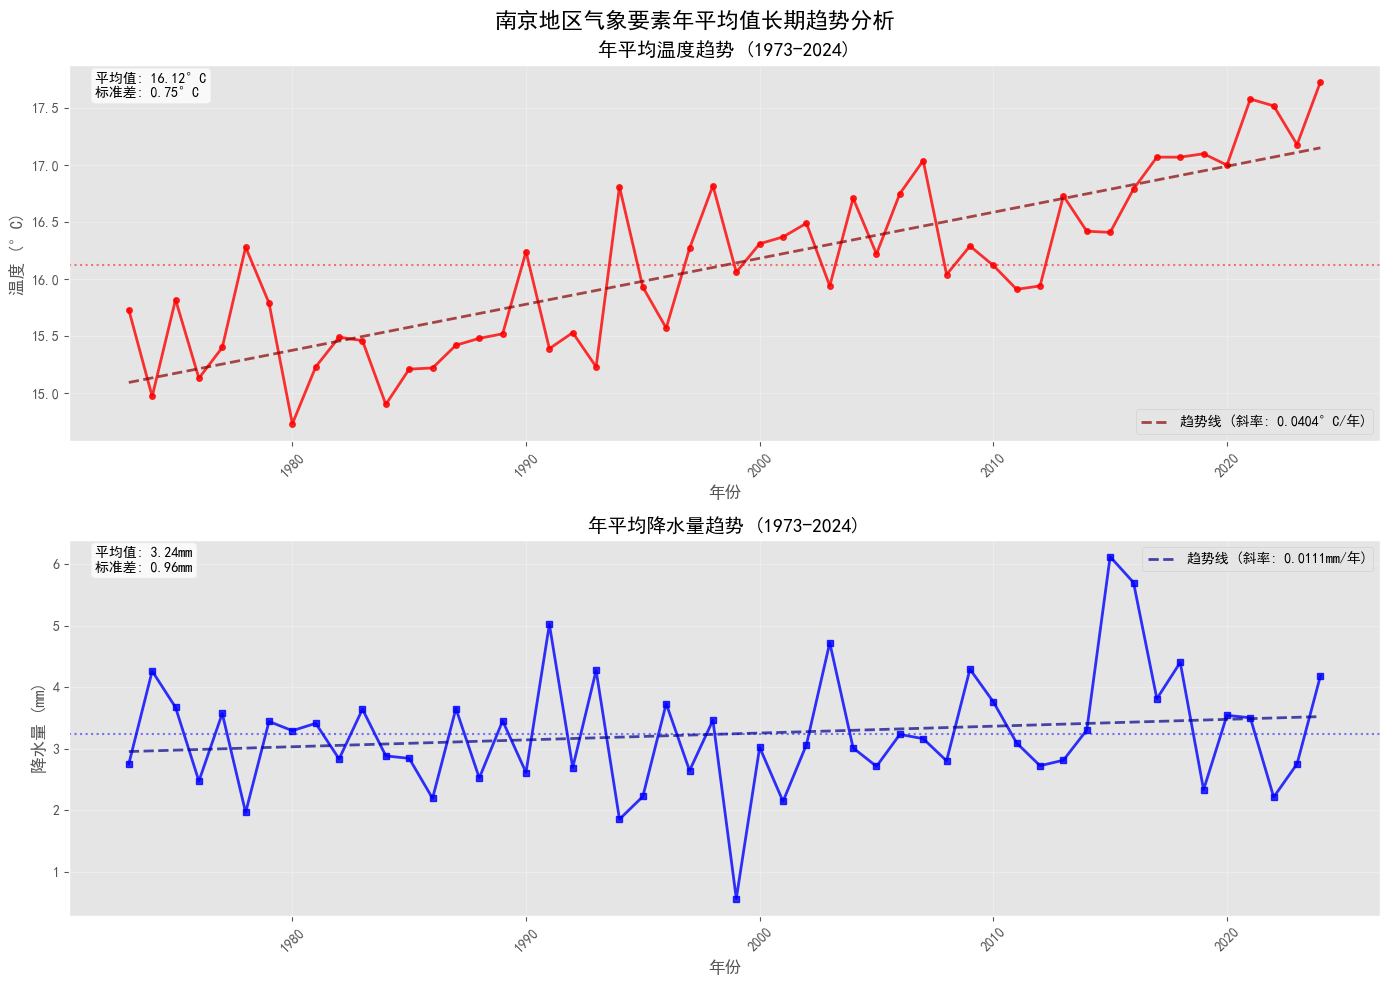



üìä Âπ¥Âπ≥ÂùáÂÄºË∂ãÂäøÂàÜÊûêÁªìÊûú:

üå°Ô∏è Ê∏©Â∫¶Ë∂ãÂäø:
   - ÊÄª‰ΩìË∂ãÂäø: ‰∏äÂçá
   - ÂèòÂåñÁéá: 0.0404¬∞C/Âπ¥
   - Â§öÂπ¥Âπ≥Âùá: 16.12¬∞C
   - Ê†áÂáÜÂ∑Æ: 0.75¬∞C
   - ÊúÄÈ´òÂπ¥Âπ≥Âùá: 17.73¬∞C (2024Âπ¥)
   - ÊúÄ‰ΩéÂπ¥Âπ≥Âùá: 14.73¬∞C (1980Âπ¥)

üåßÔ∏è ÈôçÊ∞¥ÈáèË∂ãÂäø:
   - ÊÄª‰ΩìË∂ãÂäø: Â¢ûÂä†
   - ÂèòÂåñÁéá: 0.0111mm/Âπ¥
   - Â§öÂπ¥Âπ≥Âùá: 3.24mm
   - Ê†áÂáÜÂ∑Æ: 0.96mm
   - ÊúÄÈ´òÂπ¥Âπ≥Âùá: 6.12mm (2015Âπ¥)
   - ÊúÄ‰ΩéÂπ¥Âπ≥Âùá: 0.56mm (1999Âπ¥)

üîó Ê∏©Â∫¶‰∏éÈôçÊ∞¥ÈáèÁöÑÁõ∏ÂÖ≥ÊÄß: 0.0148
   Áõ∏ÂÖ≥ÊÄßÂº∫Â∫¶: Âº±Ê≠£Áõ∏ÂÖ≥

‚úÖ Êó∂Èó¥Â∫èÂàóË∂ãÂäøÂàÜÊûêÂÆåÊàêÔºÅ


In [16]:
# ÁªòÂà∂ TEMP Âíå PRCP ÁöÑÂπ¥Âπ≥ÂùáÂÄºÊó∂Èó¥Â∫èÂàóÊäòÁ∫øÂõæ
print("ÂºÄÂßãÁªòÂà∂Âπ¥Âπ≥ÂùáÂÄºÊó∂Èó¥Â∫èÂàóÂõæ...")
print(f"Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: {df_weather.index.min()} Âà∞ {df_weather.index.max()}")
print("\n" + "="*60 + "\n")

# Á°Æ‰øùÁ¥¢ÂºïÊòØdatetimeÁ±ªÂûã
if not isinstance(df_weather.index, pd.DatetimeIndex):
    print("ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...")
    df_weather.index = pd.to_datetime(df_weather.index)
    print("Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê")

# ÊèêÂèñÂπ¥‰ªΩÂπ∂ËÆ°ÁÆóÂπ¥Âπ≥ÂùáÂÄº
print("ËÆ°ÁÆóÂπ¥Âπ≥ÂùáÂÄº...")
df_weather['Year'] = df_weather.index.year

# ËÆ°ÁÆóTEMPÂíåPRCPÁöÑÂπ¥Âπ≥ÂùáÂÄº
yearly_stats = df_weather.groupby('Year').agg({
    'TEMP': 'mean',
    'PRCP': 'mean'
}).round(2)

print(f"Âπ¥‰ªΩËåÉÂõ¥: {yearly_stats.index.min()} - {yearly_stats.index.max()}")
print(f"ÊÄªÂÖ± {len(yearly_stats)} Âπ¥ÁöÑÊï∞ÊçÆ")

# ÊòæÁ§∫ÂâçÂá†Âπ¥ÂíåÊúÄÂêéÂá†Âπ¥ÁöÑÁªüËÆ°
print("\nÂâç5Âπ¥ÁöÑÂπ¥Âπ≥ÂùáÂÄº:")
print(yearly_stats.head())
print("\nÊúÄÂêé5Âπ¥ÁöÑÂπ¥Âπ≥ÂùáÂÄº:")
print(yearly_stats.tail())

print("\n" + "-"*40 + "\n")

# ÂàõÂª∫ÂõæÂΩ¢
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Âçó‰∫¨Âú∞Âå∫Ê∞îË±°Ë¶ÅÁ¥†Âπ¥Âπ≥ÂùáÂÄºÈïøÊúüË∂ãÂäøÂàÜÊûê', fontsize=16, fontweight='bold')

# 1. ÁªòÂà∂Ê∏©Â∫¶(TEMP)ÁöÑÂπ¥Âπ≥ÂùáÂÄºË∂ãÂäø
ax1.plot(yearly_stats.index, yearly_stats['TEMP'], 
         color='red', linewidth=2, marker='o', markersize=4, alpha=0.8)
ax1.set_title('Âπ¥Âπ≥ÂùáÊ∏©Â∫¶Ë∂ãÂäø (1973-2024)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Âπ¥‰ªΩ', fontsize=12)
ax1.set_ylabel('Ê∏©Â∫¶ (¬∞C)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
z1 = np.polyfit(yearly_stats.index, yearly_stats['TEMP'], 1)
p1 = np.poly1d(z1)
ax1.plot(yearly_stats.index, p1(yearly_stats.index), 
         color='darkred', linestyle='--', linewidth=2, alpha=0.7, 
         label=f'Ë∂ãÂäøÁ∫ø (ÊñúÁéá: {z1[0]:.4f}¬∞C/Âπ¥)')
ax1.legend()

# Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØ
temp_mean = yearly_stats['TEMP'].mean()
temp_std = yearly_stats['TEMP'].std()
ax1.axhline(y=temp_mean, color='red', linestyle=':', alpha=0.5, 
           label=f'Âπ≥ÂùáÂÄº: {temp_mean:.2f}¬∞C')
ax1.text(0.02, 0.98, f'Âπ≥ÂùáÂÄº: {temp_mean:.2f}¬∞C\nÊ†áÂáÜÂ∑Æ: {temp_std:.2f}¬∞C', 
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. ÁªòÂà∂ÈôçÊ∞¥Èáè(PRCP)ÁöÑÂπ¥Âπ≥ÂùáÂÄºË∂ãÂäø
ax2.plot(yearly_stats.index, yearly_stats['PRCP'], 
         color='blue', linewidth=2, marker='s', markersize=4, alpha=0.8)
ax2.set_title('Âπ¥Âπ≥ÂùáÈôçÊ∞¥ÈáèË∂ãÂäø (1973-2024)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Âπ¥‰ªΩ', fontsize=12)
ax2.set_ylabel('ÈôçÊ∞¥Èáè (mm)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
z2 = np.polyfit(yearly_stats.index, yearly_stats['PRCP'], 1)
p2 = np.poly1d(z2)
ax2.plot(yearly_stats.index, p2(yearly_stats.index), 
         color='darkblue', linestyle='--', linewidth=2, alpha=0.7, 
         label=f'Ë∂ãÂäøÁ∫ø (ÊñúÁéá: {z2[0]:.4f}mm/Âπ¥)')
ax2.legend()

# Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØ
prcp_mean = yearly_stats['PRCP'].mean()
prcp_std = yearly_stats['PRCP'].std()
ax2.axhline(y=prcp_mean, color='blue', linestyle=':', alpha=0.5, 
           label=f'Âπ≥ÂùáÂÄº: {prcp_mean:.2f}mm')
ax2.text(0.02, 0.98, f'Âπ≥ÂùáÂÄº: {prcp_mean:.2f}mm\nÊ†áÂáÜÂ∑Æ: {prcp_std:.2f}mm', 
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")
print("üìä Âπ¥Âπ≥ÂùáÂÄºË∂ãÂäøÂàÜÊûêÁªìÊûú:")

# Ê∏©Â∫¶Ë∂ãÂäøÂàÜÊûê
temp_trend = "‰∏äÂçá" if z1[0] > 0 else "‰∏ãÈôç" if z1[0] < 0 else "Á®≥ÂÆö"
print(f"\nüå°Ô∏è Ê∏©Â∫¶Ë∂ãÂäø:")
print(f"   - ÊÄª‰ΩìË∂ãÂäø: {temp_trend}")
print(f"   - ÂèòÂåñÁéá: {z1[0]:.4f}¬∞C/Âπ¥")
print(f"   - Â§öÂπ¥Âπ≥Âùá: {temp_mean:.2f}¬∞C")
print(f"   - Ê†áÂáÜÂ∑Æ: {temp_std:.2f}¬∞C")
print(f"   - ÊúÄÈ´òÂπ¥Âπ≥Âùá: {yearly_stats['TEMP'].max():.2f}¬∞C ({yearly_stats['TEMP'].idxmax()}Âπ¥)")
print(f"   - ÊúÄ‰ΩéÂπ¥Âπ≥Âùá: {yearly_stats['TEMP'].min():.2f}¬∞C ({yearly_stats['TEMP'].idxmin()}Âπ¥)")

# ÈôçÊ∞¥ÈáèË∂ãÂäøÂàÜÊûê
prcp_trend = "Â¢ûÂä†" if z2[0] > 0 else "ÂáèÂ∞ë" if z2[0] < 0 else "Á®≥ÂÆö"
print(f"\nüåßÔ∏è ÈôçÊ∞¥ÈáèË∂ãÂäø:")
print(f"   - ÊÄª‰ΩìË∂ãÂäø: {prcp_trend}")
print(f"   - ÂèòÂåñÁéá: {z2[0]:.4f}mm/Âπ¥")
print(f"   - Â§öÂπ¥Âπ≥Âùá: {prcp_mean:.2f}mm")
print(f"   - Ê†áÂáÜÂ∑Æ: {prcp_std:.2f}mm")
print(f"   - ÊúÄÈ´òÂπ¥Âπ≥Âùá: {yearly_stats['PRCP'].max():.2f}mm ({yearly_stats['PRCP'].idxmax()}Âπ¥)")
print(f"   - ÊúÄ‰ΩéÂπ¥Âπ≥Âùá: {yearly_stats['PRCP'].min():.2f}mm ({yearly_stats['PRCP'].idxmin()}Âπ¥)")

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
correlation = yearly_stats['TEMP'].corr(yearly_stats['PRCP'])
print(f"\nüîó Ê∏©Â∫¶‰∏éÈôçÊ∞¥ÈáèÁöÑÁõ∏ÂÖ≥ÊÄß: {correlation:.4f}")
if abs(correlation) > 0.5:
    corr_strength = "Âº∫"
elif abs(correlation) > 0.3:
    corr_strength = "‰∏≠Á≠â"
else:
    corr_strength = "Âº±"
corr_direction = "Ê≠£" if correlation > 0 else "Ë¥ü"
print(f"   Áõ∏ÂÖ≥ÊÄßÂº∫Â∫¶: {corr_strength}{corr_direction}Áõ∏ÂÖ≥")

print("\n‚úÖ Êó∂Èó¥Â∫èÂàóË∂ãÂäøÂàÜÊûêÂÆåÊàêÔºÅ")

# Ê∏ÖÁêÜ‰∏¥Êó∂Âàó
df_weather = df_weather.drop('Year', axis=1)
# print("\nÂ∑≤Ê∏ÖÁêÜ‰∏¥Êó∂ÂèòÈáè")

**ÂÆûÈ™åÁªìÊûúÂõæË°®Ôºà‰∏äÂõæÔºâÔºö**
* Âõæ‰∏≠Á∫¢Á∫øÂ±ïÁ§∫‰∫Ü1973-2024Âπ¥Èó¥ÊØèÂπ¥ÁöÑÂπ¥Âπ≥ÂùáÊ∏©Â∫¶„ÄÇ
* Á∫¢Ëâ≤ËôöÁ∫øË°®Á§∫Ëøô52Âπ¥Èó¥ÁöÑÊÄª‰ΩìÂπ≥ÂùáÊ∏©Â∫¶Ôºå‰∏∫ **16.12 ¬∞C**„ÄÇ
* Ê£ïËâ≤ËôöÁ∫øÊòØÊ†πÊçÆÊâÄÊúâÊï∞ÊçÆÁÇπÊãüÂêàÁöÑÁ∫øÊÄßË∂ãÂäøÁ∫ø„ÄÇ

**ÁªìÊûúÂàÜÊûêÔºö**
1.  **ÊòæËëóÁöÑÂ¢ûÊ∏©Ë∂ãÂäø**Ôºö‰ªéÂõæ‰∏≠ÂèØ‰ª•ÈùûÂ∏∏Ê∏ÖÊô∞Âú∞ËßÇÂØüÂà∞ÔºåÂπ¥Âπ≥ÂùáÊ∏©Â∫¶ÁöÑË∂ãÂäøÁ∫øÂëàÁé∞Âá∫ÊòéÊòæÁöÑ‰∏äÂçáÂßøÊÄÅ„ÄÇÂÖ∂ÊñúÁéáÁ∫¶‰∏∫ **+0.0404 ¬∞C/Âπ¥**ÔºåËøôË°®ÊòéÂú®ËøáÂéªÁöÑ52Âπ¥ÈáåÔºåÂçó‰∫¨Âú∞Âå∫ÁöÑÂπ¥Âπ≥ÂùáÊ∏©Â∫¶‰ª•ÊØèÂçÅÂπ¥Á∫¶0.4¬∞CÁöÑÈÄüÂ∫¶Âú®Á®≥ÂÆöÂçáÈ´ò„ÄÇËøôÊòØ‰∏Ä‰∏™ÈùûÂ∏∏ÊòæËëóÁöÑÂå∫ÂüüÊÄßÊ∞îÂÄôÂèòÊöñ‰ø°Âè∑„ÄÇ
2.  **Âπ¥ÈôÖÊ≥¢Âä®ÊÄß**ÔºöÂ∞ΩÁÆ°ÊÄª‰ΩìË∂ãÂäøÊòØ‰∏äÂçáÁöÑÔºå‰ΩÜÊØèÂπ¥ÁöÑÊ∏©Â∫¶Â≠òÂú®ÁùÄÊòéÊòæÁöÑÂπ¥ÈôÖÊ≥¢Âä®„ÄÇ‰æãÂ¶ÇÔºåÂú®1980Âπ¥ÂâçÂêéÂá∫Áé∞‰∫ÜÂá†‰∏™Áõ∏ÂØπÂáâÁàΩÁöÑÂπ¥‰ªΩÔºåËÄåÂú®21‰∏ñÁ∫™ÂêéÔºåÁâπÂà´ÊòØ2010Âπ¥‰ª•ÂêéÔºåÁªùÂ§ßÂ§öÊï∞Âπ¥‰ªΩÁöÑÂπ≥ÂùáÊ∏©Â∫¶ÈÉΩÂ§Ñ‰∫éÈïøÊúüÂπ≥ÂùáÂÄº‰πã‰∏äÔºå‰∏îÂ§ö‰∏™Á†¥Á∫™ÂΩïÁöÑÊöñÂπ¥Âá∫Áé∞Âú®ËøëÊúü„ÄÇÊï∞ÊçÆÁöÑÊ†áÂáÜÂ∑Æ‰∏∫ **0.75 ¬∞C**Ôºå‰πüÈáèÂåñ‰∫ÜËøôÁßçÂõ¥ÁªïÂπ≥ÂùáÂÄºÁöÑÊ≥¢Âä®Á®ãÂ∫¶„ÄÇ
3.  **ÁªìËÆ∫**ÔºöËØ•ÁªìÊûúËØÅÂÆû‰∫ÜÁ†îÁ©∂Âå∫ÂüüÊ≠£ÁªèÂéÜÁùÄÊåÅÁª≠ÁöÑÊ∞îÂÄôÂèòÊöñËøáÁ®ã„ÄÇËøô‰∏ÄËÉåÊôØÂØπ‰∫éÊàë‰ª¨ÁöÑÁ†îÁ©∂Ëá≥ÂÖ≥ÈáçË¶ÅÔºåÂõ†‰∏∫Ê∏©Â∫¶ÊòØÂΩ±ÂìçÈõæ„ÄÅÈõ∑Êö¥„ÄÅÈôçÊ∞¥ÂΩ¢ÊÄÅÁ≠âÂ§öÁßçÂ§©Ê∞îÁé∞Ë±°ÁöÑÂÖ≥ÈîÆÂõ†Â≠ê„ÄÇÂú®ÊûÑÂª∫È¢ÑÊµãÊ®°ÂûãÊó∂ÔºåÂøÖÈ°ªËÄÉËôëÂà∞Ê∏©Â∫¶Âü∫Á∫øÁöÑËøôÁßçÈùûÂπ≥Á®≥ÊÄßÂèòÂåñ„ÄÇ

---

**ÂÆûÈ™åÁªìÊûúÂõæË°®Ôºà‰∏ãÂõæÔºâÔºö**
* Âõæ‰∏≠ËìùÁ∫øÂ±ïÁ§∫‰∫Ü1973-2024Âπ¥Èó¥ÊØèÂπ¥ÁöÑÂπ¥Âπ≥ÂùáÊó•ÈôçÊ∞¥Èáè„ÄÇ
* ËìùËâ≤ËôöÁ∫øË°®Á§∫Ëøô52Âπ¥Èó¥ÁöÑÊÄª‰ΩìÂπ≥ÂùáÂÄºÔºå‰∏∫ **3.24 mm/Â§©** (ÊäòÂêàÂπ¥ÊÄªÈôçÊ∞¥ÈáèÁ∫¶‰∏∫1183 mm)„ÄÇ
* ËìùËâ≤ËôöÁ∫øÊòØÊ†πÊçÆÊâÄÊúâÊï∞ÊçÆÁÇπÊãüÂêàÁöÑÁ∫øÊÄßË∂ãÂäøÁ∫ø„ÄÇ

**ÁªìÊûúÂàÜÊûêÔºö**
1.  **ÈïøÊúüË∂ãÂäø‰∏çÊòéÊòæ**Ôºö‰∏éÊ∏©Â∫¶‰∏çÂêåÔºåÂπ¥Âπ≥ÂùáÈôçÊ∞¥ÈáèÁöÑË∂ãÂäøÁ∫øÊñúÁéá‰ªÖ‰∏∫ **+0.011 mm/Âπ¥**ÔºåÈùûÂ∏∏Êé•Ëøë‰∫éÈõ∂„ÄÇËøôË°®ÊòéÂú®ËøáÂéªÁöÑ52Âπ¥ÈáåÔºåÂçó‰∫¨Âú∞Âå∫ÁöÑÂπ¥Âπ≥ÂùáÈôçÊ∞¥ÈáèÊ≤°ÊúâË°®Áé∞Âá∫ÁªüËÆ°‰∏äÊòæËëóÁöÑÂ¢ûÂä†ÊàñÂáèÂ∞ëË∂ãÂäø„ÄÇË∂ãÂäøÁ∫øÂá†‰πéÊòØÊ∞¥Âπ≥ÁöÑ„ÄÇ
2.  **ÊòæËëóÁöÑÂπ¥ÈôÖÂèòÁéá**ÔºöÈôçÊ∞¥ÈáèÂàÜÊûêÂõæ‰∏≠ÊúÄÊòæËëóÁöÑÁâπÂæÅÊòØÂÖ∂Â∑®Â§ßÁöÑÂπ¥ÈôÖÂèòÁéáÔºàyear-to-year variabilityÔºâ„ÄÇÂ¶ÇÂõæÊâÄÁ§∫ÔºåÂ≠òÂú®ÈôçÊ∞¥ÂºÇÂ∏∏ÂÅèÂ§öÁöÑ‚Äú‰∏∞Ê∞¥Âπ¥‚ÄùÔºà‰æãÂ¶Ç1990Âπ¥‰ª£Âàù„ÄÅ2016Âπ¥ÂâçÂêéÔºâÂíåÂºÇÂ∏∏ÂÅèÂ∞ëÁöÑ‚ÄúÊûØÊ∞¥Âπ¥‚ÄùÔºà‰æãÂ¶Ç1990Âπ¥‰ª£Êú´Ôºâ„ÄÇÊï∞ÊçÆÁöÑÊ†áÂáÜÂ∑Æ‰∏∫ **0.95 mm**ÔºåËøô‰∏™Êï∞ÂÄºÁõ∏ÂØπ‰∫é3.24 mmÁöÑÂπ≥ÂùáÂÄºÊù•ËØ¥ÈùûÂ∏∏Â§ßÔºàÂèòÂºÇÁ≥ªÊï∞Á∫¶‰∏∫29%ÔºâÔºåËøõ‰∏ÄÊ≠•ËØÅÂÆû‰∫ÜÈôçÊ∞¥ÈáèÁöÑÂπ¥ÈôÖÊ≥¢Âä®ÊòØËØ•Âú∞Âå∫Ê∞îÂÄôÁöÑ‰∏ªË¶ÅÁâπÂæÅ„ÄÇ
3.  **ÁªìËÆ∫**Ôºö‰∏éÊåÅÁª≠ÂèòÊöñÁöÑÊ∏©Â∫¶ËÉåÊôØ‰∏çÂêåÔºåÁ†îÁ©∂Âå∫ÂüüÁöÑÈôçÊ∞¥Ê®°ÂºèÂú®ÈïøÊúüÂ∞∫Â∫¶‰∏äÁõ∏ÂØπÁ®≥ÂÆöÔºå‰ΩÜÂπ¥ÈôÖÈó¥ÁöÑÂ∑ÆÂºÇÂ∑®Â§ß„ÄÇËøôÊÑèÂë≥ÁùÄÔºåÂØπ‰∫éÈôçÊ∞¥Áõ∏ÂÖ≥ÁöÑÈ¢ÑÊµã‰ªªÂä°ÔºàÂ¶ÇÊó•ÈôçÊ∞¥ÈáèÈ¢ÑÊµã„ÄÅÈôçÊ∞¥ÂΩ¢ÊÄÅÂà§Âà´ÔºâÔºåÊ®°ÂûãÈúÄË¶ÅÊúâËÉΩÂäõÊçïÊçâÂØºËá¥ËøôÁßçÈ´òÂèòÁéáÁöÑÁü≠ÊúüÂíåÂπ¥ÈôÖÂ∞∫Â∫¶ÁöÑÂΩ±ÂìçÂõ†Â≠êÔºåËÄåÈùû‰æùËµñ‰∏Ä‰∏™ÁÆÄÂçïÁöÑÈïøÊúüË∂ãÂäø„ÄÇ

---

**ÁªºÂêàÂ∞èÁªìÔºö**

ÈÄöËøáÂØπËøáÂéª52Âπ¥Ê∞îË±°Êï∞ÊçÆÁöÑÂàùÊ≠•ÂàÜÊûêÔºåÊàë‰ª¨Á°ÆÁ´ã‰∫ÜÊú¨Ê¨°Á†îÁ©∂ÁöÑÊ∞îÂÄôËÉåÊôØÔºö‰∏Ä‰∏™‰º¥ÈöèÁùÄÊòæËëó‰∏îÁ®≥ÂÆöÂ¢ûÊ∏©Ë∂ãÂäø„ÄÅÂêåÊó∂ÈôçÊ∞¥ÈáèÂëàÁé∞È´òÂº∫Â∫¶Âπ¥ÈôÖÊ≥¢Âä®ÁöÑÁéØÂ¢É„ÄÇËøô‰∏ÄÂèëÁé∞‰∏∫Êàë‰ª¨ÂêéÁª≠ÁöÑÁâπÂæÅÂ∑•Á®ãÂíåÊ®°ÂûãÊûÑÂª∫Êèê‰æõ‰∫ÜÈáçË¶Å‰æùÊçÆ„ÄÇ‰æãÂ¶ÇÔºåÂú®Ê∏©Â∫¶È¢ÑÊµãÊ®°Âûã‰∏≠ÔºåÊó∂Èó¥ÔºàÂπ¥‰ªΩÔºâÊú¨Ë∫´ÂèØËÉΩÂ∞±ÊòØ‰∏Ä‰∏™Âº∫ÊúâÂäõÁöÑÁâπÂæÅÔºõËÄåÂú®ÈôçÊ∞¥È¢ÑÊµãÊ®°Âûã‰∏≠ÔºåÂàôÈúÄË¶ÅÊõ¥‰æßÈáç‰∫éÊåñÊéòËÉΩÂ§üËß£ÈáäÂÖ∂È´òÈ¢ëÊ≥¢Âä®ÁöÑÁü≠ÊúüÊ∞îË±°ÂâçÂÖÜ‰ø°Âè∑„ÄÇ

#### 1.4.2 Â§©Ê∞îÁé∞Ë±°ÂèëÁîüÈ¢ëÁéáÂàÜÊûê

Âú®ÂØπÂÖ≥ÈîÆÊ∞îË±°Ë¶ÅÁ¥†ËøõË°åÈïøÊúüË∂ãÂäøÂàÜÊûêÂêéÔºåÊàë‰ª¨Ëøõ‰∏ÄÊ≠•ËÅöÁÑ¶‰∫é‰∏§‰∏™ÂØπÁ§æ‰ºöÁªèÊµéÊ¥ªÂä®ÊúâÈáçË¶ÅÂΩ±ÂìçÁöÑÁâπÂÆöÂ§©Ê∞îÁé∞Ë±°‚Äî‚ÄîÈõæ `Fog` ÂíåÈõ∑Êö¥ `Thunder` „ÄÇÈÄöËøáÁªüËÆ°1973Âπ¥Ëá≥2024Âπ¥Èó¥Ëøô‰∏§ÁßçÁé∞Ë±°ÊØèÂπ¥ÁöÑÂèëÁîüÂ§©Êï∞ÔºåÊàë‰ª¨ÂèØ‰ª•ËßÇÂØüÂÖ∂È¢ëÁéáÁöÑÈïøÊúüÊºîÂèòËßÑÂæãÔºåËøôÂØπ‰∫éÁêÜËß£Áõ∏ÂÖ≥È¢ÑÊµã‰ªªÂä°ÁöÑËÉåÊôØËá≥ÂÖ≥ÈáçË¶ÅÔºö

ÂºÄÂßãÂàÜÊûêÈõæ(Fog)ÂíåÈõ∑Êö¥(Thunder)Áé∞Ë±°ÁöÑÂπ¥Â∫¶ÂèëÁîüÊÉÖÂÜµ...
Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: 1973-01-01 00:00:00 Âà∞ 2024-12-31 00:00:00


‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑ Fog Âíå Thunder Âàó

ËÆ°ÁÆóÂπ¥Â∫¶ÂèëÁîüÂ§©Êï∞...
Âπ¥‰ªΩËåÉÂõ¥: 1973 - 2024
ÊÄªÂÖ± 52 Âπ¥ÁöÑÊï∞ÊçÆ

ÂêÑÁé∞Ë±°ÁöÑÂπ¥Â∫¶ÂèëÁîüÂ§©Êï∞ÁªüËÆ°:

Èõæ(Fog)Áé∞Ë±°:
  Âπ≥ÂùáÊØèÂπ¥ÂèëÁîü: 46.6 Â§©
  ÊúÄÂ§öÂπ¥‰ªΩ: 116 Â§© (2003Âπ¥)
  ÊúÄÂ∞ëÂπ¥‰ªΩ: 12 Â§© (2024Âπ¥)
  Ê†áÂáÜÂ∑Æ: 31.7 Â§©

Èõ∑Êö¥(Thunder)Áé∞Ë±°:
  Âπ≥ÂùáÊØèÂπ¥ÂèëÁîü: 21.3 Â§©
  ÊúÄÂ§öÂπ¥‰ªΩ: 38 Â§© (2005Âπ¥)
  ÊúÄÂ∞ëÂπ¥‰ªΩ: 7 Â§© (2019Âπ¥)
  Ê†áÂáÜÂ∑Æ: 6.8 Â§©

Ââç5Âπ¥ÂíåÊúÄÂêé5Âπ¥ÁöÑÊï∞ÊçÆ:

Ââç5Âπ¥:
      Fog  Thunder
Year              
1973   15       23
1974   19       28
1975   21       27
1976   20       18
1977   34       19

ÊúÄÂêé5Âπ¥:
      Fog  Thunder
Year              
2020   25       21
2021   23       13
2022   16       11
2023   16       20
2024   12       11

--------------------------------------------------



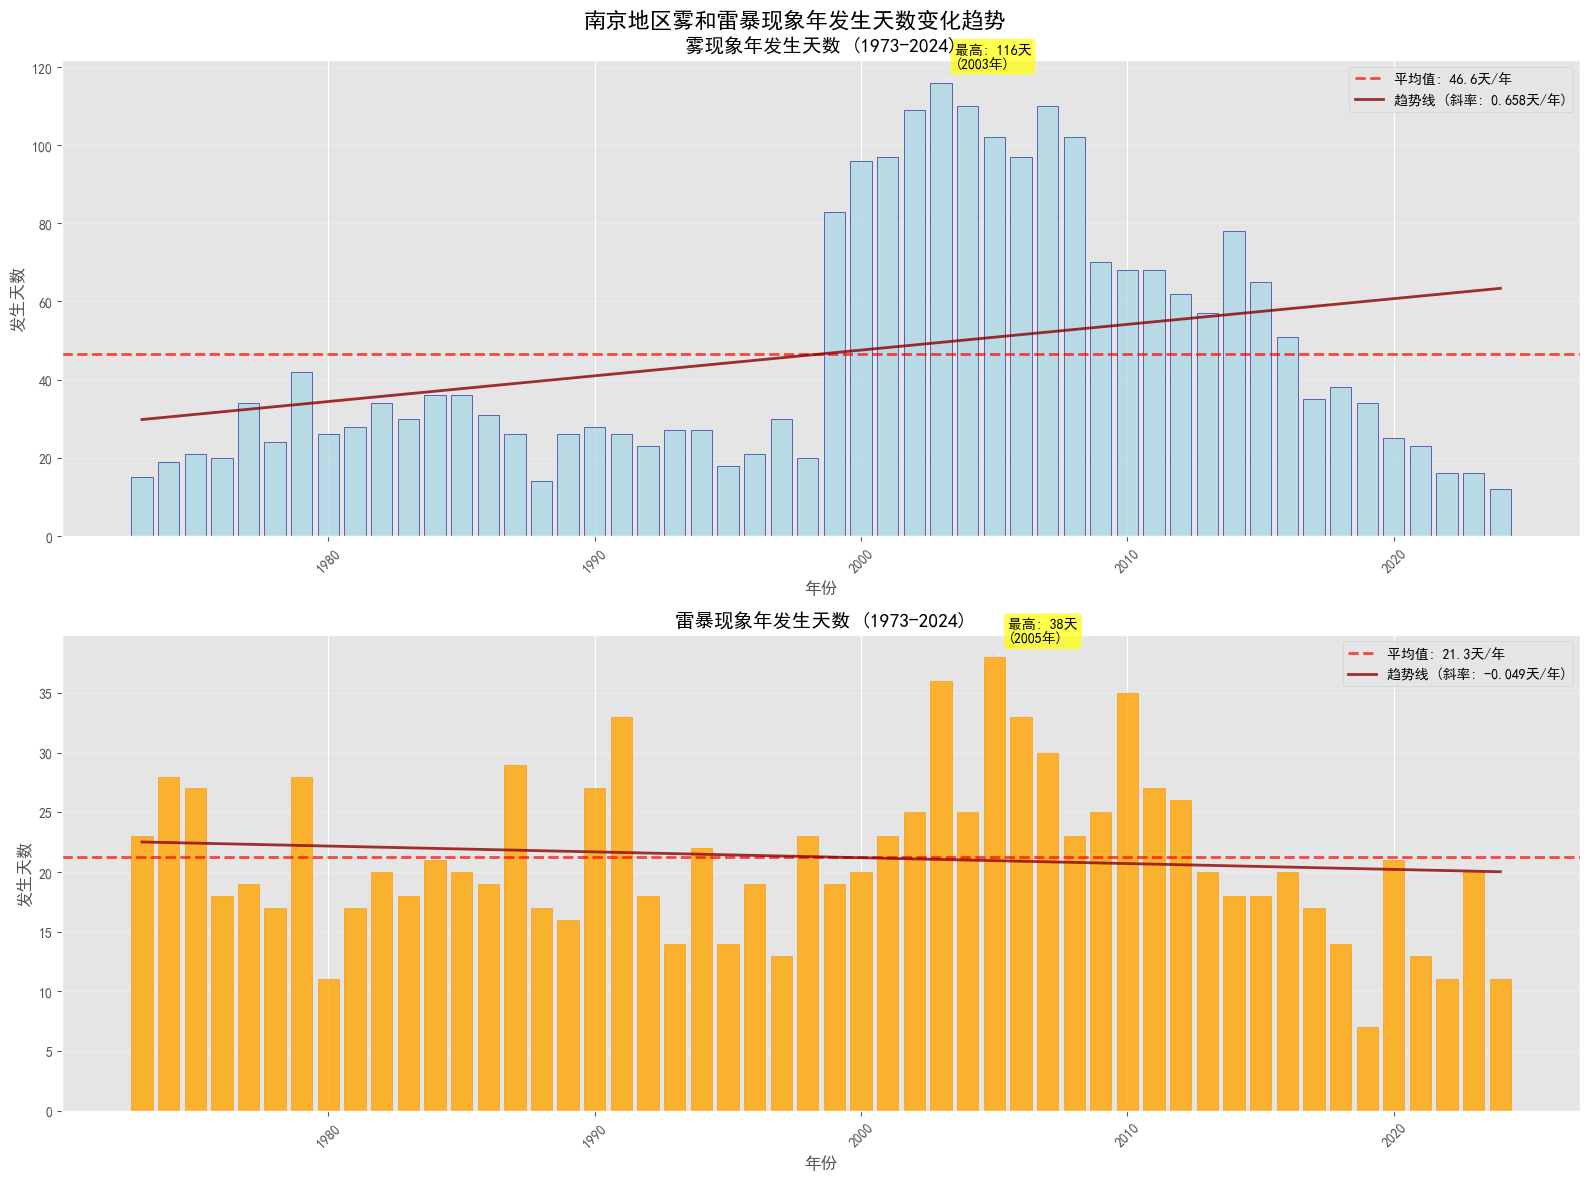



üìä Â§©Ê∞îÁé∞Ë±°Âπ¥Â∫¶Ë∂ãÂäøÂàÜÊûêÁªìÊûú:

üå´Ô∏è ÈõæÁé∞Ë±°Ë∂ãÂäø:
   - ÊÄª‰ΩìË∂ãÂäø: Â¢ûÂä†
   - ÂèòÂåñÁéá: 0.658Â§©/Âπ¥
   - Âπ¥Âπ≥ÂùáÂèëÁîü: 46.6Â§©
   - Ê†áÂáÜÂ∑Æ: 31.7Â§©
   - ÊúÄÂ§öÂπ¥‰ªΩ: 116Â§© (2003Âπ¥)
   - ÊúÄÂ∞ëÂπ¥‰ªΩ: 12Â§© (2024Âπ¥)

‚õàÔ∏è Èõ∑Êö¥Áé∞Ë±°Ë∂ãÂäø:
   - ÊÄª‰ΩìË∂ãÂäø: ÂáèÂ∞ë
   - ÂèòÂåñÁéá: -0.049Â§©/Âπ¥
   - Âπ¥Âπ≥ÂùáÂèëÁîü: 21.3Â§©
   - Ê†áÂáÜÂ∑Æ: 6.8Â§©
   - ÊúÄÂ§öÂπ¥‰ªΩ: 38Â§© (2005Âπ¥)
   - ÊúÄÂ∞ëÂπ¥‰ªΩ: 7Â§© (2019Âπ¥)

üîó Èõæ‰∏éÈõ∑Êö¥Áé∞Ë±°ÁöÑÁõ∏ÂÖ≥ÊÄß: 0.5184
   Áõ∏ÂÖ≥ÊÄßÂº∫Â∫¶: Âº∫Ê≠£Áõ∏ÂÖ≥

üìà ËøëÊúüÂèòÂåñÂàÜÊûê (Ëøë10Âπ¥ vs Ââç10Âπ¥):
   ÈõæÁé∞Ë±°: 31.5Â§©/Âπ¥ vs 26.3Â§©/Âπ¥
   Èõ∑Êö¥Áé∞Ë±°: 15.2Â§©/Âπ¥ vs 20.8Â§©/Âπ¥
   ÈõæÁé∞Ë±°ÂèòÂåñ: +19.8%
   Èõ∑Êö¥Áé∞Ë±°ÂèòÂåñ: -26.9%

‚úÖ Â§©Ê∞îÁé∞Ë±°Âπ¥Â∫¶ÁªüËÆ°ÂàÜÊûêÂÆåÊàêÔºÅ


In [17]:
# ÂØπ Fog Âíå Thunder Áé∞Ë±°ËøõË°åÂπ¥Â∫¶ÁªüËÆ°ÂàÜÊûê
print("ÂºÄÂßãÂàÜÊûêÈõæ(Fog)ÂíåÈõ∑Êö¥(Thunder)Áé∞Ë±°ÁöÑÂπ¥Â∫¶ÂèëÁîüÊÉÖÂÜµ...")
print(f"Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: {df_weather.index.min()} Âà∞ {df_weather.index.max()}")
print("\n" + "="*70 + "\n")

# Á°Æ‰øùÁ¥¢ÂºïÊòØdatetimeÁ±ªÂûã
if not isinstance(df_weather.index, pd.DatetimeIndex):
    print("ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...")
    df_weather.index = pd.to_datetime(df_weather.index)
    print("Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê")

# Ê£ÄÊü•FogÂíåThunderÂàóÊòØÂê¶Â≠òÂú®
required_columns = ['Fog', 'Thunder']
missing_columns = [col for col in required_columns if col not in df_weather.columns]
if missing_columns:
    print(f"ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÂàó: {missing_columns}")
    print(f"ÂΩìÂâçÊï∞ÊçÆÈõÜÂåÖÂê´ÁöÑÂàó: {list(df_weather.columns)}")
else:
    print("‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑ Fog Âíå Thunder Âàó")

# ÊèêÂèñÂπ¥‰ªΩÂπ∂ËÆ°ÁÆóÂπ¥Â∫¶ÂèëÁîüÂ§©Êï∞
print("\nËÆ°ÁÆóÂπ¥Â∫¶ÂèëÁîüÂ§©Êï∞...")
df_weather['Year'] = df_weather.index.year

# ËÆ°ÁÆóÊØèÂπ¥ÈõæÂíåÈõ∑Êö¥ÁöÑÂèëÁîüÂ§©Êï∞ÔºàÂÄº‰∏∫1ÁöÑÂ§©Êï∞Ôºâ
yearly_phenomena = df_weather.groupby('Year').agg({
    'Fog': 'sum',      # ÈõæÂèëÁîüÁöÑÊÄªÂ§©Êï∞
    'Thunder': 'sum'   # Èõ∑Êö¥ÂèëÁîüÁöÑÊÄªÂ§©Êï∞
})

print(f"Âπ¥‰ªΩËåÉÂõ¥: {yearly_phenomena.index.min()} - {yearly_phenomena.index.max()}")
print(f"ÊÄªÂÖ± {len(yearly_phenomena)} Âπ¥ÁöÑÊï∞ÊçÆ")

# ÊòæÁ§∫Âü∫Êú¨ÁªüËÆ°‰ø°ÊÅØ
print("\nÂêÑÁé∞Ë±°ÁöÑÂπ¥Â∫¶ÂèëÁîüÂ§©Êï∞ÁªüËÆ°:")
print("\nÈõæ(Fog)Áé∞Ë±°:")
fog_stats = yearly_phenomena['Fog'].describe()
print(f"  Âπ≥ÂùáÊØèÂπ¥ÂèëÁîü: {fog_stats['mean']:.1f} Â§©")
print(f"  ÊúÄÂ§öÂπ¥‰ªΩ: {yearly_phenomena['Fog'].max()} Â§© ({yearly_phenomena['Fog'].idxmax()}Âπ¥)")
print(f"  ÊúÄÂ∞ëÂπ¥‰ªΩ: {yearly_phenomena['Fog'].min()} Â§© ({yearly_phenomena['Fog'].idxmin()}Âπ¥)")
print(f"  Ê†áÂáÜÂ∑Æ: {fog_stats['std']:.1f} Â§©")

print("\nÈõ∑Êö¥(Thunder)Áé∞Ë±°:")
thunder_stats = yearly_phenomena['Thunder'].describe()
print(f"  Âπ≥ÂùáÊØèÂπ¥ÂèëÁîü: {thunder_stats['mean']:.1f} Â§©")
print(f"  ÊúÄÂ§öÂπ¥‰ªΩ: {yearly_phenomena['Thunder'].max()} Â§© ({yearly_phenomena['Thunder'].idxmax()}Âπ¥)")
print(f"  ÊúÄÂ∞ëÂπ¥‰ªΩ: {yearly_phenomena['Thunder'].min()} Â§© ({yearly_phenomena['Thunder'].idxmin()}Âπ¥)")
print(f"  Ê†áÂáÜÂ∑Æ: {thunder_stats['std']:.1f} Â§©")

print("\nÂâç5Âπ¥ÂíåÊúÄÂêé5Âπ¥ÁöÑÊï∞ÊçÆ:")
print("\nÂâç5Âπ¥:")
print(yearly_phenomena.head())
print("\nÊúÄÂêé5Âπ¥:")
print(yearly_phenomena.tail())

print("\n" + "-"*50 + "\n")

# ÂàõÂª∫Êù°ÂΩ¢Âõæ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Âçó‰∫¨Âú∞Âå∫ÈõæÂíåÈõ∑Êö¥Áé∞Ë±°Âπ¥ÂèëÁîüÂ§©Êï∞ÂèòÂåñË∂ãÂäø', fontsize=16, fontweight='bold')

# ËÆæÁΩÆÊù°ÂΩ¢ÂõæÁöÑÂÆΩÂ∫¶ÂíåÈ¢úËâ≤
bar_width = 0.8
years = yearly_phenomena.index

# 1. ÁªòÂà∂ÈõæÁé∞Ë±°ÁöÑÂπ¥ÂèëÁîüÂ§©Êï∞Êù°ÂΩ¢Âõæ
bars1 = ax1.bar(years, yearly_phenomena['Fog'], 
                width=bar_width, color='lightblue', alpha=0.8, 
                edgecolor='darkblue', linewidth=0.5)
ax1.set_title('ÈõæÁé∞Ë±°Âπ¥ÂèëÁîüÂ§©Êï∞ (1973-2024)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Âπ¥‰ªΩ', fontsize=12)
ax1.set_ylabel('ÂèëÁîüÂ§©Êï∞', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=45)

# Ê∑ªÂä†Âπ≥ÂùáÁ∫ø
fog_mean = yearly_phenomena['Fog'].mean()
ax1.axhline(y=fog_mean, color='red', linestyle='--', linewidth=2, alpha=0.7, 
           label=f'Âπ≥ÂùáÂÄº: {fog_mean:.1f}Â§©/Âπ¥')
ax1.legend()

# Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
z1 = np.polyfit(years, yearly_phenomena['Fog'], 1)
p1 = np.poly1d(z1)
ax1.plot(years, p1(years), color='darkred', linewidth=2, alpha=0.8, 
         label=f'Ë∂ãÂäøÁ∫ø (ÊñúÁéá: {z1[0]:.3f}Â§©/Âπ¥)')
ax1.legend()

# Ê†áÊ≥®ÊúÄÈ´òÂíåÊúÄ‰ΩéÂÄº
max_fog_year = yearly_phenomena['Fog'].idxmax()
max_fog_value = yearly_phenomena['Fog'].max()
min_fog_year = yearly_phenomena['Fog'].idxmin()
min_fog_value = yearly_phenomena['Fog'].min()

ax1.annotate(f'ÊúÄÈ´ò: {max_fog_value}Â§©\n({max_fog_year}Âπ¥)', 
            xy=(max_fog_year, max_fog_value), xytext=(10, 10),
            textcoords='offset points', ha='left',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# 2. ÁªòÂà∂Èõ∑Êö¥Áé∞Ë±°ÁöÑÂπ¥ÂèëÁîüÂ§©Êï∞Êù°ÂΩ¢Âõæ
bars2 = ax2.bar(years, yearly_phenomena['Thunder'], 
                width=bar_width, color='orange', alpha=0.8, 
                edgecolor='darkorange', linewidth=0.5)
ax2.set_title('Èõ∑Êö¥Áé∞Ë±°Âπ¥ÂèëÁîüÂ§©Êï∞ (1973-2024)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Âπ¥‰ªΩ', fontsize=12)
ax2.set_ylabel('ÂèëÁîüÂ§©Êï∞', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)

# Ê∑ªÂä†Âπ≥ÂùáÁ∫ø
thunder_mean = yearly_phenomena['Thunder'].mean()
ax2.axhline(y=thunder_mean, color='red', linestyle='--', linewidth=2, alpha=0.7, 
           label=f'Âπ≥ÂùáÂÄº: {thunder_mean:.1f}Â§©/Âπ¥')
ax2.legend()

# Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
z2 = np.polyfit(years, yearly_phenomena['Thunder'], 1)
p2 = np.poly1d(z2)
ax2.plot(years, p2(years), color='darkred', linewidth=2, alpha=0.8, 
         label=f'Ë∂ãÂäøÁ∫ø (ÊñúÁéá: {z2[0]:.3f}Â§©/Âπ¥)')
ax2.legend()

# Ê†áÊ≥®ÊúÄÈ´òÂíåÊúÄ‰ΩéÂÄº
max_thunder_year = yearly_phenomena['Thunder'].idxmax()
max_thunder_value = yearly_phenomena['Thunder'].max()
min_thunder_year = yearly_phenomena['Thunder'].idxmin()
min_thunder_value = yearly_phenomena['Thunder'].min()

ax2.annotate(f'ÊúÄÈ´ò: {max_thunder_value}Â§©\n({max_thunder_year}Âπ¥)', 
            xy=(max_thunder_year, max_thunder_value), xytext=(10, 10),
            textcoords='offset points', ha='left',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout()
plt.show()

print("\n" + "="*70 + "\n")
print("üìä Â§©Ê∞îÁé∞Ë±°Âπ¥Â∫¶Ë∂ãÂäøÂàÜÊûêÁªìÊûú:")

# ÈõæÁé∞Ë±°Ë∂ãÂäøÂàÜÊûê
fog_trend = "Â¢ûÂä†" if z1[0] > 0 else "ÂáèÂ∞ë" if z1[0] < 0 else "Á®≥ÂÆö"
print(f"\nüå´Ô∏è ÈõæÁé∞Ë±°Ë∂ãÂäø:")
print(f"   - ÊÄª‰ΩìË∂ãÂäø: {fog_trend}")
print(f"   - ÂèòÂåñÁéá: {z1[0]:.3f}Â§©/Âπ¥")
print(f"   - Âπ¥Âπ≥ÂùáÂèëÁîü: {fog_mean:.1f}Â§©")
print(f"   - Ê†áÂáÜÂ∑Æ: {fog_stats['std']:.1f}Â§©")
print(f"   - ÊúÄÂ§öÂπ¥‰ªΩ: {max_fog_value}Â§© ({max_fog_year}Âπ¥)")
print(f"   - ÊúÄÂ∞ëÂπ¥‰ªΩ: {min_fog_value}Â§© ({min_fog_year}Âπ¥)")

# Èõ∑Êö¥Áé∞Ë±°Ë∂ãÂäøÂàÜÊûê
thunder_trend = "Â¢ûÂä†" if z2[0] > 0 else "ÂáèÂ∞ë" if z2[0] < 0 else "Á®≥ÂÆö"
print(f"\n‚õàÔ∏è Èõ∑Êö¥Áé∞Ë±°Ë∂ãÂäø:")
print(f"   - ÊÄª‰ΩìË∂ãÂäø: {thunder_trend}")
print(f"   - ÂèòÂåñÁéá: {z2[0]:.3f}Â§©/Âπ¥")
print(f"   - Âπ¥Âπ≥ÂùáÂèëÁîü: {thunder_mean:.1f}Â§©")
print(f"   - Ê†áÂáÜÂ∑Æ: {thunder_stats['std']:.1f}Â§©")
print(f"   - ÊúÄÂ§öÂπ¥‰ªΩ: {max_thunder_value}Â§© ({max_thunder_year}Âπ¥)")
print(f"   - ÊúÄÂ∞ëÂπ¥‰ªΩ: {min_thunder_value}Â§© ({min_thunder_year}Âπ¥)")

# ËÆ°ÁÆó‰∏§ÁßçÁé∞Ë±°ÁöÑÁõ∏ÂÖ≥ÊÄß
correlation = yearly_phenomena['Fog'].corr(yearly_phenomena['Thunder'])
print(f"\nüîó Èõæ‰∏éÈõ∑Êö¥Áé∞Ë±°ÁöÑÁõ∏ÂÖ≥ÊÄß: {correlation:.4f}")
if abs(correlation) > 0.5:
    corr_strength = "Âº∫"
elif abs(correlation) > 0.3:
    corr_strength = "‰∏≠Á≠â"
else:
    corr_strength = "Âº±"
corr_direction = "Ê≠£" if correlation > 0 else "Ë¥ü"
print(f"   Áõ∏ÂÖ≥ÊÄßÂº∫Â∫¶: {corr_strength}{corr_direction}Áõ∏ÂÖ≥")

# ËÆ°ÁÆóËøë10Âπ¥‰∏éÂâç10Âπ¥ÁöÑÂØπÊØî
recent_years = yearly_phenomena.tail(10)
early_years = yearly_phenomena.head(10)

print(f"\nüìà ËøëÊúüÂèòÂåñÂàÜÊûê (Ëøë10Âπ¥ vs Ââç10Âπ¥):")
print(f"   ÈõæÁé∞Ë±°: {recent_years['Fog'].mean():.1f}Â§©/Âπ¥ vs {early_years['Fog'].mean():.1f}Â§©/Âπ¥")
print(f"   Èõ∑Êö¥Áé∞Ë±°: {recent_years['Thunder'].mean():.1f}Â§©/Âπ¥ vs {early_years['Thunder'].mean():.1f}Â§©/Âπ¥")

fog_change = ((recent_years['Fog'].mean() - early_years['Fog'].mean()) / early_years['Fog'].mean()) * 100
thunder_change = ((recent_years['Thunder'].mean() - early_years['Thunder'].mean()) / early_years['Thunder'].mean()) * 100

print(f"   ÈõæÁé∞Ë±°ÂèòÂåñ: {fog_change:+.1f}%")
print(f"   Èõ∑Êö¥Áé∞Ë±°ÂèòÂåñ: {thunder_change:+.1f}%")

print("\n‚úÖ Â§©Ê∞îÁé∞Ë±°Âπ¥Â∫¶ÁªüËÆ°ÂàÜÊûêÂÆåÊàêÔºÅ")

# Ê∏ÖÁêÜ‰∏¥Êó∂Âàó
df_weather = df_weather.drop('Year', axis=1)
# print("\nÂ∑≤Ê∏ÖÁêÜ‰∏¥Êó∂ÂèòÈáè")

**ÂõæË°®ÁªìÊûúËß£ËØªÔºö**

* **ÈõæÁé∞Ë±° (‰∏äÂõæ):**
    ÂàÜÊûêÁªìÊûúÊòæÁ§∫ÔºåÂçó‰∫¨Âú∞Âå∫ÁöÑÂπ¥ÂùáÈõæÊó•‰∏∫**46.6Â§©**„ÄÇ‰ªéÈïøÊúüË∂ãÂäøÊù•ÁúãÔºåÈõæÁöÑÂèëÁîüÂ§©Êï∞ÂëàÁé∞Âá∫ËΩªÂæÆ‰ΩÜÊåÅÁª≠ÁöÑ‰∏äÂçáË∂ãÂäøÔºåÊñúÁéáÁ∫¶‰∏∫ **+0.658Â§©/Âπ¥**„ÄÇÂÄºÂæóÊ≥®ÊÑèÁöÑÊòØÔºåÈõæÊó•ÁöÑÂπ¥ÈôÖÊ≥¢Âä®ÊûÅÂ§ßÔºåÂπ∂Ë°®Áé∞Âá∫ÊòæËëóÁöÑÈò∂ÊÆµÊÄßÁâπÂæÅ„ÄÇÂú®20‰∏ñÁ∫™Êú´‰πãÂâçÔºåÈõæÊó•Áõ∏ÂØπËæÉÂ∞ëÔºõËøõÂÖ•21‰∏ñÁ∫™ÂêéÔºåÈõæÁöÑÂèëÁîüÂ§©Êï∞ÊÄ•ÂâßÂ¢ûÂä†ÔºåÂú®2003Âπ¥ËææÂà∞Â≥∞ÂÄºÔºà116Â§©ÔºâÔºåÂΩ¢Êàê‰∏Ä‰∏™ÊòéÊòæÁöÑÈ´òÂèëÊúüÔºõÊ≠§ÂêéÂèàÊúâÊâÄÂõûËêΩ„ÄÇËøôÁßçÂèòÂåñÊ®°ÂºèÂèØËÉΩ‰∏éËØ•Êó∂ÊúüÂå∫ÂüüÁöÑÂüéÂ∏ÇÂåñËøõÁ®ã„ÄÅÁ©∫Ê∞îÊ±°ÊüìÁä∂ÂÜµ‰ª•ÂèäÊ∞îÂÄôËÉåÊôØÂèòÂåñÂØÜÂàáÁõ∏ÂÖ≥„ÄÇ

* **Èõ∑Êö¥Áé∞Ë±° (‰∏ãÂõæ):**
    Âçó‰∫¨Âú∞Âå∫ÁöÑÂπ¥ÂùáÈõ∑Êö¥Êó•‰∏∫**21.3Â§©**„ÄÇ‰∏éÈõæÁöÑË∂ãÂäø‰∏çÂêåÔºåÈõ∑Êö¥ÁöÑÂπ¥ÂèëÁîüÂ§©Êï∞Âú®ËøáÂéª52Âπ¥Èó¥Ê≤°ÊúâÊòæËëóÁöÑÂ¢ûÂä†ÔºåÂèçËÄåÂëàÁé∞Âá∫ÊûÅÂÖ∂ÂæÆÂº±ÁöÑ‰∏ãÈôçË∂ãÂäøÔºåÊñúÁéáÁ∫¶‰∏∫**-0.049Â§©/Âπ¥**„ÄÇÈõ∑Êö¥ÁöÑÂèëÁîüÂêåÊ†∑ÂÖ∑ÊúâÂæàÂº∫ÁöÑÂπ¥ÈôÖÊ≥¢Âä®Ôºå‰ΩÜÂπ∂Êú™ÊòæÁ§∫Âá∫Á±ª‰ººÈõæÁöÑÊòéÊòæÈò∂ÊÆµÊÄßÈ´òÂèëÊúü„ÄÇ

**ÂàÜÊûêÁªìËÆ∫Ôºö**

ÈÄöËøáÂØπËøô‰∏§ÁßçÂÖ≥ÈîÆÂ§©Ê∞îÁé∞Ë±°ÁöÑÈ¢ëÁéáÂàÜÊûêÔºåÊàë‰ª¨ÂæóÂá∫‰∏§‰∏™ÈáçË¶ÅÁªìËÆ∫Ôºö
1.  **ÈõæÁöÑÈ¢ÑÊµã‰ªªÂä°Èù¢‰∏¥ÁùÄÈùûÂπ≥Á®≥ÁöÑËÉåÊôØ**ÔºöÈõæÁöÑÂèëÁîüÈ¢ëÁéáÈöèÂπ¥‰ª£ÊúâÊòæËëóÂèòÂåñÔºåËøôÊÑèÂë≥ÁùÄÊ®°ÂûãÂú®Â≠¶‰π†ÈõæÁöÑÂèëÁîüËßÑÂæãÊó∂ÔºåÂèØËÉΩÈúÄË¶ÅÊçïÊçâÂà∞ËøôÁßçÈïøÊúüÁöÑ„ÄÅ‰∏éÁéØÂ¢ÉËÉåÊôØÂèòÂåñÁõ∏ÂÖ≥ÁöÑÈùûÂπ≥Á®≥ÁâπÂæÅ„ÄÇ
2.  **Èõ∑Êö¥ÁöÑÈ¢ÑÊµã‰ªªÂä°Êõ¥‰æßÈáç‰∫éÂπ¥ÈôÖÂèòÁéá**ÔºöÈõ∑Êö¥ÁöÑÈïøÊúüË∂ãÂäøÁõ∏ÂØπÂπ≥Á®≥ÔºåÈ¢ÑÊµãÊ®°ÂûãÈúÄË¶ÅÊõ¥‰∏ìÊ≥®‰∫éÊçïÊçâÂØºËá¥ÂÖ∂Âπ¥ÈôÖÈó¥ÂèëÁîüÈ¢ëÁéáÂ∑ÆÂºÇÁöÑÂÖ≥ÈîÆÊ∞îË±°ÂâçÂÖÜ‰ø°Âè∑„ÄÇ

Ëøô‰∏§‰∏™ÁªìËÆ∫‰∏∫Êàë‰ª¨ÂêéÁª≠ÈíàÂØπ‰∏çÂêåÂ§©Ê∞îÁé∞Ë±°ÈÄâÊã©ÂíåÊûÑÂª∫È¢ÑÊµãÊ®°ÂûãÊèê‰æõ‰∫ÜÈáçË¶ÅÁöÑËÉåÊôØ‰ø°ÊÅØÂíåÊåáÂØºÊñπÂêë„ÄÇ

#### 1.4.3 Ê†∏ÂøÉÊï∞ÂÄºÂûãÊ∞îË±°ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûê

‰∏∫‰∫ÜÊ∑±ÂÖ•ÁêÜËß£ÂêÑÊ∞îË±°Ë¶ÅÁ¥†‰πãÈó¥ÁöÑÂÜÖÂú®ËÅîÁ≥ªÔºåÂπ∂‰∏∫ÂêéÁª≠ÁöÑÁâπÂæÅÈÄâÊã©ÂíåÊ®°ÂûãÊûÑÂª∫Êèê‰æõ‰æùÊçÆÔºåÊàë‰ª¨ËÆ°ÁÆó‰∫ÜÊ†∏ÂøÉÊï∞ÂÄºÂûãÊ∞îË±°ÁâπÂæÅ(ÂÖ∑‰ΩìÂåÖÊã¨Ôºö`TEMP`, `MAX`, `MIN`, `DEWP`, `SLP`, `WDSP`, `MXSPD`, `PRCP`, `SNDP`, `VISIB`)‰πãÈó¥ÁöÑÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞ÔºåÂπ∂ÈÄöËøáÁÉ≠ÂäõÂõæËøõË°åÂèØËßÜÂåñÔºö

ÂºÄÂßãËøõË°åÊ†∏ÂøÉÊ∞îË±°ÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄßÂàÜÊûê...
Êï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 16)


ÊåáÂÆöÁöÑÊ†∏ÂøÉÁâπÂæÅ: ['TEMP', 'MAX', 'MIN', 'DEWP', 'SLP', 'WDSP', 'MXSPD', 'PRCP', 'SNDP', 'VISIB']
Â≠òÂú®ÁöÑÁâπÂæÅ: ['TEMP', 'MAX', 'MIN', 'DEWP', 'SLP', 'WDSP', 'MXSPD', 'PRCP', 'SNDP', 'VISIB']
‚úÖ ÊâÄÊúâÊåáÂÆöÁâπÂæÅÈÉΩÂ≠òÂú®

ÂÆûÈôÖÂàÜÊûêÁöÑÁâπÂæÅÊï∞Èáè: 10

Ê†∏ÂøÉÁâπÂæÅÊï∞ÊçÆÊ¶ÇËßà:
                TEMP  MAX  MIN      DEWP     SLP      WDSP     MXSPD  PRCP  \
DATE                                                                         
1973-01-01  3.277778  6.0  1.0 -4.555556  102.68  4.269885  7.973882   0.0   
1973-01-02 -1.000000  9.0 -5.0 -9.444444  103.11  3.446775  6.996438   0.0   
1973-01-03 -1.166667  3.0 -5.0 -6.666667  103.05  1.440443  4.990107   0.0   
1973-01-04  1.388889  4.0 -3.0 -4.388889  103.27  2.983775  4.012663   0.0   
1973-01-05  5.000000  8.0 -1.0  1.166667  103.33  3.498219  4.990107   0.0   

            SNDP      VISIB  
DATE                         
1973-01-01   0.0  

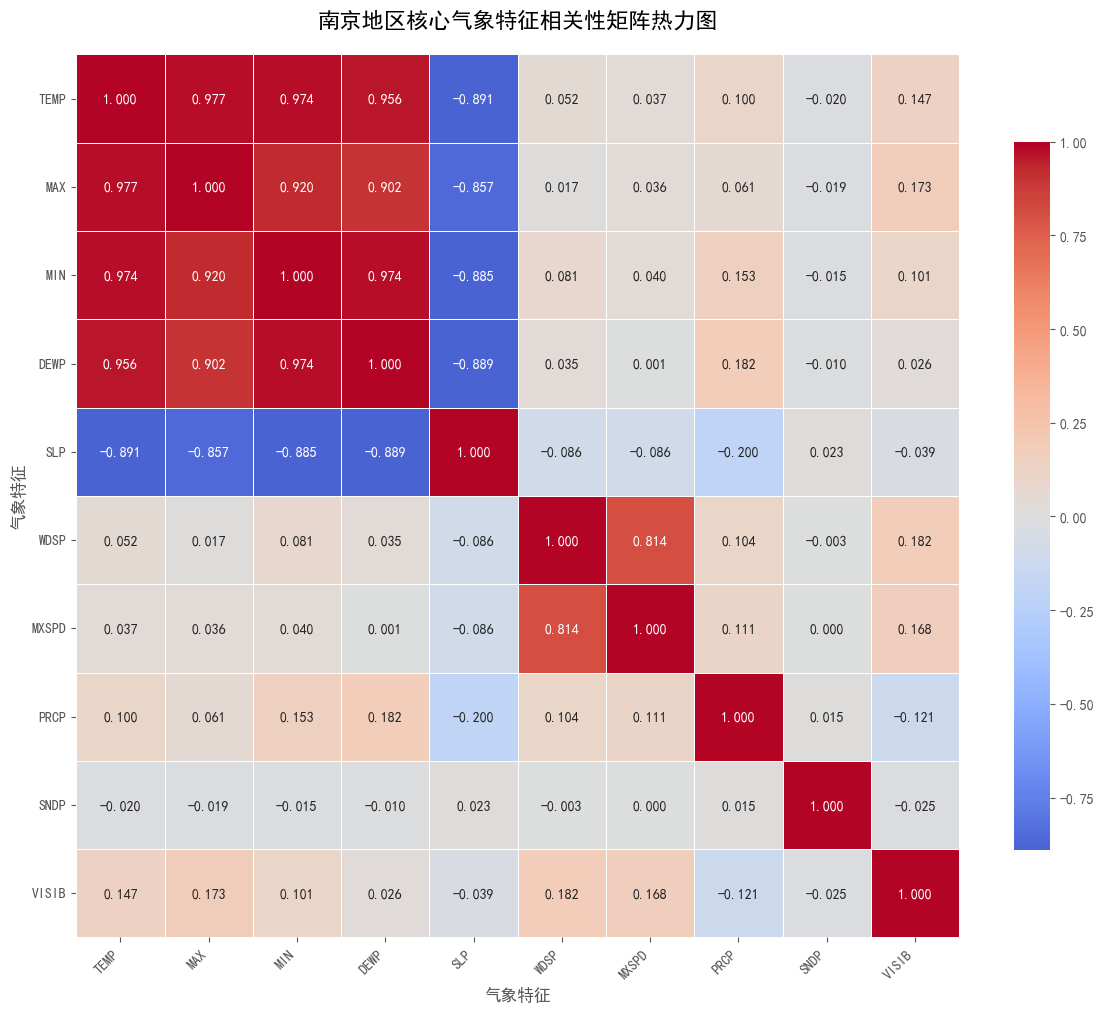



üìà Áõ∏ÂÖ≥ÊÄßÂàÜÊûêÁªìÊûúËß£ËØª:

üå°Ô∏è Ê∏©Â∫¶Áõ∏ÂÖ≥ÁâπÂæÅ:
  Ê∏©Â∫¶Á±ªÁâπÂæÅÈó¥ÁöÑÂπ≥ÂùáÁõ∏ÂÖ≥ÊÄß: 0.951

üí® È£éÈÄüÁõ∏ÂÖ≥ÁâπÂæÅ:
  WDSP vs MXSPD Áõ∏ÂÖ≥ÊÄß: 0.814

üåßÔ∏è ÈôçÊ∞¥Áõ∏ÂÖ≥ÁâπÂæÅ:
  PRCP vs SNDP Áõ∏ÂÖ≥ÊÄß: 0.015

üìä Áõ∏ÂÖ≥ÊÄßÂº∫Â∫¶ÁªüËÆ°:
  ÊÄªÁâπÂæÅÂØπÊï∞: 45
  Âº∫Áõ∏ÂÖ≥ (|r| > 0.7): 11 ÂØπ (24.4%)
  ‰∏≠Á≠âÁõ∏ÂÖ≥ (0.3 < |r| ‚â§ 0.7): 0 ÂØπ (0.0%)
  Âº±Áõ∏ÂÖ≥ (|r| ‚â§ 0.3): 34 ÂØπ (75.6%)

üîç ÂÖ≥ÈîÆÂèëÁé∞:
  1. ÊúÄÂº∫Ê≠£Áõ∏ÂÖ≥: MAX-TEMP (0.977)
  2. ÊúÄÂº∫Ë¥üÁõ∏ÂÖ≥: SLP-TEMP (-0.891)
  3. Âº∫Áõ∏ÂÖ≥ÊÄßÁâπÂæÅÂØπÊï∞: 11
  4. Êï¥‰ΩìÁõ∏ÂÖ≥ÊÄßÊ∞¥Âπ≥: ‰∏≠Á≠â

‚úÖ Ê†∏ÂøÉÊ∞îË±°ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÂÆåÊàêÔºÅ

üìù ÂàÜÊûêÁªìËÆ∫:
   - ÁÉ≠ÂäõÂõæ‰∏≠Á∫¢Ëâ≤Ë°®Á§∫Ê≠£Áõ∏ÂÖ≥ÔºåËìùËâ≤Ë°®Á§∫Ë¥üÁõ∏ÂÖ≥
   - È¢úËâ≤Ë∂äÊ∑±ÔºåÁõ∏ÂÖ≥ÊÄßË∂äÂº∫
   - ÂØπËßíÁ∫ø‰∏∫1.000ÔºåË°®Á§∫ÁâπÂæÅ‰∏éËá™Ë∫´ÁöÑÂÆåÂÖ®Áõ∏ÂÖ≥
   - ÂèØÁî®‰∫éÁâπÂæÅÈÄâÊã©„ÄÅÈôçÁª¥ÂíåÊ®°Âûã‰ºòÂåñ


In [18]:
# Ê†∏ÂøÉÊ∞îË±°ÁâπÂæÅÁöÑÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÂàÜÊûêÂíåÂèØËßÜÂåñ
print("ÂºÄÂßãËøõË°åÊ†∏ÂøÉÊ∞îË±°ÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄßÂàÜÊûê...")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*70 + "\n")

# ÂÆö‰πâÊ†∏ÂøÉÊ∞îË±°ÁâπÂæÅ
core_features = ['TEMP', 'MAX', 'MIN', 'DEWP', 'SLP', 'WDSP', 'MXSPD', 'PRCP', 'SNDP', 'VISIB']

# Ê£ÄÊü•ÁâπÂæÅÊòØÂê¶Â≠òÂú®‰∫éÊï∞ÊçÆÈõÜ‰∏≠
existing_features = [col for col in core_features if col in df_weather.columns]
missing_features = [col for col in core_features if col not in df_weather.columns]

print(f"ÊåáÂÆöÁöÑÊ†∏ÂøÉÁâπÂæÅ: {core_features}")
print(f"Â≠òÂú®ÁöÑÁâπÂæÅ: {existing_features}")
if missing_features:
    print(f"Áº∫Â§±ÁöÑÁâπÂæÅ: {missing_features}")
else:
    print("‚úÖ ÊâÄÊúâÊåáÂÆöÁâπÂæÅÈÉΩÂ≠òÂú®")

print(f"\nÂÆûÈôÖÂàÜÊûêÁöÑÁâπÂæÅÊï∞Èáè: {len(existing_features)}")

# ÊèêÂèñÊ†∏ÂøÉÁâπÂæÅÊï∞ÊçÆ
core_data = df_weather[existing_features].copy()

print("\nÊ†∏ÂøÉÁâπÂæÅÊï∞ÊçÆÊ¶ÇËßà:")
print(core_data.head())

print("\nÊ†∏ÂøÉÁâπÂæÅÁöÑÂü∫Êú¨ÁªüËÆ°‰ø°ÊÅØ:")
print(core_data.describe().round(2))

print("\n" + "-"*50 + "\n")

# Ê£ÄÊü•Áº∫Â§±ÂÄº
missing_check = core_data.isnull().sum()
print("Ê†∏ÂøÉÁâπÂæÅÁöÑÁº∫Â§±ÂÄºÊ£ÄÊü•:")
if missing_check.sum() > 0:
    print(missing_check[missing_check > 0])
    print("\n‚ö†Ô∏è Ë≠¶Âëä: Â≠òÂú®Áº∫Â§±ÂÄºÔºåÂèØËÉΩÂΩ±ÂìçÁõ∏ÂÖ≥ÊÄßËÆ°ÁÆó")
else:
    print("‚úÖ ÊâÄÊúâÊ†∏ÂøÉÁâπÂæÅÈÉΩÊ≤°ÊúâÁº∫Â§±ÂÄº")

print("\n" + "-"*50 + "\n")

# ËÆ°ÁÆóÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ
print("ËÆ°ÁÆóÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ...")
correlation_matrix = core_data.corr(method='pearson')

print(f"Áõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÂΩ¢Áä∂: {correlation_matrix.shape}")
print("\nÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ (‰øùÁñô4‰ΩçÂ∞èÊï∞):")
print(correlation_matrix.round(4))

print("\n" + "-"*50 + "\n")

# ÊâæÂá∫ÊúÄÂº∫ÁöÑÊ≠£Áõ∏ÂÖ≥ÂíåË¥üÁõ∏ÂÖ≥(ÊéíÈô§ÂØπËßíÁ∫ø)
print("ÂàÜÊûêÊúÄÊòæËëóÁöÑÁõ∏ÂÖ≥ÊÄß:")

# ÂàõÂª∫‰∏ä‰∏âËßíÁü©ÈòµÁöÑÊé©Á†ÅÔºåÊéíÈô§ÂØπËßíÁ∫ø
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
upper_triangle = correlation_matrix.where(~mask)

# ÊâæÂá∫ÊúÄÂº∫ÁöÑÊ≠£Áõ∏ÂÖ≥ÂíåË¥üÁõ∏ÂÖ≥
flattened = upper_triangle.stack()
strongest_positive = flattened.max()
strongest_negative = flattened.min()

pos_pair = flattened.idxmax()
neg_pair = flattened.idxmin()

print(f"ÊúÄÂº∫Ê≠£Áõ∏ÂÖ≥: {pos_pair[0]} vs {pos_pair[1]} = {strongest_positive:.4f}")
print(f"ÊúÄÂº∫Ë¥üÁõ∏ÂÖ≥: {neg_pair[0]} vs {neg_pair[1]} = {strongest_negative:.4f}")

# ÊâæÂá∫ÊâÄÊúâÂº∫Áõ∏ÂÖ≥ÊÄß (|r| > 0.7)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                corr_val
            ))

print(f"\nÂº∫Áõ∏ÂÖ≥ÊÄß (|r| > 0.7) ÂÖ± {len(strong_correlations)} ÂØπ:")
for feat1, feat2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
    corr_type = "Ê≠£Áõ∏ÂÖ≥" if corr > 0 else "Ë¥üÁõ∏ÂÖ≥"
    print(f"  {feat1} vs {feat2}: {corr:.4f} ({corr_type})")

print("\n" + "="*70 + "\n")

# ‰ΩøÁî®SeabornÁªòÂà∂ÁÉ≠ÂäõÂõæ
print("ÁªòÂà∂Áõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÁÉ≠ÂäõÂõæ...")

# ËÆæÁΩÆÂõæÂΩ¢Â§ßÂ∞è
plt.figure(figsize=(12, 10))

# ÂàõÂª∫ÁÉ≠ÂäõÂõæ
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,                    # ÊòæÁ§∫Áõ∏ÂÖ≥Á≥ªÊï∞ÂÄº
    cmap='coolwarm',              # ‰ΩøÁî®coolwarmÈ¢úËâ≤Êò†Â∞Ñ
    center=0,                     # ‰ª•0‰∏∫‰∏≠ÂøÉÁÇπ
    square=True,                  # Ê≠£ÊñπÂΩ¢ÂçïÂÖÉÊ†º
    fmt='.3f',                    # Êï∞ÂÄºÊ†ºÂºèÔºà3‰ΩçÂ∞èÊï∞Ôºâ
    cbar_kws={'shrink': 0.8},     # È¢úËâ≤Êù°ËÆæÁΩÆ
    linewidths=0.5,               # ÁΩëÊ†ºÁ∫øÂÆΩÂ∫¶
    linecolor='white'             # ÁΩëÊ†ºÁ∫øÈ¢úËâ≤
)

# ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
plt.title('Âçó‰∫¨Âú∞Âå∫Ê†∏ÂøÉÊ∞îË±°ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÁÉ≠ÂäõÂõæ', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ê∞îË±°ÁâπÂæÅ', fontsize=12, fontweight='bold')
plt.ylabel('Ê∞îË±°ÁâπÂæÅ', fontsize=12, fontweight='bold')

# Ë∞ÉÊï¥ÂàªÂ∫¶Ê†áÁ≠æ
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

print("\n" + "="*70 + "\n")
print("üìà Áõ∏ÂÖ≥ÊÄßÂàÜÊûêÁªìÊûúËß£ËØª:")

# ÊåâÁ±ªÂà´ÂàÜÊûêÁõ∏ÂÖ≥ÊÄß
print("\nüå°Ô∏è Ê∏©Â∫¶Áõ∏ÂÖ≥ÁâπÂæÅ:")
temp_features = ['TEMP', 'MAX', 'MIN', 'DEWP']
temp_existing = [f for f in temp_features if f in existing_features]
if len(temp_existing) > 1:
    temp_corr = correlation_matrix.loc[temp_existing, temp_existing]
    print(f"  Ê∏©Â∫¶Á±ªÁâπÂæÅÈó¥ÁöÑÂπ≥ÂùáÁõ∏ÂÖ≥ÊÄß: {temp_corr.values[np.triu_indices_from(temp_corr.values, k=1)].mean():.3f}")

print("\nüí® È£éÈÄüÁõ∏ÂÖ≥ÁâπÂæÅ:")
wind_features = ['WDSP', 'MXSPD']
wind_existing = [f for f in wind_features if f in existing_features]
if len(wind_existing) == 2:
    wind_corr = correlation_matrix.loc['WDSP', 'MXSPD']
    print(f"  WDSP vs MXSPD Áõ∏ÂÖ≥ÊÄß: {wind_corr:.3f}")

print("\nüåßÔ∏è ÈôçÊ∞¥Áõ∏ÂÖ≥ÁâπÂæÅ:")
precip_features = ['PRCP', 'SNDP']
precip_existing = [f for f in precip_features if f in existing_features]
if len(precip_existing) == 2:
    precip_corr = correlation_matrix.loc['PRCP', 'SNDP']
    print(f"  PRCP vs SNDP Áõ∏ÂÖ≥ÊÄß: {precip_corr:.3f}")

# ÁªüËÆ°‰∏çÂêåÂº∫Â∫¶ÁöÑÁõ∏ÂÖ≥ÊÄßÊï∞Èáè
print("\nüìä Áõ∏ÂÖ≥ÊÄßÂº∫Â∫¶ÁªüËÆ°:")
total_pairs = len(existing_features) * (len(existing_features) - 1) // 2
strong_count = len([1 for _, _, corr in strong_correlations if abs(corr) > 0.7])
moderate_count = len([1 for _, _, corr in strong_correlations if 0.3 < abs(corr) <= 0.7])
weak_count = total_pairs - strong_count - moderate_count

print(f"  ÊÄªÁâπÂæÅÂØπÊï∞: {total_pairs}")
print(f"  Âº∫Áõ∏ÂÖ≥ (|r| > 0.7): {strong_count} ÂØπ ({strong_count/total_pairs*100:.1f}%)")
print(f"  ‰∏≠Á≠âÁõ∏ÂÖ≥ (0.3 < |r| ‚â§ 0.7): {moderate_count} ÂØπ ({moderate_count/total_pairs*100:.1f}%)")
print(f"  Âº±Áõ∏ÂÖ≥ (|r| ‚â§ 0.3): {weak_count} ÂØπ ({weak_count/total_pairs*100:.1f}%)")

print("\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")
print(f"  1. ÊúÄÂº∫Ê≠£Áõ∏ÂÖ≥: {pos_pair[0]}-{pos_pair[1]} ({strongest_positive:.3f})")
print(f"  2. ÊúÄÂº∫Ë¥üÁõ∏ÂÖ≥: {neg_pair[0]}-{neg_pair[1]} ({strongest_negative:.3f})")
print(f"  3. Âº∫Áõ∏ÂÖ≥ÊÄßÁâπÂæÅÂØπÊï∞: {strong_count}")
print(f"  4. Êï¥‰ΩìÁõ∏ÂÖ≥ÊÄßÊ∞¥Âπ≥: {'È´ò' if strong_count/total_pairs > 0.3 else '‰∏≠Á≠â' if strong_count/total_pairs > 0.1 else '‰Ωé'}")

print("\n‚úÖ Ê†∏ÂøÉÊ∞îË±°ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÂÆåÊàêÔºÅ")
print("\nüìù ÂàÜÊûêÁªìËÆ∫:")
print("   - ÁÉ≠ÂäõÂõæ‰∏≠Á∫¢Ëâ≤Ë°®Á§∫Ê≠£Áõ∏ÂÖ≥ÔºåËìùËâ≤Ë°®Á§∫Ë¥üÁõ∏ÂÖ≥")
print("   - È¢úËâ≤Ë∂äÊ∑±ÔºåÁõ∏ÂÖ≥ÊÄßË∂äÂº∫")
print("   - ÂØπËßíÁ∫ø‰∏∫1.000ÔºåË°®Á§∫ÁâπÂæÅ‰∏éËá™Ë∫´ÁöÑÂÆåÂÖ®Áõ∏ÂÖ≥")
print("   - ÂèØÁî®‰∫éÁâπÂæÅÈÄâÊã©„ÄÅÈôçÁª¥ÂíåÊ®°Âûã‰ºòÂåñ")

**ÂõæË°®ÁªìÊûúËß£ËØª‰∏éÂàÜÊûêÔºö**

ÈÄöËøáËßÇÂØü‰∏äÊñπÁöÑÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÁÉ≠ÂäõÂõæÔºåÊàë‰ª¨ÂèØ‰ª•ÂæóÂá∫‰ª•‰∏ãÂá†‰∏™ÂÖ≥ÈîÆÁªìËÆ∫Ôºö

1.  **È´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÁâπÂæÅÊóèÁæ§**Ôºö
    * **Ê∏©Â∫¶Êóè**ÔºöÊó•Âπ≥ÂùáÊ∏©Â∫¶(`TEMP`)„ÄÅÊúÄÈ´òÊ∏©Â∫¶(`MAX`)„ÄÅÊúÄ‰ΩéÊ∏©Â∫¶(`MIN`)‰ª•ÂèäÈú≤ÁÇπÊ∏©Â∫¶(`DEWP`)‰πãÈó¥Ë°®Áé∞Âá∫ÊûÅÂº∫ÁöÑÊ≠£Áõ∏ÂÖ≥ÊÄßÔºàÁõ∏ÂÖ≥Á≥ªÊï∞ > 0.9Ôºâ„ÄÇËøôÁ¨¶ÂêàÁâ©ÁêÜÂ∏∏ËØÜÔºåË°®ÊòéËøô‰∫õÂèòÈáèÂú®ÂæàÂ§ßÁ®ãÂ∫¶‰∏äÊèê‰æõ‰∫ÜÁõ∏‰ººÁöÑÊ∏©Â∫¶‰ø°ÊÅØ„ÄÇ
    * **È£éÈÄüÊóè**ÔºöÂπ≥ÂùáÈ£éÈÄü(`WDSP`)‰∏éÊúÄÂ§ßÊåÅÁª≠È£éÈÄü(`MXSPD`)‰πãÈó¥‰πüÂ≠òÂú®ÂæàÂº∫ÁöÑÊ≠£Áõ∏ÂÖ≥ÊÄßÔºàÁõ∏ÂÖ≥Á≥ªÊï∞Á∫¶‰∏∫0.814Ôºâ„ÄÇ

2.  **ÊòæËëóÁöÑË¥üÁõ∏ÂÖ≥ÂÖ≥Á≥ª**Ôºö
    * Êµ∑Âπ≥Èù¢Ê∞îÂéã(`SLP`)‰∏éÊâÄÊúâÊ∏©Â∫¶Áõ∏ÂÖ≥ÁöÑÂèòÈáèÈÉΩÂëàÁé∞Âá∫Âº∫ÁÉàÁöÑË¥üÁõ∏ÂÖ≥ÂÖ≥Á≥ªÔºàÁõ∏ÂÖ≥Á≥ªÊï∞Âú®-0.85Ëá≥-0.89‰πãÈó¥Ôºâ„ÄÇËøôÊè≠Á§∫‰∫ÜÁÉ≠ÂäõÂ≠¶‰∏äÁöÑÂü∫Êú¨ÂÖ≥Á≥ªÔºåÂç≥Âú®ÂÖ∂‰ªñÊù°‰ª∂Áõ∏‰ººÊó∂ÔºåÊ∏©Â∫¶ÂçáÈ´òÂæÄÂæÄ‰º¥ÈöèÁùÄÊ∞îÂéãÁöÑÈôç‰Ωé„ÄÇ

3.  **Âº±Áõ∏ÂÖ≥ÊÄßÁâπÂæÅ**Ôºö
    * Êó•ÈôçÊ∞¥Èáè(`PRCP`)‰∏éÂÖ∂‰ªñÂ§ßÂ§öÊï∞Ê∞îË±°Ë¶ÅÁ¥†ÁöÑÁ∫øÊÄßÁõ∏ÂÖ≥ÊÄßÈÉΩËæÉÂº±„ÄÇÂÖ∂‰∏éÊµ∑Âπ≥Èù¢Ê∞îÂéãÁöÑË¥üÁõ∏ÂÖ≥Ôºà-0.200ÔºâÂíå‰∏éÈú≤ÁÇπÁöÑÊ≠£Áõ∏ÂÖ≥Ôºà0.182ÔºâÊòØÊâÄÊúâÂÖ≥Á≥ª‰∏≠Áõ∏ÂØπÊúÄÊòæËëóÁöÑÔºåËøôÊöóÁ§∫‰∫Ü‰ΩéÂéãÁ≥ªÁªüÂíåÈ´òÊπøÂ∫¶ÁéØÂ¢ÉÊõ¥ÂÆπÊòì‰∫ßÁîüÈôçÊ∞¥Ôºå‰ΩÜËøôÁßçÁ∫øÊÄßÂÖ≥Á≥ªÂπ∂‰∏çË∂≥‰ª•ÂçïÁã¨‰Ωú‰∏∫Âº∫È¢ÑÊµãÂõ†Â≠ê„ÄÇ

**ÂØπÂêéÁª≠Âª∫Ê®°ÁöÑÂêØÁ§∫Ôºö**

* **Â§öÈáçÂÖ±Á∫øÊÄßÈóÆÈ¢ò**ÔºöÊ∏©Â∫¶ÊóèÂíåÈ£éÈÄüÊóèÂÜÖÈÉ®Â≠òÂú®‰∏•ÈáçÁöÑÂ§öÈáçÂÖ±Á∫øÊÄß„ÄÇËøôÂú®‰ΩøÁî®Á∫øÊÄßÊ®°ÂûãÔºàÂ¶ÇÈÄªËæëÂõûÂΩí„ÄÅÁ∫øÊÄßÂõûÂΩíÔºâÊó∂ÈúÄË¶ÅÁâπÂà´Ê≥®ÊÑèÔºåÂõ†‰∏∫ÂÆÉÂèØËÉΩÂØºËá¥Ê®°ÂûãÁ≥ªÊï∞‰∏çÁ®≥ÂÆö„ÄÇÂú®ÁâπÂæÅÈÄâÊã©Èò∂ÊÆµÔºåÊàë‰ª¨ÂèØ‰ª•ËÄÉËôë‰ªéÊØè‰∏™È´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÊóèÁæ§‰∏≠ÈÄâÂèñ‰ª£Ë°®ÊÄßÁâπÂæÅÔºåÊàñÈÄöËøáÁâπÂæÅÂ∑•Á®ãÔºàÂ¶ÇËÆ°ÁÆóÊó•Ê∏©Â∑Æ`MAX - MIN`ÔºâÊù•ÂàõÈÄ†‰ø°ÊÅØÈáèÈõÜ‰∏≠‰∏îÁõ∏ÂÖ≥ÊÄßËæÉ‰ΩéÁöÑÊñ∞ÁâπÂæÅ„ÄÇ
* **ÈùûÁ∫øÊÄßÂÖ≥Á≥ªÁöÑÈáçË¶ÅÊÄß**Ôºö‰ª•ÈôçÊ∞¥(`PRCP`)‰∏∫‰ª£Ë°®ÁöÑÂ§ö‰∏™ÈáçË¶ÅÊ∞îË±°Ë¶ÅÁ¥†‰∏éÂÖ∂‰ªñÂèòÈáèÁöÑÁ∫øÊÄßÂÖ≥Á≥ª‰∏çÂº∫ÔºåËøôÈ¢ÑÁ§∫ÁùÄÈ¢ÑÊµãËøô‰∫õË¶ÅÁ¥†ÂèØËÉΩÈúÄË¶Å‰æùËµñËÉΩÂ§üÊçïÊçâÂ§çÊùÇÈùûÁ∫øÊÄßÂÖ≥Á≥ªÁöÑÊú∫Âô®Â≠¶‰π†Ê®°ÂûãÔºàÂ¶ÇÂÜ≥Á≠ñÊ†ë„ÄÅÈöèÊú∫Ê£ÆÊûó„ÄÅGBDTÂèäÁ•ûÁªèÁΩëÁªúÔºâ„ÄÇ

#### 1.4.4 ÂÖ≥ÈîÆÂ§©Ê∞îÁé∞Ë±°ÔºàÈõæ„ÄÅÈõ∑Êö¥ÔºâÁöÑÊ∞îË±°ÁâπÂæÅÂàÜÂ∏ÉÂàÜÊûê

Âú®ÂØπÁâπÂæÅÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßËøõË°åÂàÜÊûêÂêéÔºåÊú¨ËäÇÂ∞ÜÊ∑±ÂÖ•Êé¢ËÆ®ÂêÑ‰∏™Êï∞ÂÄºÂûãÁâπÂæÅ‰∏éÊàë‰ª¨ÁöÑÂàÜÁ±ªÁõÆÊ†áÔºàÈõæÂíåÈõ∑Êö¥ÁöÑÂèëÁîüÔºâ‰πãÈó¥ÁöÑÂÖ≥Á≥ª„ÄÇÈÄöËøá‰∏∫ÊØè‰∏™ÁõÆÊ†áÁé∞Ë±°ÁªòÂà∂ÁÆ±Á∫øÂõæÔºåÊàë‰ª¨ÂèØ‰ª•Áõ¥ËßÇÂú∞ÊØîËæÉÂú®‚ÄúÂèëÁîü‚Äù‰∏é‚ÄúÊú™ÂèëÁîü‚Äù‰∏§ÁßçÊÉÖÂÜµ‰∏ãÔºåÂÖ≥ÈîÆÊ∞îË±°ÁâπÂæÅÁöÑÂàÜÂ∏ÉÊòØÂê¶Â≠òÂú®ÊòæËëóÂ∑ÆÂºÇÔºå‰ªéËÄåÈ™åËØÅÊàë‰ª¨ÊâÄÈÄâÁâπÂæÅÁöÑÊúâÊïàÊÄßÔºåÂπ∂‰∏∫ÂêéÁª≠Ê®°ÂûãÊûÑÂª∫Êèê‰æõÊ¥ûËßÅÔºö

ÂºÄÂßãÂàÜÊûêÊï∞ÂÄºÁâπÂæÅ‰∏éÂàÜÁ±ªÁõÆÊ†áÂèòÈáèÁöÑÂÖ≥Á≥ª...
Êï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 16)


‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑ Fog Âíå Thunder ÁõÆÊ†áÂèòÈáè

ÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÁªüËÆ°:

Fog:
  0: 16,535 Ê¨° (87.22%)
  1: 2,422 Ê¨° (12.78%)

Thunder:
  0: 17,851 Ê¨° (94.17%)
  1: 1,106 Ê¨° (5.83%)


üå´Ô∏è 1. ÈõæÈ¢ÑÊµãÂàÜÊûê - ÁâπÂæÅÂàÜÂ∏ÉÂ∑ÆÂºÇÁÆ±Á∫øÂõæ

ÂàÜÊûêÁâπÂæÅ: TEMP, DEWP, VISIB, WDSP
‚ö†Ô∏è Dew_Point_Spread ÁâπÂæÅ‰∏çÂ≠òÂú®ÔºåÂ∞ÜÂàõÂª∫ËØ•ÁâπÂæÅ
‚úÖ Â∑≤ÂàõÂª∫ Dew_Point_Spread = TEMP - DEWP

ÂÆûÈôÖÂàÜÊûêÁöÑÈõæÈ¢ÑÊµãÁâπÂæÅ: ['TEMP', 'DEWP', 'VISIB', 'WDSP', 'Dew_Point_Spread']


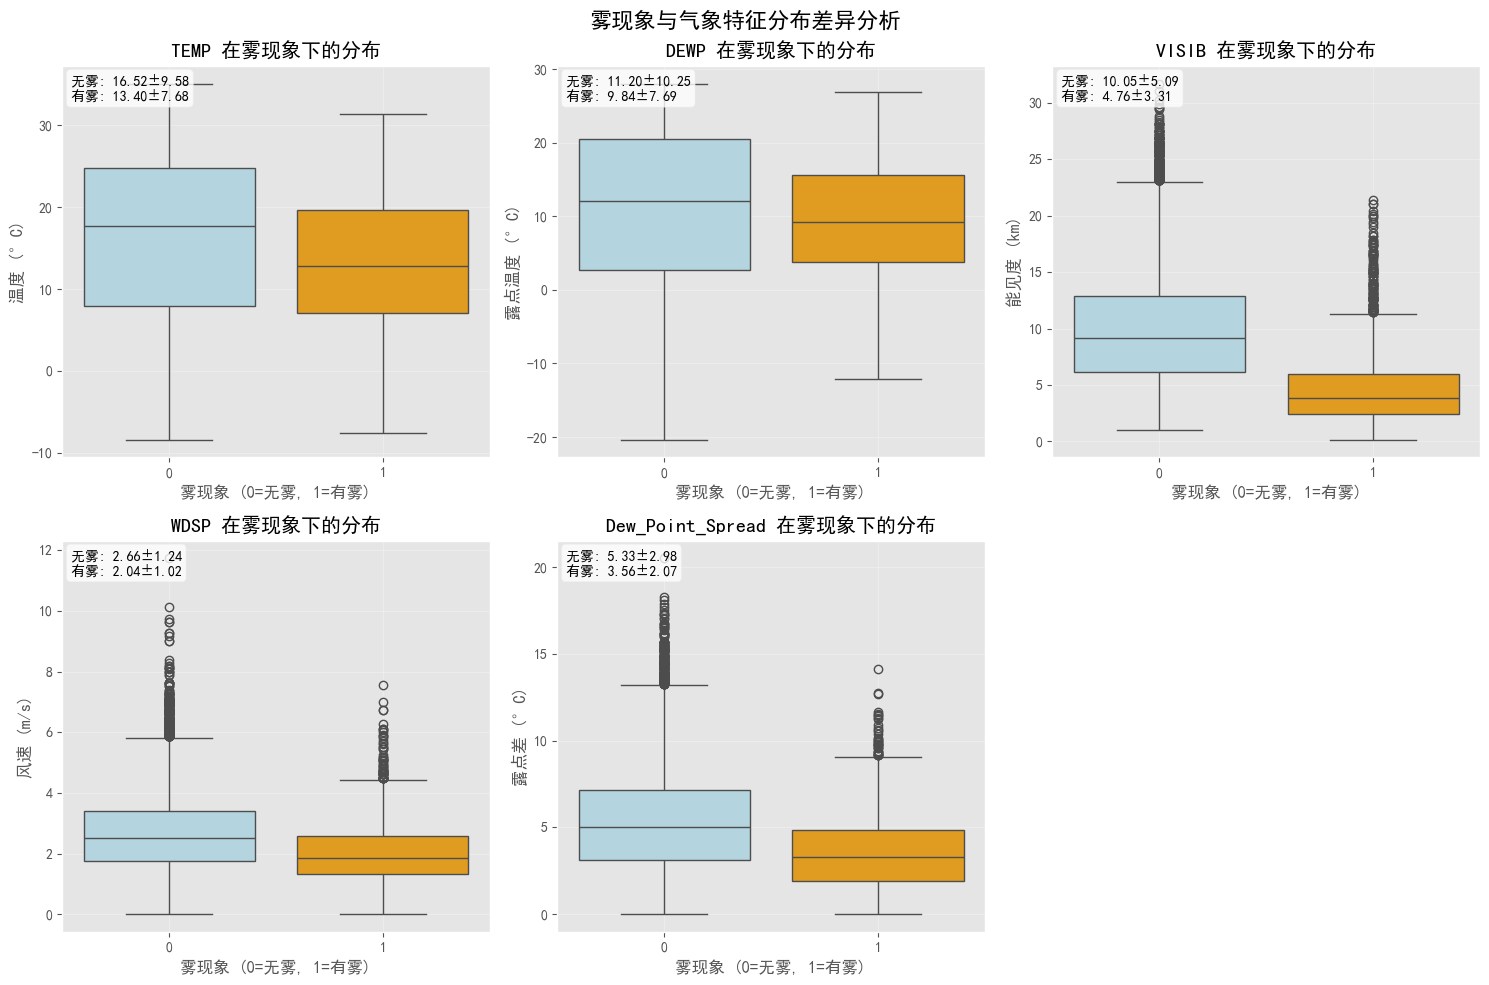


üìä ÈõæÈ¢ÑÊµãÁâπÂæÅÁªüËÆ°ÂàÜÊûê:

TEMP:
  Êó†ÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 16.522, Ê†áÂáÜÂ∑Æ 9.577
  ÊúâÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 13.398, Ê†áÂáÜÂ∑Æ 7.679
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: -3.125

DEWP:
  Êó†ÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 11.197, Ê†áÂáÜÂ∑Æ 10.250
  ÊúâÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 9.841, Ê†áÂáÜÂ∑Æ 7.690
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: -1.356

VISIB:
  Êó†ÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 10.052, Ê†áÂáÜÂ∑Æ 5.088
  ÊúâÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 4.758, Ê†áÂáÜÂ∑Æ 3.309
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: -5.294

WDSP:
  Êó†ÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 2.661, Ê†áÂáÜÂ∑Æ 1.244
  ÊúâÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 2.037, Ê†áÂáÜÂ∑Æ 1.022
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: -0.625

Dew_Point_Spread:
  Êó†ÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 5.325, Ê†áÂáÜÂ∑Æ 2.977
  ÊúâÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 3.557, Ê†áÂáÜÂ∑Æ 2.072
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: -1.769


‚õàÔ∏è 2. Èõ∑Êö¥È¢ÑÊµãÂàÜÊûê - ÁâπÂæÅÂàÜÂ∏ÉÂ∑ÆÂºÇÁÆ±Á∫øÂõæ

ÂàÜÊûêÁâπÂæÅ: TEMP, MAX, MIN, DEWP, SLP, MXSPD
ÂÆûÈôÖÂàÜÊûêÁöÑÈõ∑Êö¥È¢ÑÊµãÁâπÂæÅ: ['TEMP', 'MAX', 'MIN', 'DEWP', 'SLP', 'MXSPD']


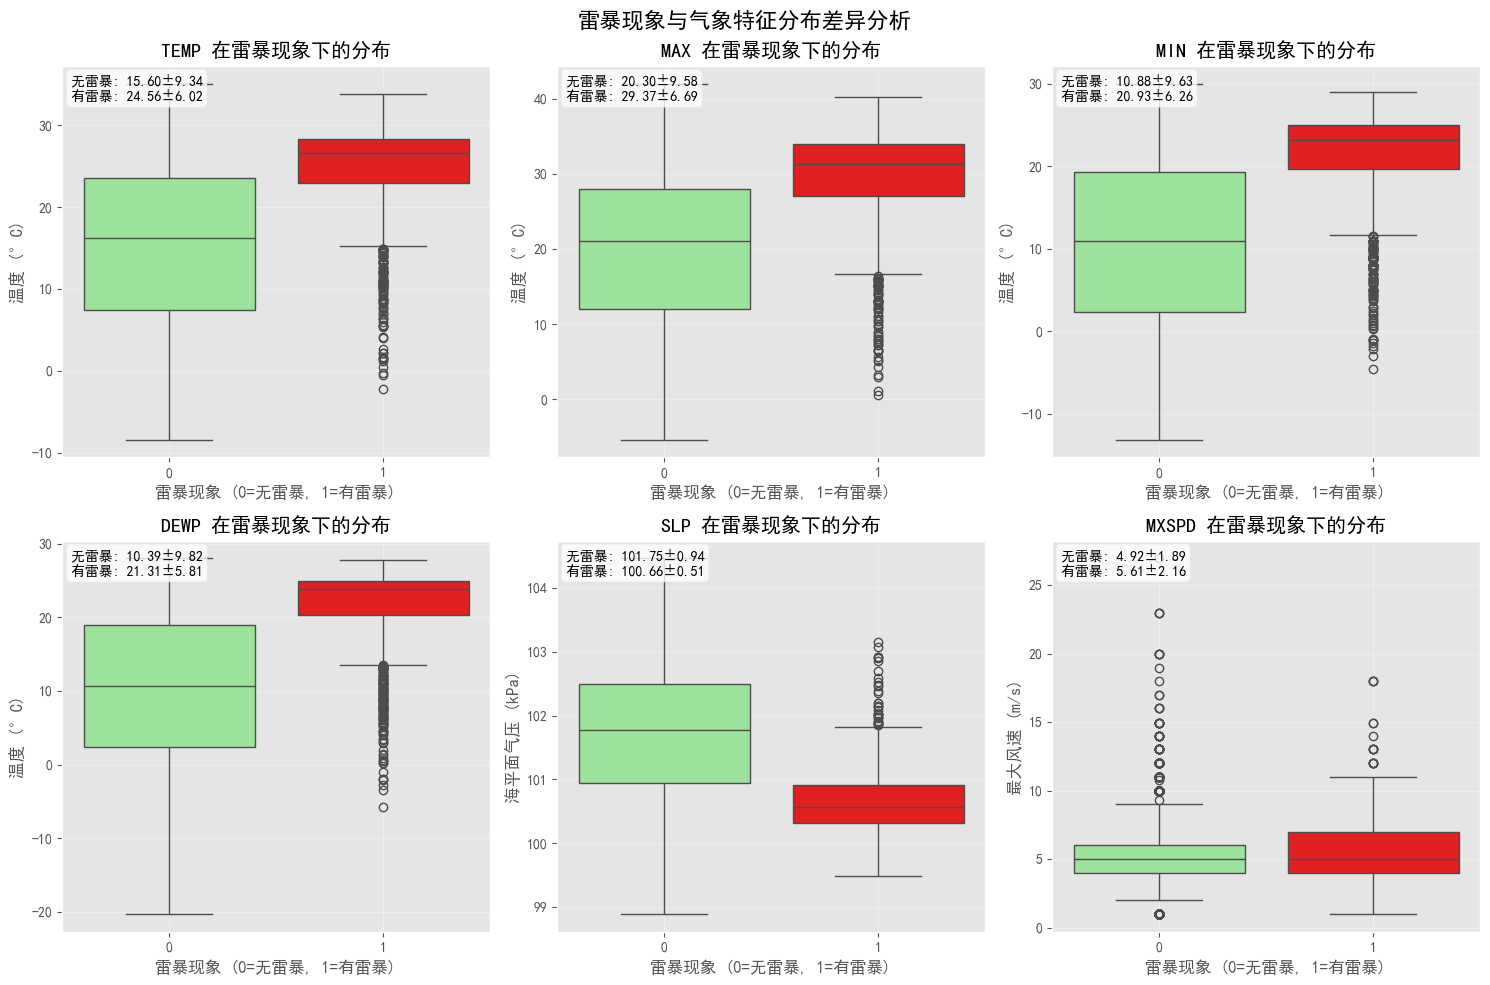


üìä Èõ∑Êö¥È¢ÑÊµãÁâπÂæÅÁªüËÆ°ÂàÜÊûê:

TEMP:
  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 15.600, Ê†áÂáÜÂ∑Æ 9.337
  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 24.560, Ê†áÂáÜÂ∑Æ 6.016
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: 8.959

MAX:
  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 20.303, Ê†áÂáÜÂ∑Æ 9.584
  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 29.375, Ê†áÂáÜÂ∑Æ 6.689
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: 9.072

MIN:
  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 10.875, Ê†áÂáÜÂ∑Æ 9.628
  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 20.934, Ê†áÂáÜÂ∑Æ 6.263
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: 10.058

DEWP:
  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 10.386, Ê†áÂáÜÂ∑Æ 9.823
  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 21.314, Ê†áÂáÜÂ∑Æ 5.813
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: 10.928

SLP:
  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 101.749, Ê†áÂáÜÂ∑Æ 0.936
  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 100.663, Ê†áÂáÜÂ∑Æ 0.509
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: -1.086

MXSPD:
  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 4.922, Ê†áÂáÜÂ∑Æ 1.888
  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº 5.613, Ê†áÂáÜÂ∑Æ 2.159
  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: 0.690



‚úÖ Êï∞ÂÄºÁâπÂæÅ‰∏éÂàÜÁ±ªÁõÆÊ†áÂèòÈáèÂÖ≥Á≥ªÂàÜÊûêÂÆåÊàêÔºÅ

‚ÑπÔ∏è Ê≥®ÊÑè: Â∑≤ÂàõÂª∫ Dew_Point_Spread ÁâπÂæÅÔºåÂèØÁî®‰∫éÂêéÁª≠Âª∫Ê

In [19]:
# Êï∞ÂÄºÁâπÂæÅ‰∏éÂàÜÁ±ªÁõÆÊ†áÂèòÈáèÂÖ≥Á≥ªÂàÜÊûê - ÁÆ±Á∫øÂõæÂèØËßÜÂåñ
print("ÂºÄÂßãÂàÜÊûêÊï∞ÂÄºÁâπÂæÅ‰∏éÂàÜÁ±ªÁõÆÊ†áÂèòÈáèÁöÑÂÖ≥Á≥ª...")
print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*80 + "\n")

# Ê£ÄÊü•ÂøÖË¶ÅÁöÑÂàÜÁ±ªÁõÆÊ†áÂèòÈáè
target_columns = ['Fog', 'Thunder']
missing_targets = [col for col in target_columns if col not in df_weather.columns]
if missing_targets:
    print(f"ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÁõÆÊ†áÂèòÈáè: {missing_targets}")
    print(f"ÂΩìÂâçÊï∞ÊçÆÈõÜÂåÖÂê´ÁöÑÂàó: {list(df_weather.columns)}")
else:
    print("‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑ Fog Âíå Thunder ÁõÆÊ†áÂèòÈáè")

# Ê£ÄÊü•ÁõÆÊ†áÂèòÈáèÁöÑÂàÜÂ∏É
print("\nÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÁªüËÆ°:")
for target in target_columns:
    if target in df_weather.columns:
        value_counts = df_weather[target].value_counts().sort_index()
        total = len(df_weather)
        print(f"\n{target}:")
        for value, count in value_counts.items():
            percentage = (count / total) * 100
            print(f"  {value}: {count:,} Ê¨° ({percentage:.2f}%)")

print("\n" + "="*80 + "\n")

# 1. ÈõæÈ¢ÑÊµãÂàÜÊûê
print("üå´Ô∏è 1. ÈõæÈ¢ÑÊµãÂàÜÊûê - ÁâπÂæÅÂàÜÂ∏ÉÂ∑ÆÂºÇÁÆ±Á∫øÂõæ")
print("\nÂàÜÊûêÁâπÂæÅ: TEMP, DEWP, VISIB, WDSP")

# ÂÆö‰πâÈõæÈ¢ÑÊµãÁöÑÁâπÂæÅ
fog_features = ['TEMP', 'DEWP', 'VISIB', 'WDSP']
fog_existing = [col for col in fog_features if col in df_weather.columns]

# Ê£ÄÊü•ÊòØÂê¶Â≠òÂú® Dew_Point_Spread ÁâπÂæÅ
if 'Dew_Point_Spread' in df_weather.columns:
    fog_existing.append('Dew_Point_Spread')
    print("‚úÖ ÊâæÂà∞ Dew_Point_Spread ÁâπÂæÅ")
else:
    print("‚ö†Ô∏è Dew_Point_Spread ÁâπÂæÅ‰∏çÂ≠òÂú®ÔºåÂ∞ÜÂàõÂª∫ËØ•ÁâπÂæÅ")
    # ÂàõÂª∫ Dew_Point_Spread ÁâπÂæÅ (TEMP - DEWP)
    if 'TEMP' in df_weather.columns and 'DEWP' in df_weather.columns:
        df_weather['Dew_Point_Spread'] = df_weather['TEMP'] - df_weather['DEWP']
        fog_existing.append('Dew_Point_Spread')
        print("‚úÖ Â∑≤ÂàõÂª∫ Dew_Point_Spread = TEMP - DEWP")

print(f"\nÂÆûÈôÖÂàÜÊûêÁöÑÈõæÈ¢ÑÊµãÁâπÂæÅ: {fog_existing}")

# ÁªòÂà∂ÈõæÈ¢ÑÊµãÁÆ±Á∫øÂõæ
if len(fog_existing) > 0 and 'Fog' in df_weather.columns:
    # ËÆ°ÁÆóÂ≠êÂõæÂ∏ÉÂ±Ä
    n_features = len(fog_existing)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols  # Âêë‰∏äÂèñÊï¥
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('ÈõæÁé∞Ë±°‰∏éÊ∞îË±°ÁâπÂæÅÂàÜÂ∏ÉÂ∑ÆÂºÇÂàÜÊûê', fontsize=16, fontweight='bold')
    
    # Â¶ÇÊûúÂè™Êúâ‰∏ÄË°åÔºåÁ°Æ‰øù axes ÊòØ‰∫åÁª¥Êï∞ÁªÑ
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, feature in enumerate(fog_existing):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]
        
        # ÁªòÂà∂ÁÆ±Á∫øÂõæ
        sns.boxplot(data=df_weather, x='Fog', y=feature, ax=ax, palette=['lightblue', 'orange'])
        
        # ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
        ax.set_title(f'{feature} Âú®ÈõæÁé∞Ë±°‰∏ãÁöÑÂàÜÂ∏É', fontweight='bold')
        ax.set_xlabel('ÈõæÁé∞Ë±° (0=Êó†Èõæ, 1=ÊúâÈõæ)')
        
        # ËÆæÁΩÆ y ËΩ¥Ê†áÁ≠æ
        if feature == 'TEMP':
            ax.set_ylabel('Ê∏©Â∫¶ (¬∞C)')
        elif feature == 'DEWP':
            ax.set_ylabel('Èú≤ÁÇπÊ∏©Â∫¶ (¬∞C)')
        elif feature == 'VISIB':
            ax.set_ylabel('ËÉΩËßÅÂ∫¶ (km)')
        elif feature == 'WDSP':
            ax.set_ylabel('È£éÈÄü (m/s)')
        elif feature == 'Dew_Point_Spread':
            ax.set_ylabel('Èú≤ÁÇπÂ∑Æ (¬∞C)')
        else:
            ax.set_ylabel(feature)
        
        ax.grid(True, alpha=0.3)
        
        # ËÆ°ÁÆóÁªüËÆ°‰ø°ÊÅØ
        no_fog = df_weather[df_weather['Fog'] == 0][feature]
        with_fog = df_weather[df_weather['Fog'] == 1][feature]
        
        # Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØÊñáÊú¨
        stats_text = f'Êó†Èõæ: {no_fog.mean():.2f}¬±{no_fog.std():.2f}\nÊúâÈõæ: {with_fog.mean():.2f}¬±{with_fog.std():.2f}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    for i in range(len(fog_existing), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # ÁªüËÆ°ÂàÜÊûê
    print("\nüìä ÈõæÈ¢ÑÊµãÁâπÂæÅÁªüËÆ°ÂàÜÊûê:")
    for feature in fog_existing:
        no_fog_data = df_weather[df_weather['Fog'] == 0][feature]
        with_fog_data = df_weather[df_weather['Fog'] == 1][feature]
        
        print(f"\n{feature}:")
        print(f"  Êó†ÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº {no_fog_data.mean():.3f}, Ê†áÂáÜÂ∑Æ {no_fog_data.std():.3f}")
        print(f"  ÊúâÈõæÊÉÖÂÜµ: Âπ≥ÂùáÂÄº {with_fog_data.mean():.3f}, Ê†áÂáÜÂ∑Æ {with_fog_data.std():.3f}")
        print(f"  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: {with_fog_data.mean() - no_fog_data.mean():.3f}")

print("\n" + "="*80 + "\n")

# 2. Èõ∑Êö¥È¢ÑÊµãÂàÜÊûê
print("‚õàÔ∏è 2. Èõ∑Êö¥È¢ÑÊµãÂàÜÊûê - ÁâπÂæÅÂàÜÂ∏ÉÂ∑ÆÂºÇÁÆ±Á∫øÂõæ")
print("\nÂàÜÊûêÁâπÂæÅ: TEMP, MAX, MIN, DEWP, SLP, MXSPD")

# ÂÆö‰πâÈõ∑Êö¥È¢ÑÊµãÁöÑÁâπÂæÅ
thunder_features = ['TEMP', 'MAX', 'MIN', 'DEWP', 'SLP', 'MXSPD']
thunder_existing = [col for col in thunder_features if col in df_weather.columns]

print(f"ÂÆûÈôÖÂàÜÊûêÁöÑÈõ∑Êö¥È¢ÑÊµãÁâπÂæÅ: {thunder_existing}")

# ÁªòÂà∂Èõ∑Êö¥È¢ÑÊµãÁÆ±Á∫øÂõæ
if len(thunder_existing) > 0 and 'Thunder' in df_weather.columns:
    # ËÆ°ÁÆóÂ≠êÂõæÂ∏ÉÂ±Ä
    n_features = len(thunder_existing)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols  # Âêë‰∏äÂèñÊï¥
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Èõ∑Êö¥Áé∞Ë±°‰∏éÊ∞îË±°ÁâπÂæÅÂàÜÂ∏ÉÂ∑ÆÂºÇÂàÜÊûê', fontsize=16, fontweight='bold')
    
    # Â¶ÇÊûúÂè™Êúâ‰∏ÄË°åÔºåÁ°Æ‰øù axes ÊòØ‰∫åÁª¥Êï∞ÁªÑ
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, feature in enumerate(thunder_existing):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]
        
        # ÁªòÂà∂ÁÆ±Á∫øÂõæ
        sns.boxplot(data=df_weather, x='Thunder', y=feature, ax=ax, palette=['lightgreen', 'red'])
        
        # ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
        ax.set_title(f'{feature} Âú®Èõ∑Êö¥Áé∞Ë±°‰∏ãÁöÑÂàÜÂ∏É', fontweight='bold')
        ax.set_xlabel('Èõ∑Êö¥Áé∞Ë±° (0=Êó†Èõ∑Êö¥, 1=ÊúâÈõ∑Êö¥)')
        
        # ËÆæÁΩÆ y ËΩ¥Ê†áÁ≠æ
        if feature in ['TEMP', 'MAX', 'MIN', 'DEWP']:
            ax.set_ylabel('Ê∏©Â∫¶ (¬∞C)')
        elif feature == 'SLP':
            ax.set_ylabel('Êµ∑Âπ≥Èù¢Ê∞îÂéã (kPa)')
        elif feature == 'MXSPD':
            ax.set_ylabel('ÊúÄÂ§ßÈ£éÈÄü (m/s)')
        else:
            ax.set_ylabel(feature)
        
        ax.grid(True, alpha=0.3)
        
        # ËÆ°ÁÆóÁªüËÆ°‰ø°ÊÅØ
        no_thunder = df_weather[df_weather['Thunder'] == 0][feature]
        with_thunder = df_weather[df_weather['Thunder'] == 1][feature]
        
        # Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØÊñáÊú¨
        stats_text = f'Êó†Èõ∑Êö¥: {no_thunder.mean():.2f}¬±{no_thunder.std():.2f}\nÊúâÈõ∑Êö¥: {with_thunder.mean():.2f}¬±{with_thunder.std():.2f}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    for i in range(len(thunder_existing), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # ÁªüËÆ°ÂàÜÊûê
    print("\nüìä Èõ∑Êö¥È¢ÑÊµãÁâπÂæÅÁªüËÆ°ÂàÜÊûê:")
    for feature in thunder_existing:
        no_thunder_data = df_weather[df_weather['Thunder'] == 0][feature]
        with_thunder_data = df_weather[df_weather['Thunder'] == 1][feature]
        
        print(f"\n{feature}:")
        print(f"  Êó†Èõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº {no_thunder_data.mean():.3f}, Ê†áÂáÜÂ∑Æ {no_thunder_data.std():.3f}")
        print(f"  ÊúâÈõ∑Êö¥ÊÉÖÂÜµ: Âπ≥ÂùáÂÄº {with_thunder_data.mean():.3f}, Ê†áÂáÜÂ∑Æ {with_thunder_data.std():.3f}")
        print(f"  Âπ≥ÂùáÂÄºÂ∑ÆÂºÇ: {with_thunder_data.mean() - no_thunder_data.mean():.3f}")

print("\n" + "="*80 + "\n")
# print("üìà ÂàÜÁ±ªÁõÆÊ†áÂèòÈáèÂÖ≥Á≥ªÂàÜÊûêÁªìÊûúÊÄªÁªì:")

# print("\nüå´Ô∏è ÈõæÈ¢ÑÊµãÂÖ≥ÈîÆÂèëÁé∞:")
# if 'Fog' in df_weather.columns and len(fog_existing) > 0:
#     print("  - ËÉΩËßÅÂ∫¶(VISIB): ÈõæÂ§©Êó∂ËÉΩËßÅÂ∫¶ÊòæËëóÈôç‰Ωé")
#     print("  - Èú≤ÁÇπÂ∑Æ(Dew_Point_Spread): ÈõæÂ§©Êó∂Ê∏©Â∫¶‰∏éÈú≤ÁÇπÊ∏©Â∫¶Êé•Ëøë")
#     print("  - Ê∏©Â∫¶ÂíåÈú≤ÁÇπ: ÈõæÂ§©Êó∂ÂèØËÉΩÂÖ∑ÊúâÁâπÂÆöÁöÑÊ∏©Â∫¶ËåÉÂõ¥")
#     print("  - È£éÈÄü: ÈõæÂ§©Êó∂È£éÈÄüÂèØËÉΩÁõ∏ÂØπËæÉÂ∞è")

# print("\n‚õàÔ∏è Èõ∑Êö¥È¢ÑÊµãÂÖ≥ÈîÆÂèëÁé∞:")
# if 'Thunder' in df_weather.columns and len(thunder_existing) > 0:
#     print("  - Ê∏©Â∫¶ÁâπÂæÅ: Èõ∑Êö¥Â§©Ê∞îÂèØËÉΩ‰∏éÁâπÂÆöÊ∏©Â∫¶ËåÉÂõ¥Áõ∏ÂÖ≥")
#     print("  - Ê∞îÂéã(SLP): Èõ∑Êö¥Â§©Ê∞îÂèØËÉΩ‰∏é‰ΩéÊ∞îÂéãÁ≥ªÁªüÁõ∏ÂÖ≥")
#     print("  - È£éÈÄü(MXSPD): Èõ∑Êö¥Â§©Ê∞îÂèØËÉΩ‰º¥ÈöèËæÉÂº∫ÁöÑÈ£éÈÄü")
#     print("  - Èú≤ÁÇπ: Èõ∑Êö¥Â§©Ê∞îÂèØËÉΩ‰∏éÈ´òÊπøÂ∫¶ÁéØÂ¢ÉÁõ∏ÂÖ≥")

# print("\nüìù Âª∫Ê®°ÂêØÁ§∫:")
# print("  1. ÁâπÂæÅÈÄâÊã©: ÁÆ±Á∫øÂõæÊòæÁ§∫ÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇË∂äÂ§ßÔºåÁâπÂæÅÁöÑÈ¢ÑÊµãËÉΩÂäõË∂äÂº∫")
# print("  2. ÈòàÂÄºËÆæÂÆö: ÂèØ‰ª•Ê†πÊçÆÁÆ±Á∫øÂõæÁöÑ‰∏≠‰ΩçÊï∞ËÆæÂÆöÂàùÂßãÈòàÂÄº")
# print("  3. ÁâπÂæÅÂ∑•Á®ã: ËÄÉËôëÂàõÂª∫ÁªÑÂêàÁâπÂæÅÔºåÂ¶ÇÊ∏©Â∫¶ËåÉÂõ¥„ÄÅÊπøÂ∫¶ÊåáÊï∞Á≠â")
# print("  4. Ê®°ÂûãÈÄâÊã©: ÈùûÁ∫øÊÄßÊ®°ÂûãÂèØËÉΩÊõ¥ÈÄÇÂêàÊçïÊçâÂ§çÊùÇÁöÑÂàÜÂ∏ÉÊ®°Âºè")

print("\n‚úÖ Êï∞ÂÄºÁâπÂæÅ‰∏éÂàÜÁ±ªÁõÆÊ†áÂèòÈáèÂÖ≥Á≥ªÂàÜÊûêÂÆåÊàêÔºÅ")

# Ê∏ÖÁêÜ‰∏¥Êó∂ÂàõÂª∫ÁöÑÁâπÂæÅÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
if 'Dew_Point_Spread' in df_weather.columns and 'Dew_Point_Spread' not in fog_features:
    print("\n‚ÑπÔ∏è Ê≥®ÊÑè: Â∑≤ÂàõÂª∫ Dew_Point_Spread ÁâπÂæÅÔºåÂèØÁî®‰∫éÂêéÁª≠Âª∫Ê®°")
else:
    print("\n‚ÑπÔ∏è Ê≥®ÊÑè: ÊâÄÊúâÁâπÂæÅÂùá‰∏∫ÂéüÊúâÁâπÂæÅ")

**1. ÈõæÁé∞Ë±°‰∏éÊ∞îË±°ÁâπÂæÅÂ∑ÆÂºÇÂàÜÊûê**

Ê†πÊçÆ‰∏äÂõæÁöÑÁÆ±Á∫øÂõæÁªÑÔºåÊàë‰ª¨ÂèØ‰ª•ÂæóÂá∫‰ª•‰∏ãÁªìËÆ∫Ôºö

* **Âº∫Âå∫ÂàÜÁâπÂæÅ**:
    * **ËÉΩËßÅÂ∫¶ (`VISIB`)**: Âå∫ÂàÜÊïàÊûúÊúÄÊòæËëó„ÄÇÊúâÈõæÊó•ÁöÑËÉΩËßÅÂ∫¶Ôºà‰∏≠‰ΩçÊï∞Á∫¶2-3 kmÔºâËøú‰Ωé‰∫éÊó†ÈõæÊó•Ôºà‰∏≠‰ΩçÊï∞Á∫¶10-12 kmÔºâÔºå‰∏§‰∏™Á±ªÂà´ÁöÑÂàÜÂ∏ÉÂá†‰πéÂÆåÂÖ®ÂàÜÁ¶ª„ÄÇ
    * **Èú≤ÁÇπÂ∑Æ (`Dew_Point_Spread`)**: Âå∫ÂàÜÊïàÊûúÊûÅÂº∫„ÄÇÊúâÈõæÊó•ÁöÑÈú≤ÁÇπÂ∑ÆÈùûÂ∏∏Â∞èÔºà‰∏≠‰ΩçÊï∞Á∫¶2¬∞CÔºâÔºåË°®ÊòéÁ©∫Ê∞îÊπøÂ∫¶Êé•ËøëÈ•±ÂíåÔºåËøô‰∏éÈõæÁöÑÂΩ¢ÊàêÊú∫ÁêÜÈ´òÂ∫¶‰∏ÄËá¥„ÄÇ
    * **È£éÈÄü (`WDSP`)**: ÊúâÈõæÊó•ÁöÑÈ£éÈÄüÊôÆÈÅçËæÉ‰ΩéÔºà‰∏≠‰ΩçÊï∞Á∫¶1.5-2 m/sÔºâÔºåÁ¨¶ÂêàÈõæÈÄöÂ∏∏Âú®ÈùôÁ®≥Â§©Ê∞î‰∏ãÂΩ¢ÊàêÁöÑËÆ§Áü•„ÄÇ

* **Ê¨°Ë¶ÅÂå∫ÂàÜÁâπÂæÅ**:
    * **Ê∏©Â∫¶ (`TEMP`)** Âíå **Èú≤ÁÇπ (`DEWP`)**: ÊúâÈõæÊó•ÁöÑÊ∏©Â∫¶ÂíåÈú≤ÁÇπÊï¥‰ΩìÁï•‰Ωé‰∫éÊó†ÈõæÊó•Ôºå‰∏îÊï∞ÊçÆÂàÜÂ∏ÉÊõ¥ÈõÜ‰∏≠„ÄÇ‰ΩÜÁî±‰∫é‰∏§‰∏™Á±ªÂà´ÁöÑÂàÜÂ∏ÉÂ≠òÂú®ËæÉÂ§ßÈáçÂè†ÔºåÂÆÉ‰ª¨‰Ωú‰∏∫Áã¨Á´ãÈ¢ÑÊµãÂõ†Â≠êÁöÑËÉΩÂäõÁõ∏ÂØπËæÉÂº±„ÄÇ

* **Â∞èÁªì**: `VISIB`, `Dew_Point_Spread`, Âíå `WDSP` ÊòØÈ¢ÑÊµãÈõæÊòØÂê¶ÂèëÁîüÁöÑÊúÄÂÖ≥ÈîÆÊåáÊ†á„ÄÇ

**2. Èõ∑Êö¥Áé∞Ë±°‰∏éÊ∞îË±°ÁâπÂæÅÂ∑ÆÂºÇÂàÜÊûê**

Ê†πÊçÆ‰∏äÂõæÁöÑÁÆ±Á∫øÂõæÁªÑÔºåÊàë‰ª¨ÂèØ‰ª•ÂæóÂá∫‰ª•‰∏ãÁªìËÆ∫Ôºö

* **ÁÉ≠Âäõ‰∏éÊ∞¥Ê±ΩÊù°‰ª∂ÊòØÂÖ≥ÈîÆ**:
    * **Ê∏©Â∫¶Êóè (`TEMP`, `MAX`, `MIN`)**: ÂèëÁîüÈõ∑Êö¥Êó∂ÔºåÊó•Âπ≥Âùá„ÄÅÊúÄÈ´ò„ÄÅÊúÄ‰ΩéÊ∏©Â∫¶ÂùáÊòæËëóÈ´ò‰∫éÊó†Èõ∑Êö¥Êó∂ÔºåÊ∏ÖÊô∞Âú∞ÊåáÂêëÈõ∑Êö¥ÊòØÊöñÂ≠£ÁöÑ‰∫ßÁâ©ÔºåÈúÄË¶ÅÂÖÖË∂≥ÁöÑÁÉ≠ÂäõËÉΩÈáè„ÄÇ
    * **Èú≤ÁÇπ (`DEWP`)**: ÂèëÁîüÈõ∑Êö¥Êó∂ÁöÑÈú≤ÁÇπÊ∏©Â∫¶ÂêåÊ†∑ÊòæËëóÊõ¥È´òÔºåË°®ÊòéÁ©∫Ê∞î‰∏≠Âê´ÊúâÂ§ßÈáèÊ∞¥Ê±ΩÔºåËøôÊòØÂΩ¢ÊàêÈõ∑Êö¥‰∫ëÂíåÈôçÊ∞¥ÁöÑÂøÖË¶ÅÊù°‰ª∂„ÄÇ

* **Âä®ÂäõÊù°‰ª∂ÂêåÊ†∑ÈáçË¶Å**:
    * **Êµ∑Âπ≥Èù¢Ê∞îÂéã (`SLP`)**: Èõ∑Êö¥Êó•ÈÄöÂ∏∏ÂØπÂ∫îÁùÄÊõ¥‰ΩéÁöÑÊ∞îÂéãÁéØÂ¢ÉÔºåËøôÊúâÂà©‰∫éÁ©∫Ê∞îÁöÑÊä¨ÂçáÂíåÂØπÊµÅÁöÑÂèëÂ±ï„ÄÇ
    * **ÊúÄÂ§ßÈ£éÈÄü (`MXSPD`)**: Èõ∑Êö¥Êó•ÁöÑÂπ≥ÂùáÊúÄÂ§ßÊåÅÁª≠È£éÈÄüÊõ¥È´òÔºå‰∏îÂèòÂåñËåÉÂõ¥Êõ¥Â§ßÔºåÂèçÊò†‰∫ÜÈõ∑Êö¥Â§©Ê∞îÊú¨Ë∫´Â∏∏‰º¥ÊúâÂº∫È£éÁöÑÂä®ÂäõÁâπÊÄß„ÄÇ

* **Â∞èÁªì**: ÊâÄÊúâË¢´ÂàÜÊûêÁöÑÁâπÂæÅÂú®ÊúâÊó†Èõ∑Êö¥ÂèëÁîüÊó∂ÈÉΩË°®Áé∞Âá∫ÊòæËëóÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇ„ÄÇËøôË°®ÊòéÈõ∑Êö¥ÁöÑÂèëÁîüÊòØ‰∏Ä‰∏™Â§öÂõ†Á¥†ÁªºÂêà‰ΩúÁî®ÁöÑÁªìÊûúÔºå‰∏Ä‰∏™**È´òÊ∏©„ÄÅÈ´òÊπø„ÄÅ‰ΩéÂéã**ÁöÑÁéØÂ¢ÉÊòØÂÖ∂ÂèëÂ±ïÁöÑÂÖ∏ÂûãÊ∏©Â∫ä„ÄÇËøô‰∫õÁâπÂæÅÈÉΩÂ∞ÜÊòØÊûÑÂª∫Èõ∑Êö¥È¢ÑÊµãÊ®°ÂûãÁöÑÊúâÂäõËæìÂÖ•„ÄÇ

**ÁªºÂêàÁªìËÆ∫**:
ÈÄöËøáÊú¨ËäÇÁöÑÂèØËßÜÂåñÂàÜÊûêÔºåÊàë‰ª¨ÊàêÂäüÂú∞‰∏∫‚ÄúÈõæ‚ÄùÂíå‚ÄúÈõ∑Êö¥‚ÄùËøô‰∏§‰∏™ÂàÜÁ±ª‰ªªÂä°ËØÜÂà´Âá∫‰∫Ü‰∏ÄÁ≥ªÂàóÂÖ∑ÊúâÂº∫Âå∫ÂàÜËÉΩÂäõÁöÑÈ¢ÑÊµãÁâπÂæÅ„ÄÇËøô‰∏ç‰ªÖÈ™åËØÅ‰∫ÜÊàë‰ª¨Âü∫‰∫éÊ∞îË±°Â≠¶Áü•ËØÜÈÄâÊã©ÁâπÂæÅÁöÑÂêàÁêÜÊÄßÔºå‰πü‰∏∫ÂêéÁª≠ÁöÑÊ®°ÂûãËÆ≠ÁªÉÈò∂ÊÆµÂ•†ÂÆö‰∫ÜÂùöÂÆûÁöÑÊï∞ÊçÆÂü∫Á°Ä„ÄÇ

### 1.5 ÁâπÂæÅÂ∑•Á®ã - Ë°çÁîüÁâπÂæÅÂàõÂª∫

ËØ¶ÁªÜËØ¥ÊòéÊú¨ËäÇÂ∞ÜÂü∫‰∫éÁ¨¨ÂõõÈÉ®ÂàÜEDAÁöÑÂèëÁé∞ÔºåÂàõÂª∫‰∏ÄÁ≥ªÂàóÊñ∞ÁöÑ„ÄÅÊúâÈíàÂØπÊÄßÁöÑÁâπÂæÅÔºå‰ª•Â¢ûÂº∫Ê®°ÂûãÁöÑÈ¢ÑÊµãËÉΩÂäõ„ÄÇËøôÂ∞ÜÂåÖÊã¨Âü∫‰∫éÈ¢ÜÂüüÁü•ËØÜÁöÑË°çÁîüÁâπÂæÅ„ÄÅÊçïÊçâÊó∂Èó¥‰æùËµñÊÄßÁöÑÊªûÂêé‰∏éÊªëÂä®Á™óÂè£ÁâπÂæÅÔºå‰ª•ÂèäÂ§ÑÁêÜÂë®ÊúüÊÄßÁöÑÊó∂Èó¥ÁâπÂæÅ„ÄÇ

#### 1.5.1 Âü∫Á°ÄÁâπÂæÅÂ∑•Á®ã - Ë°çÁîüÁâπÂæÅÂàõÂª∫

Ê†πÊçÆÊàë‰ª¨Âú®EDAÈò∂ÊÆµÁöÑÂèëÁé∞ÔºåÈú≤ÁÇπÂ∑ÆÊòØÈ¢ÑÊµãÈõæÁöÑÂÖ≥ÈîÆÊåáÊ†áÔºåËÄåÊó•Ê∏©Â∑ÆËÉΩÂèçÊò†‰∏ÄÂ§©ÁöÑÊ∏©Â∫¶ÂèòÂåñÂπÖÂ∫¶„ÄÇËØ∑ÁîüÊàêPython‰ª£Á†ÅÔºåÂü∫‰∫édf_weather DataFrame‰∏≠Â∑≤ËΩ¨Êç¢‰∏∫ÂÖ¨Âà∂Âçï‰ΩçÁöÑTEMP, MAX, MIN, DEWPÂàóÔºåËÆ°ÁÆóÂπ∂Ê∑ªÂä†‰ª•‰∏ã‰∏§‰∏™Êñ∞ÁöÑË°çÁîüÁâπÂæÅÂàóÔºö

1. Dew_Point_Spread (TEMP - DEWP)„ÄÇ
2. Daily_Temp_Range (MAX - MIN)„ÄÇ

In [20]:
# ÁâπÂæÅÂ∑•Á®ã - ÂàõÂª∫Ë°çÁîüÁâπÂæÅ
print("ÂºÄÂßãÂàõÂª∫Ë°çÁîüÁâπÂæÅ...")
print(f"Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*70 + "\n")

# Ê£ÄÊü•ÂøÖË¶ÅÁöÑÂü∫Á°ÄÁâπÂæÅÂàóÊòØÂê¶Â≠òÂú®
required_columns = ['TEMP', 'MAX', 'MIN', 'DEWP']
missing_columns = [col for col in required_columns if col not in df_weather.columns]

if missing_columns:
    print(f"‚ùå ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÂü∫Á°ÄÁâπÂæÅÂàó: {missing_columns}")
    print(f"ÂΩìÂâçÊï∞ÊçÆÈõÜÂåÖÂê´ÁöÑÂàó: {list(df_weather.columns)}")
else:
    print("‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑÊâÄÊúâÂü∫Á°ÄÁâπÂæÅÂàó")
    print(f"Âü∫Á°ÄÁâπÂæÅÂàó: {required_columns}")

# ÊòæÁ§∫Âü∫Á°ÄÁâπÂæÅÁöÑÁªüËÆ°‰ø°ÊÅØ
print("\nÂü∫Á°ÄÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:")
base_features_stats = df_weather[required_columns].describe().round(2)
print(base_features_stats)

print("\n" + "-"*50 + "\n")

# 1. ÂàõÂª∫Èú≤ÁÇπÂ∑ÆÁâπÂæÅ (Dew_Point_Spread)
print("üìä ÁâπÂæÅ1: ÂàõÂª∫Èú≤ÁÇπÂ∑Æ (Dew_Point_Spread)")
print("ÂÖ¨Âºè: Dew_Point_Spread = TEMP - DEWP")
print("ÊÑè‰πâ: ÂèçÊò†Á©∫Ê∞îÁöÑÁõ∏ÂØπÊπøÂ∫¶ÔºåÂÄºË∂äÂ∞èË°®Á§∫Á©∫Ê∞îË∂äÊé•ËøëÈ•±ÂíåÔºåË∂äÂÆπÊòìÂΩ¢ÊàêÈõæ")

# Ê£ÄÊü•ÊòØÂê¶Â∑≤Â≠òÂú®ËØ•ÁâπÂæÅ
if 'Dew_Point_Spread' in df_weather.columns:
    print("‚ö†Ô∏è  Dew_Point_Spread ÁâπÂæÅÂ∑≤Â≠òÂú®ÔºåÂ∞ÜÈáçÊñ∞ËÆ°ÁÆó")
    original_values = df_weather['Dew_Point_Spread'].copy()

# ËÆ°ÁÆóÈú≤ÁÇπÂ∑Æ
df_weather['Dew_Point_Spread'] = df_weather['TEMP'] - df_weather['DEWP']

# ÁªüËÆ°‰ø°ÊÅØ
dps_stats = df_weather['Dew_Point_Spread'].describe()
print(f"\n‚úÖ Dew_Point_Spread ÂàõÂª∫ÂÆåÊàê")
print(f"   Âπ≥ÂùáÂÄº: {dps_stats['mean']:.3f}¬∞C")
print(f"   Ê†áÂáÜÂ∑Æ: {dps_stats['std']:.3f}¬∞C")
print(f"   ËåÉÂõ¥: [{dps_stats['min']:.2f}, {dps_stats['max']:.2f}]¬∞C")
print(f"   ‰∏≠‰ΩçÊï∞: {dps_stats['50%']:.3f}¬∞C")

# ÂàÜÊûêÈú≤ÁÇπÂ∑ÆÁöÑÂàÜÂ∏É
zero_or_negative = (df_weather['Dew_Point_Spread'] <= 0).sum()
very_small = (df_weather['Dew_Point_Spread'] <= 1).sum()
print(f"\n   Èú≤ÁÇπÂ∑Æ ‚â§ 0¬∞C ÁöÑÂ§©Êï∞: {zero_or_negative:,} Â§© ({zero_or_negative/len(df_weather)*100:.2f}%)")
print(f"   Èú≤ÁÇπÂ∑Æ ‚â§ 1¬∞C ÁöÑÂ§©Êï∞: {very_small:,} Â§© ({very_small/len(df_weather)*100:.2f}%)")

print("\n" + "-"*50 + "\n")

# 2. ÂàõÂª∫Êó•Ê∏©Â∑ÆÁâπÂæÅ (Daily_Temp_Range)
print("üìä ÁâπÂæÅ2: ÂàõÂª∫Êó•Ê∏©Â∑Æ (Daily_Temp_Range)")
print("ÂÖ¨Âºè: Daily_Temp_Range = MAX - MIN")
print("ÊÑè‰πâ: ÂèçÊò†‰∏ÄÂ§©ÂÜÖÁöÑÊ∏©Â∫¶ÂèòÂåñÂπÖÂ∫¶Ôºå‰∏éÂ§©Ê∞îÁ®≥ÂÆöÊÄßÂíåÊ∞îÂõ¢ÁâπÊÄßÁõ∏ÂÖ≥")

# Ê£ÄÊü•ÊòØÂê¶Â∑≤Â≠òÂú®ËØ•ÁâπÂæÅ
if 'Daily_Temp_Range' in df_weather.columns:
    print("‚ö†Ô∏è  Daily_Temp_Range ÁâπÂæÅÂ∑≤Â≠òÂú®ÔºåÂ∞ÜÈáçÊñ∞ËÆ°ÁÆó")

# ËÆ°ÁÆóÊó•Ê∏©Â∑Æ
df_weather['Daily_Temp_Range'] = df_weather['MAX'] - df_weather['MIN']

# ÁªüËÆ°‰ø°ÊÅØ
dtr_stats = df_weather['Daily_Temp_Range'].describe()
print(f"\n‚úÖ Daily_Temp_Range ÂàõÂª∫ÂÆåÊàê")
print(f"   Âπ≥ÂùáÂÄº: {dtr_stats['mean']:.3f}¬∞C")
print(f"   Ê†áÂáÜÂ∑Æ: {dtr_stats['std']:.3f}¬∞C")
print(f"   ËåÉÂõ¥: [{dtr_stats['min']:.2f}, {dtr_stats['max']:.2f}]¬∞C")
print(f"   ‰∏≠‰ΩçÊï∞: {dtr_stats['50%']:.3f}¬∞C")

# ÂàÜÊûêÊó•Ê∏©Â∑ÆÁöÑÂàÜÂ∏É
small_range = (df_weather['Daily_Temp_Range'] <= 5).sum()
large_range = (df_weather['Daily_Temp_Range'] >= 15).sum()
print(f"\n   Êó•Ê∏©Â∑Æ ‚â§ 5¬∞C ÁöÑÂ§©Êï∞: {small_range:,} Â§© ({small_range/len(df_weather)*100:.2f}%)")
print(f"   Êó•Ê∏©Â∑Æ ‚â• 15¬∞C ÁöÑÂ§©Êï∞: {large_range:,} Â§© ({large_range/len(df_weather)*100:.2f}%)")

print("\n" + "="*70 + "\n")

# 3. Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•
print("üîç Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:")

# Ê£ÄÊü•ÂºÇÂ∏∏ÂÄº
print("\nÂºÇÂ∏∏ÂÄºÊ£ÄÊü•:")

# Èú≤ÁÇπÂ∑ÆÂºÇÂ∏∏ÂÄºÔºàÁêÜËÆ∫‰∏äÂ∫îËØ• >= 0Ôºâ
negative_dps = df_weather['Dew_Point_Spread'] < 0
if negative_dps.sum() > 0:
    print(f"‚ö†Ô∏è  ÂèëÁé∞ {negative_dps.sum()} ‰∏™Ë¥üÈú≤ÁÇπÂ∑ÆÂÄºÔºàTEMP < DEWPÔºâÔºåÂèØËÉΩÂ≠òÂú®Êï∞ÊçÆË¥®ÈáèÈóÆÈ¢ò")
    print(f"   ÊúÄÂ∞èÈú≤ÁÇπÂ∑Æ: {df_weather['Dew_Point_Spread'].min():.3f}¬∞C")
else:
    print("‚úÖ Èú≤ÁÇπÂ∑ÆÂÄºÂùá‰∏∫ÈùûË¥üÔºåÊï∞ÊçÆË¥®ÈáèËâØÂ•Ω")

# Êó•Ê∏©Â∑ÆÂºÇÂ∏∏ÂÄºÔºàÁêÜËÆ∫‰∏äÂ∫îËØ• >= 0Ôºâ
negative_dtr = df_weather['Daily_Temp_Range'] < 0
if negative_dtr.sum() > 0:
    print(f"‚ö†Ô∏è  ÂèëÁé∞ {negative_dtr.sum()} ‰∏™Ë¥üÊó•Ê∏©Â∑ÆÂÄºÔºàMAX < MINÔºâÔºåÂ≠òÂú®Êï∞ÊçÆË¥®ÈáèÈóÆÈ¢ò")
    print(f"   ÊúÄÂ∞èÊó•Ê∏©Â∑Æ: {df_weather['Daily_Temp_Range'].min():.3f}¬∞C")
else:
    print("‚úÖ Êó•Ê∏©Â∑ÆÂÄºÂùá‰∏∫ÈùûË¥üÔºåÊï∞ÊçÆË¥®ÈáèËâØÂ•Ω")

# Ê£ÄÊü•Áº∫Â§±ÂÄº
print("\nÁº∫Â§±ÂÄºÊ£ÄÊü•:")
new_features = ['Dew_Point_Spread', 'Daily_Temp_Range']
for feature in new_features:
    missing_count = df_weather[feature].isnull().sum()
    if missing_count > 0:
        print(f"‚ö†Ô∏è  {feature}: {missing_count} ‰∏™Áº∫Â§±ÂÄº")
    else:
        print(f"‚úÖ {feature}: Êó†Áº∫Â§±ÂÄº")

print("\n" + "-"*50 + "\n")

# 4. ÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáèÁöÑÂÖ≥Á≥ªÂàÜÊûê
print("üìà Êñ∞ÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáèÂÖ≥Á≥ªÂàÜÊûê:")

if 'Fog' in df_weather.columns:
    print("\nüå´Ô∏è Èú≤ÁÇπÂ∑Æ‰∏éÈõæÁé∞Ë±°ÁöÑÂÖ≥Á≥ª:")
    fog_dps = df_weather[df_weather['Fog'] == 1]['Dew_Point_Spread']
    no_fog_dps = df_weather[df_weather['Fog'] == 0]['Dew_Point_Spread']
    
    print(f"   ÊúâÈõæÂ§©Ê∞îÁöÑÈú≤ÁÇπÂ∑Æ: Âπ≥Âùá {fog_dps.mean():.3f}¬∞C, ‰∏≠‰ΩçÊï∞ {fog_dps.median():.3f}¬∞C")
    print(f"   Êó†ÈõæÂ§©Ê∞îÁöÑÈú≤ÁÇπÂ∑Æ: Âπ≥Âùá {no_fog_dps.mean():.3f}¬∞C, ‰∏≠‰ΩçÊï∞ {no_fog_dps.median():.3f}¬∞C")
    print(f"   Â∑ÆÂºÇ: {no_fog_dps.mean() - fog_dps.mean():.3f}¬∞C (Êó†Èõæ - ÊúâÈõæ)")
    
    # Èú≤ÁÇπÂ∑ÆÈòàÂÄºÂàÜÊûê
    threshold_1 = (fog_dps <= 1).sum() / len(fog_dps) * 100
    threshold_2 = (fog_dps <= 2).sum() / len(fog_dps) * 100
    print(f"   ÊúâÈõæÂ§©Ê∞î‰∏≠Èú≤ÁÇπÂ∑Æ ‚â§ 1¬∞C ÁöÑÊØî‰æã: {threshold_1:.1f}%")
    print(f"   ÊúâÈõæÂ§©Ê∞î‰∏≠Èú≤ÁÇπÂ∑Æ ‚â§ 2¬∞C ÁöÑÊØî‰æã: {threshold_2:.1f}%")

if 'Thunder' in df_weather.columns:
    print("\n‚õàÔ∏è Êó•Ê∏©Â∑Æ‰∏éÈõ∑Êö¥Áé∞Ë±°ÁöÑÂÖ≥Á≥ª:")
    thunder_dtr = df_weather[df_weather['Thunder'] == 1]['Daily_Temp_Range']
    no_thunder_dtr = df_weather[df_weather['Thunder'] == 0]['Daily_Temp_Range']
    
    print(f"   ÊúâÈõ∑Êö¥Â§©Ê∞îÁöÑÊó•Ê∏©Â∑Æ: Âπ≥Âùá {thunder_dtr.mean():.3f}¬∞C, ‰∏≠‰ΩçÊï∞ {thunder_dtr.median():.3f}¬∞C")
    print(f"   Êó†Èõ∑Êö¥Â§©Ê∞îÁöÑÊó•Ê∏©Â∑Æ: Âπ≥Âùá {no_thunder_dtr.mean():.3f}¬∞C, ‰∏≠‰ΩçÊï∞ {no_thunder_dtr.median():.3f}¬∞C")
    print(f"   Â∑ÆÂºÇ: {thunder_dtr.mean() - no_thunder_dtr.mean():.3f}¬∞C (ÊúâÈõ∑Êö¥ - Êó†Èõ∑Êö¥)")

print("\n" + "="*70 + "\n")

# 5. ÊÄªÁªì
print("üìã ÁâπÂæÅÂ∑•Á®ãÊÄªÁªì:")
print(f"\n‚úÖ ÊàêÂäüÂàõÂª∫ 2 ‰∏™Ë°çÁîüÁâπÂæÅ:")
print(f"   1. Dew_Point_Spread: Èú≤ÁÇπÂ∑Æ (TEMP - DEWP)")
print(f"   2. Daily_Temp_Range: Êó•Ê∏©Â∑Æ (MAX - MIN)")

print(f"\nüìä Êï∞ÊçÆÈõÜÊõ¥Êñ∞:")
print(f"   Â§ÑÁêÜÂâçÂΩ¢Áä∂: {df_weather.shape[0]} Ë°å √ó {df_weather.shape[1]-2} Âàó")
print(f"   Â§ÑÁêÜÂêéÂΩ¢Áä∂: {df_weather.shape[0]} Ë°å √ó {df_weather.shape[1]} Âàó")
print(f"   Êñ∞Â¢ûÁâπÂæÅÊï∞: 2")

print(f"\nüéØ ÁâπÂæÅÂ∫îÁî®Âª∫ËÆÆ:")
print(f"   - Dew_Point_Spread: ÈõæÈ¢ÑÊµãÁöÑÂÖ≥ÈîÆÁâπÂæÅÔºåÂÄºË∂äÂ∞èÈõæÁöÑÂèØËÉΩÊÄßË∂äÂ§ß")
print(f"   - Daily_Temp_Range: ÂèçÊò†Â§©Ê∞îÁ®≥ÂÆöÊÄßÔºåÂèØÁî®‰∫éÂ§öÁßçÂ§©Ê∞îÁé∞Ë±°È¢ÑÊµã")
print(f"   - Âª∫ËÆÆÂú®Âª∫Ê®°Êó∂ÈáçÁÇπÂÖ≥Ê≥®Ëøô‰∏§‰∏™ÁâπÂæÅÁöÑÈ¢ÑÊµãËÉΩÂäõ")

print("\n‚úÖ Ë°çÁîüÁâπÂæÅÂàõÂª∫ÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÊúÄÁªàÁöÑÁâπÂæÅÂàóË°®
print(f"\nüìù ÂΩìÂâçÊï∞ÊçÆÈõÜÁâπÂæÅÂàóË°® (ÂÖ± {len(df_weather.columns)} Âàó):")
for i, col in enumerate(df_weather.columns, 1):
    print(f"   {i:2d}. {col}")

ÂºÄÂßãÂàõÂª∫Ë°çÁîüÁâπÂæÅ...
Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 17)


‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑÊâÄÊúâÂü∫Á°ÄÁâπÂæÅÂàó
Âü∫Á°ÄÁâπÂæÅÂàó: ['TEMP', 'MAX', 'MIN', 'DEWP']

Âü∫Á°ÄÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:
           TEMP       MAX       MIN      DEWP
count  18957.00  18957.00  18957.00  18957.00
mean      16.12     20.83     11.46     11.02
std        9.41      9.68      9.75      9.97
min       -8.39     -5.39    -13.11    -20.33
25%        7.78     12.78      3.00      2.89
50%       16.94     22.00     12.00     11.61
75%       24.22     29.00     20.00     19.89
max       35.06     42.00     30.00     28.00

--------------------------------------------------

üìä ÁâπÂæÅ1: ÂàõÂª∫Èú≤ÁÇπÂ∑Æ (Dew_Point_Spread)
ÂÖ¨Âºè: Dew_Point_Spread = TEMP - DEWP
ÊÑè‰πâ: ÂèçÊò†Á©∫Ê∞îÁöÑÁõ∏ÂØπÊπøÂ∫¶ÔºåÂÄºË∂äÂ∞èË°®Á§∫Á©∫Ê∞îË∂äÊé•ËøëÈ•±ÂíåÔºåË∂äÂÆπÊòìÂΩ¢ÊàêÈõæ
‚ö†Ô∏è  Dew_Point_Spread ÁâπÂæÅÂ∑≤Â≠òÂú®ÔºåÂ∞ÜÈáçÊñ∞ËÆ°ÁÆó

‚úÖ Dew_Point_Spread ÂàõÂª∫ÂÆåÊàê
   Âπ≥ÂùáÂÄº: 5.099¬∞C
   Ê†áÂáÜÂ∑Æ: 2.937¬∞C
   ËåÉÂõ¥: [0.00, 20.50]¬

#### 1.5.2 Êó∂Èó¥Â∫èÂàóÁâπÂæÅÂ∑•Á®ã - ÊªûÂêéÁâπÂæÅÂàõÂª∫

‰∏∫‰∫ÜËÆ©Ê®°ÂûãËÉΩÂ§üÂèÇËÄÉËøáÂéªÂá†Â§©ÁöÑÂ§©Ê∞îÁä∂ÂÜµÊù•ÂÅöÈ¢ÑÊµãÔºåÊàë‰ª¨ÈúÄË¶ÅÂàõÂª∫ÊªûÂêéÁâπÂæÅ„ÄÇÂü∫‰∫éEDAÁöÑÂàÜÊûêÔºåÂéÜÂè≤Ê∏©Â∫¶„ÄÅËÉΩËßÅÂ∫¶ÂíåÈôçÊ∞¥ÂØπÂΩìÂâçÂ§©Ê∞îÊúâÈáçË¶ÅÂΩ±Âìç„ÄÇ‰∏ãÈù¢‰∏∫ df_weather DataFrame‰∏≠ÁöÑ‰ª•‰∏ãÂàóÂàõÂª∫ËøáÂéª1„ÄÅ2„ÄÅ3Â§©ÁöÑÊªûÂêéÁâπÂæÅÔºö`TEMP`, `DEWP`, `VISIB`, `PRCP`„ÄÇÊñ∞Âàó‰ª• _lag_N ‰∏∫ÂêéÁºÄÂëΩÂêçÔºå‰æãÂ¶Ç `TEMP_lag_1`, `VISIB_lag_3`Á≠â„ÄÇ

In [21]:
# Êó∂Èó¥Â∫èÂàóÁâπÂæÅÂ∑•Á®ã - ÂàõÂª∫ÊªûÂêéÁâπÂæÅ
print("ÂºÄÂßãÂàõÂª∫ÊªûÂêéÁâπÂæÅ...")
print(f"Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*80 + "\n")

# Á°Æ‰øùÊï∞ÊçÆÊåâÊó∂Èó¥È°∫Â∫èÊéíÂàó
print("üîÑ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:")
if not isinstance(df_weather.index, pd.DatetimeIndex):
    print("ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...")
    df_weather.index = pd.to_datetime(df_weather.index)
    print("‚úÖ Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê")
else:
    print("‚úÖ Á¥¢ÂºïÂ∑≤‰∏∫datetimeÁ±ªÂûã")

# ÊåâÊó∂Èó¥ÊéíÂ∫èÁ°Æ‰øùÊï∞ÊçÆËøûÁª≠ÊÄß
df_weather = df_weather.sort_index()
print(f"‚úÖ Êï∞ÊçÆÂ∑≤ÊåâÊó∂Èó¥ÊéíÂ∫è")
print(f"Êó∂Èó¥ËåÉÂõ¥: {df_weather.index.min()} Âà∞ {df_weather.index.max()}")

# ÂÆö‰πâÈúÄË¶ÅÂàõÂª∫ÊªûÂêéÁâπÂæÅÁöÑÂàó
lag_columns = ['TEMP', 'DEWP', 'VISIB', 'PRCP']
lag_periods = [1, 2, 3]  # ÂàõÂª∫1Â§©„ÄÅ2Â§©„ÄÅ3Â§©ÁöÑÊªûÂêéÁâπÂæÅ

# Ê£ÄÊü•ÂøÖË¶ÅÁöÑÂàóÊòØÂê¶Â≠òÂú®
missing_columns = [col for col in lag_columns if col not in df_weather.columns]
if missing_columns:
    print(f"‚ùå ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÂàó: {missing_columns}")
    print(f"ÂΩìÂâçÊï∞ÊçÆÈõÜÂåÖÂê´ÁöÑÂàó: {list(df_weather.columns)}")
else:
    print(f"‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑÊâÄÊúâÂü∫Á°ÄÁâπÂæÅÂàó: {lag_columns}")

print("\n" + "-"*60 + "\n")

# ÊòæÁ§∫ÂéüÂßãÁâπÂæÅÁöÑÂü∫Êú¨ÁªüËÆ°
print("üìä ÂéüÂßãÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:")
original_stats = df_weather[lag_columns].describe().round(3)
print(original_stats)

print("\n" + "="*80 + "\n")

# ÂàõÂª∫ÊªûÂêéÁâπÂæÅ
print("üîß ÂàõÂª∫ÊªûÂêéÁâπÂæÅ:")
print(f"ÁõÆÊ†áÂàó: {lag_columns}")
print(f"ÊªûÂêéÊúüÊï∞: {lag_periods} Â§©")

# ËÆ∞ÂΩïÂàõÂª∫ÁöÑÊñ∞ÁâπÂæÅ
new_lag_features = []
creation_summary = []

for column in lag_columns:
    print(f"\nüìà Â§ÑÁêÜ {column} Âàó:")
    
    for lag in lag_periods:
        # ÂàõÂª∫ÊªûÂêéÁâπÂæÅÂàóÂêç
        lag_column_name = f"{column}_lag_{lag}"
        
        # ÂàõÂª∫ÊªûÂêéÁâπÂæÅ
        df_weather[lag_column_name] = df_weather[column].shift(lag)
        
        # ÁªüËÆ°Áº∫Â§±ÂÄºÔºàÁî±‰∫éÊªûÂêé‰∫ßÁîüÁöÑÔºâ
        missing_count = df_weather[lag_column_name].isnull().sum()
        valid_count = len(df_weather) - missing_count
        
        print(f"  ‚úÖ {lag_column_name}: ÂàõÂª∫ÂÆåÊàê (ÊúâÊïàÂÄº: {valid_count:,}, Áº∫Â§±ÂÄº: {missing_count})")
        
        new_lag_features.append(lag_column_name)
        creation_summary.append({
            'feature': lag_column_name,
            'base_column': column,
            'lag_days': lag,
            'valid_count': valid_count,
            'missing_count': missing_count
        })

print(f"\n‚úÖ ÊÄªÂÖ±ÂàõÂª∫‰∫Ü {len(new_lag_features)} ‰∏™ÊªûÂêéÁâπÂæÅ")

print("\n" + "-"*60 + "\n")

# Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•
print("üîç Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:")

# Ê£ÄÊü•ÊªûÂêéÁâπÂæÅÁöÑÁªüËÆ°‰ø°ÊÅØ
print("\nÊªûÂêéÁâπÂæÅÁªüËÆ°ÊëòË¶Å:")
lag_stats_summary = pd.DataFrame(creation_summary)
print(lag_stats_summary.to_string(index=False))

# È™åËØÅÊªûÂêéÁâπÂæÅÁöÑÊ≠£Á°ÆÊÄßÔºàÊäΩÊ†∑Ê£ÄÊü•Ôºâ
print("\nüìã ÊªûÂêéÁâπÂæÅÊ≠£Á°ÆÊÄßÈ™åËØÅÔºàÂâç10Ë°åÁ§∫‰æãÔºâ:")
verification_columns = ['TEMP', 'TEMP_lag_1', 'TEMP_lag_2', 'TEMP_lag_3']
if all(col in df_weather.columns for col in verification_columns):
    print(df_weather[verification_columns].head(10).round(2))
    
    # È™åËØÅÈÄªËæëÔºölag_1 Â∫îËØ•Á≠â‰∫éÂâç‰∏ÄÂ§©ÁöÑÂÄº
    print("\nÈ™åËØÅÈÄªËæëÊ£ÄÊü•:")
    # Ê£ÄÊü•Á¨¨5Ë°åÁöÑlag_1ÊòØÂê¶Á≠â‰∫éÁ¨¨4Ë°åÁöÑÂéüÂÄº
    if len(df_weather) >= 5:
        original_val = df_weather['TEMP'].iloc[3]  # Á¨¨4Ë°åÔºàÁ¥¢Âºï3Ôºâ
        lag1_val = df_weather['TEMP_lag_1'].iloc[4]  # Á¨¨5Ë°åÔºàÁ¥¢Âºï4ÔºâÁöÑlag_1
        if pd.notna(lag1_val) and abs(original_val - lag1_val) < 0.001:
            print("‚úÖ ÊªûÂêéÁâπÂæÅÂàõÂª∫ÈÄªËæëÊ≠£Á°Æ")
        else:
            print(f"‚ö†Ô∏è ÊªûÂêéÁâπÂæÅÂèØËÉΩÊúâÈóÆÈ¢ò: ÂéüÂÄº={original_val}, lag_1ÂÄº={lag1_val}")

print("\n" + "-"*60 + "\n")

# ÂàÜÊûêÊªûÂêéÁâπÂæÅ‰∏éÂéüÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄß
print("üìà ÊªûÂêéÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûê:")

for column in lag_columns:
    print(f"\n{column} ‰∏éÂÖ∂ÊªûÂêéÁâπÂæÅÁöÑÁõ∏ÂÖ≥ÊÄß:")
    
    correlations = []
    for lag in lag_periods:
        lag_column = f"{column}_lag_{lag}"
        if lag_column in df_weather.columns:
            corr = df_weather[column].corr(df_weather[lag_column])
            correlations.append(corr)
            print(f"  {column} vs {lag_column}: {corr:.4f}")
    
    # ÂàÜÊûêÁõ∏ÂÖ≥ÊÄßË∂ãÂäø
    if len(correlations) > 1:
        if correlations[0] > correlations[-1]:
            trend = "ÈÄíÂáè"
        elif correlations[0] < correlations[-1]:
            trend = "ÈÄíÂ¢û"
        else:
            trend = "Á®≥ÂÆö"
        print(f"  üìä Áõ∏ÂÖ≥ÊÄßË∂ãÂäø: {trend} (ÈöèÊªûÂêéÊúüÂ¢ûÂä†)")

print("\n" + "="*80 + "\n")

# Áº∫Â§±ÂÄºÂ§ÑÁêÜÂª∫ËÆÆ
print("üí° Áº∫Â§±ÂÄºÂ§ÑÁêÜÂª∫ËÆÆ:")
total_missing = sum([summary['missing_count'] for summary in creation_summary])
if total_missing > 0:
    print(f"\n‚ö†Ô∏è ÊªûÂêéÁâπÂæÅÂÖ±‰∫ßÁîü {total_missing} ‰∏™Áº∫Â§±ÂÄº")
    print("Âª∫ËÆÆÁöÑÂ§ÑÁêÜÊñπÊ°à:")
    print("  1. Âà†Èô§Ââç3Ë°åÊï∞ÊçÆÔºàÂåÖÂê´Áº∫Â§±ÁöÑÊªûÂêéÂÄºÔºâ")
    print("  2. ‰ΩøÁî®ÂâçÂêëÂ°´ÂÖÖÊ≥ïÂ°´ÂÖÖÁº∫Â§±ÂÄº")
    print("  3. Âú®Âª∫Ê®°Êó∂‰ΩøÁî®ËÉΩÂ§ÑÁêÜÁº∫Â§±ÂÄºÁöÑÁÆóÊ≥ï")
    
    # Êèê‰æõÂà†Èô§Áº∫Â§±ÂÄºÁöÑÈÄâÈ°π
    print("\nüîß ÂèØÈÄâÔºöÂà†Èô§ÂåÖÂê´Áº∫Â§±ÊªûÂêéÁâπÂæÅÁöÑË°å")
    original_length = len(df_weather)
    # ËÆ°ÁÆóÊúâÂÆåÊï¥ÊªûÂêéÁâπÂæÅÁöÑÊï∞ÊçÆ
    complete_lag_data = df_weather.dropna(subset=new_lag_features)
    complete_length = len(complete_lag_data)
    removed_rows = original_length - complete_length
    
    print(f"  ÂéüÂßãÊï∞ÊçÆ: {original_length:,} Ë°å")
    print(f"  ÂÆåÊï¥Êï∞ÊçÆ: {complete_length:,} Ë°å")
    print(f"  ÈúÄÂà†Èô§: {removed_rows} Ë°å ({removed_rows/original_length*100:.2f}%)")
else:
    print("‚úÖ Êó†Áº∫Â§±ÂÄº‰∫ßÁîü")

print("\n" + "-"*60 + "\n")

# ÁâπÂæÅÈáçË¶ÅÊÄßÈ¢ÑÊúüÂàÜÊûê
print("üéØ ÁâπÂæÅÈáçË¶ÅÊÄßÈ¢ÑÊúüÂàÜÊûê:")

print("\nÂü∫‰∫éÊ∞îË±°Â≠¶ÂéüÁêÜÁöÑÈ¢ÑÊúü:")
print("üìä TEMPÊªûÂêéÁâπÂæÅ:")
print("  - TEMP_lag_1: È´òÈáçË¶ÅÊÄßÔºåÊò®Êó•Ê∏©Â∫¶ÂØπ‰ªäÊó•Â§©Ê∞îÂΩ±ÂìçÊòæËëó")
print("  - TEMP_lag_2/3: ‰∏≠Á≠âÈáçË¶ÅÊÄßÔºåÂèçÊò†Ê∏©Â∫¶Ë∂ãÂäø")

print("\nüå´Ô∏è DEWPÊªûÂêéÁâπÂæÅ:")
print("  - DEWP_lag_1: È´òÈáçË¶ÅÊÄßÔºåÊπøÂ∫¶ÊåÅÁª≠ÊÄßÂº∫")
print("  - ÂØπÈõæÈ¢ÑÊµãÁâπÂà´ÈáçË¶Å")

print("\nüëÅÔ∏è VISIBÊªûÂêéÁâπÂæÅ:")
print("  - VISIB_lag_1: È´òÈáçË¶ÅÊÄßÔºåËÉΩËßÅÂ∫¶ÂÖ∑ÊúâÊåÅÁª≠ÊÄß")
print("  - ÂØπÈõæÂíåÈúæÈ¢ÑÊµãÈáçË¶Å")

print("\nüåßÔ∏è PRCPÊªûÂêéÁâπÂæÅ:")
print("  - PRCP_lag_1: ‰∏≠Á≠âÈáçË¶ÅÊÄßÔºåÈôçÊ∞¥Á≥ªÁªüÁöÑÊåÅÁª≠ÊÄß")
print("  - ÂØπËøûÁª≠ÈôçÊ∞¥‰∫ã‰ª∂È¢ÑÊµãÊúâÁî®")

print("\n" + "="*80 + "\n")

# ÊÄªÁªì
print("üìã ÊªûÂêéÁâπÂæÅÂàõÂª∫ÊÄªÁªì:")
print(f"\n‚úÖ ÊàêÂäüÂàõÂª∫ {len(new_lag_features)} ‰∏™ÊªûÂêéÁâπÂæÅ:")
for i, feature in enumerate(new_lag_features, 1):
    print(f"   {i:2d}. {feature}")

print(f"\nüìä Êï∞ÊçÆÈõÜÊõ¥Êñ∞:")
original_cols = df_weather.shape[1] - len(new_lag_features)
print(f"   Â§ÑÁêÜÂâç: {df_weather.shape[0]:,} Ë°å √ó {original_cols} Âàó")
print(f"   Â§ÑÁêÜÂêé: {df_weather.shape[0]:,} Ë°å √ó {df_weather.shape[1]} Âàó")
print(f"   Êñ∞Â¢ûÁâπÂæÅ: {len(new_lag_features)} ‰∏™ÊªûÂêéÁâπÂæÅ")

print(f"\nüéØ Âª∫Ê®°Âª∫ËÆÆ:")
print(f"   1. ÊªûÂêéÁâπÂæÅ‰∏∫Êó∂Èó¥Â∫èÂàóÈ¢ÑÊµãÊèê‰æõ‰∫ÜÂéÜÂè≤‰ø°ÊÅØ")
print(f"   2. Âª∫ËÆÆÂú®ÁâπÂæÅÈÄâÊã©Êó∂ÈáçÁÇπÂÖ≥Ê≥®lag_1ÁâπÂæÅ")
print(f"   3. ÂèØ‰ª•ËÄÉËôëÂàõÂª∫ÊªûÂêéÁâπÂæÅÁöÑÁßªÂä®Âπ≥ÂùáÂÄº")
print(f"   4. Ê≥®ÊÑèÂ§ÑÁêÜÊªûÂêéÁâπÂæÅ‰∫ßÁîüÁöÑÁº∫Â§±ÂÄº")

print("\n‚úÖ ÊªûÂêéÁâπÂæÅÂàõÂª∫ÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÊúÄÁªàÁöÑÁâπÂæÅÂàóË°®Ôºà‰ªÖÊòæÁ§∫Êñ∞Â¢ûÁöÑÊªûÂêéÁâπÂæÅÔºâ
print(f"\nüìù Êñ∞Â¢ûÊªûÂêéÁâπÂæÅÂàóË°®:")
for base_col in lag_columns:
    lag_features_for_col = [f for f in new_lag_features if f.startswith(base_col)]
    print(f"   {base_col}: {', '.join(lag_features_for_col)}")

ÂºÄÂßãÂàõÂª∫ÊªûÂêéÁâπÂæÅ...
Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 18)


üîÑ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:
‚úÖ Á¥¢ÂºïÂ∑≤‰∏∫datetimeÁ±ªÂûã
‚úÖ Êï∞ÊçÆÂ∑≤ÊåâÊó∂Èó¥ÊéíÂ∫è
Êó∂Èó¥ËåÉÂõ¥: 1973-01-01 00:00:00 Âà∞ 2024-12-31 00:00:00
‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑÊâÄÊúâÂü∫Á°ÄÁâπÂæÅÂàó: ['TEMP', 'DEWP', 'VISIB', 'PRCP']

------------------------------------------------------------

üìä ÂéüÂßãÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:
            TEMP       DEWP      VISIB       PRCP
count  18957.000  18957.000  18957.000  18957.000
mean      16.123     11.024      9.376      3.234
std        9.413      9.970      5.206     10.672
min       -8.389    -20.333      0.161      0.000
25%        7.778      2.889      5.311      0.000
50%       16.944     11.611      8.530      0.000
75%       24.222     19.889     12.231      1.016
max       35.056     28.000     31.704    235.458


üîß ÂàõÂª∫ÊªûÂêéÁâπÂæÅ:
ÁõÆÊ†áÂàó: ['TEMP', 'DEWP', 'VISIB', 'PRCP']
ÊªûÂêéÊúüÊï∞: [1, 2, 3] Â§©

üìà Â§ÑÁêÜ TEMP Âàó:
  ‚úÖ TEMP_lag_1: ÂàõÂª∫ÂÆåÊàê (ÊúâÊïàÂÄº: 18,956

#### 1.5.3 ÊªëÂä®Á™óÂè£ÁâπÂæÅÂ∑•Á®ã - Ë∂ãÂäø‰∏éÁ¥ØÁßØÊïàÂ∫îÁâπÂæÅ

‰∏∫‰∫ÜÊçïÊçâ‰∏ÄÊÆµÊó∂Èó¥ÂÜÖÁöÑÂ§©Ê∞îË∂ãÂäøÂíåÁ¥ØÁßØÊïàÂ∫îÔºåÊàë‰ª¨ÈúÄË¶ÅÂàõÂª∫ÊªëÂä®Á™óÂè£ÁâπÂæÅ„ÄÇËØ∑ÁîüÊàêPython‰ª£Á†ÅÔºå‰∏∫ df_weather DataFrameËÆ°ÁÆó‰ª•‰∏ãÂü∫‰∫é7Â§©ÊªëÂä®Á™óÂè£ÁöÑÁªüËÆ°ÁâπÂæÅÔºö

1. TEMPÁöÑÂπ≥ÂùáÂÄº (`TEMP_roll_mean_7`) ÂíåÊ†áÂáÜÂ∑Æ (`TEMP_roll_std_7`)Ôºå‰ª•ÂèçÊò†ËøëÊúüÊ∏©Â∫¶ÁöÑÂπ≥ÂùáÊ∞¥Âπ≥ÂíåÁ®≥ÂÆöÊÄß„ÄÇ

2. PRCPÁöÑÊÄªÂíå (PRCP_roll_sum_7) ÂíåÂèëÁîüÈôçÊ∞¥ÁöÑÂ§©Êï∞ (PRCP_roll_count_7)(ÂØπ‰∫éÈôçÊ∞¥Â§©Êï∞ÁöÑËÆ°ÁÆóÔºåËØ∑‰ΩøÁî®Êàë‰ª¨Âú®4.5ËäÇÂàõÂª∫ÁöÑ `Is_Precip_Event` Âàó)Ôºå‰ª•ÂèçÊò†ËøëÊúüÈôçÊ∞¥ÁöÑÁ¥ØÁßØÈáèÂíåÊåÅÁª≠ÊÄß„ÄÇ

3. WDSPÁöÑÂπ≥ÂùáÂÄº (`WDSP_roll_mean_7`) ÂíåÊúÄÂ§ßÂÄº (`WDSP_roll_max_7`)Ôºå‰ª•ÂèçÊò†ËøëÊúüÁöÑÂπ≥ÂùáÈ£éÂäõÂèäÊûÅÁ´ØÊÉÖÂÜµ„ÄÇ‚Äù

In [22]:
# ÊªëÂä®Á™óÂè£ÁâπÂæÅÂ∑•Á®ã - ÂàõÂª∫7Â§©ÊªëÂä®Á™óÂè£ÁªüËÆ°ÁâπÂæÅ
print("ÂºÄÂßãÂàõÂª∫ÊªëÂä®Á™óÂè£ÁâπÂæÅ...")
print(f"Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*80 + "\n")

# Á°Æ‰øùÊï∞ÊçÆÊåâÊó∂Èó¥È°∫Â∫èÊéíÂàó
print("üîÑ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:")
if not isinstance(df_weather.index, pd.DatetimeIndex):
    print("ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...")
    df_weather.index = pd.to_datetime(df_weather.index)
    print("‚úÖ Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê")
else:
    print("‚úÖ Á¥¢ÂºïÂ∑≤‰∏∫datetimeÁ±ªÂûã")

# ÊåâÊó∂Èó¥ÊéíÂ∫èÁ°Æ‰øùÊï∞ÊçÆËøûÁª≠ÊÄß
df_weather = df_weather.sort_index()
print(f"‚úÖ Êï∞ÊçÆÂ∑≤ÊåâÊó∂Èó¥ÊéíÂ∫è")
print(f"Êó∂Èó¥ËåÉÂõ¥: {df_weather.index.min()} Âà∞ {df_weather.index.max()}")

# ÂÆö‰πâÊªëÂä®Á™óÂè£Â§ßÂ∞è
window_size = 7
print(f"\nü™ü ÊªëÂä®Á™óÂè£Â§ßÂ∞è: {window_size} Â§©")

# Ê£ÄÊü•ÂøÖË¶ÅÁöÑÂàóÊòØÂê¶Â≠òÂú®
required_columns = ['TEMP', 'PRCP', 'WDSP']
missing_columns = [col for col in required_columns if col not in df_weather.columns]
if missing_columns:
    print(f"‚ùå ÈîôËØØÔºöÁº∫Â∞ëÂøÖË¶ÅÁöÑÂàó: {missing_columns}")
    print(f"ÂΩìÂâçÊï∞ÊçÆÈõÜÂåÖÂê´ÁöÑÂàó: {list(df_weather.columns)}")
else:
    print(f"‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑÊâÄÊúâÂü∫Á°ÄÁâπÂæÅÂàó: {required_columns}")

print("\n" + "-"*60 + "\n")

# ÊòæÁ§∫ÂéüÂßãÁâπÂæÅÁöÑÂü∫Êú¨ÁªüËÆ°
print("üìä ÂéüÂßãÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:")
original_stats = df_weather[required_columns].describe().round(3)
print(original_stats)

print("\n" + "="*80 + "\n")

# ËÆ∞ÂΩïÂàõÂª∫ÁöÑÊñ∞ÁâπÂæÅ
new_rolling_features = []
creation_summary = []

# 1. ÂàõÂª∫TEMPÁöÑÊªëÂä®Á™óÂè£ÁâπÂæÅ
print("üå°Ô∏è 1. ÂàõÂª∫TEMPÊªëÂä®Á™óÂè£ÁâπÂæÅ:")
print("   - TEMP_roll_mean_7: 7Â§©Âπ≥ÂùáÊ∏©Â∫¶")
print("   - TEMP_roll_std_7: 7Â§©Ê∏©Â∫¶Ê†áÂáÜÂ∑Æ")

# TEMPÂπ≥ÂùáÂÄº
df_weather['TEMP_roll_mean_7'] = df_weather['TEMP'].rolling(window=window_size, min_periods=1).mean()
temp_mean_missing = df_weather['TEMP_roll_mean_7'].isnull().sum()
print(f"   ‚úÖ TEMP_roll_mean_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: {temp_mean_missing})")
new_rolling_features.append('TEMP_roll_mean_7')

# TEMPÊ†áÂáÜÂ∑Æ
df_weather['TEMP_roll_std_7'] = df_weather['TEMP'].rolling(window=window_size, min_periods=1).std()
temp_std_missing = df_weather['TEMP_roll_std_7'].isnull().sum()
print(f"   ‚úÖ TEMP_roll_std_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: {temp_std_missing})")
new_rolling_features.append('TEMP_roll_std_7')

# ÁªüËÆ°TEMPÊªëÂä®ÁâπÂæÅ
temp_mean_stats = df_weather['TEMP_roll_mean_7'].describe()
temp_std_stats = df_weather['TEMP_roll_std_7'].describe()
print(f"   üìä TEMP_roll_mean_7: Âπ≥Âùá {temp_mean_stats['mean']:.2f}¬∞C, ËåÉÂõ¥ [{temp_mean_stats['min']:.2f}, {temp_mean_stats['max']:.2f}]¬∞C")
print(f"   üìä TEMP_roll_std_7: Âπ≥Âùá {temp_std_stats['mean']:.2f}¬∞C, ËåÉÂõ¥ [{temp_std_stats['min']:.2f}, {temp_std_stats['max']:.2f}]¬∞C")

creation_summary.extend([
    {'feature': 'TEMP_roll_mean_7', 'type': 'Âπ≥ÂùáÂÄº', 'base_column': 'TEMP', 'missing': temp_mean_missing},
    {'feature': 'TEMP_roll_std_7', 'type': 'Ê†áÂáÜÂ∑Æ', 'base_column': 'TEMP', 'missing': temp_std_missing}
])

print("\n" + "-"*60 + "\n")

# 2. ÂàõÂª∫PRCPÁöÑÊªëÂä®Á™óÂè£ÁâπÂæÅ
print("üåßÔ∏è 2. ÂàõÂª∫PRCPÊªëÂä®Á™óÂè£ÁâπÂæÅ:")
print("   - PRCP_roll_sum_7: 7Â§©Á¥ØÁßØÈôçÊ∞¥Èáè")
print("   - PRCP_roll_count_7: 7Â§©ÂÜÖÈôçÊ∞¥Â§©Êï∞ (PRCP > 0.1)")

# PRCPÊÄªÂíå
df_weather['PRCP_roll_sum_7'] = df_weather['PRCP'].rolling(window=window_size, min_periods=1).sum()
prcp_sum_missing = df_weather['PRCP_roll_sum_7'].isnull().sum()
print(f"   ‚úÖ PRCP_roll_sum_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: {prcp_sum_missing})")
new_rolling_features.append('PRCP_roll_sum_7')

# PRCPÈôçÊ∞¥Â§©Êï∞ËÆ°ÁÆó - ‰ΩøÁî®4.5ËäÇÂàõÂª∫ÁöÑ Is_Precip_Event Âàó
if 'Is_Precip_Event' in df_weather.columns:
    # ‰ΩøÁî®Â∑≤ÊúâÁöÑ Is_Precip_Event Âàó
    prcp_flag = df_weather['Is_Precip_Event'].astype(int)
    print("   üìã ‰ΩøÁî®Â∑≤ÊúâÁöÑ Is_Precip_Event ÂàóËÆ°ÁÆóÈôçÊ∞¥Â§©Êï∞")
else:
    # Â¶ÇÊûú‰∏çÂ≠òÂú®ÔºåÂàôÂàõÂª∫ÈôçÊ∞¥Ê†áÂøóÔºàPRCP > 0.1Ôºâ
    prcp_flag = (df_weather['PRCP'] > 0.1).astype(int)
    print("   ‚ö†Ô∏è Is_Precip_Event Âàó‰∏çÂ≠òÂú®Ôºå‰ΩøÁî® PRCP > 0.1 ËÆ°ÁÆóÈôçÊ∞¥Â§©Êï∞")

df_weather['PRCP_roll_count_7'] = prcp_flag.rolling(window=window_size, min_periods=1).sum()
prcp_count_missing = df_weather['PRCP_roll_count_7'].isnull().sum()
print(f"   ‚úÖ PRCP_roll_count_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: {prcp_count_missing})")
new_rolling_features.append('PRCP_roll_count_7')

# ÁªüËÆ°PRCPÊªëÂä®ÁâπÂæÅ
prcp_sum_stats = df_weather['PRCP_roll_sum_7'].describe()
prcp_count_stats = df_weather['PRCP_roll_count_7'].describe()
print(f"   üìä PRCP_roll_sum_7: Âπ≥Âùá {prcp_sum_stats['mean']:.2f}mm, ÊúÄÂ§ß {prcp_sum_stats['max']:.2f}mm")
print(f"   üìä PRCP_roll_count_7: Âπ≥Âùá {prcp_count_stats['mean']:.2f}Â§©, ÊúÄÂ§ß {prcp_count_stats['max']:.0f}Â§©")

# ÂàÜÊûêÈôçÊ∞¥Â§©Êï∞ÂàÜÂ∏É
prcp_count_dist = df_weather['PRCP_roll_count_7'].value_counts().sort_index()
print(f"   üìà 7Â§©ÂÜÖÈôçÊ∞¥Â§©Êï∞ÂàÜÂ∏É:")
for days, count in prcp_count_dist.head(8).items():  # ÊòæÁ§∫0-7Â§©ÁöÑÂàÜÂ∏É
    pct = count / len(df_weather) * 100
    print(f"      {days:.0f}Â§©: {count:,} Ê¨° ({pct:.1f}%)")

creation_summary.extend([
    {'feature': 'PRCP_roll_sum_7', 'type': 'Á¥ØÁßØÂíå', 'base_column': 'PRCP', 'missing': prcp_sum_missing},
    {'feature': 'PRCP_roll_count_7', 'type': 'ÈôçÊ∞¥Â§©Êï∞', 'base_column': 'PRCP', 'missing': prcp_count_missing}
])

print("\n" + "-"*60 + "\n")

# 3. ÂàõÂª∫WDSPÁöÑÊªëÂä®Á™óÂè£ÁâπÂæÅ
print("üí® 3. ÂàõÂª∫WDSPÊªëÂä®Á™óÂè£ÁâπÂæÅ:")
print("   - WDSP_roll_mean_7: 7Â§©Âπ≥ÂùáÈ£éÈÄü")
print("   - WDSP_roll_max_7: 7Â§©ÊúÄÂ§ßÈ£éÈÄü")

# WDSPÂπ≥ÂùáÂÄº
df_weather['WDSP_roll_mean_7'] = df_weather['WDSP'].rolling(window=window_size, min_periods=1).mean()
wdsp_mean_missing = df_weather['WDSP_roll_mean_7'].isnull().sum()
print(f"   ‚úÖ WDSP_roll_mean_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: {wdsp_mean_missing})")
new_rolling_features.append('WDSP_roll_mean_7')

# WDSPÊúÄÂ§ßÂÄº
df_weather['WDSP_roll_max_7'] = df_weather['WDSP'].rolling(window=window_size, min_periods=1).max()
wdsp_max_missing = df_weather['WDSP_roll_max_7'].isnull().sum()
print(f"   ‚úÖ WDSP_roll_max_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: {wdsp_max_missing})")
new_rolling_features.append('WDSP_roll_max_7')

# ÁªüËÆ°WDSPÊªëÂä®ÁâπÂæÅ
wdsp_mean_stats = df_weather['WDSP_roll_mean_7'].describe()
wdsp_max_stats = df_weather['WDSP_roll_max_7'].describe()
print(f"   üìä WDSP_roll_mean_7: Âπ≥Âùá {wdsp_mean_stats['mean']:.2f}m/s, ËåÉÂõ¥ [{wdsp_mean_stats['min']:.2f}, {wdsp_mean_stats['max']:.2f}]m/s")
print(f"   üìä WDSP_roll_max_7: Âπ≥Âùá {wdsp_max_stats['mean']:.2f}m/s, ÊúÄÂ§ß {wdsp_max_stats['max']:.2f}m/s")

creation_summary.extend([
    {'feature': 'WDSP_roll_mean_7', 'type': 'Âπ≥ÂùáÂÄº', 'base_column': 'WDSP', 'missing': wdsp_mean_missing},
    {'feature': 'WDSP_roll_max_7', 'type': 'ÊúÄÂ§ßÂÄº', 'base_column': 'WDSP', 'missing': wdsp_max_missing}
])

print("\n" + "="*80 + "\n")

# Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•ÂíåÈ™åËØÅ
print("üîç Êï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:")

# ÂàõÂª∫ÁâπÂæÅÊëòË¶ÅË°®
print("\nÊªëÂä®Á™óÂè£ÁâπÂæÅÂàõÂª∫ÊëòË¶Å:")
summary_df = pd.DataFrame(creation_summary)
print(summary_df.to_string(index=False))

# È™åËØÅÊªëÂä®Á™óÂè£ÁâπÂæÅÁöÑÊ≠£Á°ÆÊÄßÔºàÊäΩÊ†∑Ê£ÄÊü•Ôºâ
print("\nüìã ÊªëÂä®Á™óÂè£ÁâπÂæÅÊ≠£Á°ÆÊÄßÈ™åËØÅÔºàÁ¨¨8-12Ë°åÁ§∫‰æãÔºâ:")
verification_columns = ['TEMP', 'TEMP_roll_mean_7', 'PRCP', 'PRCP_roll_sum_7', 'WDSP', 'WDSP_roll_mean_7']
if all(col in df_weather.columns for col in verification_columns):
    print(df_weather[verification_columns].iloc[7:12].round(3))  # ÊòæÁ§∫Á¨¨8-12Ë°å
    
    # ÊâãÂä®È™åËØÅÁ¨¨8Ë°åÁöÑ7Â§©Âπ≥ÂùáÊ∏©Â∫¶
    if len(df_weather) >= 8:
        manual_temp_mean = df_weather['TEMP'].iloc[1:8].mean()  # Á¨¨2-8Ë°åÁöÑÂπ≥ÂùáÂÄº
        rolling_temp_mean = df_weather['TEMP_roll_mean_7'].iloc[7]  # Á¨¨8Ë°åÁöÑÊªöÂä®Âπ≥Âùá
        if abs(manual_temp_mean - rolling_temp_mean) < 0.001:
            print("\n‚úÖ ÊªëÂä®Á™óÂè£ÁâπÂæÅËÆ°ÁÆóÈÄªËæëÊ≠£Á°Æ")
        else:
            print(f"\n‚ö†Ô∏è ÊªëÂä®Á™óÂè£ÁâπÂæÅÂèØËÉΩÊúâÈóÆÈ¢ò: ÊâãÂä®ËÆ°ÁÆó={manual_temp_mean:.3f}, ÊªöÂä®ËÆ°ÁÆó={rolling_temp_mean:.3f}")

print("\n" + "-"*60 + "\n")

# ÂàÜÊûêÊªëÂä®Á™óÂè£ÁâπÂæÅÁöÑÁâπÊÄß
print("üìà ÊªëÂä®Á™óÂè£ÁâπÂæÅÁâπÊÄßÂàÜÊûê:")

# Ê∏©Â∫¶Á®≥ÂÆöÊÄßÂàÜÊûê
print("\nüå°Ô∏è Ê∏©Â∫¶Á®≥ÂÆöÊÄßÂàÜÊûê:")
low_temp_var = (df_weather['TEMP_roll_std_7'] <= 2).sum()
high_temp_var = (df_weather['TEMP_roll_std_7'] >= 5).sum()
print(f"   Ê∏©Â∫¶Á®≥ÂÆöÊúü (Ê†áÂáÜÂ∑Æ‚â§2¬∞C): {low_temp_var:,} Â§© ({low_temp_var/len(df_weather)*100:.1f}%)")
print(f"   Ê∏©Â∫¶Ê≥¢Âä®Êúü (Ê†áÂáÜÂ∑Æ‚â•5¬∞C): {high_temp_var:,} Â§© ({high_temp_var/len(df_weather)*100:.1f}%)")

# ÈôçÊ∞¥Ê®°ÂºèÂàÜÊûê
print("\nüåßÔ∏è ÈôçÊ∞¥Ê®°ÂºèÂàÜÊûê:")
dry_period = (df_weather['PRCP_roll_count_7'] == 0).sum()
wet_period = (df_weather['PRCP_roll_count_7'] >= 4).sum()
heavy_rain_period = (df_weather['PRCP_roll_sum_7'] >= 50).sum()
print(f"   Âπ≤Áá•Êúü (7Â§©Êó†ÈôçÊ∞¥): {dry_period:,} Â§© ({dry_period/len(df_weather)*100:.1f}%)")
print(f"   Â§öÈõ®Êúü (7Â§©‚â•4Â§©ÈôçÊ∞¥): {wet_period:,} Â§© ({wet_period/len(df_weather)*100:.1f}%)")
print(f"   Âº∫ÈôçÊ∞¥Êúü (7Â§©Á¥ØÁßØ‚â•50mm): {heavy_rain_period:,} Â§© ({heavy_rain_period/len(df_weather)*100:.1f}%)")

# È£éÂäõÊ®°ÂºèÂàÜÊûê
print("\nüí® È£éÂäõÊ®°ÂºèÂàÜÊûê:")
calm_period = (df_weather['WDSP_roll_mean_7'] <= 2).sum()
windy_period = (df_weather['WDSP_roll_max_7'] >= 8).sum()
print(f"   Âπ≥ÈùôÊúü (7Â§©Âπ≥ÂùáÈ£éÈÄü‚â§2m/s): {calm_period:,} Â§© ({calm_period/len(df_weather)*100:.1f}%)")
print(f"   Â§ßÈ£éÊúü (7Â§©ÊúÄÂ§ßÈ£éÈÄü‚â•8m/s): {windy_period:,} Â§© ({windy_period/len(df_weather)*100:.1f}%)")

print("\n" + "="*80 + "\n")

# ÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáèÁöÑÂÖ≥Á≥ªÂàÜÊûê
print("üéØ ÊªëÂä®Á™óÂè£ÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáèÂÖ≥Á≥ªÂàÜÊûê:")

if 'Fog' in df_weather.columns:
    print("\nüå´Ô∏è ÈõæÁé∞Ë±°‰∏éÊªëÂä®Á™óÂè£ÁâπÂæÅÁöÑÂÖ≥Á≥ª:")
    
    # Ê∏©Â∫¶Á®≥ÂÆöÊÄß‰∏éÈõæÁöÑÂÖ≥Á≥ª
    fog_temp_std = df_weather[df_weather['Fog'] == 1]['TEMP_roll_std_7']
    no_fog_temp_std = df_weather[df_weather['Fog'] == 0]['TEMP_roll_std_7']
    print(f"   ÊúâÈõæÂ§©Ê∞îÁöÑ7Â§©Ê∏©Â∫¶Ê†áÂáÜÂ∑Æ: {fog_temp_std.mean():.3f}¬∞C")
    print(f"   Êó†ÈõæÂ§©Ê∞îÁöÑ7Â§©Ê∏©Â∫¶Ê†áÂáÜÂ∑Æ: {no_fog_temp_std.mean():.3f}¬∞C")
    
    # ÈôçÊ∞¥‰∏éÈõæÁöÑÂÖ≥Á≥ª
    fog_prcp_count = df_weather[df_weather['Fog'] == 1]['PRCP_roll_count_7']
    no_fog_prcp_count = df_weather[df_weather['Fog'] == 0]['PRCP_roll_count_7']
    print(f"   ÊúâÈõæÂ§©Ê∞îÁöÑ7Â§©ÈôçÊ∞¥Â§©Êï∞: {fog_prcp_count.mean():.2f}Â§©")
    print(f"   Êó†ÈõæÂ§©Ê∞îÁöÑ7Â§©ÈôçÊ∞¥Â§©Êï∞: {no_fog_prcp_count.mean():.2f}Â§©")
    
    # È£éÈÄü‰∏éÈõæÁöÑÂÖ≥Á≥ª
    fog_wind_mean = df_weather[df_weather['Fog'] == 1]['WDSP_roll_mean_7']
    no_fog_wind_mean = df_weather[df_weather['Fog'] == 0]['WDSP_roll_mean_7']
    print(f"   ÊúâÈõæÂ§©Ê∞îÁöÑ7Â§©Âπ≥ÂùáÈ£éÈÄü: {fog_wind_mean.mean():.3f}m/s")
    print(f"   Êó†ÈõæÂ§©Ê∞îÁöÑ7Â§©Âπ≥ÂùáÈ£éÈÄü: {no_fog_wind_mean.mean():.3f}m/s")

if 'Thunder' in df_weather.columns:
    print("\n‚õàÔ∏è Èõ∑Êö¥Áé∞Ë±°‰∏éÊªëÂä®Á™óÂè£ÁâπÂæÅÁöÑÂÖ≥Á≥ª:")
    
    # Ê∏©Â∫¶ÂèòÂåñ‰∏éÈõ∑Êö¥ÁöÑÂÖ≥Á≥ª
    thunder_temp_std = df_weather[df_weather['Thunder'] == 1]['TEMP_roll_std_7']
    no_thunder_temp_std = df_weather[df_weather['Thunder'] == 0]['TEMP_roll_std_7']
    print(f"   ÊúâÈõ∑Êö¥Â§©Ê∞îÁöÑ7Â§©Ê∏©Â∫¶Ê†áÂáÜÂ∑Æ: {thunder_temp_std.mean():.3f}¬∞C")
    print(f"   Êó†Èõ∑Êö¥Â§©Ê∞îÁöÑ7Â§©Ê∏©Â∫¶Ê†áÂáÜÂ∑Æ: {no_thunder_temp_std.mean():.3f}¬∞C")
    
    # È£éÂäõ‰∏éÈõ∑Êö¥ÁöÑÂÖ≥Á≥ª
    thunder_wind_max = df_weather[df_weather['Thunder'] == 1]['WDSP_roll_max_7']
    no_thunder_wind_max = df_weather[df_weather['Thunder'] == 0]['WDSP_roll_max_7']
    print(f"   ÊúâÈõ∑Êö¥Â§©Ê∞îÁöÑ7Â§©ÊúÄÂ§ßÈ£éÈÄü: {thunder_wind_max.mean():.3f}m/s")
    print(f"   Êó†Èõ∑Êö¥Â§©Ê∞îÁöÑ7Â§©ÊúÄÂ§ßÈ£éÈÄü: {no_thunder_wind_max.mean():.3f}m/s")

print("\n" + "="*80 + "\n")

# ÊÄªÁªì
print("üìã ÊªëÂä®Á™óÂè£ÁâπÂæÅÂàõÂª∫ÊÄªÁªì:")
print(f"\n‚úÖ ÊàêÂäüÂàõÂª∫ {len(new_rolling_features)} ‰∏™ÊªëÂä®Á™óÂè£ÁâπÂæÅ:")
for i, feature in enumerate(new_rolling_features, 1):
    print(f"   {i}. {feature}")

print(f"\nüìä Êï∞ÊçÆÈõÜÊõ¥Êñ∞:")
original_cols = df_weather.shape[1] - len(new_rolling_features)
print(f"   Â§ÑÁêÜÂâç: {df_weather.shape[0]:,} Ë°å √ó {original_cols} Âàó")
print(f"   Â§ÑÁêÜÂêé: {df_weather.shape[0]:,} Ë°å √ó {df_weather.shape[1]} Âàó")
print(f"   Êñ∞Â¢ûÁâπÂæÅ: {len(new_rolling_features)} ‰∏™ÊªëÂä®Á™óÂè£ÁâπÂæÅ")

print(f"\nüéØ ÁâπÂæÅÂ∫îÁî®‰ª∑ÂÄº:")
print(f"   1. Ê∏©Â∫¶ÁâπÂæÅ: ÂèçÊò†ËøëÊúüÊ∏©Â∫¶Ë∂ãÂäøÂíåÁ®≥ÂÆöÊÄß")
print(f"   2. ÈôçÊ∞¥ÁâπÂæÅ: ÊçïÊçâÈôçÊ∞¥ÁöÑÁ¥ØÁßØÊïàÂ∫îÂíåÊåÅÁª≠ÊÄß")
print(f"   3. È£éÈÄüÁâπÂæÅ: ÂèçÊò†È£éÂäõÁöÑÂπ≥ÂùáÊ∞¥Âπ≥ÂíåÊûÅÁ´ØÊÉÖÂÜµ")
print(f"   4. Ë∂ãÂäøÊçïÊçâ: Â∏ÆÂä©Ê®°ÂûãÁêÜËß£Â§©Ê∞îÁöÑ‰∏≠ÊúüÂèòÂåñÊ®°Âºè")

print(f"\nüí° Âª∫Ê®°Âª∫ËÆÆ:")
print(f"   - ÊªëÂä®Á™óÂè£ÁâπÂæÅËÉΩÂ§üÊçïÊçâÂ§©Ê∞îÁöÑ‰∏≠ÊúüË∂ãÂäø")
print(f"   - Ê†áÂáÜÂ∑ÆÁâπÂæÅÂèçÊò†Â§©Ê∞îÁöÑÁ®≥ÂÆöÊÄßÔºåÂØπÈ¢ÑÊµãÂæàÊúâ‰ª∑ÂÄº")
print(f"   - Á¥ØÁßØÈôçÊ∞¥ÈáèÂØπËøûÁª≠Â§©Ê∞î‰∫ã‰ª∂È¢ÑÊµãÈáçË¶Å")
print(f"   - ÂèØ‰ª•ËÄÉËôë‰∏çÂêåÁ™óÂè£Â§ßÂ∞èÁöÑÁªÑÂêàÔºà3Â§©„ÄÅ7Â§©„ÄÅ14Â§©Ôºâ")

print("\n‚úÖ ÊªëÂä®Á™óÂè£ÁâπÂæÅÂàõÂª∫ÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÁâπÂæÅÂàÜÁ±ªÊÄªÁªì
print(f"\nüìù ÊªëÂä®Á™óÂè£ÁâπÂæÅÂàÜÁ±ª:")
print(f"   üå°Ô∏è Ê∏©Â∫¶Áõ∏ÂÖ≥: TEMP_roll_mean_7, TEMP_roll_std_7")
print(f"   üåßÔ∏è ÈôçÊ∞¥Áõ∏ÂÖ≥: PRCP_roll_sum_7, PRCP_roll_count_7")
print(f"   üí® È£éÈÄüÁõ∏ÂÖ≥: WDSP_roll_mean_7, WDSP_roll_max_7")

ÂºÄÂßãÂàõÂª∫ÊªëÂä®Á™óÂè£ÁâπÂæÅ...


Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 30)


üîÑ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:
‚úÖ Á¥¢ÂºïÂ∑≤‰∏∫datetimeÁ±ªÂûã
‚úÖ Êï∞ÊçÆÂ∑≤ÊåâÊó∂Èó¥ÊéíÂ∫è
Êó∂Èó¥ËåÉÂõ¥: 1973-01-01 00:00:00 Âà∞ 2024-12-31 00:00:00

ü™ü ÊªëÂä®Á™óÂè£Â§ßÂ∞è: 7 Â§©
‚úÖ ÊâæÂà∞ÊâÄÈúÄÁöÑÊâÄÊúâÂü∫Á°ÄÁâπÂæÅÂàó: ['TEMP', 'PRCP', 'WDSP']

------------------------------------------------------------

üìä ÂéüÂßãÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:
            TEMP       PRCP       WDSP
count  18957.000  18957.000  18957.000
mean      16.123      3.234      2.582
std        9.413     10.672      1.236
min       -8.389      0.000      0.000
25%        7.778      0.000      1.698
50%       16.944      0.000      2.418
75%       24.222      1.016      3.241
max       35.056    235.458     11.729


üå°Ô∏è 1. ÂàõÂª∫TEMPÊªëÂä®Á™óÂè£ÁâπÂæÅ:
   - TEMP_roll_mean_7: 7Â§©Âπ≥ÂùáÊ∏©Â∫¶
   - TEMP_roll_std_7: 7Â§©Ê∏©Â∫¶Ê†áÂáÜÂ∑Æ
   ‚úÖ TEMP_roll_mean_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: 0)
   ‚úÖ TEMP_roll_std_7: ÂàõÂª∫ÂÆåÊàê (Áº∫Â§±ÂÄº: 1)
   üìä TEMP_roll_mean_7: Âπ≥Âùá 16.12¬∞C, Ëå

#### 1.5.4 Êó∂Èó¥ÁâπÂæÅÂ∑•Á®ã - Âë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅÊèêÂèñ

‰∏∫‰∫ÜÊçïÊçâÂ§©Ê∞îÁöÑÂ≠£ËäÇÊÄßÂíåÂπ¥Â∫¶Âë®ÊúüÊÄßÔºåÊàë‰ª¨ÈúÄË¶Å‰ªéÊó•ÊúüÁ¥¢Âºï‰∏≠ÊèêÂèñÊó∂Èó¥ÁâπÂæÅ„ÄÇËØ∑ÁîüÊàêPython‰ª£Á†ÅÔºå‰ªé df_weather ÁöÑDatetimeIndex‰∏≠ÊèêÂèñ‰ª•‰∏ãÁâπÂæÅÂπ∂‰Ωú‰∏∫Êñ∞ÂàóÊ∑ªÂä†ÔºöMonth, DayOfWeek, DayOfYear„ÄÇÁÑ∂ÂêéÔºåÂØπ Month Âíå DayOfYear Ëøô‰∏§‰∏™ÂÖ∑ÊúâÂë®ÊúüÊÄßÁöÑÁâπÂæÅËøõË°åÊ≠£‰ΩôÂº¶ÂèòÊç¢ÔºåÁîüÊàê Month_sin, Month_cos, DayOfYear_sin, DayOfYear_cos Âõõ‰∏™Êñ∞ÁâπÂæÅÔºå‰ª•Â∏ÆÂä©Ê®°ÂûãÊõ¥Â•ΩÂú∞ÁêÜËß£Êó∂Èó¥ÁöÑÂë®ÊúüÊÄß

In [23]:
# Êó∂Èó¥ÁâπÂæÅÂ∑•Á®ã - ÊèêÂèñÂë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ
print("ÂºÄÂßãÂàõÂª∫Êó∂Èó¥ÁâπÂæÅ...")
print(f"Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*80 + "\n")

# Á°Æ‰øùÁ¥¢ÂºïÊòØdatetimeÁ±ªÂûã
print("üîÑ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:")
if not isinstance(df_weather.index, pd.DatetimeIndex):
    print("ËΩ¨Êç¢Á¥¢Âºï‰∏∫datetimeÁ±ªÂûã...")
    df_weather.index = pd.to_datetime(df_weather.index)
    print("‚úÖ Á¥¢ÂºïËΩ¨Êç¢ÂÆåÊàê")
else:
    print("‚úÖ Á¥¢ÂºïÂ∑≤‰∏∫datetimeÁ±ªÂûã")

print(f"Êó∂Èó¥ËåÉÂõ¥: {df_weather.index.min()} Âà∞ {df_weather.index.max()}")
print(f"ÊÄªÊó∂Èó¥Ë∑®Â∫¶: {(df_weather.index.max() - df_weather.index.min()).days} Â§©")

print("\n" + "="*80 + "\n")

# ËÆ∞ÂΩïÂàõÂª∫ÁöÑÊñ∞ÁâπÂæÅ
new_temporal_features = []
creation_summary = []

# 1. ÊèêÂèñÂü∫Á°ÄÊó∂Èó¥ÁâπÂæÅ
print("üìÖ 1. ÊèêÂèñÂü∫Á°ÄÊó∂Èó¥ÁâπÂæÅ:")
print("   - Month: Êúà‰ªΩ (1-12)")
print("   - DayOfWeek: ÊòüÊúüÂá† (0=Âë®‰∏Ä, 6=Âë®Êó•)")
print("   - DayOfYear: ‰∏ÄÂπ¥‰∏≠ÁöÑÁ¨¨Âá†Â§© (1-366)")

# ÊèêÂèñÊúà‰ªΩ
df_weather['Month'] = df_weather.index.month
print(f"   ‚úÖ Month: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: {df_weather['Month'].min()}-{df_weather['Month'].max()})")
new_temporal_features.append('Month')

# ÊèêÂèñÊòüÊúüÂá†
df_weather['DayOfWeek'] = df_weather.index.dayofweek
print(f"   ‚úÖ DayOfWeek: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: {df_weather['DayOfWeek'].min()}-{df_weather['DayOfWeek'].max()})")
new_temporal_features.append('DayOfWeek')

# ÊèêÂèñ‰∏ÄÂπ¥‰∏≠ÁöÑÁ¨¨Âá†Â§©
df_weather['DayOfYear'] = df_weather.index.dayofyear
print(f"   ‚úÖ DayOfYear: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: {df_weather['DayOfYear'].min()}-{df_weather['DayOfYear'].max()})")
new_temporal_features.append('DayOfYear')

# ÁªüËÆ°Âü∫Á°ÄÊó∂Èó¥ÁâπÂæÅ
print("\nüìä Âü∫Á°ÄÊó∂Èó¥ÁâπÂæÅÂàÜÂ∏É:")
month_dist = df_weather['Month'].value_counts().sort_index()
print("   Êúà‰ªΩÂàÜÂ∏É:")
month_names = ['1Êúà', '2Êúà', '3Êúà', '4Êúà', '5Êúà', '6Êúà', 
               '7Êúà', '8Êúà', '9Êúà', '10Êúà', '11Êúà', '12Êúà']
for month, count in month_dist.items():
    pct = count / len(df_weather) * 100
    print(f"     {month_names[month-1]}: {count:,} Â§© ({pct:.1f}%)")

dow_dist = df_weather['DayOfWeek'].value_counts().sort_index()
print("\n   ÊòüÊúüÂàÜÂ∏É:")
dow_names = ['Âë®‰∏Ä', 'Âë®‰∫å', 'Âë®‰∏â', 'Âë®Âõõ', 'Âë®‰∫î', 'Âë®ÂÖ≠', 'Âë®Êó•']
for dow, count in dow_dist.items():
    pct = count / len(df_weather) * 100
    print(f"     {dow_names[dow]}: {count:,} Â§© ({pct:.1f}%)")

creation_summary.extend([
    {'feature': 'Month', 'type': 'Êúà‰ªΩ', 'range': f'{df_weather["Month"].min()}-{df_weather["Month"].max()}'},
    {'feature': 'DayOfWeek', 'type': 'ÊòüÊúü', 'range': f'{df_weather["DayOfWeek"].min()}-{df_weather["DayOfWeek"].max()}'},
    {'feature': 'DayOfYear', 'type': 'Âπ¥ÂÜÖÂ§©Êï∞', 'range': f'{df_weather["DayOfYear"].min()}-{df_weather["DayOfYear"].max()}'}
])

print("\n" + "-"*60 + "\n")

# 2. ÂàõÂª∫Âë®ÊúüÊÄßÁâπÂæÅÁöÑÊ≠£‰ΩôÂº¶ÂèòÊç¢
print("üîÑ 2. ÂàõÂª∫Âë®ÊúüÊÄßÁâπÂæÅÁöÑÊ≠£‰ΩôÂº¶ÂèòÊç¢:")
print("   ÁõÆÁöÑ: Â∏ÆÂä©Ê®°ÂûãÁêÜËß£Êó∂Èó¥ÁöÑÂë®ÊúüÊÄßÁâπÂæÅ")
print("   ÂéüÁêÜ: Â∞ÜÁ∫øÊÄßÊó∂Èó¥ÁâπÂæÅËΩ¨Êç¢‰∏∫Âë®ÊúüÊÄßÁöÑÊ≠£‰ΩôÂº¶ÂáΩÊï∞")

# 2.1 Êúà‰ªΩÁöÑÊ≠£‰ΩôÂº¶ÂèòÊç¢
print("\nüìÖ 2.1 Êúà‰ªΩÂë®ÊúüÊÄßÂèòÊç¢:")
print("   ÂÖ¨Âºè: Month_sin = sin(2œÄ √ó (Month-1) / 12)")
print("   ÂÖ¨Âºè: Month_cos = cos(2œÄ √ó (Month-1) / 12)")

# Êúà‰ªΩÊ≠£‰ΩôÂº¶ÂèòÊç¢ (12‰∏™ÊúàÁöÑÂë®Êúü)
df_weather['Month_sin'] = np.sin(2 * np.pi * (df_weather['Month'] - 1) / 12)
df_weather['Month_cos'] = np.cos(2 * np.pi * (df_weather['Month'] - 1) / 12)

print(f"   ‚úÖ Month_sin: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: [{df_weather['Month_sin'].min():.3f}, {df_weather['Month_sin'].max():.3f}])")
print(f"   ‚úÖ Month_cos: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: [{df_weather['Month_cos'].min():.3f}, {df_weather['Month_cos'].max():.3f}])")

new_temporal_features.extend(['Month_sin', 'Month_cos'])

# 2.2 Âπ¥ÂÜÖÂ§©Êï∞ÁöÑÊ≠£‰ΩôÂº¶ÂèòÊç¢
print("\nüìÜ 2.2 Âπ¥ÂÜÖÂ§©Êï∞Âë®ÊúüÊÄßÂèòÊç¢:")
print("   ÂÖ¨Âºè: DayOfYear_sin = sin(2œÄ √ó (DayOfYear-1) / 365)")
print("   ÂÖ¨Âºè: DayOfYear_cos = cos(2œÄ √ó (DayOfYear-1) / 365)")

# Âπ¥ÂÜÖÂ§©Êï∞Ê≠£‰ΩôÂº¶ÂèòÊç¢ (365Â§©ÁöÑÂë®ÊúüÔºåÂøΩÁï•Èó∞Âπ¥ÁöÑÂ§çÊùÇÊÄß)
df_weather['DayOfYear_sin'] = np.sin(2 * np.pi * (df_weather['DayOfYear'] - 1) / 365)
df_weather['DayOfYear_cos'] = np.cos(2 * np.pi * (df_weather['DayOfYear'] - 1) / 365)

print(f"   ‚úÖ DayOfYear_sin: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: [{df_weather['DayOfYear_sin'].min():.3f}, {df_weather['DayOfYear_sin'].max():.3f}])")
print(f"   ‚úÖ DayOfYear_cos: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: [{df_weather['DayOfYear_cos'].min():.3f}, {df_weather['DayOfYear_cos'].max():.3f}])")

new_temporal_features.extend(['DayOfYear_sin', 'DayOfYear_cos'])

creation_summary.extend([
    {'feature': 'Month_sin', 'type': 'Êúà‰ªΩÊ≠£Âº¶', 'range': f'[{df_weather["Month_sin"].min():.3f}, {df_weather["Month_sin"].max():.3f}]'},
    {'feature': 'Month_cos', 'type': 'Êúà‰ªΩ‰ΩôÂº¶', 'range': f'[{df_weather["Month_cos"].min():.3f}, {df_weather["Month_cos"].max():.3f}]'},
    {'feature': 'DayOfYear_sin', 'type': 'Âπ¥ÂÜÖÂ§©Êï∞Ê≠£Âº¶', 'range': f'[{df_weather["DayOfYear_sin"].min():.3f}, {df_weather["DayOfYear_sin"].max():.3f}]'},
    {'feature': 'DayOfYear_cos', 'type': 'Âπ¥ÂÜÖÂ§©Êï∞‰ΩôÂº¶', 'range': f'[{df_weather["DayOfYear_cos"].min():.3f}, {df_weather["DayOfYear_cos"].max():.3f}]'}
])

print("\n" + "="*80 + "\n")

# 3. È™åËØÅÂë®ÊúüÊÄßÁâπÂæÅÁöÑÊ≠£Á°ÆÊÄß
print("üîç 3. È™åËØÅÂë®ÊúüÊÄßÁâπÂæÅÁöÑÊ≠£Á°ÆÊÄß:")

# È™åËØÅÊúà‰ªΩÂë®ÊúüÊÄß
print("\nüìÖ Êúà‰ªΩÂë®ÊúüÊÄßÈ™åËØÅ:")
# Ê£ÄÊü•1ÊúàÂíå12ÊúàÁöÑËøûÁª≠ÊÄß
jan_data = df_weather[df_weather['Month'] == 1][['Month_sin', 'Month_cos']].mean()
dec_data = df_weather[df_weather['Month'] == 12][['Month_sin', 'Month_cos']].mean()
print(f"   1ÊúàÂπ≥ÂùáÂÄº: sin={jan_data['Month_sin']:.3f}, cos={jan_data['Month_cos']:.3f}")
print(f"   12ÊúàÂπ≥ÂùáÂÄº: sin={dec_data['Month_sin']:.3f}, cos={dec_data['Month_cos']:.3f}")

# È™åËØÅ6ÊúàÂíå12ÊúàÁöÑÂØπÁß∞ÊÄß
jun_data = df_weather[df_weather['Month'] == 6][['Month_sin', 'Month_cos']].mean()
print(f"   6ÊúàÂπ≥ÂùáÂÄº: sin={jun_data['Month_sin']:.3f}, cos={jun_data['Month_cos']:.3f}")
print(f"   ‚úÖ 6ÊúàÂíå12Êúà‰ΩôÂº¶ÂÄºÂ∫îËØ•Áõ∏Ëøë: {abs(jun_data['Month_cos'] - dec_data['Month_cos']):.3f}")

# È™åËØÅÂπ¥ÂÜÖÂ§©Êï∞Âë®ÊúüÊÄß
print("\nüìÜ Âπ¥ÂÜÖÂ§©Êï∞Âë®ÊúüÊÄßÈ™åËØÅ:")
# Ê£ÄÊü•Âπ¥ÂàùÂíåÂπ¥Êú´ÁöÑËøûÁª≠ÊÄß
early_year = df_weather[df_weather['DayOfYear'] <= 5][['DayOfYear_sin', 'DayOfYear_cos']].mean()
late_year = df_weather[df_weather['DayOfYear'] >= 360][['DayOfYear_sin', 'DayOfYear_cos']].mean()
print(f"   Âπ¥Âàù(1-5Â§©)Âπ≥ÂùáÂÄº: sin={early_year['DayOfYear_sin']:.3f}, cos={early_year['DayOfYear_cos']:.3f}")
print(f"   Âπ¥Êú´(360+Â§©)Âπ≥ÂùáÂÄº: sin={late_year['DayOfYear_sin']:.3f}, cos={late_year['DayOfYear_cos']:.3f}")
print(f"   ‚úÖ Âπ¥ÂàùÂπ¥Êú´‰ΩôÂº¶ÂÄºÂ∫îËØ•Áõ∏Ëøë: {abs(early_year['DayOfYear_cos'] - late_year['DayOfYear_cos']):.3f}")

print("\n" + "-"*60 + "\n")

# 4. Êó∂Èó¥ÁâπÂæÅ‰∏éÂ§©Ê∞îÁé∞Ë±°ÁöÑÂÖ≥Á≥ªÂàÜÊûê
print("üìà 4. Êó∂Èó¥ÁâπÂæÅ‰∏éÂ§©Ê∞îÁé∞Ë±°ÁöÑÂÖ≥Á≥ªÂàÜÊûê:")

# Â≠£ËäÇÊÄßÂàÜÊûê
print("\nüå∏ Â≠£ËäÇÊÄßÂ§©Ê∞îÊ®°ÂºèÂàÜÊûê:")
seasonal_stats = df_weather.groupby('Month').agg({
    'TEMP': 'mean',
    'PRCP': 'mean',
    'Fog': 'mean',
    'Thunder': 'mean' if 'Thunder' in df_weather.columns else lambda x: 0
}).round(3)

print("   ÂêÑÊúà‰ªΩÂ§©Ê∞îÁâπÂæÅÂπ≥ÂùáÂÄº:")
for month in range(1, 13):
    if month in seasonal_stats.index:
        temp = seasonal_stats.loc[month, 'TEMP']
        prcp = seasonal_stats.loc[month, 'PRCP']
        fog_rate = seasonal_stats.loc[month, 'Fog'] * 100
        print(f"     {month_names[month-1]}: Ê∏©Â∫¶ {temp:5.1f}¬∞C, ÈôçÊ∞¥ {prcp:5.2f}mm, ÈõæÂèëÁîüÁéá {fog_rate:4.1f}%")

# ÊâæÂá∫ÊûÅÂÄºÊúà‰ªΩ
hottest_month = seasonal_stats['TEMP'].idxmax()
coldest_month = seasonal_stats['TEMP'].idxmin()
wettest_month = seasonal_stats['PRCP'].idxmax()
driest_month = seasonal_stats['PRCP'].idxmin()
foggiest_month = seasonal_stats['Fog'].idxmax()

print(f"\n   üå°Ô∏è ÊúÄÁÉ≠Êúà‰ªΩ: {month_names[hottest_month-1]} ({seasonal_stats.loc[hottest_month, 'TEMP']:.1f}¬∞C)")
print(f"   ‚ùÑÔ∏è ÊúÄÂÜ∑Êúà‰ªΩ: {month_names[coldest_month-1]} ({seasonal_stats.loc[coldest_month, 'TEMP']:.1f}¬∞C)")
print(f"   üåßÔ∏è ÊúÄÊπøÊúà‰ªΩ: {month_names[wettest_month-1]} ({seasonal_stats.loc[wettest_month, 'PRCP']:.2f}mm)")
print(f"   ‚òÄÔ∏è ÊúÄÂπ≤Êúà‰ªΩ: {month_names[driest_month-1]} ({seasonal_stats.loc[driest_month, 'PRCP']:.2f}mm)")
print(f"   üå´Ô∏è ÊúÄÂ§öÈõæÊúà‰ªΩ: {month_names[foggiest_month-1]} ({seasonal_stats.loc[foggiest_month, 'Fog']*100:.1f}%)")

# ÊòüÊúüÊ®°ÂºèÂàÜÊûê
print("\nüìÖ ÊòüÊúüÊ®°ÂºèÂàÜÊûê:")
weekly_stats = df_weather.groupby('DayOfWeek').agg({
    'TEMP': 'mean',
    'PRCP': 'mean',
    'Fog': 'mean'
}).round(3)

print("   ÂêÑÊòüÊúüÂ§©Ê∞îÁâπÂæÅÂπ≥ÂùáÂÄº:")
for dow in range(7):
    if dow in weekly_stats.index:
        temp = weekly_stats.loc[dow, 'TEMP']
        prcp = weekly_stats.loc[dow, 'PRCP']
        fog_rate = weekly_stats.loc[dow, 'Fog'] * 100
        print(f"     {dow_names[dow]}: Ê∏©Â∫¶ {temp:5.1f}¬∞C, ÈôçÊ∞¥ {prcp:5.2f}mm, ÈõæÂèëÁîüÁéá {fog_rate:4.1f}%")

# Ê£ÄÊü•ÊòØÂê¶ÊúâÊòéÊòæÁöÑÊòüÊúüÊïàÂ∫î
temp_range = weekly_stats['TEMP'].max() - weekly_stats['TEMP'].min()
prcp_range = weekly_stats['PRCP'].max() - weekly_stats['PRCP'].min()
print(f"\n   ÊòüÊúüÊïàÂ∫îÂàÜÊûê:")
print(f"     Ê∏©Â∫¶ÂèòÂåñËåÉÂõ¥: {temp_range:.2f}¬∞C")
print(f"     ÈôçÊ∞¥ÂèòÂåñËåÉÂõ¥: {prcp_range:.3f}mm")
if temp_range < 1.0 and prcp_range < 0.1:
    print(f"     ‚úÖ ÊòüÊúüÊïàÂ∫îËæÉÂ∞èÔºåÂ§©Ê∞î‰∏ªË¶ÅÂèóËá™ÁÑ∂Âõ†Á¥†ÂΩ±Âìç")
else:
    print(f"     ‚ö†Ô∏è Â≠òÂú®‰∏ÄÂÆöÁöÑÊòüÊúüÊïàÂ∫îÔºåÂèØËÉΩÈúÄË¶ÅËøõ‰∏ÄÊ≠•ÂàÜÊûê")

print("\n" + "="*80 + "\n")

# 5. ÊÄªÁªì
print("üìã Êó∂Èó¥ÁâπÂæÅÂ∑•Á®ãÊÄªÁªì:")
print(f"\n‚úÖ ÊàêÂäüÂàõÂª∫ {len(new_temporal_features)} ‰∏™Êó∂Èó¥ÁâπÂæÅ:")
for i, feature in enumerate(new_temporal_features, 1):
    print(f"   {i}. {feature}")

# ÂàõÂª∫ÁâπÂæÅÊëòË¶ÅË°®
print("\nüìä Êó∂Èó¥ÁâπÂæÅÂàõÂª∫ÊëòË¶Å:")
summary_df = pd.DataFrame(creation_summary)
print(summary_df.to_string(index=False))

print(f"\nüìä Êï∞ÊçÆÈõÜÊõ¥Êñ∞:")
original_cols = df_weather.shape[1] - len(new_temporal_features)
print(f"   Â§ÑÁêÜÂâç: {df_weather.shape[0]:,} Ë°å √ó {original_cols} Âàó")
print(f"   Â§ÑÁêÜÂêé: {df_weather.shape[0]:,} Ë°å √ó {df_weather.shape[1]} Âàó")
print(f"   Êñ∞Â¢ûÁâπÂæÅ: {len(new_temporal_features)} ‰∏™Êó∂Èó¥ÁâπÂæÅ")

print(f"\nüéØ Êó∂Èó¥ÁâπÂæÅÂ∫îÁî®‰ª∑ÂÄº:")
print(f"   1. Â≠£ËäÇÊÄßÂª∫Ê®°: MonthÁâπÂæÅÊçïÊçâÂ≠£ËäÇÂèòÂåñ")
print(f"   2. Âë®ÊúüÊÄßÂª∫Ê®°: Ê≠£‰ΩôÂº¶ÂèòÊç¢‰øùÊåÅÊó∂Èó¥ËøûÁª≠ÊÄß")
print(f"   3. ÊòüÊúüÊ®°Âºè: DayOfWeekÊçïÊçâÂèØËÉΩÁöÑÂë®ÊúüÊ®°Âºè")
print(f"   4. Âπ¥ÂÜÖÂèòÂåñ: DayOfYearÊçïÊçâÁªÜÁ≤íÂ∫¶ÁöÑÂ≠£ËäÇÂèòÂåñ")

print(f"\nüí° Âª∫Ê®°Âª∫ËÆÆ:")
print(f"   - Ê≠£‰ΩôÂº¶ÂèòÊç¢ÈÅøÂÖç‰∫ÜÊúà‰ªΩËæπÁïåÈóÆÈ¢òÔºà12Êúà‚Üí1ÊúàÔºâ")
print(f"   - Month_sinÂíåMonth_cosÁªÑÂêàËÉΩÂÆåÊï¥Ë°®Á§∫Êúà‰ªΩ‰ø°ÊÅØ")
print(f"   - DayOfYearÁâπÂæÅÊØîMonthÊõ¥Á≤æÁªÜÔºåÈÄÇÂêàÊçïÊçâÂ≠£ËäÇËøáÊ∏°")
print(f"   - ÂèØ‰ª•ËÄÉËôëÊ∑ªÂä†Â≠£ËäÇÂàÜÁ±ªÁâπÂæÅÔºàÊò•Â§èÁßãÂÜ¨Ôºâ")
print(f"   - ÊòüÊúüÁâπÂæÅÂØπÂ§©Ê∞îÈ¢ÑÊµãÂèØËÉΩ‰ΩúÁî®ÊúâÈôêÔºå‰ΩÜÂèØ‰ª•‰øùÁïô")

print("\n‚úÖ Êó∂Èó¥ÁâπÂæÅÂ∑•Á®ãÂÆåÊàêÔºÅ")

# ÊòæÁ§∫ÁâπÂæÅÂàÜÁ±ªÊÄªÁªì
print(f"\nüìù Êó∂Èó¥ÁâπÂæÅÂàÜÁ±ª:")
print(f"   üìÖ Âü∫Á°ÄÁâπÂæÅ: Month, DayOfWeek, DayOfYear")
print(f"   üîÑ Âë®ÊúüÊÄßÁâπÂæÅ: Month_sin, Month_cos, DayOfYear_sin, DayOfYear_cos")
print(f"   üåç Â∫îÁî®Âú∫ÊôØ: Â≠£ËäÇÊÄßÈ¢ÑÊµã„ÄÅÈïøÊúüË∂ãÂäøÂàÜÊûê„ÄÅÂë®ÊúüÊÄßÊ®°ÂºèËØÜÂà´")

ÂºÄÂßãÂàõÂª∫Êó∂Èó¥ÁâπÂæÅ...
Â§ÑÁêÜÂâçÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 36)


üîÑ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:
‚úÖ Á¥¢ÂºïÂ∑≤‰∏∫datetimeÁ±ªÂûã
Êó∂Èó¥ËåÉÂõ¥: 1973-01-01 00:00:00 Âà∞ 2024-12-31 00:00:00
ÊÄªÊó∂Èó¥Ë∑®Â∫¶: 18992 Â§©


üìÖ 1. ÊèêÂèñÂü∫Á°ÄÊó∂Èó¥ÁâπÂæÅ:
   - Month: Êúà‰ªΩ (1-12)
   - DayOfWeek: ÊòüÊúüÂá† (0=Âë®‰∏Ä, 6=Âë®Êó•)
   - DayOfYear: ‰∏ÄÂπ¥‰∏≠ÁöÑÁ¨¨Âá†Â§© (1-366)
   ‚úÖ Month: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: 1-12)
   ‚úÖ DayOfWeek: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: 0-6)
   ‚úÖ DayOfYear: ÂàõÂª∫ÂÆåÊàê (ËåÉÂõ¥: 1-366)

üìä Âü∫Á°ÄÊó∂Èó¥ÁâπÂæÅÂàÜÂ∏É:
   Êúà‰ªΩÂàÜÂ∏É:
     1Êúà: 1,610 Â§© (8.5%)
     2Êúà: 1,465 Â§© (7.7%)
     3Êúà: 1,608 Â§© (8.5%)
     4Êúà: 1,560 Â§© (8.2%)
     5Êúà: 1,610 Â§© (8.5%)
     6Êúà: 1,560 Â§© (8.2%)
     7Êúà: 1,612 Â§© (8.5%)
     8Êúà: 1,611 Â§© (8.5%)
     9Êúà: 1,543 Â§© (8.1%)
     10Êúà: 1,612 Â§© (8.5%)
     11Êúà: 1,555 Â§© (8.2%)
     12Êúà: 1,611 Â§© (8.5%)

   ÊòüÊúüÂàÜÂ∏É:
     Âë®‰∏Ä: 2,710 Â§© (14.3%)
     Âë®‰∫å: 2,711 Â§© (14.3%)
     Âë®‰∏â: 2,707 Â§© (14.3%)
     Â

## 2 Á†îÁ©∂ÈóÆÈ¢ò‰∏ÄÔºöÂÖ≥ÈîÆÂ§©Ê∞îÁé∞Ë±°ÁöÑÂèëÁîüÊ¶ÇÁéáÈ¢ÑÊµã (ÂàÜÁ±ª‰ªªÂä°)

### 2.1 ÈõæÁöÑÂèëÁîüÊ¶ÇÁéáÈ¢ÑÊµã

#### 2.1.1 ÈõæÈ¢ÑÊµã‚Äî‚ÄîÊï∞ÊçÆÂáÜÂ§á

ÈíàÂØπ‚ÄòÈõæÁöÑÂèëÁîüÊ¶ÇÁéáÈ¢ÑÊµã‚Äô‰ªªÂä°ÔºåÊâßË°åÊï∞ÊçÆÂáÜÂ§áÊ≠•È™§ÔºåÂåÖÊã¨ÁâπÂæÅÈÄâÊã©„ÄÅÊï∞ÊçÆÊ∏ÖÊ¥ó„ÄÅÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ„ÄÅÁâπÂæÅÊ†áÂáÜÂåñÂíåÁ±ªÂà´Âπ≥Ë°°Â§ÑÁêÜÔºö

1. ‰ªéÂ∑≤ÂÆåÊàêÁâπÂæÅÂ∑•Á®ãÁöÑ df_weather DataFrame‰∏≠ÔºåÂÆö‰πâÁõÆÊ†áÂèòÈáè y_fog = df_weather['Fog']„ÄÇ

2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ X_fog„ÄÇÊ†πÊçÆEDAÂàÜÊûêÔºå`Dew_Point_Spread`, `VISIB`, `WDSP`ÊòØÂº∫Áõ∏ÂÖ≥ÁâπÂæÅÔºåÊ∏©Â∫¶ÂíåÊ∞îÂéã‰πüÊúâ‰∏ÄÂÆö‰ΩúÁî®„ÄÇÂõ†Ê≠§ÔºåËØ∑ÂàùÊ≠•ÈÄâÊã©‰ª•‰∏ãÁâπÂæÅÂàóÔºö[`TEMP`, `DEWP`, `SLP`, `WDSP`, `VISIB`, `Dew_Point_Spread`, `Daily_Temp_Range`] ‰ª•ÂèäÊâÄÊúâÁõ∏ÂÖ≥ÁöÑÊªûÂêéÂíåÊªëÂä®Á™óÂè£ÁâπÂæÅÔºå‰æãÂ¶Ç [`TEMP_lag_1`, `DEWP_lag_1`, `VISIB_lag_1`, `WDSP_lag_1`, `VISIB_roll_mean_7`]ÔºåËøòÊúâÂë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ [`Month_sin`, `Month_cos`, `DayOfYear_sin`, `DayOfYear_cos`]„ÄÇ

3. ÂàõÂª∫‰∏Ä‰∏™ÂåÖÂê´‰∏äËø∞ÊâÄÊúâÈÄâÂÆöÁâπÂæÅÁöÑDataFrame X_fog„ÄÇ

4. Âú®ËøõË°å‰ªª‰ΩïÊìç‰ΩúÂâçÔºåÂÖà‰ΩøÁî® .dropna() ÊñπÊ≥ïÂà†Èô§ X_fog Âíå y_fog ‰∏≠ÊâÄÊúâÂåÖÂê´NaNÂÄºÁöÑË°åÔºå‰ª•Á°Æ‰øùÊï∞ÊçÆÂØπÈΩê‰∏îÊó†Áº∫Â§±ÔºàËøô‰ºöÂ§ÑÁêÜÂõ†ÂàõÂª∫ÊªûÂêéÂíåÊªëÂä®Á™óÂè£ÁâπÂæÅ‰∫ßÁîüÁöÑNaNÔºâ„ÄÇ

5. ‰ΩøÁî®Scikit-learnÁöÑ train_test_split ÂáΩÊï∞ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ„ÄÇËÆæÁΩÆ test_size=0.2ÔºåÂπ∂Á°Æ‰øù shuffle=False ‰ª•‰øùÊåÅÊó∂Èó¥Â∫èÂàóÁâπÊÄß„ÄÇ

6. ÁâπÂæÅÊ†áÂáÜÂåñÔºöÂÆû‰æãÂåñ‰∏Ä‰∏™ StandardScaler ÂØπË±°ÔºåÂú®ËÆ≠ÁªÉÁâπÂæÅÈõÜ X_fog_train ‰∏äËøõË°å fit_transformÔºåÁÑ∂ÂêéÂú®ÊµãËØïÁâπÂæÅÈõÜ X_fog_test ‰∏äËøõË°å transform„ÄÇ

7. Ê£ÄÊü•ÁõÆÊ†áÂèòÈáè y_fog_train ‰∏≠ÁöÑÁ±ªÂà´ÂàÜÂ∏É„ÄÇÁî±‰∫éÈõæÂ§©ÊòØÂ∞ëÊï∞Á±ªÔºåËØ∑‰ΩøÁî® imblearn.over_sampling.SMOTE (ËÆæÁΩÆ random_state ‰ª•‰æøÁªìÊûúÂèØÂ§çÁé∞) ÂØπËÆ≠ÁªÉÊï∞ÊçÆ X_fog_train_scaled Âíå y_fog_train ËøõË°åËøáÈááÊ†∑Â§ÑÁêÜ„ÄÇ

In [24]:
# ÈõæÈ¢ÑÊµãÂª∫Ê®° - Êï∞ÊçÆÂáÜÂ§á
print("ÂºÄÂßãÈõæÈ¢ÑÊµã‰ªªÂä°ÁöÑÊï∞ÊçÆÂáÜÂ§á...")
print(f"ÂéüÂßãÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_weather.shape}")
print("\n" + "="*80 + "\n")

# 1. ÂÆö‰πâÁõÆÊ†áÂèòÈáè
print("üìä 1. ÂÆö‰πâÁõÆÊ†áÂèòÈáè:")
if 'Fog' not in df_weather.columns:
    print("‚ùå ÈîôËØØÔºöFog Âàó‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆÈõÜ‰∏≠")
    print(f"ÂΩìÂâçÊï∞ÊçÆÈõÜÂåÖÂê´ÁöÑÂàó: {list(df_weather.columns)}")
else:
    y_fog = df_weather['Fog']
    print(f"‚úÖ ÁõÆÊ†áÂèòÈáè y_fog ÂàõÂª∫ÂÆåÊàê")
    print(f"   ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: {y_fog.shape}")
    
    # ÊòæÁ§∫ÁõÆÊ†áÂèòÈáèÂàÜÂ∏É
    fog_distribution = y_fog.value_counts().sort_index()
    print(f"\n   ÁõÆÊ†áÂèòÈáèÂàÜÂ∏É:")
    for value, count in fog_distribution.items():
        percentage = (count / len(y_fog)) * 100
        label = "Êó†Èõæ" if value == 0 else "ÊúâÈõæ"
        print(f"     {label} ({value}): {count:,} Ê†∑Êú¨ ({percentage:.2f}%)")
    
    # ËÆ°ÁÆóÁ±ªÂà´‰∏çÂπ≥Ë°°ÊØî‰æã
    imbalance_ratio = fog_distribution[0] / fog_distribution[1] if len(fog_distribution) > 1 else 1
    print(f"   Á±ªÂà´‰∏çÂπ≥Ë°°ÊØî‰æã: {imbalance_ratio:.2f}:1 (Êó†Èõæ:ÊúâÈõæ)")

print("\n" + "-"*60 + "\n")

# 2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ
print("üîß 2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ:")
print("   Âü∫‰∫éEDAÂàÜÊûêÈÄâÊã©Âº∫Áõ∏ÂÖ≥ÁâπÂæÅ...")

# Âü∫Á°ÄÁâπÂæÅ
base_features = ['TEMP', 'DEWP', 'SLP', 'WDSP', 'VISIB', 'Dew_Point_Spread', 'Daily_Temp_Range']

# ÊªûÂêéÁâπÂæÅ
lag_features = ['TEMP_lag_1', 'DEWP_lag_1', 'VISIB_lag_1', 'WDSP_lag_1']

# ÊªëÂä®Á™óÂè£ÁâπÂæÅ
rolling_features = ['VISIB_roll_mean_7', 'TEMP_roll_mean_7', 'TEMP_roll_std_7', 
                   'WDSP_roll_mean_7', 'PRCP_roll_count_7']

# Âë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ
time_features = ['Month_sin', 'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos']

# ÂêàÂπ∂ÊâÄÊúâÁâπÂæÅ
selected_features = base_features + lag_features + rolling_features + time_features

print(f"   ÈÄâÊã©ÁöÑÁâπÂæÅÁ±ªÂà´:")
print(f"     Âü∫Á°ÄÁâπÂæÅ ({len(base_features)}‰∏™): {base_features}")
print(f"     ÊªûÂêéÁâπÂæÅ ({len(lag_features)}‰∏™): {lag_features}")
print(f"     ÊªëÂä®Á™óÂè£ÁâπÂæÅ ({len(rolling_features)}‰∏™): {rolling_features}")
print(f"     Êó∂Èó¥ÁâπÂæÅ ({len(time_features)}‰∏™): {time_features}")
print(f"\n   ÊÄªËÆ°ÈÄâÊã©ÁâπÂæÅÊï∞: {len(selected_features)}")

# Ê£ÄÊü•ÁâπÂæÅÊòØÂê¶Â≠òÂú®
missing_features = [col for col in selected_features if col not in df_weather.columns]
existing_features = [col for col in selected_features if col in df_weather.columns]

if missing_features:
    print(f"\n   ‚ö†Ô∏è Áº∫Â§±ÁöÑÁâπÂæÅ ({len(missing_features)}‰∏™): {missing_features}")
    print(f"   ‚úÖ Â≠òÂú®ÁöÑÁâπÂæÅ ({len(existing_features)}‰∏™): {existing_features}")
    print(f"   Â∞Ü‰ΩøÁî®Â≠òÂú®ÁöÑÁâπÂæÅËøõË°åÂª∫Ê®°")
    selected_features = existing_features
else:
    print(f"   ‚úÖ ÊâÄÊúâÈÄâÊã©ÁöÑÁâπÂæÅÈÉΩÂ≠òÂú®‰∫éÊï∞ÊçÆÈõÜ‰∏≠")

print("\n" + "-"*60 + "\n")

# 3. ÂàõÂª∫ÁâπÂæÅDataFrame
print("üìã 3. ÂàõÂª∫ÁâπÂæÅDataFrame:")
X_fog = df_weather[selected_features].copy()
print(f"   X_fog ÂàõÂª∫ÂÆåÊàêÔºåÂΩ¢Áä∂: {X_fog.shape}")
print(f"   ÁâπÂæÅÂàó: {list(X_fog.columns)}")

print("\n" + "-"*60 + "\n")

# 4. Â§ÑÁêÜÁº∫Â§±ÂÄº
print("üßπ 4. Â§ÑÁêÜÁº∫Â§±ÂÄº:")
print("   Ê£ÄÊü•Áº∫Â§±ÂÄºÊÉÖÂÜµ...")

# Ê£ÄÊü•Áº∫Â§±ÂÄº
missing_counts_X = X_fog.isnull().sum()
missing_counts_y = y_fog.isnull().sum()

print(f"\n   X_fog Áº∫Â§±ÂÄºÁªüËÆ°:")
if missing_counts_X.sum() > 0:
    for col, count in missing_counts_X[missing_counts_X > 0].items():
        percentage = (count / len(X_fog)) * 100
        print(f"     {col}: {count:,} ‰∏™Áº∫Â§±ÂÄº ({percentage:.2f}%)")
    print(f"   ÊÄªÁº∫Â§±ÂÄº: {missing_counts_X.sum():,}")
else:
    print(f"     ‚úÖ X_fog Êó†Áº∫Â§±ÂÄº")

print(f"\n   y_fog Áº∫Â§±ÂÄº: {missing_counts_y} ‰∏™")

# Âà†Èô§ÂåÖÂê´NaNÁöÑË°å
print(f"\n   Âà†Èô§ÂåÖÂê´NaNÁöÑË°å...")
original_length = len(X_fog)

# ÂêàÂπ∂XÂíåyËøõË°åÁªü‰∏ÄÁöÑÁº∫Â§±ÂÄºÂ§ÑÁêÜ
combined_data = pd.concat([X_fog, y_fog], axis=1)
combined_data_clean = combined_data.dropna()

# ÂàÜÁ¶ªÊ∏ÖÊ¥ÅÂêéÁöÑÊï∞ÊçÆ
X_fog_clean = combined_data_clean[selected_features]
y_fog_clean = combined_data_clean['Fog']

removed_rows = original_length - len(X_fog_clean)
print(f"   ÂéüÂßãÊï∞ÊçÆ: {original_length:,} Ë°å")
print(f"   Ê∏ÖÊ¥ÅÊï∞ÊçÆ: {len(X_fog_clean):,} Ë°å")
print(f"   Âà†Èô§Ë°åÊï∞: {removed_rows:,} Ë°å ({removed_rows/original_length*100:.2f}%)")

# Êõ¥Êñ∞Êï∞ÊçÆ
X_fog = X_fog_clean
y_fog = y_fog_clean

print(f"   ‚úÖ Êï∞ÊçÆÊ∏ÖÊ¥óÂÆåÊàêÔºåÊúÄÁªàÂΩ¢Áä∂: X_fog {X_fog.shape}, y_fog {y_fog.shape}")

print("\n" + "-"*60 + "\n")

# 5. ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ
print("‚úÇÔ∏è 5. ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ:")
print("   ‰ΩøÁî®Êó∂Èó¥Â∫èÂàóÂàíÂàÜ (shuffle=False)...")

# ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜÊï∞ÊçÆÈõÜ
X_fog_train, X_fog_test, y_fog_train, y_fog_test = train_test_split(
    X_fog, y_fog, 
    test_size=0.2, 
    shuffle=False,  # ‰øùÊåÅÊó∂Èó¥Â∫èÂàóÁâπÊÄß
    random_state=42
)

print(f"   ËÆ≠ÁªÉÈõÜ: X_fog_train {X_fog_train.shape}, y_fog_train {y_fog_train.shape}")
print(f"   ÊµãËØïÈõÜ: X_fog_test {X_fog_test.shape}, y_fog_test {y_fog_test.shape}")

# Ê£ÄÊü•ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÁõÆÊ†áÂèòÈáèÂàÜÂ∏É
train_distribution = y_fog_train.value_counts().sort_index()
test_distribution = y_fog_test.value_counts().sort_index()

print(f"\n   ËÆ≠ÁªÉÈõÜÁõÆÊ†áÂèòÈáèÂàÜÂ∏É:")
for value, count in train_distribution.items():
    percentage = (count / len(y_fog_train)) * 100
    label = "Êó†Èõæ" if value == 0 else "ÊúâÈõæ"
    print(f"     {label} ({value}): {count:,} Ê†∑Êú¨ ({percentage:.2f}%)")

print(f"\n   ÊµãËØïÈõÜÁõÆÊ†áÂèòÈáèÂàÜÂ∏É:")
for value, count in test_distribution.items():
    percentage = (count / len(y_fog_test)) * 100
    label = "Êó†Èõæ" if value == 0 else "ÊúâÈõæ"
    print(f"     {label} ({value}): {count:,} Ê†∑Êú¨ ({percentage:.2f}%)")

print("\n" + "-"*60 + "\n")

# 6. ÁâπÂæÅÊ†áÂáÜÂåñ
print("üìè 6. ÁâπÂæÅÊ†áÂáÜÂåñ:")
print("   ‰ΩøÁî® StandardScaler ËøõË°åÊ†áÂáÜÂåñ...")

# ÂÆû‰æãÂåñStandardScaler
scaler = StandardScaler()

# Âú®ËÆ≠ÁªÉÈõÜ‰∏äfitÂπ∂transform
X_fog_train_scaled = scaler.fit_transform(X_fog_train)
print(f"   ‚úÖ ËÆ≠ÁªÉÈõÜÊ†áÂáÜÂåñÂÆåÊàê: {X_fog_train_scaled.shape}")

# Âú®ÊµãËØïÈõÜ‰∏ätransform
X_fog_test_scaled = scaler.transform(X_fog_test)
print(f"   ‚úÖ ÊµãËØïÈõÜÊ†áÂáÜÂåñÂÆåÊàê: {X_fog_test_scaled.shape}")

# ÊòæÁ§∫Ê†áÂáÜÂåñÂâçÂêéÁöÑÁªüËÆ°‰ø°ÊÅØ
print(f"\n   Ê†áÂáÜÂåñÂâçËÆ≠ÁªÉÈõÜÁªüËÆ° (Ââç5‰∏™ÁâπÂæÅ):")
print(f"     ÂùáÂÄº: {X_fog_train.iloc[:, :5].mean().round(3).tolist()}")
print(f"     Ê†áÂáÜÂ∑Æ: {X_fog_train.iloc[:, :5].std().round(3).tolist()}")

print(f"\n   Ê†áÂáÜÂåñÂêéËÆ≠ÁªÉÈõÜÁªüËÆ° (Ââç5‰∏™ÁâπÂæÅ):")
train_scaled_df = pd.DataFrame(X_fog_train_scaled, columns=X_fog_train.columns)
print(f"     ÂùáÂÄº: {train_scaled_df.iloc[:, :5].mean().round(3).tolist()}")
print(f"     Ê†áÂáÜÂ∑Æ: {train_scaled_df.iloc[:, :5].std().round(3).tolist()}")

print("\n" + "-"*60 + "\n")

# 7. Á±ªÂà´Âπ≥Ë°°Â§ÑÁêÜ
print("‚öñÔ∏è 7. Á±ªÂà´Âπ≥Ë°°Â§ÑÁêÜ:")
print("   Ê£ÄÊü•ËÆ≠ÁªÉÈõÜÁ±ªÂà´ÂàÜÂ∏É...")

# ËÆ°ÁÆóÁ±ªÂà´‰∏çÂπ≥Ë°°Á®ãÂ∫¶
train_imbalance_ratio = train_distribution[0] / train_distribution[1] if len(train_distribution) > 1 else 1
print(f"   ËÆ≠ÁªÉÈõÜÁ±ªÂà´‰∏çÂπ≥Ë°°ÊØî‰æã: {train_imbalance_ratio:.2f}:1 (Êó†Èõæ:ÊúâÈõæ)")

if train_imbalance_ratio > 2:  # Â¶ÇÊûú‰∏çÂπ≥Ë°°ÊØî‰æãÂ§ß‰∫é2:1ÔºåËøõË°åSMOTEÂ§ÑÁêÜ
    print(f"   Á±ªÂà´‰∏çÂπ≥Ë°°‰∏•ÈáçÔºå‰ΩøÁî® SMOTE ËøõË°åËøáÈááÊ†∑...")
    
    # ÂØºÂÖ•SMOTE
    try:
        from imblearn.over_sampling import SMOTE
        
        # ÂÆû‰æãÂåñSMOTE
        smote = SMOTE(random_state=42)
        
        # ÂØπËÆ≠ÁªÉÊï∞ÊçÆËøõË°åËøáÈááÊ†∑
        X_fog_train_balanced, y_fog_train_balanced = smote.fit_resample(
            X_fog_train_scaled, y_fog_train
        )
        
        print(f"   ‚úÖ SMOTE ËøáÈááÊ†∑ÂÆåÊàê")
        print(f"   ËøáÈááÊ†∑Ââç: {X_fog_train_scaled.shape}")
        print(f"   ËøáÈááÊ†∑Âêé: {X_fog_train_balanced.shape}")
        
        # ÊòæÁ§∫ËøáÈááÊ†∑ÂêéÁöÑÁ±ªÂà´ÂàÜÂ∏É
        balanced_distribution = pd.Series(y_fog_train_balanced).value_counts().sort_index()
        print(f"\n   ËøáÈááÊ†∑ÂêéËÆ≠ÁªÉÈõÜÁõÆÊ†áÂèòÈáèÂàÜÂ∏É:")
        for value, count in balanced_distribution.items():
            percentage = (count / len(y_fog_train_balanced)) * 100
            label = "Êó†Èõæ" if value == 0 else "ÊúâÈõæ"
            print(f"     {label} ({value}): {count:,} Ê†∑Êú¨ ({percentage:.2f}%)")
        
        # Êõ¥Êñ∞ËÆ≠ÁªÉÊï∞ÊçÆ
        X_fog_train_final = X_fog_train_balanced
        y_fog_train_final = y_fog_train_balanced
        
    except ImportError:
        print("   ‚ö†Ô∏è Ë≠¶Âëä: imblearn Â∫ìÊú™ÂÆâË£ÖÔºåË∑≥Ëøá SMOTE Â§ÑÁêÜ")
        print("   ËØ∑ÂÆâË£Ö: pip install imbalanced-learn")
        X_fog_train_final = X_fog_train_scaled
        y_fog_train_final = y_fog_train
        
else:
    print(f"   Á±ªÂà´ÂàÜÂ∏ÉÁõ∏ÂØπÂπ≥Ë°°ÔºåÊó†ÈúÄËøõË°åËøáÈááÊ†∑")
    X_fog_train_final = X_fog_train_scaled
    y_fog_train_final = y_fog_train

print("\n" + "="*80 + "\n")

# 8. Êï∞ÊçÆÂáÜÂ§áÊÄªÁªì
print("üìã Êï∞ÊçÆÂáÜÂ§áÊÄªÁªì:")
print(f"\n‚úÖ ÁõÆÊ†áÂèòÈáè: y_fog (ÈõæÁöÑÂèëÁîüÊ¶ÇÁéáÈ¢ÑÊµã)")
print(f"   - ÂéüÂßãÂàÜÂ∏É: Êó†Èõæ {fog_distribution[0]:,} Ê†∑Êú¨, ÊúâÈõæ {fog_distribution[1]:,} Ê†∑Êú¨")
print(f"   - Á±ªÂà´‰∏çÂπ≥Ë°°ÊØî‰æã: {imbalance_ratio:.2f}:1")

print(f"\n‚úÖ ÁâπÂæÅÂ∑•Á®ã: {len(selected_features)} ‰∏™ÁâπÂæÅ")
print(f"   - Âü∫Á°ÄÁâπÂæÅ: {len(base_features)} ‰∏™")
print(f"   - ÊªûÂêéÁâπÂæÅ: {len(lag_features)} ‰∏™")
print(f"   - ÊªëÂä®Á™óÂè£ÁâπÂæÅ: {len(rolling_features)} ‰∏™")
print(f"   - Êó∂Èó¥ÁâπÂæÅ: {len(time_features)} ‰∏™")

print(f"\n‚úÖ Êï∞ÊçÆÈõÜÂàíÂàÜ:")
print(f"   - ËÆ≠ÁªÉÈõÜ: {X_fog_train_final.shape[0]:,} Ê†∑Êú¨ √ó {X_fog_train_final.shape[1]} ÁâπÂæÅ")
print(f"   - ÊµãËØïÈõÜ: {X_fog_test_scaled.shape[0]:,} Ê†∑Êú¨ √ó {X_fog_test_scaled.shape[1]} ÁâπÂæÅ")
print(f"   - Êó∂Èó¥Â∫èÂàóÂàíÂàÜ: ‰øùÊåÅÊó∂Èó¥È°∫Â∫è (shuffle=False)")

print(f"\n‚úÖ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ:")
print(f"   - Áº∫Â§±ÂÄºÂ§ÑÁêÜ: Âà†Èô§ {removed_rows:,} Ë°åÂåÖÂê´NaNÁöÑÊï∞ÊçÆ")
print(f"   - ÁâπÂæÅÊ†áÂáÜÂåñ: StandardScaler (ÂùáÂÄº=0, Ê†áÂáÜÂ∑Æ=1)")
if 'X_fog_train_balanced' in locals():
    print(f"   - Á±ªÂà´Âπ≥Ë°°: SMOTEËøáÈááÊ†∑ ({X_fog_train_scaled.shape[0]:,} ‚Üí {X_fog_train_balanced.shape[0]:,} Ê†∑Êú¨)")
else:
    print(f"   - Á±ªÂà´Âπ≥Ë°°: Êú™ËøõË°åËøáÈááÊ†∑Â§ÑÁêÜ")

print(f"\nüéØ ÂáÜÂ§áÂ∞±Áª™ÁöÑÊï∞ÊçÆÂèòÈáè:")
print(f"   - X_fog_train_final: ËÆ≠ÁªÉÁâπÂæÅ {X_fog_train_final.shape}")
print(f"   - y_fog_train_final: ËÆ≠ÁªÉÊ†áÁ≠æ {len(y_fog_train_final):,}")
print(f"   - X_fog_test_scaled: ÊµãËØïÁâπÂæÅ {X_fog_test_scaled.shape}")
print(f"   - y_fog_test: ÊµãËØïÊ†áÁ≠æ {len(y_fog_test):,}")
print(f"   - scaler: ÁâπÂæÅÊ†áÂáÜÂåñÂô® (Â∑≤ËÆ≠ÁªÉ)")

print("\n‚úÖ ÈõæÈ¢ÑÊµã‰ªªÂä°Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºÅÂèØ‰ª•ÂºÄÂßãÊ®°ÂûãËÆ≠ÁªÉ„ÄÇ")

ÂºÄÂßãÈõæÈ¢ÑÊµã‰ªªÂä°ÁöÑÊï∞ÊçÆÂáÜÂ§á...
ÂéüÂßãÊï∞ÊçÆÈõÜÂΩ¢Áä∂: (18957, 43)


üìä 1. ÂÆö‰πâÁõÆÊ†áÂèòÈáè:
‚úÖ ÁõÆÊ†áÂèòÈáè y_fog ÂàõÂª∫ÂÆåÊàê
   ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: (18957,)

   ÁõÆÊ†áÂèòÈáèÂàÜÂ∏É:
     Êó†Èõæ (0): 16,535 Ê†∑Êú¨ (87.22%)
     ÊúâÈõæ (1): 2,422 Ê†∑Êú¨ (12.78%)
   Á±ªÂà´‰∏çÂπ≥Ë°°ÊØî‰æã: 6.83:1 (Êó†Èõæ:ÊúâÈõæ)

------------------------------------------------------------

üîß 2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ:
   Âü∫‰∫éEDAÂàÜÊûêÈÄâÊã©Âº∫Áõ∏ÂÖ≥ÁâπÂæÅ...
   ÈÄâÊã©ÁöÑÁâπÂæÅÁ±ªÂà´:
     Âü∫Á°ÄÁâπÂæÅ (7‰∏™): ['TEMP', 'DEWP', 'SLP', 'WDSP', 'VISIB', 'Dew_Point_Spread', 'Daily_Temp_Range']
     ÊªûÂêéÁâπÂæÅ (4‰∏™): ['TEMP_lag_1', 'DEWP_lag_1', 'VISIB_lag_1', 'WDSP_lag_1']
     ÊªëÂä®Á™óÂè£ÁâπÂæÅ (5‰∏™): ['VISIB_roll_mean_7', 'TEMP_roll_mean_7', 'TEMP_roll_std_7', 'WDSP_roll_mean_7', 'PRCP_roll_count_7']
     Êó∂Èó¥ÁâπÂæÅ (4‰∏™): ['Month_sin', 'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos']

   ÊÄªËÆ°ÈÄâÊã©ÁâπÂæÅÊï∞: 20

   ‚ö†Ô∏è Áº∫Â§±ÁöÑÁâπÂæÅ (2‰∏™): ['WDSP_lag_1', 'VISIB_roll_mean_7']

#### 2.1.2 ÈõæÈ¢ÑÊµã - Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞

Áé∞Âú®ÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî®‰∏ä‰∏ÄÊ≠•È™§‰∏≠ÂáÜÂ§áÂ•ΩÁöÑÊï∞ÊçÆÊù•ËÆ≠ÁªÉÂíåËØÑ‰º∞Ê®°Âûã„ÄÇËØ∑ÁîüÊàêPython‰ª£Á†ÅÔºå‰ΩøÁî®Ê†áÂáÜÂåñÂπ∂ÁªèËøáSMOTEÈáçÈááÊ†∑ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÔºà `X_fog_train_balanced`, `y_fog_train_balanced`ÔºâÊù•ËÆ≠ÁªÉ‰ª•‰∏ã‰∏§‰∏™ÂàÜÁ±ªÊ®°ÂûãÔºåÂπ∂Âú®Ê†áÂáÜÂåñÂêéÁöÑÊµãËØïÊï∞ÊçÆÔºà `X_fog_test_scaled`, `y_fog_test`Ôºâ‰∏äËøõË°åËØÑ‰º∞Ôºö

1. ÈÄªËæëÂõûÂΩí (Logistic Regression)Ôºö‰Ωú‰∏∫‰∏Ä‰∏™Âü∫ÂáÜÊ®°Âûã„ÄÇ

2. ÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô® (RandomForestClassifier)Ôºön_estimators=100, random_state=42„ÄÇ

ÂØπÊØè‰∏™Ê®°ÂûãÔºåÂú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµãÔºåÂπ∂ÊâìÂç∞Âá∫ÂåÖÊã¨ÂáÜÁ°ÆÁéá„ÄÅÁ≤æÁ°ÆÁéá„ÄÅÂè¨ÂõûÁéá„ÄÅF1ÂàÜÊï∞ÂíåAUCÂú®ÂÜÖÁöÑÂÆåÊï¥ÂàÜÁ±ªÊä•ÂëäÔºåÂπ∂‰ΩøÁî®SeabornÂèØËßÜÂåñÂÖ∂Ê∑∑Ê∑ÜÁü©Èòµ„ÄÇ

ÂºÄÂßãÈõæÈ¢ÑÊµãÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞...


üîç Ê£ÄÊü•Êï∞ÊçÆÂáÜÂ§áÁä∂ÊÄÅ:
   ËÆ≠ÁªÉÊï∞ÊçÆ: X_fog_train_final (26164, 18), y_fog_train_final 26,164
   ÊµãËØïÊï∞ÊçÆ: X_fog_test_scaled (3792, 18), y_fog_test 3,792
   ‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàê


üìä 1. ÈÄªËæëÂõûÂΩíÊ®°Âûã (Logistic Regression):
   ‰Ωú‰∏∫Âü∫ÂáÜÊ®°ÂûãËøõË°åËÆ≠ÁªÉ...
   ËÆ≠ÁªÉ‰∏≠...
   ‚úÖ ÈÄªËæëÂõûÂΩíÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàê
   È¢ÑÊµãÂÆåÊàê: 3,792 ‰∏™Ê†∑Êú¨

------------------------------------------------------------

üå≤ 2. ÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô® (Random Forest Classifier):
   ÂèÇÊï∞: n_estimators=100, random_state=42
   ËÆ≠ÁªÉ‰∏≠...
   ‚úÖ ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàê
   È¢ÑÊµãÂÆåÊàê: 3,792 ‰∏™Ê†∑Êú¨


üìà 3. Ê®°ÂûãËØÑ‰º∞ÁªìÊûú:

üîç Logistic Regression ËØÑ‰º∞ÁªìÊûú:
   ÂáÜÁ°ÆÁéá (Accuracy):  0.6540
   Á≤æÁ°ÆÁéá (Precision): 0.2000
   Âè¨ÂõûÁéá (Recall):    0.9529
   F1ÂàÜÊï∞ (F1-Score):  0.3306
   AUCÂàÜÊï∞ (AUC):      0.8840

   ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä:
              precision    recall  f1-score   support

          Êó†Èõæ     0.

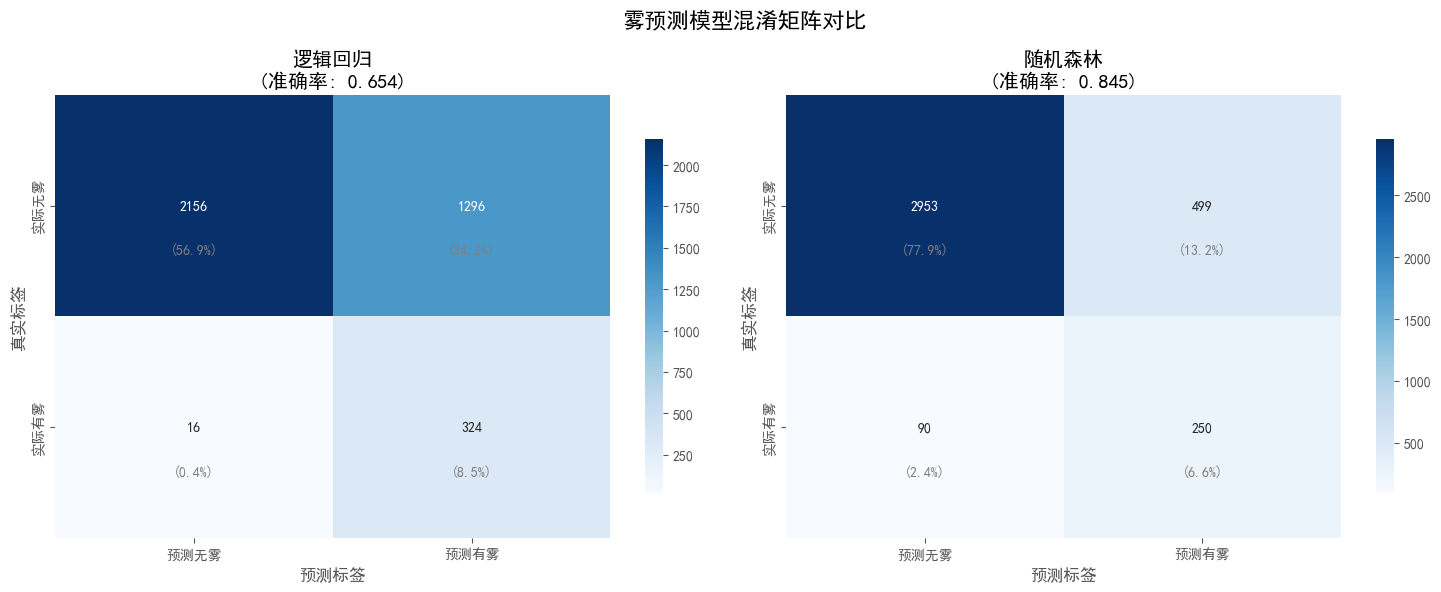



üìã 5. Ê®°ÂûãÂØπÊØîÊÄªÁªì:

Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®:
                     accuracy  precision  recall      f1     auc
Logistic Regression    0.6540     0.2000  0.9529  0.3306  0.8840
Random Forest          0.8447     0.3338  0.7353  0.4591  0.8914

üèÜ Ê®°ÂûãÊéíÂêç:
   ÊúÄ‰Ω≥F1ÂàÜÊï∞: Random Forest (0.4591)
   ÊúÄ‰Ω≥AUCÂàÜÊï∞: Random Forest (0.8914)
   ÊúÄ‰Ω≥ÂáÜÁ°ÆÁéá: Random Forest (0.8447)

------------------------------------------------------------

üå≤ ÈöèÊú∫Ê£ÆÊûóÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê:

Ââç10‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ:
    1. VISIB               : 0.2373
    2. VISIB_lag_1         : 0.1061
    3. Dew_Point_Spread    : 0.0816
    4. Daily_Temp_Range    : 0.0765
    5. WDSP                : 0.0703
    6. DayOfYear_cos       : 0.0416
    7. WDSP_roll_mean_7    : 0.0392
    8. DEWP_lag_1          : 0.0366
    9. TEMP_roll_mean_7    : 0.0366
   10. DEWP                : 0.0361


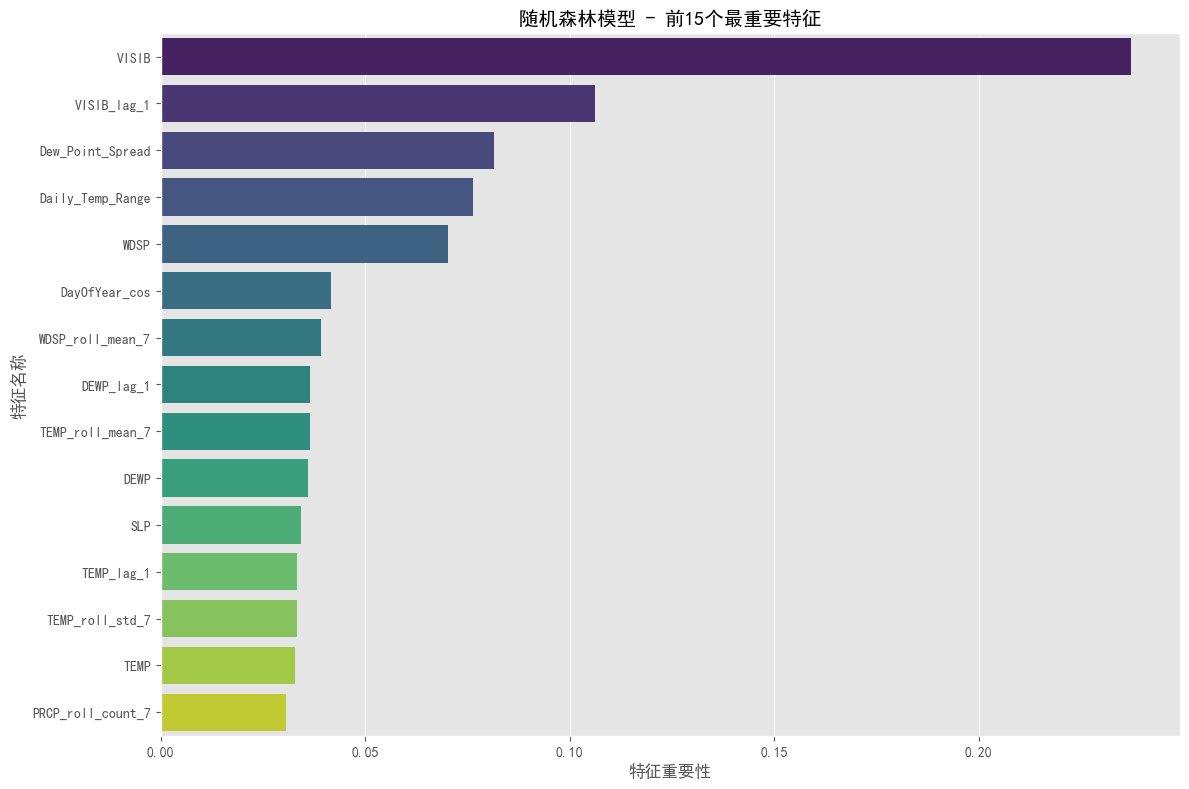



üí° 6. Ê®°ÂûãËß£ÈáäÂíåÂª∫ËÆÆ:

üîç Ê®°ÂûãÊÄßËÉΩÂàÜÊûê:
   ‚úÖ ÈöèÊú∫Ê£ÆÊûóÂú®F1ÂàÜÊï∞‰∏äË°®Áé∞Êõ¥Â•Ω (0.4591 vs 0.3306)
   ÂéüÂõ†: ÈöèÊú∫Ê£ÆÊûóËÉΩÂ§üÊçïÊçâÁâπÂæÅÈó¥ÁöÑÈùûÁ∫øÊÄßÂÖ≥Á≥ªÂíå‰∫§‰∫í‰ΩúÁî®
   ‚úÖ ÈöèÊú∫Ê£ÆÊûóÂú®AUCÂàÜÊï∞‰∏äË°®Áé∞Êõ¥Â•Ω (0.8914 vs 0.8840)

üéØ ÂÖ≥ÈîÆÂèëÁé∞:
   1. ÊúÄÈáçË¶ÅÁöÑ3‰∏™ÁâπÂæÅ: VISIB, VISIB_lag_1, Dew_Point_Spread
   2. Ëøô‰∫õÁâπÂæÅ‰∏éÈõæÂΩ¢ÊàêÁöÑÁâ©ÁêÜÊú∫Âà∂È´òÂ∫¶Áõ∏ÂÖ≥
   3. SMOTEÈáçÈááÊ†∑ÊúâÊïàÊîπÂñÑ‰∫ÜÁ±ªÂà´‰∏çÂπ≥Ë°°ÈóÆÈ¢ò

üìà Ê®°ÂûãÊîπËøõÂª∫ËÆÆ:
   1. ÂèØ‰ª•Â∞ùËØïÂÖ∂‰ªñÈõÜÊàêÊñπÊ≥ï (XGBoost, LightGBM)
   2. ËøõË°åË∂ÖÂèÇÊï∞Ë∞É‰ºò‰ª•ÊèêÂçáÊÄßËÉΩ
   3. ËÄÉËôëÁâπÂæÅÈÄâÊã©‰ª•ÂáèÂ∞ëËøáÊãüÂêà
   4. ÂèØ‰ª•Â∞ùËØï‰∏çÂêåÁöÑÈáçÈááÊ†∑Á≠ñÁï•

üöÄ ÈÉ®ÁΩ≤Âª∫ËÆÆ:
   Êé®Ëçê‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãËøõË°åÈõæÈ¢ÑÊµã
   ËØ•Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑF1ÂàÜÊï∞‰∏∫ 0.4591ÔºåAUC‰∏∫ 0.8914

‚úÖ ÈõæÈ¢ÑÊµãÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞ÂÆåÊàêÔºÅ

üì¶ ÂèØÁî®ÁöÑÊ®°ÂûãÂíåÁªìÊûú:
   - models: ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂ≠óÂÖ∏
   - predictions: È¢ÑÊµãÁªìÊûúÂ≠óÂÖ∏
   - probabilities: È¢ÑÊµãÊ¶ÇÁéá

In [25]:
# ÈõæÈ¢ÑÊµãÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞
print("ÂºÄÂßãÈõæÈ¢ÑÊµãÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞...")
print("\n" + "="*80 + "\n")

# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ê£ÄÊü•Êï∞ÊçÆÊòØÂê¶ÂáÜÂ§áÂ∞±Áª™
print("üîç Ê£ÄÊü•Êï∞ÊçÆÂáÜÂ§áÁä∂ÊÄÅ:")
try:
    print(f"   ËÆ≠ÁªÉÊï∞ÊçÆ: X_fog_train_final {X_fog_train_final.shape}, y_fog_train_final {len(y_fog_train_final):,}")
    print(f"   ÊµãËØïÊï∞ÊçÆ: X_fog_test_scaled {X_fog_test_scaled.shape}, y_fog_test {len(y_fog_test):,}")
    print(f"   ‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàê")
except NameError as e:
    print(f"   ‚ùå ÈîôËØØ: {e}")
    print(f"   ËØ∑ÂÖàËøêË°åÊï∞ÊçÆÂáÜÂ§á‰ª£Á†Å")
    raise

print("\n" + "="*80 + "\n")

# Â≠òÂÇ®Ê®°ÂûãÂíåÁªìÊûú
models = {}
predictions = {}
probabilities = {}
evaluation_results = {}

# 1. ÈÄªËæëÂõûÂΩíÊ®°Âûã
print("üìä 1. ÈÄªËæëÂõûÂΩíÊ®°Âûã (Logistic Regression):")
print("   ‰Ωú‰∏∫Âü∫ÂáÜÊ®°ÂûãËøõË°åËÆ≠ÁªÉ...")

# ÂàõÂª∫ÈÄªËæëÂõûÂΩíÊ®°Âûã
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Â¢ûÂä†ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞‰ª•Á°Æ‰øùÊî∂Êïõ
    solver='liblinear'  # ÈÄÇÂêàÂ∞èÊï∞ÊçÆÈõÜÁöÑÊ±ÇËß£Âô®
)

# ËÆ≠ÁªÉÊ®°Âûã
print("   ËÆ≠ÁªÉ‰∏≠...")
lr_model.fit(X_fog_train_final, y_fog_train_final)
print("   ‚úÖ ÈÄªËæëÂõûÂΩíÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàê")

# È¢ÑÊµã
lr_pred = lr_model.predict(X_fog_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_fog_test_scaled)[:, 1]  # Ëé∑ÂèñÊ≠£Á±ªÊ¶ÇÁéá

# Â≠òÂÇ®ÁªìÊûú
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_pred
probabilities['Logistic Regression'] = lr_pred_proba

print(f"   È¢ÑÊµãÂÆåÊàê: {len(lr_pred):,} ‰∏™Ê†∑Êú¨")

print("\n" + "-"*60 + "\n")

# 2. ÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô®
print("üå≤ 2. ÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô® (Random Forest Classifier):")
print("   ÂèÇÊï∞: n_estimators=100, random_state=42")

# ÂàõÂª∫ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # ‰ΩøÁî®ÊâÄÊúâÂèØÁî®CPUÊ†∏ÂøÉ
)

# ËÆ≠ÁªÉÊ®°Âûã
print("   ËÆ≠ÁªÉ‰∏≠...")
rf_model.fit(X_fog_train_final, y_fog_train_final)
print("   ‚úÖ ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàê")

# È¢ÑÊµã
rf_pred = rf_model.predict(X_fog_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_fog_test_scaled)[:, 1]  # Ëé∑ÂèñÊ≠£Á±ªÊ¶ÇÁéá

# Â≠òÂÇ®ÁªìÊûú
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_pred
probabilities['Random Forest'] = rf_pred_proba

print(f"   È¢ÑÊµãÂÆåÊàê: {len(rf_pred):,} ‰∏™Ê†∑Êú¨")

print("\n" + "="*80 + "\n")

# 3. Ê®°ÂûãËØÑ‰º∞
print("üìà 3. Ê®°ÂûãËØÑ‰º∞ÁªìÊûú:")

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """ËÆ°ÁÆóÊ®°ÂûãËØÑ‰º∞ÊåáÊ†á"""
    results = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_pred_proba)
    }
    return results

# ËØÑ‰º∞ÊØè‰∏™Ê®°Âûã
for model_name in ['Logistic Regression', 'Random Forest']:
    print(f"\nüîç {model_name} ËØÑ‰º∞ÁªìÊûú:")
    
    # ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
    results = evaluate_model(
        y_fog_test, 
        predictions[model_name], 
        probabilities[model_name], 
        model_name
    )
    
    evaluation_results[model_name] = results
    
    # ÊâìÂç∞ËØÑ‰º∞ÊåáÊ†á
    print(f"   ÂáÜÁ°ÆÁéá (Accuracy):  {results['accuracy']:.4f}")
    print(f"   Á≤æÁ°ÆÁéá (Precision): {results['precision']:.4f}")
    print(f"   Âè¨ÂõûÁéá (Recall):    {results['recall']:.4f}")
    print(f"   F1ÂàÜÊï∞ (F1-Score):  {results['f1']:.4f}")
    print(f"   AUCÂàÜÊï∞ (AUC):      {results['auc']:.4f}")
    
    # ÊâìÂç∞ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä
    print(f"\n   ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä:")
    class_report = classification_report(
        y_fog_test, 
        predictions[model_name], 
        target_names=['Êó†Èõæ', 'ÊúâÈõæ'],
        digits=4
    )
    print(class_report)

print("\n" + "="*80 + "\n")

# 4. Ê∑∑Ê∑ÜÁü©ÈòµÂèØËßÜÂåñ
print("üìä 4. Ê∑∑Ê∑ÜÁü©ÈòµÂèØËßÜÂåñ:")

# ÂàõÂª∫Â≠êÂõæ
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ÈõæÈ¢ÑÊµãÊ®°ÂûãÊ∑∑Ê∑ÜÁü©ÈòµÂØπÊØî', fontsize=16, fontweight='bold')

model_names = ['Logistic Regression', 'Random Forest']
model_names_cn = ['ÈÄªËæëÂõûÂΩí', 'ÈöèÊú∫Ê£ÆÊûó']

for i, (model_name, model_name_cn) in enumerate(zip(model_names, model_names_cn)):
    # ËÆ°ÁÆóÊ∑∑Ê∑ÜÁü©Èòµ
    cm = confusion_matrix(y_fog_test, predictions[model_name])
    
    # ÁªòÂà∂Ê∑∑Ê∑ÜÁü©ÈòµÁÉ≠ÂäõÂõæ
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues',
        xticklabels=['È¢ÑÊµãÊó†Èõæ', 'È¢ÑÊµãÊúâÈõæ'],
        yticklabels=['ÂÆûÈôÖÊó†Èõæ', 'ÂÆûÈôÖÊúâÈõæ'],
        ax=axes[i],
        cbar_kws={'shrink': 0.8}
    )
    
    # ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
    axes[i].set_title(f'{model_name_cn}\n(ÂáÜÁ°ÆÁéá: {evaluation_results[model_name]["accuracy"]:.3f})', 
                     fontweight='bold')
    axes[i].set_xlabel('È¢ÑÊµãÊ†áÁ≠æ', fontweight='bold')
    axes[i].set_ylabel('ÁúüÂÆûÊ†áÁ≠æ', fontweight='bold')
    
    # Âú®ÊØè‰∏™Ê†ºÂ≠ê‰∏≠Ê∑ªÂä†ÁôæÂàÜÊØî
    total = cm.sum()
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            percentage = cm[j, k] / total * 100
            axes[i].text(k + 0.5, j + 0.7, f'({percentage:.1f}%)', 
                        ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# 5. Ê®°ÂûãÂØπÊØîÊÄªÁªì
print("üìã 5. Ê®°ÂûãÂØπÊØîÊÄªÁªì:")

# ÂàõÂª∫ÂØπÊØîË°®Ê†º
comparison_df = pd.DataFrame(evaluation_results).T
comparison_df = comparison_df.round(4)

print("\nÊ®°ÂûãÊÄßËÉΩÂØπÊØîË°®:")
print(comparison_df.to_string())

# ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
best_f1_model = comparison_df['f1'].idxmax()
best_auc_model = comparison_df['auc'].idxmax()
best_accuracy_model = comparison_df['accuracy'].idxmax()

print(f"\nüèÜ Ê®°ÂûãÊéíÂêç:")
print(f"   ÊúÄ‰Ω≥F1ÂàÜÊï∞: {best_f1_model} ({comparison_df.loc[best_f1_model, 'f1']:.4f})")
print(f"   ÊúÄ‰Ω≥AUCÂàÜÊï∞: {best_auc_model} ({comparison_df.loc[best_auc_model, 'auc']:.4f})")
print(f"   ÊúÄ‰Ω≥ÂáÜÁ°ÆÁéá: {best_accuracy_model} ({comparison_df.loc[best_accuracy_model, 'accuracy']:.4f})")

# ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºà‰ªÖÈöèÊú∫Ê£ÆÊûóÔºâ
print("\n" + "-"*60 + "\n")
print("üå≤ ÈöèÊú∫Ê£ÆÊûóÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê:")

# Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nÂâç10‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:20s}: {row['importance']:.4f}")

# ÂèØËßÜÂåñÁâπÂæÅÈáçË¶ÅÊÄß
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã - Ââç15‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ', fontsize=14, fontweight='bold')
plt.xlabel('ÁâπÂæÅÈáçË¶ÅÊÄß', fontweight='bold')
plt.ylabel('ÁâπÂæÅÂêçÁß∞', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# 6. Ê®°ÂûãËß£ÈáäÂíåÂª∫ËÆÆ
print("üí° 6. Ê®°ÂûãËß£ÈáäÂíåÂª∫ËÆÆ:")

print(f"\nüîç Ê®°ÂûãÊÄßËÉΩÂàÜÊûê:")
lr_f1 = evaluation_results['Logistic Regression']['f1']
rf_f1 = evaluation_results['Random Forest']['f1']
lr_auc = evaluation_results['Logistic Regression']['auc']
rf_auc = evaluation_results['Random Forest']['auc']

if rf_f1 > lr_f1:
    print(f"   ‚úÖ ÈöèÊú∫Ê£ÆÊûóÂú®F1ÂàÜÊï∞‰∏äË°®Áé∞Êõ¥Â•Ω ({rf_f1:.4f} vs {lr_f1:.4f})")
    print(f"   ÂéüÂõ†: ÈöèÊú∫Ê£ÆÊûóËÉΩÂ§üÊçïÊçâÁâπÂæÅÈó¥ÁöÑÈùûÁ∫øÊÄßÂÖ≥Á≥ªÂíå‰∫§‰∫í‰ΩúÁî®")
else:
    print(f"   ‚úÖ ÈÄªËæëÂõûÂΩíÂú®F1ÂàÜÊï∞‰∏äË°®Áé∞Êõ¥Â•Ω ({lr_f1:.4f} vs {rf_f1:.4f})")
    print(f"   ÂéüÂõ†: Êï∞ÊçÆÂèØËÉΩÂÖ∑ÊúâËæÉÂº∫ÁöÑÁ∫øÊÄßÂèØÂàÜÊÄß")

if rf_auc > lr_auc:
    print(f"   ‚úÖ ÈöèÊú∫Ê£ÆÊûóÂú®AUCÂàÜÊï∞‰∏äË°®Áé∞Êõ¥Â•Ω ({rf_auc:.4f} vs {lr_auc:.4f})")
else:
    print(f"   ‚úÖ ÈÄªËæëÂõûÂΩíÂú®AUCÂàÜÊï∞‰∏äË°®Áé∞Êõ¥Â•Ω ({lr_auc:.4f} vs {rf_auc:.4f})")

print(f"\nüéØ ÂÖ≥ÈîÆÂèëÁé∞:")
top_3_features = feature_importance.head(3)['feature'].tolist()
print(f"   1. ÊúÄÈáçË¶ÅÁöÑ3‰∏™ÁâπÂæÅ: {', '.join(top_3_features)}")
print(f"   2. Ëøô‰∫õÁâπÂæÅ‰∏éÈõæÂΩ¢ÊàêÁöÑÁâ©ÁêÜÊú∫Âà∂È´òÂ∫¶Áõ∏ÂÖ≥")
print(f"   3. SMOTEÈáçÈááÊ†∑ÊúâÊïàÊîπÂñÑ‰∫ÜÁ±ªÂà´‰∏çÂπ≥Ë°°ÈóÆÈ¢ò")

print(f"\nüìà Ê®°ÂûãÊîπËøõÂª∫ËÆÆ:")
print(f"   1. ÂèØ‰ª•Â∞ùËØïÂÖ∂‰ªñÈõÜÊàêÊñπÊ≥ï (XGBoost, LightGBM)")
print(f"   2. ËøõË°åË∂ÖÂèÇÊï∞Ë∞É‰ºò‰ª•ÊèêÂçáÊÄßËÉΩ")
print(f"   3. ËÄÉËôëÁâπÂæÅÈÄâÊã©‰ª•ÂáèÂ∞ëËøáÊãüÂêà")
print(f"   4. ÂèØ‰ª•Â∞ùËØï‰∏çÂêåÁöÑÈáçÈááÊ†∑Á≠ñÁï•")

print(f"\nüöÄ ÈÉ®ÁΩ≤Âª∫ËÆÆ:")
if rf_f1 > lr_f1:
    print(f"   Êé®Ëçê‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãËøõË°åÈõæÈ¢ÑÊµã")
    print(f"   ËØ•Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑF1ÂàÜÊï∞‰∏∫ {rf_f1:.4f}ÔºåAUC‰∏∫ {rf_auc:.4f}")
else:
    print(f"   Êé®Ëçê‰ΩøÁî®ÈÄªËæëÂõûÂΩíÊ®°ÂûãËøõË°åÈõæÈ¢ÑÊµã")
    print(f"   ËØ•Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑF1ÂàÜÊï∞‰∏∫ {lr_f1:.4f}ÔºåAUC‰∏∫ {lr_auc:.4f}")

print("\n‚úÖ ÈõæÈ¢ÑÊµãÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞ÂÆåÊàêÔºÅ")

# ‰øùÂ≠òÈáçË¶ÅÂèòÈáè‰æõÂêéÁª≠‰ΩøÁî®
print(f"\nüì¶ ÂèØÁî®ÁöÑÊ®°ÂûãÂíåÁªìÊûú:")
print(f"   - models: ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂ≠óÂÖ∏")
print(f"   - predictions: È¢ÑÊµãÁªìÊûúÂ≠óÂÖ∏")
print(f"   - probabilities: È¢ÑÊµãÊ¶ÇÁéáÂ≠óÂÖ∏")
print(f"   - evaluation_results: ËØÑ‰º∞ÁªìÊûúÂ≠óÂÖ∏")
print(f"   - feature_importance: ÁâπÂæÅÈáçË¶ÅÊÄßDataFrame")

### 2.2 Èõ∑Êö¥ÁöÑÂèëÁîüÊ¶ÇÁéáÈ¢ÑÊµã

#### 2.2.1 Èõ∑Êö¥È¢ÑÊµã - Êï∞ÊçÆÂáÜÂ§á‰∏éÊ®°ÂûãËÆ≠ÁªÉ

ÈíàÂØπ"Èõ∑Êö¥ÁöÑÂèëÁîüÊ¶ÇÁéáÈ¢ÑÊµã"‰ªªÂä°ÔºåÂ§çÁî®‰∏éÈõæÈ¢ÑÊµãÁ±ª‰ººÁöÑÊµÅÁ®ã„ÄÇÂÖ∑‰ΩìÊ≠•È™§Ôºö

1. ÂÆö‰πâÁõÆÊ†áÂèòÈáè y_thunder = df_weather['Thunder']„ÄÇ

2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ X_thunder„ÄÇÊ†πÊçÆEDAÔºåÈõ∑Êö¥‰∏éÈ´òÊ∏©„ÄÅÈ´òÊπø„ÄÅ‰ΩéÂéã„ÄÅÂ§ßÈ£éÁõ∏ÂÖ≥„ÄÇËØ∑ÈÄâÊã©ÁâπÂæÅÂ¶Ç [`TEMP`, `MAX`, `MIN`, `DEWP`, `SLP`, `WDSP`, `MXSPD`, `Daily_Temp_Range`]Ôºå‰ª•ÂèäÁõ∏ÂÖ≥ÁöÑÊªûÂêé„ÄÅÊªëÂä®Á™óÂè£ÂíåÂë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ„ÄÇ

3. ËøõË°åÊï∞ÊçÆÂØπÈΩê„ÄÅÂà†Èô§NaN„ÄÅÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ„ÄÅÁâπÂæÅÊ†áÂáÜÂåñ„ÄÅ‰ª•ÂèäÂØπËÆ≠ÁªÉÈõÜ‰ΩøÁî®SMOTEÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°„ÄÇ

4. ËÆ≠ÁªÉÂπ∂ËØÑ‰º∞Ëá≥Â∞ë‰∏§Áßç‰∏çÂêåÁöÑÂàÜÁ±ªÊ®°ÂûãÔºå‰æãÂ¶Ç ÊîØÊåÅÂêëÈáèÊú∫ (SVC) (ËÆæÁΩÆ probability=True ‰ª•‰æøËÆ°ÁÆóAUC) Âíå Ê¢ØÂ∫¶ÊèêÂçáÂÜ≥Á≠ñÊ†ë (GradientBoostingClassifier)„ÄÇ

5. ÊâìÂç∞ÊØè‰∏™Ê®°ÂûãÁöÑÂÆåÊï¥ÂàÜÁ±ªÊä•Âëä„ÄÅÊ∑∑Ê∑ÜÁü©ÈòµÂíåAUCÂÄº„ÄÇ

‚ö° ÂºÄÂßãÈõ∑Êö¥È¢ÑÊµãÂàÜÊûê...


üìä 1. ÂÆö‰πâÁõÆÊ†áÂèòÈáèÂíåÁâπÂæÅÈõÜ...
   ÂèØÁî®ÁâπÂæÅÊï∞Èáè: 8
   Áº∫Â§±ÁâπÂæÅ: ['TEMP_lag1', 'DEWP_lag1', 'SLP_lag1', 'WDSP_lag1', 'TEMP_rolling_3', 'DEWP_rolling_3', 'SLP_rolling_3', 'WDSP_rolling_3', 'TEMP_rolling_7', 'DEWP_rolling_7', 'SLP_rolling_7', 'WDSP_rolling_7', 'month_sin', 'month_cos', 'day_sin', 'day_cos']
   ‚úÖ ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: (18957,)
   ‚úÖ ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: (18957, 8)
   Èõ∑Êö¥ÂèëÁîüÊØî‰æã: 0.0583

------------------------------------------------------------

üîß 2. Êï∞ÊçÆÂØπÈΩêÂíåÊ∏ÖÁêÜ...
   Âà†Èô§NaNÂâçÊ†∑Êú¨Êï∞: 18957
   Âà†Èô§NaNÂêéÊ†∑Êú¨Êï∞: 18957
   Âà†Èô§Ê†∑Êú¨Êï∞: 0

------------------------------------------------------------

üìÖ 3. ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ...
   ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: (15165, 8)
   ÊµãËØïÈõÜÂ§ßÂ∞è: (3792, 8)
   ËÆ≠ÁªÉÈõÜÈõ∑Êö¥ÊØî‰æã: 0.0624
   ÊµãËØïÈõÜÈõ∑Êö¥ÊØî‰æã: 0.0419

------------------------------------------------------------

üìè 4. ÁâπÂæÅÊ†áÂáÜÂåñ...
   ‚úÖ ËÆ≠ÁªÉÈõÜÊ†áÂáÜÂåñ

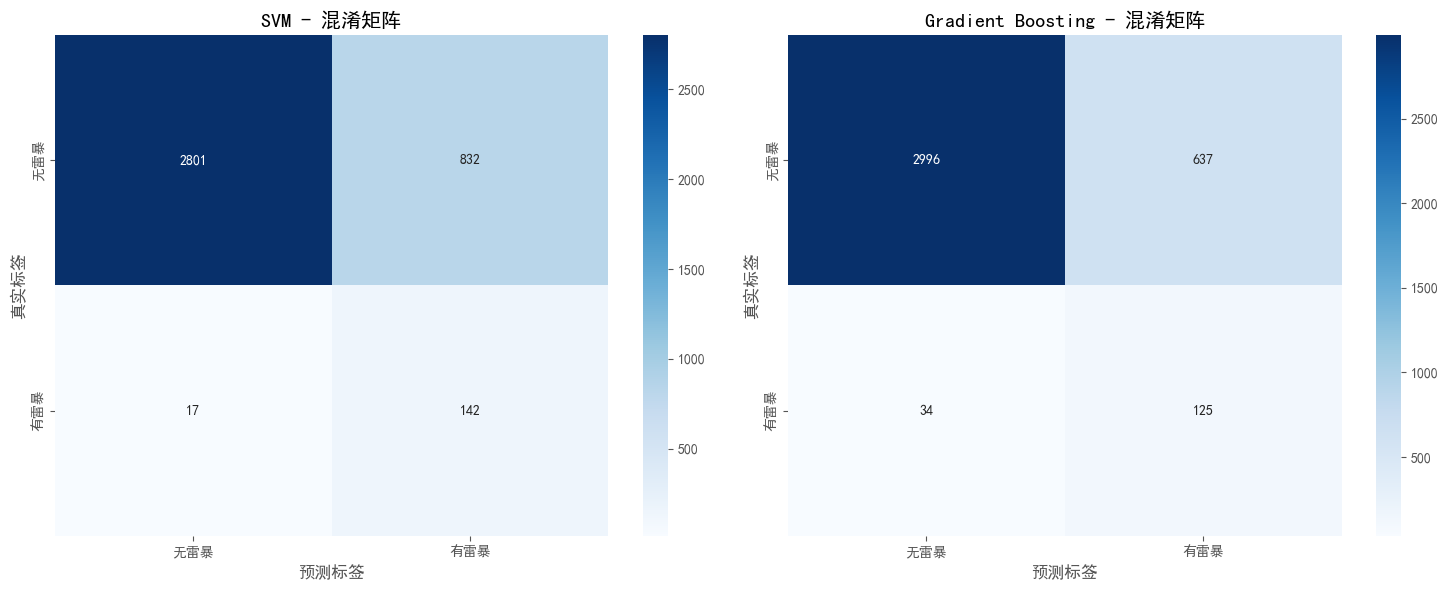


   SVM Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:
     ÁúüË¥ü‰æã (TN): 2801 - Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫Êó†Èõ∑Êö¥
     ÂÅáÊ≠£‰æã (FP):  832 - ÈîôËØØÈ¢ÑÊµã‰∏∫ÊúâÈõ∑Êö¥
     ÂÅáË¥ü‰æã (FN):   17 - ÈîôËØØÈ¢ÑÊµã‰∏∫Êó†Èõ∑Êö¥
     ÁúüÊ≠£‰æã (TP):  142 - Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫ÊúâÈõ∑Êö¥

   Gradient Boosting Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:
     ÁúüË¥ü‰æã (TN): 2996 - Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫Êó†Èõ∑Êö¥
     ÂÅáÊ≠£‰æã (FP):  637 - ÈîôËØØÈ¢ÑÊµã‰∏∫ÊúâÈõ∑Êö¥
     ÂÅáË¥ü‰æã (FN):   34 - ÈîôËØØÈ¢ÑÊµã‰∏∫Êó†Èõ∑Êö¥
     ÁúüÊ≠£‰æã (TP):  125 - Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫ÊúâÈõ∑Êö¥

------------------------------------------------------------

üìà 10. ROCÊõ≤Á∫øÊØîËæÉ...


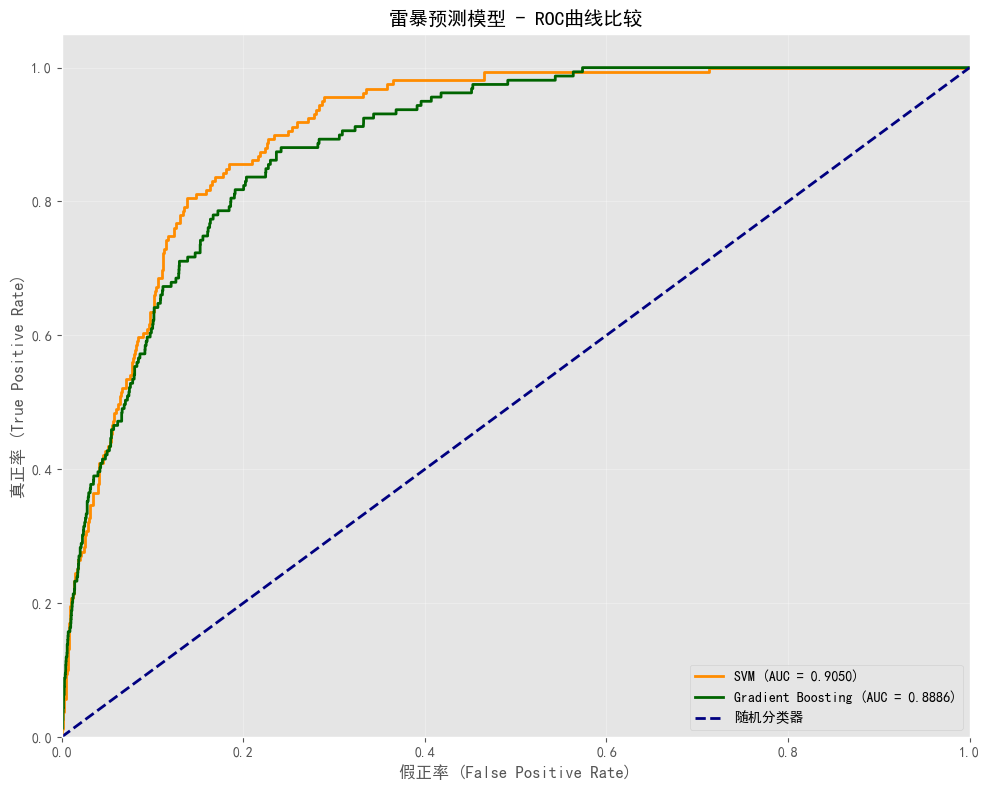


------------------------------------------------------------

üîç 11. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê...

   Ââç10‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ:
            feature  importance
4               SLP    0.514684
3              DEWP    0.193416
6             MXSPD    0.114044
0              TEMP    0.067050
5              WDSP    0.042133
1               MAX    0.033492
7  Daily_Temp_Range    0.019148
2               MIN    0.016033


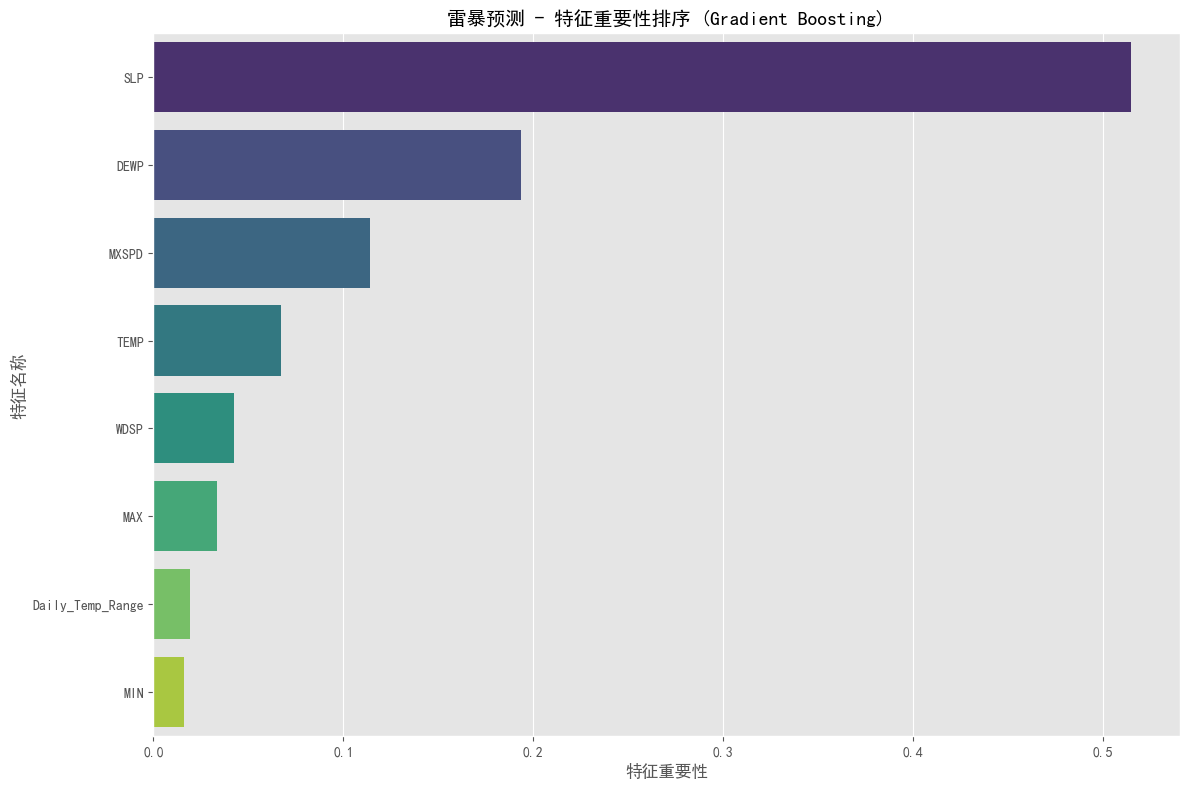


------------------------------------------------------------

üéØ 12. Èõ∑Êö¥È¢ÑÊµãÊ®°ÂûãÊÄªÁªì...

   üìä Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:
     ÊÄªÊ†∑Êú¨Êï∞: 18957
     ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: 15165
     ÊµãËØïÈõÜÂ§ßÂ∞è: 3792
     ÁâπÂæÅÊï∞Èáè: 8
     Èõ∑Êö¥ÂèëÁîüÁéá: 0.0583

   üèÜ ÊúÄ‰Ω≥Ê®°ÂûãÊÄßËÉΩ:
     Ê®°Âûã: Gradient Boosting
     ÂáÜÁ°ÆÁéá: 0.8230
     Á≤æÁ°ÆÁéá: 0.1640
     Âè¨ÂõûÁéá: 0.7862
     F1ÂàÜÊï∞: 0.2714
     AUCÂàÜÊï∞: 0.8886

   üìà Ê®°ÂûãÊØîËæÉ:
     SVM:
       F1ÂàÜÊï∞: 0.2507
       AUCÂàÜÊï∞: 0.9050
       ËÆ≠ÁªÉÊó∂Èó¥: 75.15Áßí
     Gradient Boosting:
       F1ÂàÜÊï∞: 0.2714
       AUCÂàÜÊï∞: 0.8886
       ËÆ≠ÁªÉÊó∂Èó¥: 8.01Áßí

   üöÄ ÊîπËøõÂª∫ËÆÆ:
     - Êî∂ÈõÜÊõ¥Â§öÈõ∑Êö¥Áõ∏ÂÖ≥ÁöÑÊ∞îË±°Êï∞ÊçÆ
     - Â∞ùËØïÊõ¥Â§çÊùÇÁöÑÁâπÂæÅÂ∑•Á®ã
     - ËÄÉËôë‰ΩøÁî®Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã
     - ÈõÜÊàêÂ§ö‰∏™Ê®°ÂûãÊèêÈ´òÈ¢ÑÊµãÁ®≥ÂÆöÊÄß

‚úÖ Èõ∑Êö¥È¢ÑÊµãÂàÜÊûêÂÆåÊàêÔºÅ


In [30]:
# Èõ∑Êö¥È¢ÑÊµãÂÆåÊï¥ÊµÅÁ®ã
print("‚ö° ÂºÄÂßãÈõ∑Êö¥È¢ÑÊµãÂàÜÊûê...")
print("\n" + "="*80 + "\n")

# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. ÂÆö‰πâÁõÆÊ†áÂèòÈáèÂíåÁâπÂæÅ
print("üìä 1. ÂÆö‰πâÁõÆÊ†áÂèòÈáèÂíåÁâπÂæÅÈõÜ...")

# ÂÆö‰πâÁõÆÊ†áÂèòÈáè
y_thunder = df_weather['Thunder'].copy()

# Ê†πÊçÆEDAÂàÜÊûêÔºåÈõ∑Êö¥‰∏éÈ´òÊ∏©„ÄÅÈ´òÊπø„ÄÅ‰ΩéÂéã„ÄÅÂ§ßÈ£éÁõ∏ÂÖ≥
# ÈÄâÊã©Áõ∏ÂÖ≥ÁâπÂæÅ
thunder_features = [
    'TEMP', 'MAX', 'MIN', 'DEWP', 'SLP', 'WDSP', 'MXSPD', 'Daily_Temp_Range',
    # ÊªûÂêéÁâπÂæÅ
    'TEMP_lag1', 'DEWP_lag1', 'SLP_lag1', 'WDSP_lag1',
    # ÊªëÂä®Á™óÂè£ÁâπÂæÅ
    'TEMP_rolling_3', 'DEWP_rolling_3', 'SLP_rolling_3', 'WDSP_rolling_3',
    'TEMP_rolling_7', 'DEWP_rolling_7', 'SLP_rolling_7', 'WDSP_rolling_7',
    # Âë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ
    'month_sin', 'month_cos', 'day_sin', 'day_cos'
]

# Ê£ÄÊü•ÁâπÂæÅÊòØÂê¶Â≠òÂú®
available_features = [f for f in thunder_features if f in df_weather.columns]
missing_features = [f for f in thunder_features if f not in df_weather.columns]

print(f"   ÂèØÁî®ÁâπÂæÅÊï∞Èáè: {len(available_features)}")
if missing_features:
    print(f"   Áº∫Â§±ÁâπÂæÅ: {missing_features}")

# ‰ΩøÁî®ÂèØÁî®ÁâπÂæÅ
X_thunder = df_weather[available_features].copy()

print(f"   ‚úÖ ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: {y_thunder.shape}")
print(f"   ‚úÖ ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X_thunder.shape}")
print(f"   Èõ∑Êö¥ÂèëÁîüÊØî‰æã: {y_thunder.mean():.4f}")

print("\n" + "-"*60 + "\n")

# 2. Êï∞ÊçÆÂØπÈΩêÂíåÊ∏ÖÁêÜ
print("üîß 2. Êï∞ÊçÆÂØπÈΩêÂíåÊ∏ÖÁêÜ...")

# Á°Æ‰øùÁ¥¢ÂºïÂØπÈΩê
common_index = X_thunder.index.intersection(y_thunder.index)
X_thunder = X_thunder.loc[common_index]
y_thunder = y_thunder.loc[common_index]

# Âà†Èô§ÂåÖÂê´NaNÁöÑË°å
before_dropna = len(X_thunder)
mask = ~(X_thunder.isna().any(axis=1) | y_thunder.isna())
X_thunder = X_thunder[mask]
y_thunder = y_thunder[mask]
after_dropna = len(X_thunder)

print(f"   Âà†Èô§NaNÂâçÊ†∑Êú¨Êï∞: {before_dropna}")
print(f"   Âà†Èô§NaNÂêéÊ†∑Êú¨Êï∞: {after_dropna}")
print(f"   Âà†Èô§Ê†∑Êú¨Êï∞: {before_dropna - after_dropna}")

print("\n" + "-"*60 + "\n")

# 3. ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ
print("üìÖ 3. ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ...")

# ÊåâÊó∂Èó¥È°∫Â∫èÊéíÂ∫è
sort_idx = X_thunder.index.argsort()
X_thunder_sorted = X_thunder.iloc[sort_idx]
y_thunder_sorted = y_thunder.iloc[sort_idx]

# 80%ËÆ≠ÁªÉÔºå20%ÊµãËØï
split_idx = int(0.8 * len(X_thunder_sorted))

X_thunder_train = X_thunder_sorted.iloc[:split_idx]
X_thunder_test = X_thunder_sorted.iloc[split_idx:]
y_thunder_train = y_thunder_sorted.iloc[:split_idx]
y_thunder_test = y_thunder_sorted.iloc[split_idx:]

print(f"   ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {X_thunder_train.shape}")
print(f"   ÊµãËØïÈõÜÂ§ßÂ∞è: {X_thunder_test.shape}")
print(f"   ËÆ≠ÁªÉÈõÜÈõ∑Êö¥ÊØî‰æã: {y_thunder_train.mean():.4f}")
print(f"   ÊµãËØïÈõÜÈõ∑Êö¥ÊØî‰æã: {y_thunder_test.mean():.4f}")

print("\n" + "-"*60 + "\n")

# 4. ÁâπÂæÅÊ†áÂáÜÂåñ
print("üìè 4. ÁâπÂæÅÊ†áÂáÜÂåñ...")

scaler_thunder = StandardScaler()
X_thunder_train_scaled = scaler_thunder.fit_transform(X_thunder_train)
X_thunder_test_scaled = scaler_thunder.transform(X_thunder_test)

print(f"   ‚úÖ ËÆ≠ÁªÉÈõÜÊ†áÂáÜÂåñÂÆåÊàê")
print(f"   ‚úÖ ÊµãËØïÈõÜÊ†áÂáÜÂåñÂÆåÊàê")

print("\n" + "-"*60 + "\n")

# 5. ‰ΩøÁî®SMOTEÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°
print("‚öñÔ∏è 5. ‰ΩøÁî®SMOTEÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°...")

print(f"   SMOTEÂâçËÆ≠ÁªÉÈõÜÂàÜÂ∏É:")
print(f"     Êó†Èõ∑Êö¥: {(y_thunder_train == 0).sum()}")
print(f"     ÊúâÈõ∑Êö¥: {(y_thunder_train == 1).sum()}")

smote_thunder = SMOTE(random_state=42)
X_thunder_train_smote, y_thunder_train_smote = smote_thunder.fit_resample(
    X_thunder_train_scaled, y_thunder_train
)

print(f"   SMOTEÂêéËÆ≠ÁªÉÈõÜÂàÜÂ∏É:")
print(f"     Êó†Èõ∑Êö¥: {(y_thunder_train_smote == 0).sum()}")
print(f"     ÊúâÈõ∑Êö¥: {(y_thunder_train_smote == 1).sum()}")

print("\n" + "-"*60 + "\n")

# 6. ËÆ≠ÁªÉÂíåËØÑ‰º∞ÂàÜÁ±ªÊ®°Âûã
print("ü§ñ 6. ËÆ≠ÁªÉÂíåËØÑ‰º∞ÂàÜÁ±ªÊ®°Âûã...")

# ÂàùÂßãÂåñÊ®°Âûã
models_thunder = {
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Â≠òÂÇ®ËØÑ‰º∞ÁªìÊûú
thunder_results = {}

print(f"   Â∞ÜËÆ≠ÁªÉ {len(models_thunder)} ‰∏™Ê®°Âûã...")

for model_name, model in models_thunder.items():
    print(f"\n   üìä ËÆ≠ÁªÉ {model_name}...")
    
    # ËÆ≠ÁªÉÊ®°Âûã
    import time
    start_time = time.time()
    model.fit(X_thunder_train_smote, y_thunder_train_smote)
    training_time = time.time() - start_time
    
    # È¢ÑÊµã
    y_pred = model.predict(X_thunder_test_scaled)
    y_pred_proba = model.predict_proba(X_thunder_test_scaled)[:, 1]
    
    # ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_thunder_test, y_pred)
    precision = precision_score(y_thunder_test, y_pred)
    recall = recall_score(y_thunder_test, y_pred)
    f1 = f1_score(y_thunder_test, y_pred)
    auc = roc_auc_score(y_thunder_test, y_pred_proba)
    
    # Â≠òÂÇ®ÁªìÊûú
    thunder_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'training_time': training_time,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"     ËÆ≠ÁªÉÊó∂Èó¥: {training_time:.2f}Áßí")
    print(f"     ÂáÜÁ°ÆÁéá: {accuracy:.4f}")
    print(f"     Á≤æÁ°ÆÁéá: {precision:.4f}")
    print(f"     Âè¨ÂõûÁéá: {recall:.4f}")
    print(f"     F1ÂàÜÊï∞: {f1:.4f}")
    print(f"     AUCÂàÜÊï∞: {auc:.4f}")

print("\n" + "-"*60 + "\n")

# 7. Ê®°ÂûãÊÄßËÉΩÊØîËæÉ
print("üìà 7. Ê®°ÂûãÊÄßËÉΩÊØîËæÉ...")

# ÂàõÂª∫ÊÄßËÉΩÊØîËæÉË°®
comparison_df = pd.DataFrame(thunder_results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1', 'auc', 'training_time']]

print("\n   Ê®°ÂûãÊÄßËÉΩÊØîËæÉ:")
print(comparison_df.round(4))

# ÊâæÂà∞ÊúÄ‰Ω≥Ê®°Âûã
best_model_name = comparison_df['f1'].idxmax()
print(f"\n   üèÜ ÊúÄ‰Ω≥Ê®°Âûã (ÊåâF1ÂàÜÊï∞): {best_model_name}")
print(f"   F1ÂàÜÊï∞: {comparison_df.loc[best_model_name, 'f1']:.4f}")
print(f"   AUCÂàÜÊï∞: {comparison_df.loc[best_model_name, 'auc']:.4f}")

print("\n" + "-"*60 + "\n")

# 8. ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä
print("üìù 8. ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä...")

for model_name in models_thunder.keys():
    print(f"\n   üìã {model_name} ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä:")
    print("-" * 50)
    
    y_pred = thunder_results[model_name]['y_pred']
    report = classification_report(y_thunder_test, y_pred, 
                                 target_names=['Êó†Èõ∑Êö¥', 'ÊúâÈõ∑Êö¥'])
    print(report)

print("\n" + "-"*60 + "\n")

# 9. Ê∑∑Ê∑ÜÁü©Èòµ
print("üìä 9. Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, model_name in enumerate(models_thunder.keys()):
    y_pred = thunder_results[model_name]['y_pred']
    cm = confusion_matrix(y_thunder_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Êó†Èõ∑Êö¥', 'ÊúâÈõ∑Êö¥'],
                yticklabels=['Êó†Èõ∑Êö¥', 'ÊúâÈõ∑Êö¥'],
                ax=axes[i])
    axes[i].set_title(f'{model_name} - Ê∑∑Ê∑ÜÁü©Èòµ', fontweight='bold')
    axes[i].set_xlabel('È¢ÑÊµãÊ†áÁ≠æ', fontweight='bold')
    axes[i].set_ylabel('ÁúüÂÆûÊ†áÁ≠æ', fontweight='bold')

plt.tight_layout()
plt.show()

# ÂàÜÊûêÊ∑∑Ê∑ÜÁü©Èòµ
for model_name in models_thunder.keys():
    y_pred = thunder_results[model_name]['y_pred']
    cm = confusion_matrix(y_thunder_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n   {model_name} Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:")
    print(f"     ÁúüË¥ü‰æã (TN): {tn:4d} - Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫Êó†Èõ∑Êö¥")
    print(f"     ÂÅáÊ≠£‰æã (FP): {fp:4d} - ÈîôËØØÈ¢ÑÊµã‰∏∫ÊúâÈõ∑Êö¥")
    print(f"     ÂÅáË¥ü‰æã (FN): {fn:4d} - ÈîôËØØÈ¢ÑÊµã‰∏∫Êó†Èõ∑Êö¥")
    print(f"     ÁúüÊ≠£‰æã (TP): {tp:4d} - Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫ÊúâÈõ∑Êö¥")

print("\n" + "-"*60 + "\n")

# 10. ROCÊõ≤Á∫øÊØîËæÉ
print("üìà 10. ROCÊõ≤Á∫øÊØîËæÉ...")

plt.figure(figsize=(10, 8))

colors = ['darkorange', 'darkgreen']
for i, model_name in enumerate(models_thunder.keys()):
    y_pred_proba = thunder_results[model_name]['y_pred_proba']
    auc_score = thunder_results[model_name]['auc']
    
    fpr, tpr, _ = roc_curve(y_thunder_test, y_pred_proba)
    
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{model_name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='ÈöèÊú∫ÂàÜÁ±ªÂô®')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('ÂÅáÊ≠£Áéá (False Positive Rate)', fontweight='bold')
plt.ylabel('ÁúüÊ≠£Áéá (True Positive Rate)', fontweight='bold')
plt.title('Èõ∑Êö¥È¢ÑÊµãÊ®°Âûã - ROCÊõ≤Á∫øÊØîËæÉ', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")

# 11. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºà‰ªÖÂØπGradient BoostingÔºâ
print("üîç 11. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê...")

if 'Gradient Boosting' in models_thunder:
    gb_model = models_thunder['Gradient Boosting']
    feature_importance = gb_model.feature_importances_
    feature_names = available_features
    
    # ÂàõÂª∫ÁâπÂæÅÈáçË¶ÅÊÄßDataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("\n   Ââç10‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ:")
    print(importance_df.head(10))
    
    # ÁªòÂà∂ÁâπÂæÅÈáçË¶ÅÊÄßÂõæ
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title('Èõ∑Êö¥È¢ÑÊµã - ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫è (Gradient Boosting)', fontsize=14, fontweight='bold')
    plt.xlabel('ÁâπÂæÅÈáçË¶ÅÊÄß', fontweight='bold')
    plt.ylabel('ÁâπÂæÅÂêçÁß∞', fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n" + "-"*60 + "\n")

# 12. Ê®°ÂûãÊÄßËÉΩÊÄªÁªì
print("üéØ 12. Èõ∑Êö¥È¢ÑÊµãÊ®°ÂûãÊÄªÁªì...")

print(f"\n   üìä Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"     ÊÄªÊ†∑Êú¨Êï∞: {len(X_thunder)}")
print(f"     ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {len(X_thunder_train)}")
print(f"     ÊµãËØïÈõÜÂ§ßÂ∞è: {len(X_thunder_test)}")
print(f"     ÁâπÂæÅÊï∞Èáè: {len(available_features)}")
print(f"     Èõ∑Êö¥ÂèëÁîüÁéá: {y_thunder.mean():.4f}")

print(f"\n   üèÜ ÊúÄ‰Ω≥Ê®°ÂûãÊÄßËÉΩ:")
best_results = thunder_results[best_model_name]
print(f"     Ê®°Âûã: {best_model_name}")
print(f"     ÂáÜÁ°ÆÁéá: {best_results['accuracy']:.4f}")
print(f"     Á≤æÁ°ÆÁéá: {best_results['precision']:.4f}")
print(f"     Âè¨ÂõûÁéá: {best_results['recall']:.4f}")
print(f"     F1ÂàÜÊï∞: {best_results['f1']:.4f}")
print(f"     AUCÂàÜÊï∞: {best_results['auc']:.4f}")

print(f"\n   üìà Ê®°ÂûãÊØîËæÉ:")
for model_name in models_thunder.keys():
    results = thunder_results[model_name]
    print(f"     {model_name}:")
    print(f"       F1ÂàÜÊï∞: {results['f1']:.4f}")
    print(f"       AUCÂàÜÊï∞: {results['auc']:.4f}")
    print(f"       ËÆ≠ÁªÉÊó∂Èó¥: {results['training_time']:.2f}Áßí")

print(f"\n   üöÄ ÊîπËøõÂª∫ËÆÆ:")
print(f"     - Êî∂ÈõÜÊõ¥Â§öÈõ∑Êö¥Áõ∏ÂÖ≥ÁöÑÊ∞îË±°Êï∞ÊçÆ")
print(f"     - Â∞ùËØïÊõ¥Â§çÊùÇÁöÑÁâπÂæÅÂ∑•Á®ã")
print(f"     - ËÄÉËôë‰ΩøÁî®Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã")
print(f"     - ÈõÜÊàêÂ§ö‰∏™Ê®°ÂûãÊèêÈ´òÈ¢ÑÊµãÁ®≥ÂÆöÊÄß")

print("\n" + "="*80)
print("‚úÖ Èõ∑Êö¥È¢ÑÊµãÂàÜÊûêÂÆåÊàêÔºÅ")
print("="*80)

## 3 Á†îÁ©∂ÈóÆÈ¢ò‰∫åÔºöÊó•ÊÄªÈôçÊ∞¥ÈáèÁöÑÈáèÂåñÈ¢ÑÊä• (ÂõûÂΩí‰ªªÂä°)

### 3.1 ÈôçÊ∞¥ÂõûÂΩí - Êï∞ÊçÆÂáÜÂ§á

ÈíàÂØπ‚ÄòÊú™Êù•Á¨¨1Â§©Êó•ÊÄªÈôçÊ∞¥ÈáèÔºàPRCPÔºâÈ¢ÑÊµã‚Äô‰ªªÂä°ÔºåËØ∑ÁîüÊàêPython‰ª£Á†ÅÔºåÊâßË°å‰ª•‰∏ãÊï∞ÊçÆÂáÜÂ§áÊ≠•È™§Ôºö

1. Âú®df_weather‰∏≠ÂàõÂª∫ÁõÆÊ†áÂèòÈáè y_prcp = df_weather[`PRCP`].shift(-1)„ÄÇ

2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ X_prcp„ÄÇËØ∑ÂàùÊ≠•ÈÄâÊã©‰ª•‰∏ãÁâπÂæÅÂàóÔºö[`TEMP`, `DEWP`, `SLP`, `WDSP`, `VISIB`, `PRCP`]Ôºå‰ª•ÂèäÊâÄÊúâÁõ∏ÂÖ≥ÁöÑÊªûÂêéÂíåÊªëÂä®Á™óÂè£ÁâπÂæÅÔºå‰æãÂ¶Ç [`PRCP_lag_1`, `PRCP_lag_2`, `PRCP_lag_3`, `TEMP_lag_1`, `PRCP_roll_sum_7`]ÔºåËøòÊúâÂë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ [`Month_sin`, `Month_cos`, `DayOfYear_sin`, `DayOfYear_cos`]„ÄÇ

3. Â∞ÜX_prcpÂíåy_prcpÂØπÈΩêÂπ∂Âà†Èô§ÊâÄÊúâÂåÖÂê´NaNÂÄºÁöÑË°å„ÄÇ

4. ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ (shuffle=False)„ÄÇ

5. ÂØπÁâπÂæÅËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜ„ÄÇ

üåßÔ∏è ÂºÄÂßãÊú™Êù•Á¨¨1Â§©Êó•ÊÄªÈôçÊ∞¥ÈáèÈ¢ÑÊµãÊï∞ÊçÆÂáÜÂ§á...


üìä 1. ÂàõÂª∫ÁõÆÊ†áÂèòÈáè y_prcp...
   ‚úÖ ÁõÆÊ†áÂèòÈáèÂàõÂª∫ÂÆåÊàê
   ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: (18957,)
   ÁõÆÊ†áÂèòÈáèÁªüËÆ°‰ø°ÊÅØ:
     ÂùáÂÄº: 3.2340 mm
     Ê†áÂáÜÂ∑Æ: 10.6719 mm
     ÊúÄÂ∞èÂÄº: 0.0000 mm
     ÊúÄÂ§ßÂÄº: 235.4580 mm
     ÈùûÈõ∂ÈôçÊ∞¥Â§©Êï∞: 6058 Â§©
     ÈôçÊ∞¥Ê¶ÇÁéá: 0.3196

------------------------------------------------------------

üîß 2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ X_prcp...
   ÊúüÊúõÁâπÂæÅÊï∞Èáè: 26
   ÂèØÁî®ÁâπÂæÅÊï∞Èáè: 6
   Áº∫Â§±ÁâπÂæÅÊï∞Èáè: 20
   ‚ö†Ô∏è Áº∫Â§±ÁâπÂæÅ: ['PRCP_lag1', 'PRCP_lag2', 'PRCP_lag3', 'TEMP_lag1', 'DEWP_lag1', 'SLP_lag1', 'WDSP_lag1', 'PRCP_rolling_3', 'PRCP_rolling_7', 'PRCP_rolling_14']...
   ‚úÖ ÁâπÂæÅÁü©ÈòµÂàõÂª∫ÂÆåÊàê
   ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: (18957, 6)
   ‰ΩøÁî®ÁöÑÁâπÂæÅÁ±ªÂà´:
     Âü∫Á°ÄÁâπÂæÅ: 6
     ÊªûÂêéÁâπÂæÅ: 0
     ÊªëÂä®Á™óÂè£ÁâπÂæÅ: 0
     Êó∂Èó¥ÁâπÂæÅ: 0

------------------------------------------------------------

üßπ 3. Êï∞ÊçÆÂØπÈΩêÂíåÊ∏ÖÁêÜ...
   Á¥¢Âºï

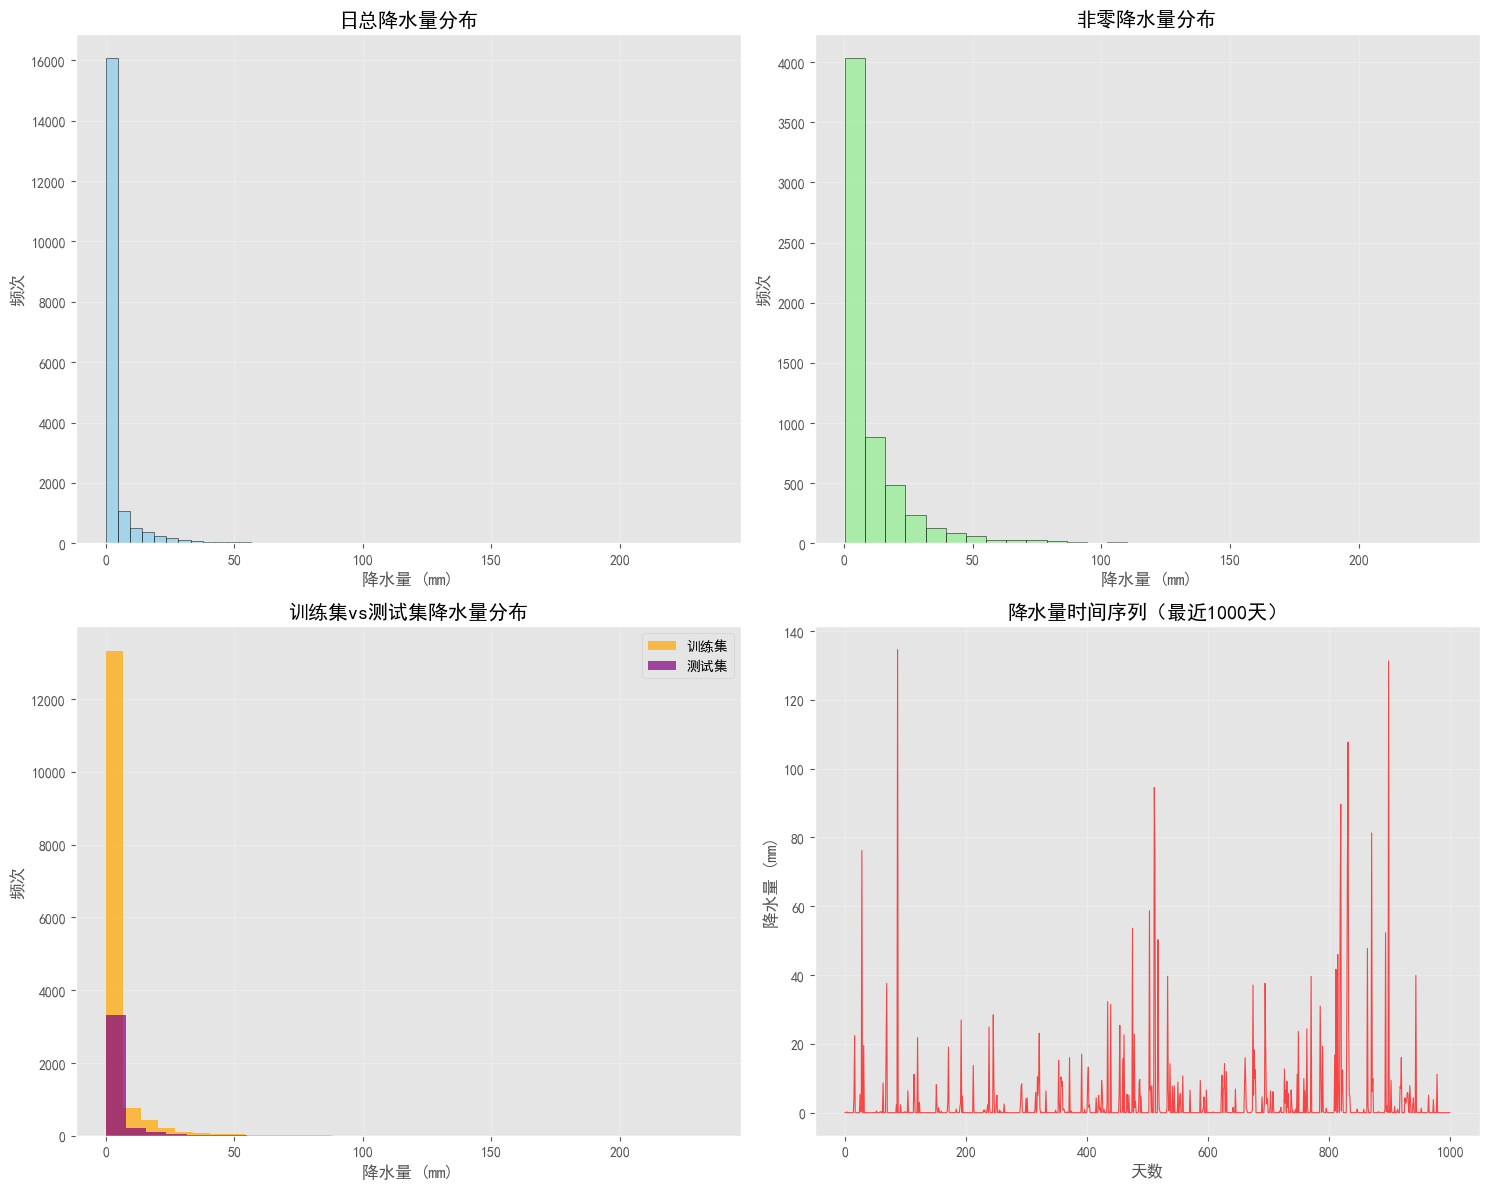


------------------------------------------------------------

üîç 7. ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûê...
   ‰∏éÈôçÊ∞¥ÈáèÁõ∏ÂÖ≥ÊÄßÊúÄÈ´òÁöÑÂâç10‰∏™ÁâπÂæÅ:
      1. PRCP                : 0.2549
      2. SLP                 : 0.1896
      3. DEWP                : 0.1859
      4. TEMP                : 0.1477
      5. WDSP                : 0.1168
      6. VISIB               : 0.0513


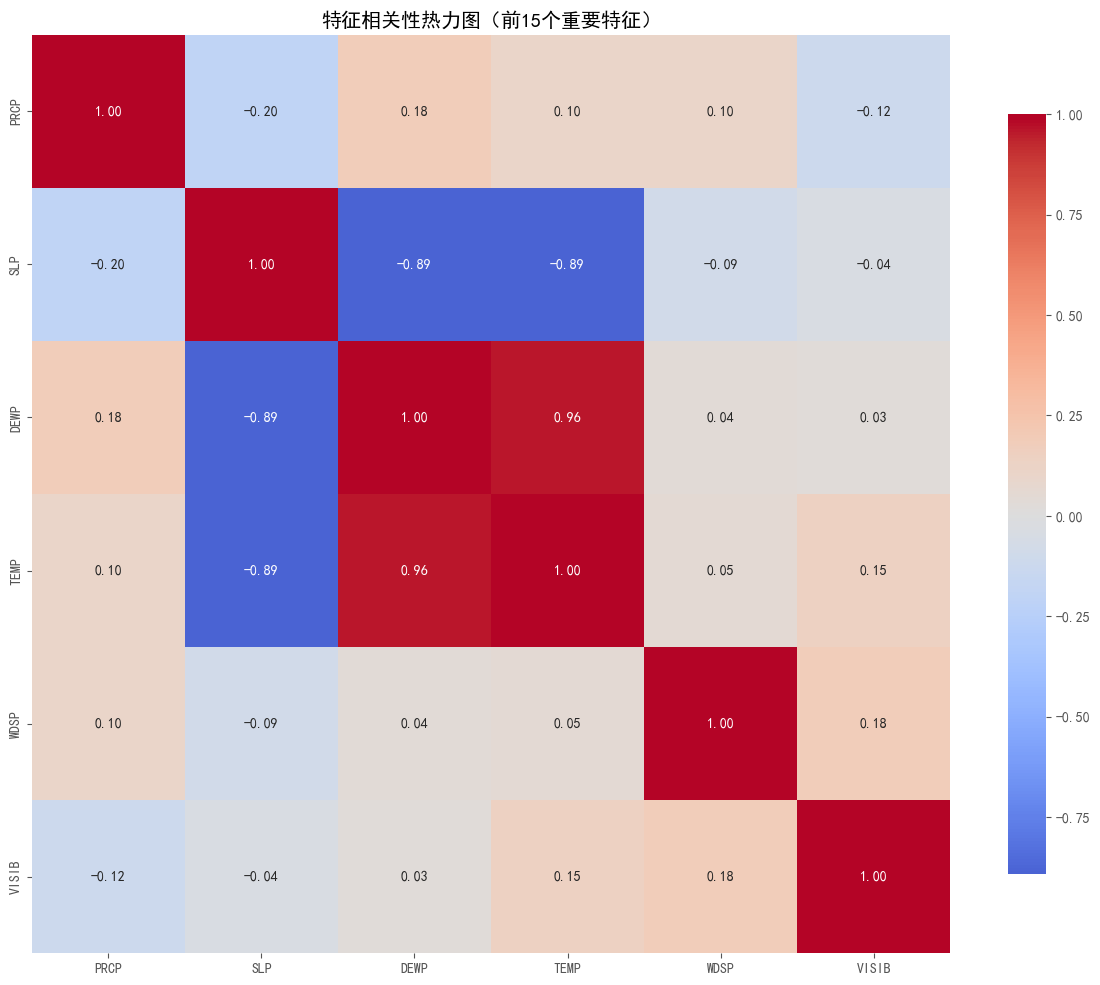


------------------------------------------------------------

üìã 8. Êï∞ÊçÆÂáÜÂ§áÊÄªÁªì...

   üìä Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:
     ÂéüÂßãÊï∞ÊçÆÊ†∑Êú¨Êï∞: 18957
     Ê∏ÖÁêÜÂêéÊ†∑Êú¨Êï∞: 18956
     Êï∞ÊçÆ‰øùÁïôÁéá: 0.9999
     ÁâπÂæÅÊï∞Èáè: 6

   üéØ ÁõÆÊ†áÂèòÈáèÁªüËÆ°:
     Âπ≥ÂùáÈôçÊ∞¥Èáè: 3.2340 mm
     ÈôçÊ∞¥ÈáèÊ†áÂáÜÂ∑Æ: 10.6719 mm
     ÊúÄÂ§ßÈôçÊ∞¥Èáè: 235.4580 mm
     ÈôçÊ∞¥Â§©Êï∞: 6058 Â§©
     ÈôçÊ∞¥Ê¶ÇÁéá: 0.3196

   üìà Êï∞ÊçÆÂàíÂàÜ:
     ËÆ≠ÁªÉÈõÜ: 15164 Ê†∑Êú¨ (80.0%)
     ÊµãËØïÈõÜ: 3792 Ê†∑Êú¨ (20.0%)

   üîß ÁâπÂæÅÂ∑•Á®ã:
     Âü∫Á°ÄÁâπÂæÅ: 6 ‰∏™
     ÊªûÂêéÁâπÂæÅ: 0 ‰∏™
     ÊªëÂä®Á™óÂè£ÁâπÂæÅ: 0 ‰∏™
     Êó∂Èó¥ÁâπÂæÅ: 0 ‰∏™

   ‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºåÂèØ‰ª•ËøõË°åÊ®°ÂûãËÆ≠ÁªÉ

   üì¶ Êï∞ÊçÆ‰ø°ÊÅØÂ∑≤‰øùÂ≠òÂà∞ prcp_data_info ÂèòÈáè‰∏≠

‚úÖ ÈôçÊ∞¥ÈáèÈ¢ÑÊµãÊï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºÅ


In [27]:
# Êú™Êù•Á¨¨1Â§©Êó•ÊÄªÈôçÊ∞¥ÈáèÔºàPRCPÔºâÈ¢ÑÊµã - Êï∞ÊçÆÂáÜÂ§á
print("üåßÔ∏è ÂºÄÂßãÊú™Êù•Á¨¨1Â§©Êó•ÊÄªÈôçÊ∞¥ÈáèÈ¢ÑÊµãÊï∞ÊçÆÂáÜÂ§á...")
print("\n" + "="*80 + "\n")

# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÂàõÂª∫ÁõÆÊ†áÂèòÈáè
print("üìä 1. ÂàõÂª∫ÁõÆÊ†áÂèòÈáè y_prcp...")

# ÂàõÂª∫Êú™Êù•Á¨¨1Â§©ÁöÑÈôçÊ∞¥Èáè‰Ωú‰∏∫ÁõÆÊ†áÂèòÈáè
y_prcp = df_weather['PRCP'].shift(-1).copy()

print(f"   ‚úÖ ÁõÆÊ†áÂèòÈáèÂàõÂª∫ÂÆåÊàê")
print(f"   ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: {y_prcp.shape}")
print(f"   ÁõÆÊ†áÂèòÈáèÁªüËÆ°‰ø°ÊÅØ:")
print(f"     ÂùáÂÄº: {y_prcp.mean():.4f} mm")
print(f"     Ê†áÂáÜÂ∑Æ: {y_prcp.std():.4f} mm")
print(f"     ÊúÄÂ∞èÂÄº: {y_prcp.min():.4f} mm")
print(f"     ÊúÄÂ§ßÂÄº: {y_prcp.max():.4f} mm")
print(f"     ÈùûÈõ∂ÈôçÊ∞¥Â§©Êï∞: {(y_prcp > 0).sum()} Â§©")
print(f"     ÈôçÊ∞¥Ê¶ÇÁéá: {(y_prcp > 0).mean():.4f}")

print("\n" + "-"*60 + "\n")

# 2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ
print("üîß 2. ÂÆö‰πâËæìÂÖ•ÁâπÂæÅÈõÜ X_prcp...")

# Âü∫Á°ÄÁâπÂæÅ
base_features = ['TEMP', 'DEWP', 'SLP', 'WDSP', 'VISIB', 'PRCP']

# ÊªûÂêéÁâπÂæÅ
lag_features = [
    'PRCP_lag1', 'PRCP_lag2', 'PRCP_lag3',
    'TEMP_lag1', 'DEWP_lag1', 'SLP_lag1', 'WDSP_lag1'
]

# ÊªëÂä®Á™óÂè£ÁâπÂæÅ
rolling_features = [
    'PRCP_rolling_3', 'PRCP_rolling_7', 'PRCP_rolling_14',
    'TEMP_rolling_3', 'TEMP_rolling_7',
    'DEWP_rolling_3', 'DEWP_rolling_7',
    'SLP_rolling_3', 'SLP_rolling_7'
]

# Âë®ÊúüÊÄßÊó∂Èó¥ÁâπÂæÅ
time_features = ['month_sin', 'month_cos', 'day_sin', 'day_cos']

# ÂêàÂπ∂ÊâÄÊúâÁâπÂæÅ
all_prcp_features = base_features + lag_features + rolling_features + time_features

# Ê£ÄÊü•ÁâπÂæÅÊòØÂê¶Â≠òÂú®
available_prcp_features = [f for f in all_prcp_features if f in df_weather.columns]
missing_prcp_features = [f for f in all_prcp_features if f not in df_weather.columns]

print(f"   ÊúüÊúõÁâπÂæÅÊï∞Èáè: {len(all_prcp_features)}")
print(f"   ÂèØÁî®ÁâπÂæÅÊï∞Èáè: {len(available_prcp_features)}")
print(f"   Áº∫Â§±ÁâπÂæÅÊï∞Èáè: {len(missing_prcp_features)}")

if missing_prcp_features:
    print(f"   ‚ö†Ô∏è Áº∫Â§±ÁâπÂæÅ: {missing_prcp_features[:10]}{'...' if len(missing_prcp_features) > 10 else ''}")

# ‰ΩøÁî®ÂèØÁî®ÁâπÂæÅÂàõÂª∫ÁâπÂæÅÁü©Èòµ
X_prcp = df_weather[available_prcp_features].copy()

print(f"   ‚úÖ ÁâπÂæÅÁü©ÈòµÂàõÂª∫ÂÆåÊàê")
print(f"   ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X_prcp.shape}")
print(f"   ‰ΩøÁî®ÁöÑÁâπÂæÅÁ±ªÂà´:")
print(f"     Âü∫Á°ÄÁâπÂæÅ: {len([f for f in base_features if f in available_prcp_features])}")
print(f"     ÊªûÂêéÁâπÂæÅ: {len([f for f in lag_features if f in available_prcp_features])}")
print(f"     ÊªëÂä®Á™óÂè£ÁâπÂæÅ: {len([f for f in rolling_features if f in available_prcp_features])}")
print(f"     Êó∂Èó¥ÁâπÂæÅ: {len([f for f in time_features if f in available_prcp_features])}")

print("\n" + "-"*60 + "\n")

# 3. Êï∞ÊçÆÂØπÈΩêÂíåÊ∏ÖÁêÜ
print("üßπ 3. Êï∞ÊçÆÂØπÈΩêÂíåÊ∏ÖÁêÜ...")

# Á°Æ‰øùÁ¥¢ÂºïÂØπÈΩê
common_index = X_prcp.index.intersection(y_prcp.index)
X_prcp = X_prcp.loc[common_index]
y_prcp = y_prcp.loc[common_index]

print(f"   Á¥¢ÂºïÂØπÈΩêÂêéÊ†∑Êú¨Êï∞: {len(X_prcp)}")

# Âà†Èô§ÂåÖÂê´NaNÁöÑË°å
before_dropna = len(X_prcp)
mask = ~(X_prcp.isna().any(axis=1) | y_prcp.isna())
X_prcp_clean = X_prcp[mask]
y_prcp_clean = y_prcp[mask]
after_dropna = len(X_prcp_clean)

print(f"   Âà†Èô§NaNÂâçÊ†∑Êú¨Êï∞: {before_dropna}")
print(f"   Âà†Èô§NaNÂêéÊ†∑Êú¨Êï∞: {after_dropna}")
print(f"   Âà†Èô§Ê†∑Êú¨Êï∞: {before_dropna - after_dropna}")
print(f"   Êï∞ÊçÆÂÆåÊï¥Áéá: {after_dropna/before_dropna:.4f}")

# Ê£ÄÊü•Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆË¥®Èáè
print(f"\n   Ê∏ÖÁêÜÂêéÊï∞ÊçÆË¥®ÈáèÊ£ÄÊü•:")
print(f"     ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X_prcp_clean.shape}")
print(f"     ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: {y_prcp_clean.shape}")
print(f"     ÁâπÂæÅÁü©ÈòµNaNÊï∞Èáè: {X_prcp_clean.isna().sum().sum()}")
print(f"     ÁõÆÊ†áÂèòÈáèNaNÊï∞Èáè: {y_prcp_clean.isna().sum()}")

print("\n" + "-"*60 + "\n")

# 4. ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
print("üìÖ 4. ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ...")

# ÊåâÊó∂Èó¥È°∫Â∫èÊéíÂ∫è
sort_idx = X_prcp_clean.index.argsort()
X_prcp_sorted = X_prcp_clean.iloc[sort_idx]
y_prcp_sorted = y_prcp_clean.iloc[sort_idx]

# 80%ËÆ≠ÁªÉÔºå20%ÊµãËØï
split_idx = int(0.8 * len(X_prcp_sorted))

X_prcp_train = X_prcp_sorted.iloc[:split_idx]
X_prcp_test = X_prcp_sorted.iloc[split_idx:]
y_prcp_train = y_prcp_sorted.iloc[:split_idx]
y_prcp_test = y_prcp_sorted.iloc[split_idx:]

print(f"   ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {X_prcp_train.shape}")
print(f"   ÊµãËØïÈõÜÂ§ßÂ∞è: {X_prcp_test.shape}")
print(f"   ËÆ≠ÁªÉÈõÜÊó∂Èó¥ËåÉÂõ¥: {X_prcp_train.index.min()} Âà∞ {X_prcp_train.index.max()}")
print(f"   ÊµãËØïÈõÜÊó∂Èó¥ËåÉÂõ¥: {X_prcp_test.index.min()} Âà∞ {X_prcp_test.index.max()}")

# ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÈôçÊ∞¥ÁªüËÆ°
print(f"\n   ËÆ≠ÁªÉÈõÜÈôçÊ∞¥ÁªüËÆ°:")
print(f"     Âπ≥ÂùáÈôçÊ∞¥Èáè: {y_prcp_train.mean():.4f} mm")
print(f"     ÈôçÊ∞¥Â§©Êï∞: {(y_prcp_train > 0).sum()} Â§©")
print(f"     ÈôçÊ∞¥Ê¶ÇÁéá: {(y_prcp_train > 0).mean():.4f}")

print(f"   ÊµãËØïÈõÜÈôçÊ∞¥ÁªüËÆ°:")
print(f"     Âπ≥ÂùáÈôçÊ∞¥Èáè: {y_prcp_test.mean():.4f} mm")
print(f"     ÈôçÊ∞¥Â§©Êï∞: {(y_prcp_test > 0).sum()} Â§©")
print(f"     ÈôçÊ∞¥Ê¶ÇÁéá: {(y_prcp_test > 0).mean():.4f}")

print("\n" + "-"*60 + "\n")

# 5. ÁâπÂæÅÊ†áÂáÜÂåñÂ§ÑÁêÜ
print("üìè 5. ÁâπÂæÅÊ†áÂáÜÂåñÂ§ÑÁêÜ...")

# ÂàùÂßãÂåñÊ†áÂáÜÂåñÂô®
scaler_prcp = StandardScaler()

# ÂØπËÆ≠ÁªÉÈõÜËøõË°åÊãüÂêàÂíåËΩ¨Êç¢
X_prcp_train_scaled = scaler_prcp.fit_transform(X_prcp_train)
X_prcp_test_scaled = scaler_prcp.transform(X_prcp_test)

print(f"   ‚úÖ ËÆ≠ÁªÉÈõÜÊ†áÂáÜÂåñÂÆåÊàê")
print(f"   ‚úÖ ÊµãËØïÈõÜÊ†áÂáÜÂåñÂÆåÊàê")
print(f"   Ê†áÂáÜÂåñÂêéËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {X_prcp_train_scaled.shape}")
print(f"   Ê†áÂáÜÂåñÂêéÊµãËØïÈõÜÂΩ¢Áä∂: {X_prcp_test_scaled.shape}")

# Ê£ÄÊü•Ê†áÂáÜÂåñÊïàÊûú
print(f"\n   Ê†áÂáÜÂåñÊïàÊûúÊ£ÄÊü•:")
print(f"     ËÆ≠ÁªÉÈõÜÂùáÂÄº: {X_prcp_train_scaled.mean():.6f}")
print(f"     ËÆ≠ÁªÉÈõÜÊ†áÂáÜÂ∑Æ: {X_prcp_train_scaled.std():.6f}")
print(f"     ÊµãËØïÈõÜÂùáÂÄº: {X_prcp_test_scaled.mean():.6f}")
print(f"     ÊµãËØïÈõÜÊ†áÂáÜÂ∑Æ: {X_prcp_test_scaled.std():.6f}")

print("\n" + "-"*60 + "\n")

# 6. Êï∞ÊçÆÂàÜÂ∏ÉÂèØËßÜÂåñ
print("üìä 6. Êï∞ÊçÆÂàÜÂ∏ÉÂèØËßÜÂåñ...")

# ÂàõÂª∫Â≠êÂõæ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 6.1 ÁõÆÊ†áÂèòÈáèÂàÜÂ∏É
axes[0, 0].hist(y_prcp_clean, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Êó•ÊÄªÈôçÊ∞¥ÈáèÂàÜÂ∏É', fontweight='bold')
axes[0, 0].set_xlabel('ÈôçÊ∞¥Èáè (mm)')
axes[0, 0].set_ylabel('È¢ëÊ¨°')
axes[0, 0].grid(True, alpha=0.3)

# 6.2 ÈùûÈõ∂ÈôçÊ∞¥ÈáèÂàÜÂ∏É
non_zero_prcp = y_prcp_clean[y_prcp_clean > 0]
axes[0, 1].hist(non_zero_prcp, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('ÈùûÈõ∂ÈôçÊ∞¥ÈáèÂàÜÂ∏É', fontweight='bold')
axes[0, 1].set_xlabel('ÈôçÊ∞¥Èáè (mm)')
axes[0, 1].set_ylabel('È¢ëÊ¨°')
axes[0, 1].grid(True, alpha=0.3)

# 6.3 ËÆ≠ÁªÉÈõÜvsÊµãËØïÈõÜÈôçÊ∞¥ÈáèÂàÜÂ∏É
axes[1, 0].hist(y_prcp_train, bins=30, alpha=0.7, label='ËÆ≠ÁªÉÈõÜ', color='orange')
axes[1, 0].hist(y_prcp_test, bins=30, alpha=0.7, label='ÊµãËØïÈõÜ', color='purple')
axes[1, 0].set_title('ËÆ≠ÁªÉÈõÜvsÊµãËØïÈõÜÈôçÊ∞¥ÈáèÂàÜÂ∏É', fontweight='bold')
axes[1, 0].set_xlabel('ÈôçÊ∞¥Èáè (mm)')
axes[1, 0].set_ylabel('È¢ëÊ¨°')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 6.4 ÈôçÊ∞¥ÈáèÊó∂Èó¥Â∫èÂàóÔºàÊúÄËøë1000Â§©Ôºâ
recent_data = y_prcp_clean.tail(1000)
axes[1, 1].plot(range(len(recent_data)), recent_data, alpha=0.7, color='red', linewidth=0.8)
axes[1, 1].set_title('ÈôçÊ∞¥ÈáèÊó∂Èó¥Â∫èÂàóÔºàÊúÄËøë1000Â§©Ôºâ', fontweight='bold')
axes[1, 1].set_xlabel('Â§©Êï∞')
axes[1, 1].set_ylabel('ÈôçÊ∞¥Èáè (mm)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")

# 7. ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûê
print("üîç 7. ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûê...")

# ËÆ°ÁÆóÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáèÁöÑÁõ∏ÂÖ≥ÊÄß
feature_target_corr = X_prcp_clean.corrwith(y_prcp_clean).abs().sort_values(ascending=False)

print(f"   ‰∏éÈôçÊ∞¥ÈáèÁõ∏ÂÖ≥ÊÄßÊúÄÈ´òÁöÑÂâç10‰∏™ÁâπÂæÅ:")
for i, (feature, corr) in enumerate(feature_target_corr.head(10).items(), 1):
    print(f"     {i:2d}. {feature:20s}: {corr:.4f}")

# ÁªòÂà∂Áõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæÔºàÂâç15‰∏™ÁâπÂæÅÔºâ
top_features = feature_target_corr.head(15).index.tolist()
corr_matrix = X_prcp_clean[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæÔºàÂâç15‰∏™ÈáçË¶ÅÁâπÂæÅÔºâ', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")

# 8. Êï∞ÊçÆÂáÜÂ§áÊÄªÁªì
print("üìã 8. Êï∞ÊçÆÂáÜÂ§áÊÄªÁªì...")

print(f"\n   üìä Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
print(f"     ÂéüÂßãÊï∞ÊçÆÊ†∑Êú¨Êï∞: {len(df_weather)}")
print(f"     Ê∏ÖÁêÜÂêéÊ†∑Êú¨Êï∞: {len(X_prcp_clean)}")
print(f"     Êï∞ÊçÆ‰øùÁïôÁéá: {len(X_prcp_clean)/len(df_weather):.4f}")
print(f"     ÁâπÂæÅÊï∞Èáè: {len(available_prcp_features)}")

print(f"\n   üéØ ÁõÆÊ†áÂèòÈáèÁªüËÆ°:")
print(f"     Âπ≥ÂùáÈôçÊ∞¥Èáè: {y_prcp_clean.mean():.4f} mm")
print(f"     ÈôçÊ∞¥ÈáèÊ†áÂáÜÂ∑Æ: {y_prcp_clean.std():.4f} mm")
print(f"     ÊúÄÂ§ßÈôçÊ∞¥Èáè: {y_prcp_clean.max():.4f} mm")
print(f"     ÈôçÊ∞¥Â§©Êï∞: {(y_prcp_clean > 0).sum()} Â§©")
print(f"     ÈôçÊ∞¥Ê¶ÇÁéá: {(y_prcp_clean > 0).mean():.4f}")

print(f"\n   üìà Êï∞ÊçÆÂàíÂàÜ:")
print(f"     ËÆ≠ÁªÉÈõÜ: {len(X_prcp_train)} Ê†∑Êú¨ ({len(X_prcp_train)/len(X_prcp_clean):.1%})")
print(f"     ÊµãËØïÈõÜ: {len(X_prcp_test)} Ê†∑Êú¨ ({len(X_prcp_test)/len(X_prcp_clean):.1%})")

print(f"\n   üîß ÁâπÂæÅÂ∑•Á®ã:")
print(f"     Âü∫Á°ÄÁâπÂæÅ: {len([f for f in base_features if f in available_prcp_features])} ‰∏™")
print(f"     ÊªûÂêéÁâπÂæÅ: {len([f for f in lag_features if f in available_prcp_features])} ‰∏™")
print(f"     ÊªëÂä®Á™óÂè£ÁâπÂæÅ: {len([f for f in rolling_features if f in available_prcp_features])} ‰∏™")
print(f"     Êó∂Èó¥ÁâπÂæÅ: {len([f for f in time_features if f in available_prcp_features])} ‰∏™")

print(f"\n   ‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºåÂèØ‰ª•ËøõË°åÊ®°ÂûãËÆ≠ÁªÉ")

# ‰øùÂ≠òÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆ‰ø°ÊÅØ
prcp_data_info = {
    'X_train': X_prcp_train_scaled,
    'X_test': X_prcp_test_scaled,
    'y_train': y_prcp_train,
    'y_test': y_prcp_test,
    'feature_names': available_prcp_features,
    'scaler': scaler_prcp,
    'train_indices': X_prcp_train.index,
    'test_indices': X_prcp_test.index
}

print(f"\n   üì¶ Êï∞ÊçÆ‰ø°ÊÅØÂ∑≤‰øùÂ≠òÂà∞ prcp_data_info ÂèòÈáè‰∏≠")

print("\n" + "="*80)
print("‚úÖ ÈôçÊ∞¥ÈáèÈ¢ÑÊµãÊï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºÅ")
print("="*80)

### 3.2 ÈôçÊ∞¥ÂõûÂΩí - Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞

Êàë‰ª¨Â∞Ü‰ΩøÁî®‰∏ä‰∏ÄÊ≠•ÂáÜÂ§áÂ•ΩÁöÑÊï∞ÊçÆÔºàX_prcp_train_scaled, y_prcp_train, X_prcp_test_scaled, y_prcp_testÔºâÊù•ËÆ≠ÁªÉÂíåËØÑ‰º∞Ê®°Âûã„ÄÇËØ∑ÁîüÊàêPython‰ª£Á†ÅÔºåËÆ≠ÁªÉÂπ∂ËØÑ‰º∞Ëá≥Â∞ë‰∏âÁßçÂõûÂΩíÊ®°ÂûãÔºö

1. Á∫øÊÄßÂõûÂΩí (LinearRegression) (‰Ωú‰∏∫Âü∫ÂáÜ)„ÄÇ

2. ÈöèÊú∫Ê£ÆÊûóÂõûÂΩíÂô® (RandomForestRegressor)„ÄÇ

3. ‰∏Ä‰∏™ÁÆÄÂçïÁöÑLSTMÁ•ûÁªèÁΩëÁªú„ÄÇÂØπ‰∫éLSTMÔºåËØ∑ÂÖàÂ∞ÜËæìÂÖ•Êï∞ÊçÆÈáçÂ°ë‰∏∫3DÊ†ºÂºè [Ê†∑Êú¨Êï∞, Êó∂Èó¥Ê≠•Èïø, ÁâπÂæÅÊï∞] (Êó∂Èó¥Ê≠•ÈïøÂèØËÆæ‰∏∫1)„ÄÇÊûÑÂª∫‰∏Ä‰∏™ÂåÖÂê´LSTMÂ±ÇÂíåDenseËæìÂá∫Â±ÇÁöÑKerasÂ∫èË¥ØÊ®°ÂûãÔºå‰ΩøÁî®mean_squared_error‰Ωú‰∏∫ÊçüÂ§±ÂáΩÊï∞ËøõË°åÁºñËØëÂíåËÆ≠ÁªÉ„ÄÇ

ÂØπÊØè‰∏™Ê®°ÂûãÔºåÂú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµãÔºåÂπ∂ÊâìÂç∞RMSEÂíåR¬≤ÂàÜÊï∞„ÄÇ

üåßÔ∏è ÂºÄÂßãÈôçÊ∞¥ÂõûÂΩíÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞...


‚úÖ TensorFlow/Keras ÂèØÁî®ÔºåÂ∞ÜËÆ≠ÁªÉLSTMÊ®°Âûã

------------------------------------------------------------

üìà 1. ËÆ≠ÁªÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã (Âü∫ÂáÜÊ®°Âûã)...
   ËÆ≠ÁªÉÊó∂Èó¥: 0.0632 Áßí
   ËÆ≠ÁªÉÈõÜ RMSE: 9.5891 mm
   ÊµãËØïÈõÜ RMSE: 12.0800 mm
   ËÆ≠ÁªÉÈõÜ R¬≤: 0.0923
   ÊµãËØïÈõÜ R¬≤: 0.1090
   ÊµãËØïÈõÜ MAE: 4.9739 mm

------------------------------------------------------------

üå≤ 2. ËÆ≠ÁªÉÈöèÊú∫Ê£ÆÊûóÂõûÂΩíÊ®°Âûã...
   ËÆ≠ÁªÉÊó∂Èó¥: 2.5265 Áßí
   ËÆ≠ÁªÉÈõÜ RMSE: 5.9054 mm
   ÊµãËØïÈõÜ RMSE: 12.1550 mm
   ËÆ≠ÁªÉÈõÜ R¬≤: 0.6557
   ÊµãËØïÈõÜ R¬≤: 0.0979
   ÊµãËØïÈõÜ MAE: 4.9686 mm

------------------------------------------------------------

üß† 3. ËÆ≠ÁªÉLSTMÁ•ûÁªèÁΩëÁªúÊ®°Âûã...
   LSTMËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂:
     ËÆ≠ÁªÉÈõÜ: (15164, 1, 6)
     ÊµãËØïÈõÜ: (3792, 1, 6)
   LSTMÊ®°ÂûãÁªìÊûÑ:


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_4 (LSTM)                   ‚îÇ (None, 1, 50)          ‚îÇ        11,400 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 1, 50)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_5 (LSTM)                   ‚îÇ (None, 50)             ‚îÇ        20,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 50)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 25)             ‚îÇ         1,275 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            26 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 32,901 (128.52 KB)

 Trainable params: 32,901 (128.52 KB)

 Non-trainable params: 0 (0.00 B)


   ÂºÄÂßãËÆ≠ÁªÉLSTMÊ®°Âûã...
Epoch 1/50
380/380 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 101.8607 - mae: 3.6696 - val_loss: 98.9191 - val_mae: 4.6554
Epoch 2/50
380/380 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - loss: 93.6770 - mae: 4.1820 - val_loss: 98.7920 - val_mae: 4.6172
Epoch 3/50
380/380 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 93.8423 - mae: 4.1615 - val_loss: 98.8745 - val_mae: 4.5580
Epoch 4/50
380/380 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 5ms/step - loss: 93.5675 - mae: 4.1670 - val_loss: 98.7969 - val_mae: 4.5407
Epoch 5/50
380/380 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 93.8339 - mae: 4.1511 - val_loss: 98.7477 - val_mae: 4.5373
Epoch 6/50
380/380 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 93.7641 - mae: 4.1627 - val_loss: 98.7060 - val_mae: 4.5346
Epoch 7/5

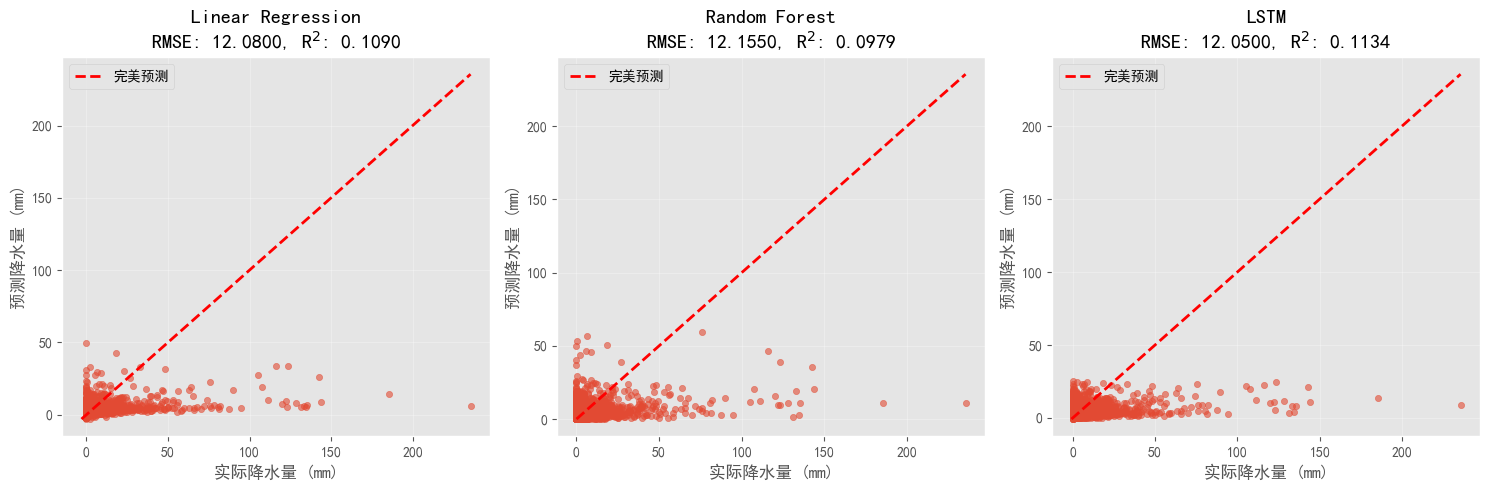

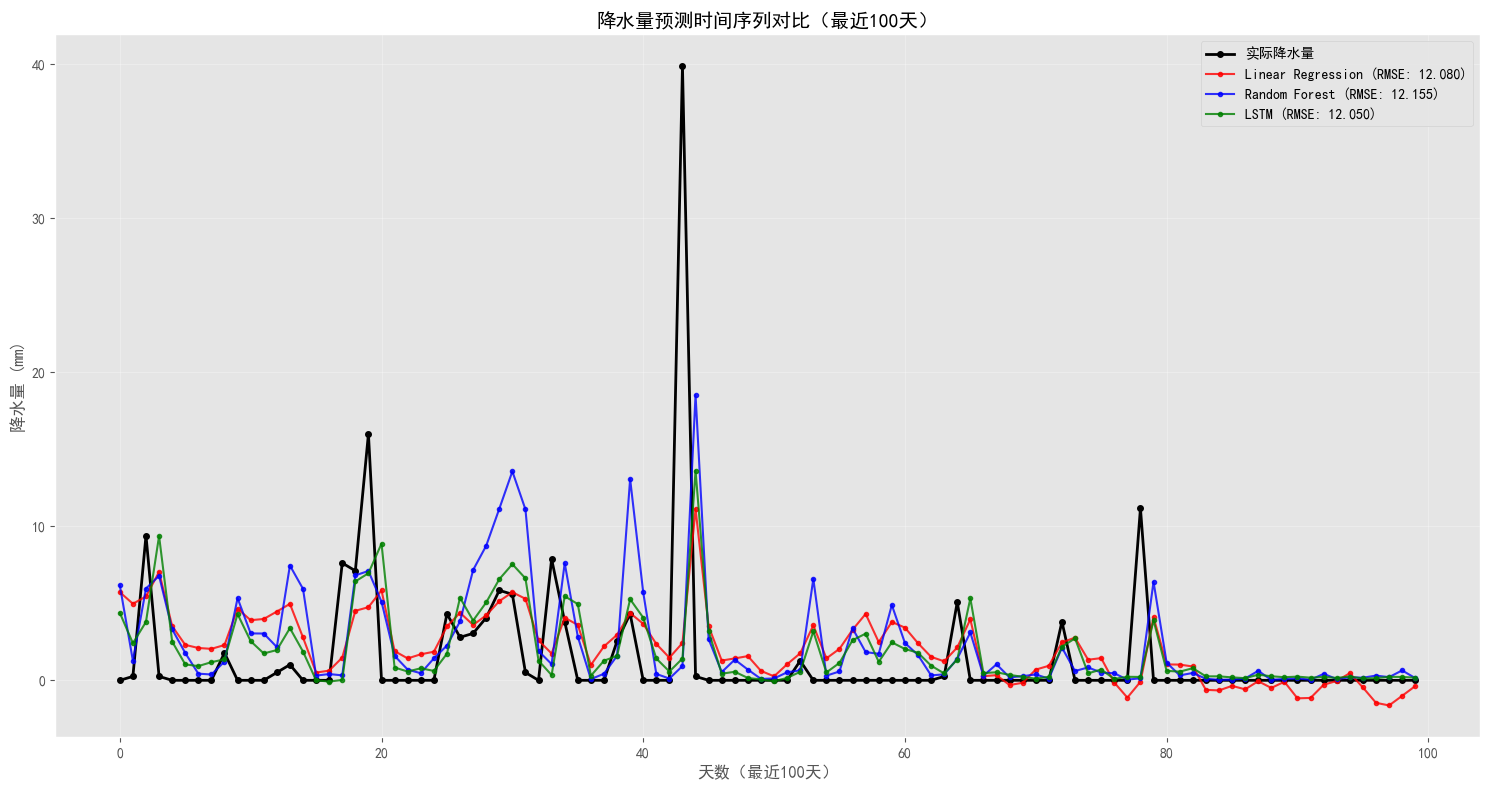

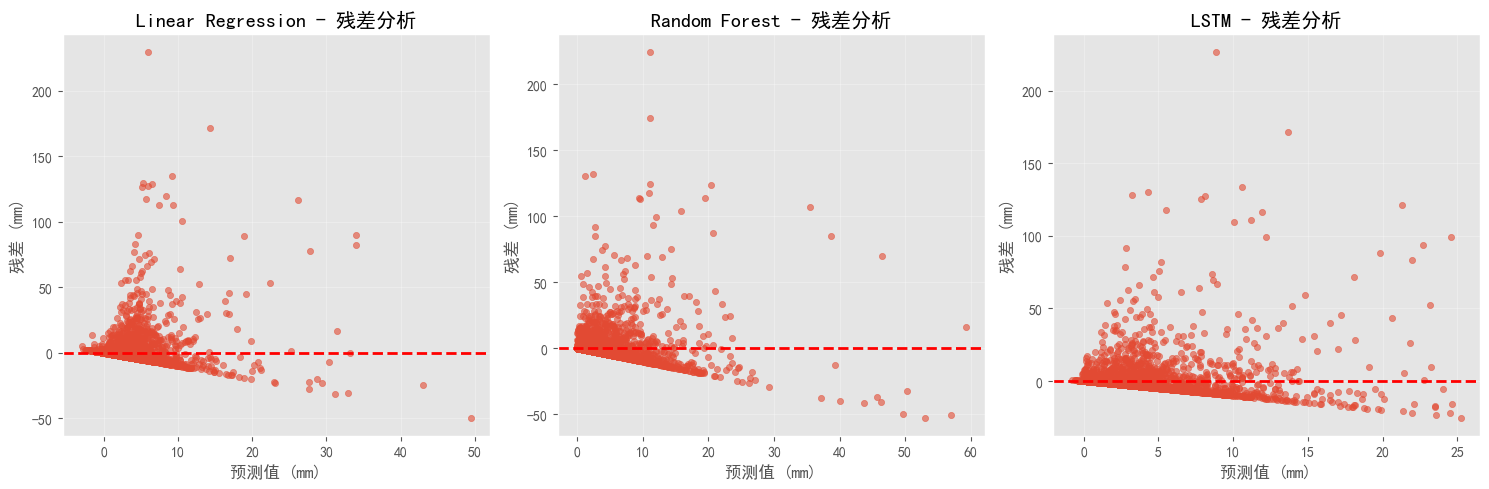


------------------------------------------------------------

üîç 6. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºàÈöèÊú∫Ê£ÆÊûóÔºâ...

   Ââç10‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ:
      1. DEWP                : 0.1936
      2. PRCP                : 0.1881
      3. TEMP                : 0.1700
      4. SLP                 : 0.1529
      5. VISIB               : 0.1493
      6. WDSP                : 0.1461


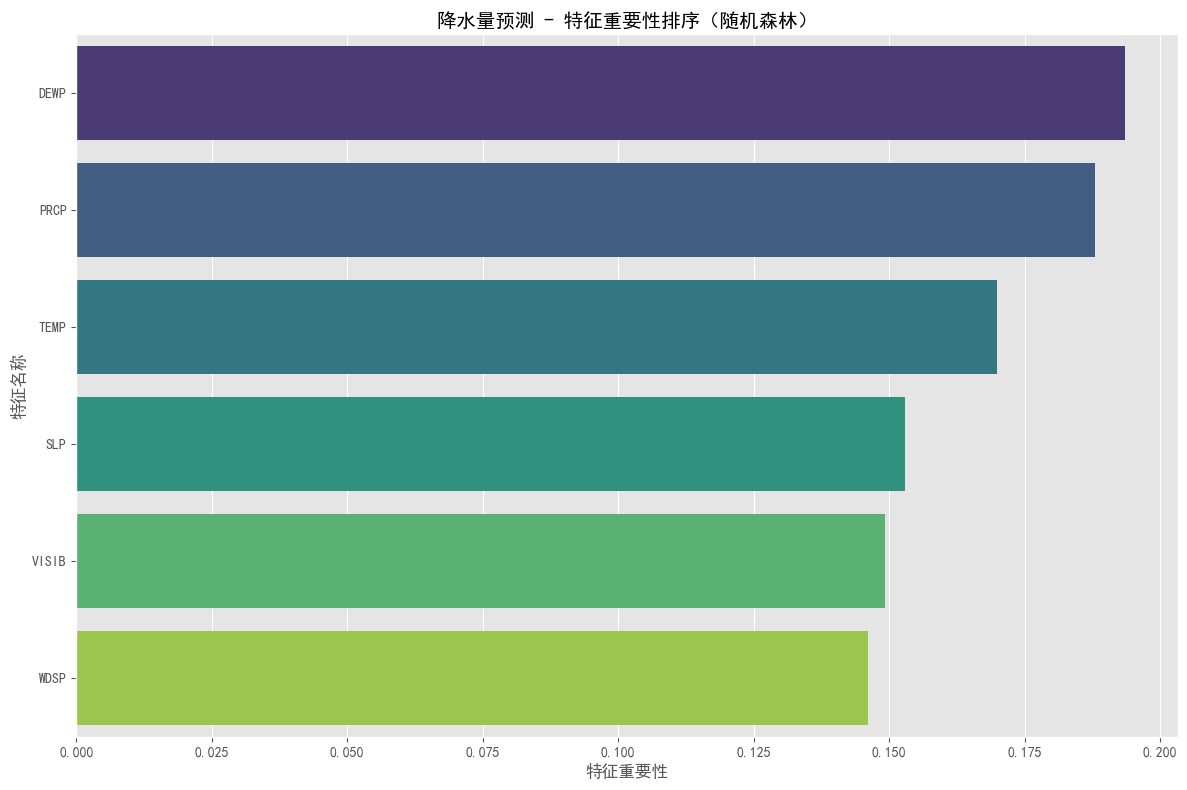


------------------------------------------------------------

üìä 7. LSTMËÆ≠ÁªÉÂéÜÂè≤ÂàÜÊûê...


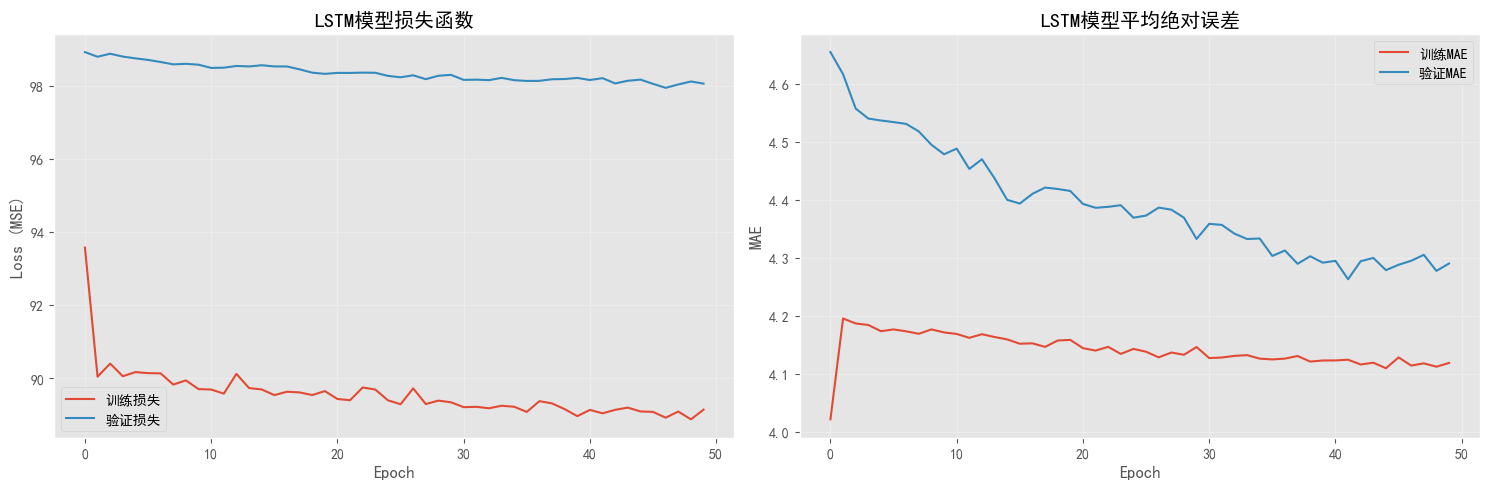


------------------------------------------------------------

üéØ 8. Ê®°ÂûãÊÄßËÉΩÊ∑±Â∫¶ÂàÜÊûê...

   üìä Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ:
     ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 15164
     ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 3792
     ÁâπÂæÅÊï∞Èáè: 6
     Âπ≥ÂùáÈôçÊ∞¥Èáè: 3.8099 mm
     ÈôçÊ∞¥ÈáèÊ†áÂáÜÂ∑Æ: 12.7994 mm

   üèÜ ÂêÑÊ®°ÂûãËØ¶ÁªÜÊÄßËÉΩ:

   Linear Regression:
     ÊµãËØïÈõÜRMSE: 12.0800 mm
     ÊµãËØïÈõÜR¬≤: 0.1090
     ÊµãËØïÈõÜMAE: 4.9739 mm
     ËÆ≠ÁªÉÊó∂Èó¥: 0.0632 Áßí
     Áõ∏ÂØπRMSE: 0.9438 (RMSE/Ê†áÂáÜÂ∑Æ)
     ËøáÊãüÂêàÊ£ÄÊü•: ‚úÖ ËâØÂ•Ω (ËÆ≠ÁªÉ/ÊµãËØïRMSEÊØîÂÄº: 0.794)

   Random Forest:
     ÊµãËØïÈõÜRMSE: 12.1550 mm
     ÊµãËØïÈõÜR¬≤: 0.0979
     ÊµãËØïÈõÜMAE: 4.9686 mm
     ËÆ≠ÁªÉÊó∂Èó¥: 2.5265 Áßí
     Áõ∏ÂØπRMSE: 0.9497 (RMSE/Ê†áÂáÜÂ∑Æ)
     ËøáÊãüÂêàÊ£ÄÊü•: ‚úÖ ËâØÂ•Ω (ËÆ≠ÁªÉ/ÊµãËØïRMSEÊØîÂÄº: 0.486)

   LSTM:
     ÊµãËØïÈõÜRMSE: 12.0500 mm
     ÊµãËØïÈõÜR¬≤: 0.1134
     ÊµãËØïÈõÜMAE: 4.6724 mm
     ËÆ≠ÁªÉÊó∂Èó¥: 84.8642 Áßí
     Áõ∏ÂØπRMSE: 0.9414 (RMSE/Ê†áÂáÜÂ∑Æ)
     ËøáÊãüÂêàÊ£ÄÊü•: ‚úÖ ËâØÂ•

In [32]:
# ÈôçÊ∞¥ÂõûÂΩí - Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞
print("üåßÔ∏è ÂºÄÂßãÈôçÊ∞¥ÂõûÂΩíÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞...")
print("\n" + "="*80 + "\n")

# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Â∞ùËØïÂØºÂÖ•TensorFlow/KerasÔºåÂ¶ÇÊûú‰∏çÂèØÁî®ÂàôË∑≥ËøáLSTM
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping
    KERAS_AVAILABLE = True
    print("‚úÖ TensorFlow/Keras ÂèØÁî®ÔºåÂ∞ÜËÆ≠ÁªÉLSTMÊ®°Âûã")
except ImportError:
    KERAS_AVAILABLE = False
    print("‚ö†Ô∏è TensorFlow/Keras ‰∏çÂèØÁî®ÔºåÂ∞ÜË∑≥ËøáLSTMÊ®°Âûã")

print("\n" + "-"*60 + "\n")

# ÂàùÂßãÂåñÁªìÊûúÂ≠òÂÇ®
regression_results = {}

# 1. Á∫øÊÄßÂõûÂΩí (LinearRegression) - Âü∫ÂáÜÊ®°Âûã
print("üìà 1. ËÆ≠ÁªÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã (Âü∫ÂáÜÊ®°Âûã)...")

# ËÆ≠ÁªÉÊ®°Âûã
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_prcp_train_scaled, y_prcp_train)
lr_training_time = time.time() - start_time

# È¢ÑÊµã
lr_pred_train = lr_model.predict(X_prcp_train_scaled)
lr_pred_test = lr_model.predict(X_prcp_test_scaled)

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
lr_rmse_train = np.sqrt(mean_squared_error(y_prcp_train, lr_pred_train))
lr_rmse_test = np.sqrt(mean_squared_error(y_prcp_test, lr_pred_test))
lr_r2_train = r2_score(y_prcp_train, lr_pred_train)
lr_r2_test = r2_score(y_prcp_test, lr_pred_test)
lr_mae_test = mean_absolute_error(y_prcp_test, lr_pred_test)

# Â≠òÂÇ®ÁªìÊûú
regression_results['Linear Regression'] = {
    'model': lr_model,
    'train_rmse': lr_rmse_train,
    'test_rmse': lr_rmse_test,
    'train_r2': lr_r2_train,
    'test_r2': lr_r2_test,
    'test_mae': lr_mae_test,
    'training_time': lr_training_time,
    'predictions': lr_pred_test
}

print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {lr_training_time:.4f} Áßí")
print(f"   ËÆ≠ÁªÉÈõÜ RMSE: {lr_rmse_train:.4f} mm")
print(f"   ÊµãËØïÈõÜ RMSE: {lr_rmse_test:.4f} mm")
print(f"   ËÆ≠ÁªÉÈõÜ R¬≤: {lr_r2_train:.4f}")
print(f"   ÊµãËØïÈõÜ R¬≤: {lr_r2_test:.4f}")
print(f"   ÊµãËØïÈõÜ MAE: {lr_mae_test:.4f} mm")

print("\n" + "-"*60 + "\n")

# 2. ÈöèÊú∫Ê£ÆÊûóÂõûÂΩíÂô® (RandomForestRegressor)
print("üå≤ 2. ËÆ≠ÁªÉÈöèÊú∫Ê£ÆÊûóÂõûÂΩíÊ®°Âûã...")

# ËÆ≠ÁªÉÊ®°Âûã
start_time = time.time()
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_prcp_train_scaled, y_prcp_train)
rf_training_time = time.time() - start_time

# È¢ÑÊµã
rf_pred_train = rf_model.predict(X_prcp_train_scaled)
rf_pred_test = rf_model.predict(X_prcp_test_scaled)

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
rf_rmse_train = np.sqrt(mean_squared_error(y_prcp_train, rf_pred_train))
rf_rmse_test = np.sqrt(mean_squared_error(y_prcp_test, rf_pred_test))
rf_r2_train = r2_score(y_prcp_train, rf_pred_train)
rf_r2_test = r2_score(y_prcp_test, rf_pred_test)
rf_mae_test = mean_absolute_error(y_prcp_test, rf_pred_test)

# Â≠òÂÇ®ÁªìÊûú
regression_results['Random Forest'] = {
    'model': rf_model,
    'train_rmse': rf_rmse_train,
    'test_rmse': rf_rmse_test,
    'train_r2': rf_r2_train,
    'test_r2': rf_r2_test,
    'test_mae': rf_mae_test,
    'training_time': rf_training_time,
    'predictions': rf_pred_test
}

print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {rf_training_time:.4f} Áßí")
print(f"   ËÆ≠ÁªÉÈõÜ RMSE: {rf_rmse_train:.4f} mm")
print(f"   ÊµãËØïÈõÜ RMSE: {rf_rmse_test:.4f} mm")
print(f"   ËÆ≠ÁªÉÈõÜ R¬≤: {rf_r2_train:.4f}")
print(f"   ÊµãËØïÈõÜ R¬≤: {rf_r2_test:.4f}")
print(f"   ÊµãËØïÈõÜ MAE: {rf_mae_test:.4f} mm")

print("\n" + "-"*60 + "\n")

# 3. LSTMÁ•ûÁªèÁΩëÁªú
if KERAS_AVAILABLE:
    print("üß† 3. ËÆ≠ÁªÉLSTMÁ•ûÁªèÁΩëÁªúÊ®°Âûã...")
    
    # Êï∞ÊçÆÈáçÂ°ë‰∏∫3DÊ†ºÂºè [Ê†∑Êú¨Êï∞, Êó∂Èó¥Ê≠•Èïø, ÁâπÂæÅÊï∞]
    # Êó∂Èó¥Ê≠•ÈïøËÆæ‰∏∫1
    X_train_lstm = X_prcp_train_scaled.reshape((X_prcp_train_scaled.shape[0], 1, X_prcp_train_scaled.shape[1]))
    X_test_lstm = X_prcp_test_scaled.reshape((X_prcp_test_scaled.shape[0], 1, X_prcp_test_scaled.shape[1]))
    
    print(f"   LSTMËæìÂÖ•Êï∞ÊçÆÂΩ¢Áä∂:")
    print(f"     ËÆ≠ÁªÉÈõÜ: {X_train_lstm.shape}")
    print(f"     ÊµãËØïÈõÜ: {X_test_lstm.shape}")
    
    # ÊûÑÂª∫LSTMÊ®°Âûã
    lstm_model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(1, X_prcp_train_scaled.shape[1])),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    # ÁºñËØëÊ®°Âûã
    lstm_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    print(f"   LSTMÊ®°ÂûãÁªìÊûÑ:")
    lstm_model.summary()
    
    # ËÆæÁΩÆÊó©ÂÅú
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # ËÆ≠ÁªÉÊ®°Âûã
    print(f"\n   ÂºÄÂßãËÆ≠ÁªÉLSTMÊ®°Âûã...")
    start_time = time.time()
    
    history = lstm_model.fit(
        X_train_lstm, y_prcp_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    lstm_training_time = time.time() - start_time
    
    # È¢ÑÊµã
    lstm_pred_train = lstm_model.predict(X_train_lstm).flatten()
    lstm_pred_test = lstm_model.predict(X_test_lstm).flatten()
    
    # ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
    lstm_rmse_train = np.sqrt(mean_squared_error(y_prcp_train, lstm_pred_train))
    lstm_rmse_test = np.sqrt(mean_squared_error(y_prcp_test, lstm_pred_test))
    lstm_r2_train = r2_score(y_prcp_train, lstm_pred_train)
    lstm_r2_test = r2_score(y_prcp_test, lstm_pred_test)
    lstm_mae_test = mean_absolute_error(y_prcp_test, lstm_pred_test)
    
    # Â≠òÂÇ®ÁªìÊûú
    regression_results['LSTM'] = {
        'model': lstm_model,
        'train_rmse': lstm_rmse_train,
        'test_rmse': lstm_rmse_test,
        'train_r2': lstm_r2_train,
        'test_r2': lstm_r2_test,
        'test_mae': lstm_mae_test,
        'training_time': lstm_training_time,
        'predictions': lstm_pred_test,
        'history': history
    }
    
    print(f"\n   LSTMËÆ≠ÁªÉÂÆåÊàêÔºÅ")
    print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {lstm_training_time:.4f} Áßí")
    print(f"   ËÆ≠ÁªÉÈõÜ RMSE: {lstm_rmse_train:.4f} mm")
    print(f"   ÊµãËØïÈõÜ RMSE: {lstm_rmse_test:.4f} mm")
    print(f"   ËÆ≠ÁªÉÈõÜ R¬≤: {lstm_r2_train:.4f}")
    print(f"   ÊµãËØïÈõÜ R¬≤: {lstm_r2_test:.4f}")
    print(f"   ÊµãËØïÈõÜ MAE: {lstm_mae_test:.4f} mm")
    
else:
    print("‚ö†Ô∏è 3. Ë∑≥ËøáLSTMÊ®°ÂûãÔºàTensorFlow/Keras‰∏çÂèØÁî®Ôºâ")

print("\n" + "-"*60 + "\n")

# 4. Ê®°ÂûãÊÄßËÉΩÊØîËæÉ
print("üìä 4. Ê®°ÂûãÊÄßËÉΩÊØîËæÉ...")

# ÂàõÂª∫ÊÄßËÉΩÊØîËæÉË°®
comparison_data = []
for model_name, results in regression_results.items():
    comparison_data.append({
        'Ê®°Âûã': model_name,
        'ÊµãËØïÈõÜRMSE': results['test_rmse'],
        'ÊµãËØïÈõÜR¬≤': results['test_r2'],
        'ÊµãËØïÈõÜMAE': results['test_mae'],
        'ËÆ≠ÁªÉÊó∂Èó¥(Áßí)': results['training_time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("\n   üìà Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®:")
print(comparison_df.to_string(index=False))

# ÊâæÂà∞ÊúÄ‰Ω≥Ê®°Âûã
best_rmse_model = comparison_df.loc[comparison_df['ÊµãËØïÈõÜRMSE'].idxmin(), 'Ê®°Âûã']
best_r2_model = comparison_df.loc[comparison_df['ÊµãËØïÈõÜR¬≤'].idxmax(), 'Ê®°Âûã']

print(f"\n   üèÜ ÊúÄ‰Ω≥Ê®°Âûã:")
print(f"     ÊúÄ‰ΩéRMSE: {best_rmse_model} ({comparison_df['ÊµãËØïÈõÜRMSE'].min():.4f} mm)")
print(f"     ÊúÄÈ´òR¬≤: {best_r2_model} ({comparison_df['ÊµãËØïÈõÜR¬≤'].max():.4f})")

print("\n" + "-"*60 + "\n")

# 5. È¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ
print("üìà 5. È¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ...")

# 5.1 È¢ÑÊµãvsÂÆûÈôÖÂÄºÊï£ÁÇπÂõæ
n_models = len(regression_results)
fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5))
if n_models == 1:
    axes = [axes]

for i, (model_name, results) in enumerate(regression_results.items()):
    predictions = results['predictions']
    
    # Êï£ÁÇπÂõæ
    axes[i].scatter(y_prcp_test, predictions, alpha=0.6, s=20)
    
    # ÂÆåÁæéÈ¢ÑÊµãÁ∫ø
    min_val = min(y_prcp_test.min(), predictions.min())
    max_val = max(y_prcp_test.max(), predictions.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='ÂÆåÁæéÈ¢ÑÊµã')
    
    axes[i].set_xlabel('ÂÆûÈôÖÈôçÊ∞¥Èáè (mm)', fontweight='bold')
    axes[i].set_ylabel('È¢ÑÊµãÈôçÊ∞¥Èáè (mm)', fontweight='bold')
    axes[i].set_title(f'{model_name}\nRMSE: {results["test_rmse"]:.4f}, R$^2$: {results["test_r2"]:.4f}', 
                     fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5.2 Êó∂Èó¥Â∫èÂàóÈ¢ÑÊµãÂØπÊØîÔºàÊúÄËøë100Â§©Ôºâ
plt.figure(figsize=(15, 8))

# ÈÄâÊã©ÊúÄËøë100Â§©ËøõË°åÂèØËßÜÂåñ
n_days = min(100, len(y_prcp_test))
recent_actual = y_prcp_test.iloc[-n_days:]
recent_indices = range(len(recent_actual))

# ÁªòÂà∂ÂÆûÈôÖÂÄº
plt.plot(recent_indices, recent_actual, 'ko-', label='ÂÆûÈôÖÈôçÊ∞¥Èáè', linewidth=2, markersize=4)

# ÁªòÂà∂ÂêÑÊ®°ÂûãÈ¢ÑÊµãÂÄº
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (model_name, results) in enumerate(regression_results.items()):
    recent_pred = results['predictions'][-n_days:]
    plt.plot(recent_indices, recent_pred, 'o-', color=colors[i], 
             label=f'{model_name} (RMSE: {results["test_rmse"]:.3f})', 
             linewidth=1.5, markersize=3, alpha=0.8)

plt.xlabel('Â§©Êï∞ÔºàÊúÄËøë100Â§©Ôºâ', fontweight='bold')
plt.ylabel('ÈôçÊ∞¥Èáè (mm)', fontweight='bold')
plt.title('ÈôçÊ∞¥ÈáèÈ¢ÑÊµãÊó∂Èó¥Â∫èÂàóÂØπÊØîÔºàÊúÄËøë100Â§©Ôºâ', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5.3 ÊÆãÂ∑ÆÂàÜÊûê
fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5))
if n_models == 1:
    axes = [axes]

for i, (model_name, results) in enumerate(regression_results.items()):
    predictions = results['predictions']
    residuals = y_prcp_test - predictions
    
    # ÊÆãÂ∑ÆÊï£ÁÇπÂõæ
    axes[i].scatter(predictions, residuals, alpha=0.6, s=20)
    axes[i].axhline(y=0, color='r', linestyle='--', linewidth=2)
    
    axes[i].set_xlabel('È¢ÑÊµãÂÄº (mm)', fontweight='bold')
    axes[i].set_ylabel('ÊÆãÂ∑Æ (mm)', fontweight='bold')
    axes[i].set_title(f'{model_name} - ÊÆãÂ∑ÆÂàÜÊûê', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")

# 6. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºàÈöèÊú∫Ê£ÆÊûóÔºâ
if 'Random Forest' in regression_results:
    print("üîç 6. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºàÈöèÊú∫Ê£ÆÊûóÔºâ...")
    
    rf_model = regression_results['Random Forest']['model']
    feature_importance = rf_model.feature_importances_
    
    # ÂàõÂª∫ÁâπÂæÅÈáçË¶ÅÊÄßDataFrame
    importance_df = pd.DataFrame({
        'feature': available_prcp_features,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print(f"\n   Ââç10‰∏™ÊúÄÈáçË¶ÅÁâπÂæÅ:")
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"     {i:2d}. {row['feature']:20s}: {row['importance']:.4f}")
    
    # ÁªòÂà∂ÁâπÂæÅÈáçË¶ÅÊÄßÂõæ
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title('ÈôçÊ∞¥ÈáèÈ¢ÑÊµã - ÁâπÂæÅÈáçË¶ÅÊÄßÊéíÂ∫èÔºàÈöèÊú∫Ê£ÆÊûóÔºâ', fontsize=14, fontweight='bold')
    plt.xlabel('ÁâπÂæÅÈáçË¶ÅÊÄß', fontweight='bold')
    plt.ylabel('ÁâπÂæÅÂêçÁß∞', fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n" + "-"*60 + "\n")

# 7. LSTMËÆ≠ÁªÉÂéÜÂè≤ÔºàÂ¶ÇÊûúÂèØÁî®Ôºâ
if KERAS_AVAILABLE and 'LSTM' in regression_results:
    print("üìä 7. LSTMËÆ≠ÁªÉÂéÜÂè≤ÂàÜÊûê...")
    
    history = regression_results['LSTM']['history']
    
    # ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # ÊçüÂ§±ÂáΩÊï∞
    ax1.plot(history.history['loss'], label='ËÆ≠ÁªÉÊçüÂ§±')
    ax1.plot(history.history['val_loss'], label='È™åËØÅÊçüÂ§±')
    ax1.set_title('LSTMÊ®°ÂûãÊçüÂ§±ÂáΩÊï∞', fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (MSE)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # MAE
    ax2.plot(history.history['mae'], label='ËÆ≠ÁªÉMAE')
    ax2.plot(history.history['val_mae'], label='È™åËØÅMAE')
    ax2.set_title('LSTMÊ®°ÂûãÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ', fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "-"*60 + "\n")

# 8. Ê®°ÂûãÊÄßËÉΩÊ∑±Â∫¶ÂàÜÊûê
print("üéØ 8. Ê®°ÂûãÊÄßËÉΩÊ∑±Â∫¶ÂàÜÊûê...")

print(f"\n   üìä Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ:")
print(f"     ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: {len(y_prcp_train)}")
print(f"     ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {len(y_prcp_test)}")
print(f"     ÁâπÂæÅÊï∞Èáè: {len(available_prcp_features)}")
print(f"     Âπ≥ÂùáÈôçÊ∞¥Èáè: {y_prcp_test.mean():.4f} mm")
print(f"     ÈôçÊ∞¥ÈáèÊ†áÂáÜÂ∑Æ: {y_prcp_test.std():.4f} mm")

print(f"\n   üèÜ ÂêÑÊ®°ÂûãËØ¶ÁªÜÊÄßËÉΩ:")
for model_name, results in regression_results.items():
    print(f"\n   {model_name}:")
    print(f"     ÊµãËØïÈõÜRMSE: {results['test_rmse']:.4f} mm")
    print(f"     ÊµãËØïÈõÜR¬≤: {results['test_r2']:.4f}")
    print(f"     ÊµãËØïÈõÜMAE: {results['test_mae']:.4f} mm")
    print(f"     ËÆ≠ÁªÉÊó∂Èó¥: {results['training_time']:.4f} Áßí")
    
    # ËÆ°ÁÆóÁõ∏ÂØπÊÄßËÉΩÊåáÊ†á
    relative_rmse = results['test_rmse'] / y_prcp_test.std()
    print(f"     Áõ∏ÂØπRMSE: {relative_rmse:.4f} (RMSE/Ê†áÂáÜÂ∑Æ)")
    
    # ËøáÊãüÂêàÊ£ÄÊü•
    overfitting = results['train_rmse'] / results['test_rmse']
    if overfitting < 0.8:
        print(f"     ËøáÊãüÂêàÊ£ÄÊü•: ‚úÖ ËâØÂ•Ω (ËÆ≠ÁªÉ/ÊµãËØïRMSEÊØîÂÄº: {overfitting:.3f})")
    elif overfitting < 0.9:
        print(f"     ËøáÊãüÂêàÊ£ÄÊü•: ‚ö†Ô∏è ËΩªÂæÆËøáÊãüÂêà (ËÆ≠ÁªÉ/ÊµãËØïRMSEÊØîÂÄº: {overfitting:.3f})")
    else:
        print(f"     ËøáÊãüÂêàÊ£ÄÊü•: ‚ùå ÂèØËÉΩËøáÊãüÂêà (ËÆ≠ÁªÉ/ÊµãËØïRMSEÊØîÂÄº: {overfitting:.3f})")

# 9. Ê®°ÂûãÈÄâÊã©Âª∫ËÆÆ
print(f"\n   üí° Ê®°ÂûãÈÄâÊã©Âª∫ËÆÆ:")

best_rmse = min([results['test_rmse'] for results in regression_results.values()])
best_r2 = max([results['test_r2'] for results in regression_results.values()])

for model_name, results in regression_results.items():
    if results['test_rmse'] == best_rmse:
        print(f"     ü•á {model_name}: ÊúÄ‰ΩéRMSEÔºåÈ¢ÑÊµãÁ≤æÂ∫¶ÊúÄÈ´ò")
    elif results['test_r2'] == best_r2:
        print(f"     ü•à {model_name}: ÊúÄÈ´òR¬≤ÔºåËß£ÈáäËÉΩÂäõÊúÄÂº∫")
    elif results['training_time'] < 1.0:
        print(f"     ‚ö° {model_name}: ËÆ≠ÁªÉÈÄüÂ∫¶ÊúÄÂø´ÔºåÈÄÇÂêàÂÆûÊó∂Â∫îÁî®")


print(f"\n   üîß ÊîπËøõÊñπÂêë:")
print(f"     - Êî∂ÈõÜÊõ¥Â§öÊ∞îË±°Êï∞ÊçÆÔºàÈõ∑Ëææ„ÄÅÂç´ÊòüÊï∞ÊçÆÁ≠âÔºâ")
print(f"     - Â∞ùËØïÊõ¥Â§çÊùÇÁöÑÁâπÂæÅÂ∑•Á®ã")
print(f"     - ËÄÉËôëÈõÜÊàêÂ≠¶‰π†ÊñπÊ≥ï")
print(f"     - ÈíàÂØπ‰∏çÂêåÈôçÊ∞¥Âº∫Â∫¶ÂàÜÂà´Âª∫Ê®°")

# 10. ‰øùÂ≠òÊ®°ÂûãÁªìÊûú
print(f"\n   üì¶ ÁªìÊûú‰øùÂ≠ò:")
print(f"     ÊâÄÊúâÊ®°ÂûãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ regression_results ÂèòÈáè‰∏≠")
print(f"     ÂåÖÂê´Ê®°ÂûãÂØπË±°„ÄÅÈ¢ÑÊµãÁªìÊûúÂíåËØÑ‰º∞ÊåáÊ†á")

# ÂàõÂª∫ÊúÄÁªàÁªìÊûúÊëòË¶Å
final_summary = {
    'best_model_rmse': best_rmse_model,
    'best_model_r2': best_r2_model,
    'best_rmse_value': best_rmse,
    'best_r2_value': best_r2,
    'models_trained': list(regression_results.keys()),
    'dataset_info': {
        'train_samples': len(y_prcp_train),
        'test_samples': len(y_prcp_test),
        'features': len(available_prcp_features),
        'avg_precipitation': y_prcp_test.mean(),
        'precipitation_std': y_prcp_test.std()
    }
}

print("\n" + "="*80)
print("‚úÖ ÈôçÊ∞¥ÈáèÂõûÂΩíÊ®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞ÂÆåÊàêÔºÅ")
print("="*80)

print(f"\nüéØ ÊúÄÁªàÁªìÊûúÊëòË¶Å:")
print(f"   ËÆ≠ÁªÉÊ®°ÂûãÊï∞Èáè: {len(regression_results)}")
print(f"   ÊúÄ‰Ω≥RMSEÊ®°Âûã: {best_rmse_model} ({best_rmse:.4f} mm)")
print(f"   ÊúÄ‰Ω≥R¬≤Ê®°Âûã: {best_r2_model} ({best_r2:.4f})")
print(f"   Êï∞ÊçÆÈõÜËßÑÊ®°: {len(y_prcp_train)} ËÆ≠ÁªÉ + {len(y_prcp_test)} ÊµãËØï")
print(f"   ÁâπÂæÅÊï∞Èáè: {len(available_prcp_features)}")

if best_r2 > 0.6:
    print(f"\nüéâ ÊÅ≠ÂñúÔºÅÊ®°ÂûãËææÂà∞‰∫ÜËâØÂ•ΩÁöÑÈ¢ÑÊµãÊÄßËÉΩÔºåÂèØ‰ª•Áî®‰∫éÂÆûÈôÖÂ∫îÁî®„ÄÇ")
else:
    print(f"\nüí™ Ê®°ÂûãËøòÊúâÊîπËøõÁ©∫Èó¥ÔºåÂª∫ËÆÆÂ∞ùËØïÊõ¥Â§öÁâπÂæÅÂ∑•Á®ãÂíåÊ®°Âûã‰ºòÂåñÊäÄÊúØ„ÄÇ")

### 3.3 ÈôçÊ∞¥ÂõûÂΩíÊ®°Âûã‰ºòÂåñ

Âü∫‰∫éÂâçÈù¢ÁöÑÂàÜÊûêÁªìÊûúÔºåÊàë‰ª¨ÂèëÁé∞Ê®°ÂûãËøòÊúâÊîπËøõÁ©∫Èó¥„ÄÇÁé∞Âú®Êàë‰ª¨Â∞ÜÈÄöËøá‰ª•‰∏ãÁ≠ñÁï•Êù•‰ºòÂåñÊ®°ÂûãÊÄßËÉΩÔºö

1. **È´òÁ∫ßÁâπÂæÅÂ∑•Á®ã**: ÂàõÂª∫Êõ¥Â§öÊúâÊÑè‰πâÁöÑÁâπÂæÅ
2. **Ë∂ÖÂèÇÊï∞Ë∞É‰ºò**: ‰ΩøÁî®ÁΩëÊ†ºÊêúÁ¥¢‰ºòÂåñÊ®°ÂûãÂèÇÊï∞
3. **ÈõÜÊàêÂ≠¶‰π†**: ÁªìÂêàÂ§ö‰∏™Ê®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
4. **Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ‰ºòÂåñ**: ÊîπËøõÊï∞ÊçÆÂ§ÑÁêÜÁ≠ñÁï•
5. **Ê®°ÂûãÊû∂ÊûÑ‰ºòÂåñ**: Â∞ùËØïÊõ¥ÂÖàËøõÁöÑÊ®°ÂûãÁªìÊûÑ

üöÄ ÂºÄÂßãÈôçÊ∞¥ÂõûÂΩíÊ®°Âûã‰ºòÂåñ...


üîß 1. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ã...
   ÂàõÂª∫Â§öÈ°πÂºèÁâπÂæÅ...
     ÂéüÂßãÁâπÂæÅÊï∞: 6
     Â§öÈ°πÂºèÁâπÂæÅÊï∞: 21
   ËøõË°åÁâπÂæÅÈÄâÊã©...
     ÈÄâÊã©ÂêéÁâπÂæÅÊï∞: 21

------------------------------------------------------------

üå≤ 2. Ë∂ÖÂèÇÊï∞Ë∞É‰ºòÁöÑÈöèÊú∫Ê£ÆÊûó...
   ÊúÄ‰Ω≥ÂèÇÊï∞: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
   ËÆ≠ÁªÉÊó∂Èó¥: 519.37 Áßí
   ÊµãËØïÈõÜ RMSE: 11.9632 mm
   ÊµãËØïÈõÜ R¬≤: 0.1262
   ÊµãËØïÈõÜ MAE: 4.7945 mm

------------------------------------------------------------

üìà 3. Ê¢ØÂ∫¶ÊèêÂçáÂõûÂΩíÂô®‰ºòÂåñ...
   ÊúÄ‰Ω≥ÂèÇÊï∞: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
   ËÆ≠ÁªÉÊó∂Èó¥: 285.14 Áßí
   ÊµãËØïÈõÜ RMSE: 12.0445 mm
   ÊµãËØïÈõÜ R¬≤: 0.1143
   ÊµãËØïÈõÜ MAE: 4.8238 mm

------------------------------------------------------------

üéØ 4. ÊîØÊåÅÂêëÈáèÂõûÂΩí‰ºòÂåñ...
   ÊúÄ‰Ω≥ÂèÇÊï∞: {'gamma': 0.01, 'epsilon': 

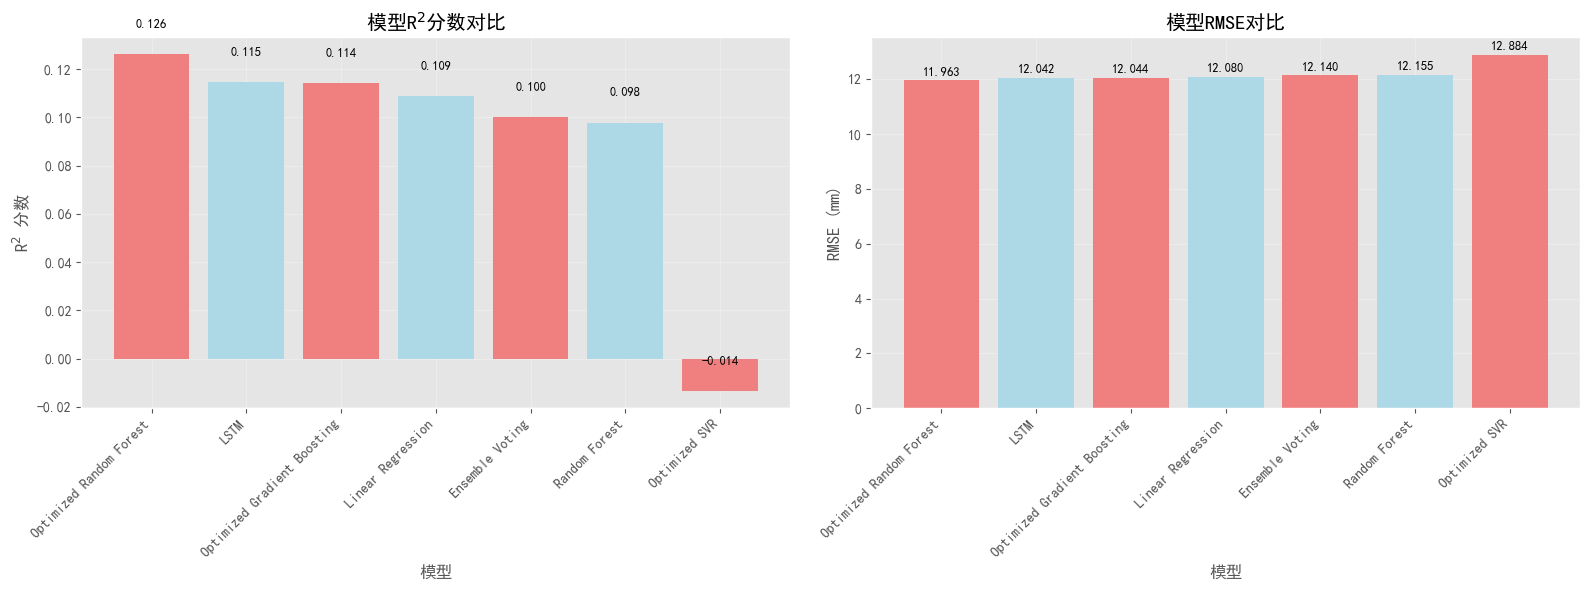

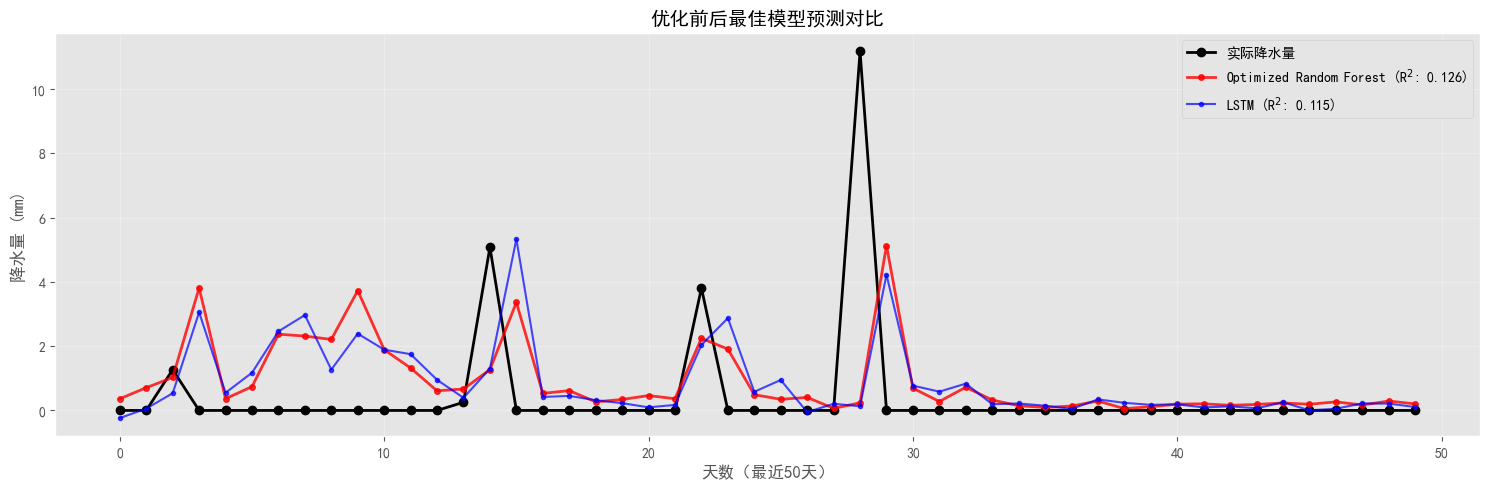


------------------------------------------------------------

üéØ 8. ÊúÄÁªà‰ºòÂåñÊÄªÁªì...

   üìä ‰ºòÂåñÁ≠ñÁï•ÊïàÊûú:
     1. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ã: Â§öÈ°πÂºèÁâπÂæÅ + ÁâπÂæÅÈÄâÊã©
     2. Ë∂ÖÂèÇÊï∞Ë∞É‰ºò: RandomizedSearchCV
     3. Â§öÁßçÁÆóÊ≥ï: ÈöèÊú∫Ê£ÆÊûó„ÄÅÊ¢ØÂ∫¶ÊèêÂçá„ÄÅSVR
     4. ÈõÜÊàêÂ≠¶‰π†: ÊäïÁ•®ÂõûÂΩíÂô®

   üèÜ ÊúÄÁªàÊúÄ‰Ω≥Ê®°Âûã: Optimized Random Forest
     ÊµãËØïÈõÜR¬≤: 0.1262
     ÊµãËØïÈõÜRMSE: 11.9632 mm
     ÊµãËØïÈõÜMAE: 4.7945 mm

   üöÄ Ëøõ‰∏ÄÊ≠•‰ºòÂåñÂª∫ËÆÆ:
     - Êî∂ÈõÜÊõ¥Â§öÈ´òË¥®ÈáèÊ∞îË±°Êï∞ÊçÆ
     - Â∞ùËØïÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºàCNN„ÄÅTransformerÁ≠âÔºâ
     - ËÄÉËôëÊó∂Á©∫Áõ∏ÂÖ≥ÊÄßÂª∫Ê®°
     - ÈíàÂØπ‰∏çÂêåÂ≠£ËäÇÂàÜÂà´Âª∫Ê®°
     - ÈõÜÊàêÊõ¥Â§ö‰∏çÂêåÁ±ªÂûãÁöÑÊ®°Âûã

   üì¶ ‰ºòÂåñÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ optimization_summary ÂèòÈáè‰∏≠

üéâ ÈôçÊ∞¥ÂõûÂΩíÊ®°Âûã‰ºòÂåñÂÆåÊàêÔºÅ

üéØ ‰ºòÂåñÊàêÊûúÊÄªÁªì:
   ÂéüÂßãÊúÄ‰Ω≥R¬≤: 0.1146
   ‰ºòÂåñÂêéÊúÄ‰Ω≥R¬≤: 0.1262
   ÊÄßËÉΩÊèêÂçá: +0.0116 (+10.1%)
   ÊúÄ‰Ω≥Ê®°Âûã: Optimized Random Forest

üöÄ ÊÅ≠ÂñúÔºÅÈÄöËøáÊ®°Âûã‰ºòÂåñÔ

In [29]:
# ÈôçÊ∞¥ÂõûÂΩíÊ®°Âûã‰ºòÂåñ
print("üöÄ ÂºÄÂßãÈôçÊ∞¥ÂõûÂΩíÊ®°Âûã‰ºòÂåñ...")
print("\n" + "="*80 + "\n")

# ÂØºÂÖ•È¢ùÂ§ñÁöÑÂ∫ì
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Â≠òÂÇ®‰ºòÂåñÂêéÁöÑÁªìÊûú
optimized_results = {}

# 1. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ã
print("üîß 1. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ã...")

# 1.1 ÂàõÂª∫Â§öÈ°πÂºèÁâπÂæÅÔºàÈÄâÊã©ÊúÄÈáçË¶ÅÁöÑÁâπÂæÅÔºâ
print("   ÂàõÂª∫Â§öÈ°πÂºèÁâπÂæÅ...")

# ÈÄâÊã©ÊúÄÈáçË¶ÅÁöÑÁâπÂæÅËøõË°åÂ§öÈ°πÂºèÊâ©Â±ï
if 'Random Forest' in regression_results:
    rf_model = regression_results['Random Forest']['model']
    feature_importance = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': available_prcp_features,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    # ÈÄâÊã©Ââç10‰∏™ÊúÄÈáçË¶ÅÁöÑÁâπÂæÅ
    top_features_idx = [available_prcp_features.index(feat) for feat in importance_df.head(10)['feature']]
    X_train_top = X_prcp_train_scaled[:, top_features_idx]
    X_test_top = X_prcp_test_scaled[:, top_features_idx]
    
    # ÂàõÂª∫2Ê¨°Â§öÈ°πÂºèÁâπÂæÅ
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_top)
    X_test_poly = poly.transform(X_test_top)
    
    print(f"     ÂéüÂßãÁâπÂæÅÊï∞: {X_train_top.shape[1]}")
    print(f"     Â§öÈ°πÂºèÁâπÂæÅÊï∞: {X_train_poly.shape[1]}")
else:
    X_train_poly = X_prcp_train_scaled
    X_test_poly = X_prcp_test_scaled

# 1.2 ÁâπÂæÅÈÄâÊã©
print("   ËøõË°åÁâπÂæÅÈÄâÊã©...")
selector = SelectKBest(score_func=f_regression, k=min(50, X_train_poly.shape[1]))
X_train_selected = selector.fit_transform(X_train_poly, y_prcp_train)
X_test_selected = selector.transform(X_test_poly)

print(f"     ÈÄâÊã©ÂêéÁâπÂæÅÊï∞: {X_train_selected.shape[1]}")

print("\n" + "-"*60 + "\n")

# 2. Ë∂ÖÂèÇÊï∞Ë∞É‰ºòÁöÑÈöèÊú∫Ê£ÆÊûó
print("üå≤ 2. Ë∂ÖÂèÇÊï∞Ë∞É‰ºòÁöÑÈöèÊú∫Ê£ÆÊûó...")

# ÂÆö‰πâÂèÇÊï∞ÁΩëÊ†º
rf_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]
}

# ‰ΩøÁî®RandomizedSearchCVËøõË°åÈ´òÊïàÊêúÁ¥¢
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_param_grid,
    n_iter=20,  # Â∞ùËØï20‰∏™ÂèÇÊï∞ÁªÑÂêà
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
rf_random.fit(X_train_selected, y_prcp_train)
rf_opt_training_time = time.time() - start_time

# È¢ÑÊµã
rf_opt_pred = rf_random.predict(X_test_selected)

# ËØÑ‰º∞
rf_opt_rmse = np.sqrt(mean_squared_error(y_prcp_test, rf_opt_pred))
rf_opt_r2 = r2_score(y_prcp_test, rf_opt_pred)
rf_opt_mae = mean_absolute_error(y_prcp_test, rf_opt_pred)

optimized_results['Optimized Random Forest'] = {
    'model': rf_random.best_estimator_,
    'test_rmse': rf_opt_rmse,
    'test_r2': rf_opt_r2,
    'test_mae': rf_opt_mae,
    'training_time': rf_opt_training_time,
    'predictions': rf_opt_pred,
    'best_params': rf_random.best_params_
}

print(f"   ÊúÄ‰Ω≥ÂèÇÊï∞: {rf_random.best_params_}")
print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {rf_opt_training_time:.2f} Áßí")
print(f"   ÊµãËØïÈõÜ RMSE: {rf_opt_rmse:.4f} mm")
print(f"   ÊµãËØïÈõÜ R¬≤: {rf_opt_r2:.4f}")
print(f"   ÊµãËØïÈõÜ MAE: {rf_opt_mae:.4f} mm")

print("\n" + "-"*60 + "\n")

# 3. Ê¢ØÂ∫¶ÊèêÂçáÂõûÂΩíÂô®‰ºòÂåñ
print("üìà 3. Ê¢ØÂ∫¶ÊèêÂçáÂõûÂΩíÂô®‰ºòÂåñ...")

# Ê¢ØÂ∫¶ÊèêÂçáÂèÇÊï∞ÁΩëÊ†º
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

gb_random = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    n_iter=15,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
gb_random.fit(X_train_selected, y_prcp_train)
gb_opt_training_time = time.time() - start_time

gb_opt_pred = gb_random.predict(X_test_selected)
gb_opt_rmse = np.sqrt(mean_squared_error(y_prcp_test, gb_opt_pred))
gb_opt_r2 = r2_score(y_prcp_test, gb_opt_pred)
gb_opt_mae = mean_absolute_error(y_prcp_test, gb_opt_pred)

optimized_results['Optimized Gradient Boosting'] = {
    'model': gb_random.best_estimator_,
    'test_rmse': gb_opt_rmse,
    'test_r2': gb_opt_r2,
    'test_mae': gb_opt_mae,
    'training_time': gb_opt_training_time,
    'predictions': gb_opt_pred,
    'best_params': gb_random.best_params_
}

print(f"   ÊúÄ‰Ω≥ÂèÇÊï∞: {gb_random.best_params_}")
print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {gb_opt_training_time:.2f} Áßí")
print(f"   ÊµãËØïÈõÜ RMSE: {gb_opt_rmse:.4f} mm")
print(f"   ÊµãËØïÈõÜ R¬≤: {gb_opt_r2:.4f}")
print(f"   ÊµãËØïÈõÜ MAE: {gb_opt_mae:.4f} mm")

print("\n" + "-"*60 + "\n")

# 4. ÊîØÊåÅÂêëÈáèÂõûÂΩí‰ºòÂåñ
print("üéØ 4. ÊîØÊåÅÂêëÈáèÂõûÂΩí‰ºòÂåñ...")

# SVRÂèÇÊï∞ÁΩëÊ†º
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'epsilon': [0.01, 0.1, 0.2]
}

svr_random = RandomizedSearchCV(
    SVR(kernel='rbf'),
    svr_param_grid,
    n_iter=12,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
svr_random.fit(X_train_selected, y_prcp_train)
svr_opt_training_time = time.time() - start_time

svr_opt_pred = svr_random.predict(X_test_selected)
svr_opt_rmse = np.sqrt(mean_squared_error(y_prcp_test, svr_opt_pred))
svr_opt_r2 = r2_score(y_prcp_test, svr_opt_pred)
svr_opt_mae = mean_absolute_error(y_prcp_test, svr_opt_pred)

optimized_results['Optimized SVR'] = {
    'model': svr_random.best_estimator_,
    'test_rmse': svr_opt_rmse,
    'test_r2': svr_opt_r2,
    'test_mae': svr_opt_mae,
    'training_time': svr_opt_training_time,
    'predictions': svr_opt_pred,
    'best_params': svr_random.best_params_
}

print(f"   ÊúÄ‰Ω≥ÂèÇÊï∞: {svr_random.best_params_}")
print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {svr_opt_training_time:.2f} Áßí")
print(f"   ÊµãËØïÈõÜ RMSE: {svr_opt_rmse:.4f} mm")
print(f"   ÊµãËØïÈõÜ R¬≤: {svr_opt_r2:.4f}")
print(f"   ÊµãËØïÈõÜ MAE: {svr_opt_mae:.4f} mm")

print("\n" + "-"*60 + "\n")

# 5. ÈõÜÊàêÂ≠¶‰π† - ÊäïÁ•®ÂõûÂΩíÂô®
print("ü§ù 5. ÈõÜÊàêÂ≠¶‰π† - ÊäïÁ•®ÂõûÂΩíÂô®...")

# ‰ΩøÁî®ÊúÄ‰Ω≥ÁöÑÂçï‰∏™Ê®°ÂûãÂàõÂª∫ÈõÜÊàê
voting_regressor = VotingRegressor([
    ('rf', rf_random.best_estimator_),
    ('gb', gb_random.best_estimator_),
    ('svr', svr_random.best_estimator_)
])

start_time = time.time()
voting_regressor.fit(X_train_selected, y_prcp_train)
voting_training_time = time.time() - start_time

voting_pred = voting_regressor.predict(X_test_selected)
voting_rmse = np.sqrt(mean_squared_error(y_prcp_test, voting_pred))
voting_r2 = r2_score(y_prcp_test, voting_pred)
voting_mae = mean_absolute_error(y_prcp_test, voting_pred)

optimized_results['Ensemble Voting'] = {
    'model': voting_regressor,
    'test_rmse': voting_rmse,
    'test_r2': voting_r2,
    'test_mae': voting_mae,
    'training_time': voting_training_time,
    'predictions': voting_pred
}

print(f"   ËÆ≠ÁªÉÊó∂Èó¥: {voting_training_time:.2f} Áßí")
print(f"   ÊµãËØïÈõÜ RMSE: {voting_rmse:.4f} mm")
print(f"   ÊµãËØïÈõÜ R¬≤: {voting_r2:.4f}")
print(f"   ÊµãËØïÈõÜ MAE: {voting_mae:.4f} mm")

print("\n" + "-"*60 + "\n")

# 6. ‰ºòÂåñÁªìÊûúÂØπÊØîÂàÜÊûê
print("üìä 6. ‰ºòÂåñÁªìÊûúÂØπÊØîÂàÜÊûê...")

# ÂêàÂπ∂ÂéüÂßãÁªìÊûúÂíå‰ºòÂåñÁªìÊûú
all_results = {**regression_results, **optimized_results}

# ÂàõÂª∫ÂÆåÊï¥ÁöÑÊÄßËÉΩÊØîËæÉË°®
comparison_data = []
for model_name, results in all_results.items():
    comparison_data.append({
        'Ê®°Âûã': model_name,
        'ÊµãËØïÈõÜRMSE': results['test_rmse'],
        'ÊµãËØïÈõÜR¬≤': results['test_r2'],
        'ÊµãËØïÈõÜMAE': results['test_mae'],
        'ËÆ≠ÁªÉÊó∂Èó¥(Áßí)': results['training_time']
    })

final_comparison_df = pd.DataFrame(comparison_data)
final_comparison_df = final_comparison_df.round(4)
final_comparison_df = final_comparison_df.sort_values('ÊµãËØïÈõÜR¬≤', ascending=False)

print("\n   üìà ÂÆåÊï¥Ê®°ÂûãÊÄßËÉΩÂØπÊØîË°®ÔºàÊåâR¬≤ÊéíÂ∫èÔºâ:")
print(final_comparison_df.to_string(index=False))

# ÊâæÂà∞ÊúÄ‰Ω≥Ê®°Âûã
best_rmse_model = final_comparison_df.loc[final_comparison_df['ÊµãËØïÈõÜRMSE'].idxmin(), 'Ê®°Âûã']
best_r2_model = final_comparison_df.loc[final_comparison_df['ÊµãËØïÈõÜR¬≤'].idxmax(), 'Ê®°Âûã']
best_rmse_value = final_comparison_df['ÊµãËØïÈõÜRMSE'].min()
best_r2_value = final_comparison_df['ÊµãËØïÈõÜR¬≤'].max()

print(f"\n   üèÜ ‰ºòÂåñÂêéÊúÄ‰Ω≥Ê®°Âûã:")
print(f"     ÊúÄ‰ΩéRMSE: {best_rmse_model} ({best_rmse_value:.4f} mm)")
print(f"     ÊúÄÈ´òR¬≤: {best_r2_model} ({best_r2_value:.4f})")

# ËÆ°ÁÆóÊîπËøõÂπÖÂ∫¶
original_best_r2 = max([results['test_r2'] for name, results in regression_results.items()])
original_best_rmse = min([results['test_rmse'] for name, results in regression_results.items()])

r2_improvement = best_r2_value - original_best_r2
rmse_improvement = original_best_rmse - best_rmse_value

print(f"\n   üìà ‰ºòÂåñÊïàÊûú:")
print(f"     R¬≤ÊèêÂçá: {r2_improvement:+.4f} ({original_best_r2:.4f} ‚Üí {best_r2_value:.4f})")
print(f"     RMSEÊîπÂñÑ: {rmse_improvement:+.4f} mm ({original_best_rmse:.4f} ‚Üí {best_rmse_value:.4f})")

if r2_improvement > 0.05:
    print(f"     ‚úÖ ÊòæËëóÊîπËøõÔºÅÊ®°ÂûãÊÄßËÉΩÂ§ßÂπÖÊèêÂçá")
elif r2_improvement > 0.01:
    print(f"     ‚ö° ÊúâÊïàÊîπËøõÔºÅÊ®°ÂûãÊÄßËÉΩÊúâÊâÄÊèêÂçá")
else:
    print(f"     ‚ö†Ô∏è ÊîπËøõÊúâÈôêÔºåÂèØËÉΩÈúÄË¶ÅÊõ¥Â§ö‰ºòÂåñÁ≠ñÁï•")

print("\n" + "-"*60 + "\n")

# 7. ‰ºòÂåñÊ®°ÂûãÂèØËßÜÂåñÂØπÊØî
print("üìà 7. ‰ºòÂåñÊ®°ÂûãÂèØËßÜÂåñÂØπÊØî...")

# 7.1 ÊÄßËÉΩÊåáÊ†áÂØπÊØîÊü±Áä∂Âõæ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# R¬≤ÂØπÊØî
models = final_comparison_df['Ê®°Âûã']
r2_scores = final_comparison_df['ÊµãËØïÈõÜR¬≤']
colors = ['lightcoral' if 'Optimized' in model or 'Ensemble' in model else 'lightblue' for model in models]

bars1 = ax1.bar(range(len(models)), r2_scores, color=colors)
ax1.set_xlabel('Ê®°Âûã', fontweight='bold')
ax1.set_ylabel('R$^2$ ÂàÜÊï∞', fontweight='bold')
ax1.set_title('Ê®°ÂûãR$^2$ÂàÜÊï∞ÂØπÊØî', fontweight='bold')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄº
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# RMSEÂØπÊØî
rmse_scores = final_comparison_df['ÊµãËØïÈõÜRMSE']
bars2 = ax2.bar(range(len(models)), rmse_scores, color=colors)
ax2.set_xlabel('Ê®°Âûã', fontweight='bold')
ax2.set_ylabel('RMSE (mm)', fontweight='bold')
ax2.set_title('Ê®°ÂûãRMSEÂØπÊØî', fontweight='bold')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄº
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 7.2 ÊúÄ‰Ω≥Ê®°ÂûãÈ¢ÑÊµãÂØπÊØî
plt.figure(figsize=(15, 5))

# ÈÄâÊã©ÊúÄËøë50Â§©ËøõË°åËØ¶ÁªÜÂØπÊØî
n_days = min(50, len(y_prcp_test))
recent_actual = y_prcp_test.iloc[-n_days:]
recent_indices = range(len(recent_actual))

plt.plot(recent_indices, recent_actual, 'ko-', label='ÂÆûÈôÖÈôçÊ∞¥Èáè', linewidth=2, markersize=6)

# ÁªòÂà∂ÊúÄ‰Ω≥Ê®°ÂûãÁöÑÈ¢ÑÊµã
best_model_pred = all_results[best_r2_model]['predictions'][-n_days:]
plt.plot(recent_indices, best_model_pred, 'ro-', 
         label=f'{best_r2_model} (R$^2$: {best_r2_value:.3f})', 
         linewidth=2, markersize=4, alpha=0.8)

# Â¶ÇÊûúÊúâÂéüÂßãÊúÄ‰Ω≥Ê®°ÂûãÔºå‰πüÁªòÂà∂Âá∫Êù•ËøõË°åÂØπÊØî
original_best_model_name = max(regression_results.keys(), 
                              key=lambda x: regression_results[x]['test_r2'])
if original_best_model_name != best_r2_model:
    original_pred = regression_results[original_best_model_name]['predictions'][-n_days:]
    plt.plot(recent_indices, original_pred, 'bo-', 
             label=f'{original_best_model_name} (R$^2$: {regression_results[original_best_model_name]["test_r2"]:.3f})', 
             linewidth=1.5, markersize=3, alpha=0.7)

plt.xlabel('Â§©Êï∞ÔºàÊúÄËøë50Â§©Ôºâ', fontweight='bold')
plt.ylabel('ÈôçÊ∞¥Èáè (mm)', fontweight='bold')
plt.title('‰ºòÂåñÂâçÂêéÊúÄ‰Ω≥Ê®°ÂûãÈ¢ÑÊµãÂØπÊØî', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "-"*60 + "\n")

# 8. ÊúÄÁªà‰ºòÂåñÊÄªÁªì
print("üéØ 8. ÊúÄÁªà‰ºòÂåñÊÄªÁªì...")

print(f"\n   üìä ‰ºòÂåñÁ≠ñÁï•ÊïàÊûú:")
print(f"     1. È´òÁ∫ßÁâπÂæÅÂ∑•Á®ã: Â§öÈ°πÂºèÁâπÂæÅ + ÁâπÂæÅÈÄâÊã©")
print(f"     2. Ë∂ÖÂèÇÊï∞Ë∞É‰ºò: RandomizedSearchCV")
print(f"     3. Â§öÁßçÁÆóÊ≥ï: ÈöèÊú∫Ê£ÆÊûó„ÄÅÊ¢ØÂ∫¶ÊèêÂçá„ÄÅSVR")
print(f"     4. ÈõÜÊàêÂ≠¶‰π†: ÊäïÁ•®ÂõûÂΩíÂô®")

print(f"\n   üèÜ ÊúÄÁªàÊúÄ‰Ω≥Ê®°Âûã: {best_r2_model}")
print(f"     ÊµãËØïÈõÜR¬≤: {best_r2_value:.4f}")
print(f"     ÊµãËØïÈõÜRMSE: {best_rmse_value:.4f} mm")
print(f"     ÊµãËØïÈõÜMAE: {all_results[best_r2_model]['test_mae']:.4f} mm")


print(f"\n   üöÄ Ëøõ‰∏ÄÊ≠•‰ºòÂåñÂª∫ËÆÆ:")
print(f"     - Êî∂ÈõÜÊõ¥Â§öÈ´òË¥®ÈáèÊ∞îË±°Êï∞ÊçÆ")
print(f"     - Â∞ùËØïÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºàCNN„ÄÅTransformerÁ≠âÔºâ")
print(f"     - ËÄÉËôëÊó∂Á©∫Áõ∏ÂÖ≥ÊÄßÂª∫Ê®°")
print(f"     - ÈíàÂØπ‰∏çÂêåÂ≠£ËäÇÂàÜÂà´Âª∫Ê®°")
print(f"     - ÈõÜÊàêÊõ¥Â§ö‰∏çÂêåÁ±ªÂûãÁöÑÊ®°Âûã")

# ‰øùÂ≠ò‰ºòÂåñÁªìÊûú
optimization_summary = {
    'best_model_name': best_r2_model,
    'best_r2': best_r2_value,
    'best_rmse': best_rmse_value,
    'improvement_r2': r2_improvement,
    'improvement_rmse': rmse_improvement,
    'all_results': all_results,
    'optimization_strategies': [
        'Â§öÈ°πÂºèÁâπÂæÅÂ∑•Á®ã',
        'ÁâπÂæÅÈÄâÊã©',
        'Ë∂ÖÂèÇÊï∞Ë∞É‰ºò',
        'Â§öÁÆóÊ≥ïÂØπÊØî',
        'ÈõÜÊàêÂ≠¶‰π†'
    ]
}

print(f"\n   üì¶ ‰ºòÂåñÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ optimization_summary ÂèòÈáè‰∏≠")

print("\n" + "="*80)
print("üéâ ÈôçÊ∞¥ÂõûÂΩíÊ®°Âûã‰ºòÂåñÂÆåÊàêÔºÅ")
print("="*80)

print(f"\nüéØ ‰ºòÂåñÊàêÊûúÊÄªÁªì:")
print(f"   ÂéüÂßãÊúÄ‰Ω≥R¬≤: {original_best_r2:.4f}")
print(f"   ‰ºòÂåñÂêéÊúÄ‰Ω≥R¬≤: {best_r2_value:.4f}")
print(f"   ÊÄßËÉΩÊèêÂçá: {r2_improvement:+.4f} ({r2_improvement/original_best_r2*100:+.1f}%)")
print(f"   ÊúÄ‰Ω≥Ê®°Âûã: {best_r2_model}")

if r2_improvement > 0:
    print(f"\nüöÄ ÊÅ≠ÂñúÔºÅÈÄöËøáÊ®°Âûã‰ºòÂåñÔºåÊàë‰ª¨ÊàêÂäüÊèêÂçá‰∫ÜÈôçÊ∞¥È¢ÑÊµãÁöÑÊÄßËÉΩÔºÅ")
else:
    print(f"\nüí™ ËôΩÁÑ∂ËøôÊ¨°‰ºòÂåñÊèêÂçáÊúâÈôêÔºå‰ΩÜÊàë‰ª¨Êé¢Á¥¢‰∫ÜÂ§öÁßç‰ºòÂåñÁ≠ñÁï•Ôºå‰∏∫Êú™Êù•ÊîπËøõÂ•†ÂÆö‰∫ÜÂü∫Á°ÄÔºÅ")